# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
import base64
with open("muzanimage.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64
import cv2

In [ ]:
base64_image_data = """/9j/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZWiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAo8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t////7gAhQWRvYmUAZEAAAAABAwAQAwIDBgAAAAAAAAAAAAAAAP/bAIQAAgICAwIDBAICBAUEAwQFBgUFBQUGCAcHBwcHCAsJCQkJCQkLCwsLCwsLCwwMDAwMDAwMDAwMDAwMDAwMDAwMDAEDAwMHBAcNBwcNDw0NDQ8PDg4ODg8PDAwMDAwPDwwMDAwMDA8MDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8IAEQgDhAZAAwERAAIRAQMRAf/EAOkAAAIDAAMBAQEAAAAAAAAAAAIDAAEEBQYHCAkKAQADAQEBAQEAAAAAAAAAAAAAAQIDBAUGBxAAAgIBAwQCAgICAgEEAgIDAAERAgMQEgQgIQUGMRMwB0EIQBRQIhUyIyQWMzQlFwk1JhEAAQMCAwUEBgcFBgQFAwMFAQARAiEDEDEEIEFREgUwYXEigZGhMhMGscHRQlIjFEBichUH4YKSM0MkorJTY/BzNCUWUPHCg5Ojs9JUZSYSAAEDAQgCAQIGAQUBAAAAABEAASEQIEBQYHAxAhIwIkFRYYCQcYGRAzKwwKHREyP/2gAMAwEBAhEDEQAAAPwDCBAgQIECBAg6HAgQLAgoIBliFhckTgQqwIqFQDQUkLJuAxM5owgW6Yg4ox26bmW7NM5swbIZoxUcts25WcNgMKZFNbI0uVg6eTXpgY3FMFnS4e8e15dTAtnWbx7XnvY6HicdJ05ITqL7rl11FSgQyE9X15hagUFjiLCwgQIFhAsCCBRpQWKyaFAoIAhYUECBTQgScCBTVBE4wBQUH2SNuSjXq2vPxt4UzteXTzee8CBAFzQgBI+g9HFzE3y+e+dwlnGkrVrBZIOaaAFkjc0kDlNuKaEAgJoAuREJFAqnCaAWqooVBQUTRNAIWTApq6IAEWECgELCggQIFkwIECBAgQIECBAgQIECBB0OBAgQCCwoCKtOIiIODgyCxwoh2gpcGTq5GASswtsh2m2KMcdNzRFkmxWxM0MNGSzVNi2FMltTYqahi0VUZOnk11DFRicnkqeq68/bc9+Xy2YHG1PFVh2rProIHXbx69fMVG+dO4ZdVJCqFnXaxwXnQhCgsLCBYQCTsKCwsLCwoqCsVBAsKAQgUECBTVBQWOBBUECgoIAsoXMRfPZ9HDXn13XltnJxfccu20RkASREIAPoe/JmrHuGXWKaWKa41Jc0lqNC4WAEi5BoHIWxSokBASNFORASAEDKaoBaoKpUAhCaJgAFk0FhKVMAgggUFBQQIECBZMCBAgQIECBAgQIECBAgQdDgQIEAgoLCDNVUljgUUQWFhCyGSLlwZNnIaIWwdujAkziiGTpuYRRzRlMTNNitktpocU0ZqmSPmzl4t8K6ObUqMbUmBmJ6rrzG137DuYqtHW7weHYY6IAtdHvmzVmVHKzp2jHpEIGSl1isbELQhAgQLCgICHaLCAQQIFhAgQIECgEIFBAplCoIFBAsIAhAgCFOZS0RXbM+rMHUNuONFL77l1sVWBCWABQCPo+3JxunNzUb81HQsSRqccWkC0pyDhYASLkACoXbEKUCISQsokQEkSQAaBFQUA1MZQUTRIhQWTAoV0RgEQIECgoIECBAsmBAgQIECBAgQIECBAgQIOhwIEAggQIBl0iwtFJ0UQWFjIuASJNEFumQiKMqwt0cBlkgyjbZmWWc2wGzRjObaqOG0tsUwGK3xeTXGdXCxUwswYFpdQ15U1POZ7dtx6rbgdK15OwztzOetBxtR1DXkpOM5ydew5b0NTOr3z5nNjgUy2onaKAgIKCwsIBp2FAQUFhAgQIAhQUAtQKCgoIECBQWFBAlIUhU0HcZ6mxfTtOVNQLXb8+nlo1sIyJrCqQI6drzcNpzWPuGXVaaRLFgayqxTBwLSxA4FgkqsFgqBEJIsGpEBJEkAGgRC1dAioKCiaJoKCE0FNEyMEiBQQBCBAgQIFkwIECBAgQIECBAgQIECBB0OBAgQCCBAIu0QIiJwqAY7HCrAkyl2FlHKMsx2BFFAwuDMbBnAStis0Gram1UapsU1U2aIb5pkXi3wPo42rS2GDQ4J4cNrzUV3bLr5PPUhpDoe3F3bPq3RpYdT05+MeEbofPzrzWe4UdavDFWVogRXTLZaInYQLCwgEFhB2FgQQLCkWAsoBCwEKFQUECggUFsFFhBUyUVMiKmuwR0ctGnX6z4fTnprn527Pl0xGFywWhXKEydT15+B15aDl5052d1ylBla4+bEYuBaUIXA0CpVYDKUAKiQYNSIATRNAuihU1VAioKCE0TQAFkwKFVBMAiBAsIABAgQIFkwIECBAgQIECBAgQIECBB0OBAgQCCBYWXEXLgQLHZRFwLCAxOpZDJDE7LMClmnYMLIZJnLMopphTEzVOiiKaqbNsltTYtHyym8XRyM35mK7Y0WOo6tpzWJ0V3/PscVSOIqepacvfMurRFqa6PvyxRY6Z2XPffO3WqwyXlbIERUkCBdVYVNWEAgoLCwsLCwsCCBY4hbUCgoBCBQRkCkUKmXRUu0VWcZAoKAUuRNOyZ74hdVvllLkJ07rl1Wnno4esefz2oEh1fTn69tygOlPc46ZNLDMLj1YABINA0FwIApXYDKUAFAu5AigEkSRAKdE01VAioKCiaJoKCEwKFKIwCLCgMBAQgQIECyYECBAgQIECBAgQIECBAg6HAIBAggQLCFWncuBBkODscHY2J2iJ26OUaZFkM0ykIohkU1MpZpktGA1M1bIbC3Q2LRktipyps0arj+rj0a89q2NW56fpyoqWI5nPbt0dRjkrqumPD649/5+wk+HuOr7cxwiCB2nPq4qo4p5GyMgWEkoKRbLCFEFBaLCMIdJkBBAsKCwgUFAIUFBbKFTmBSdKYyU6RadOYyBQUESgdmjo3Rp0zXlVUPH37n7bboOn683cc+mSKZ1u8OrbcgBQudjbmY2WLI1hnQAEgGLaBwDQCC0tkULChLqRaEVCEQNLZZAsoBpCECiaJgCKCgUK6IwCLAQsKCggQIECyYECBAgQIECBAgQIECBAg6HAsKCwIBCwsZKpLgEVQEEAioUUUQWONslEmZZNlLKWZRhbpkhzRS2GjAYma0dDMpsUybcma0am6KMri+vg16YmqOl1e+fi3gTtgdwy6eancwpHRNeNVLv2HbQun6c+C8zlENyrl1twdYRuwsKCBAiJJAsLssIEkiCu7TklhYWFhAgUEAQoKCglKmrJoIAwRkooIFBAgQIECJaZfaZ6eAefDbYWHoHN2PLtHQtuTvOfTc0NLr1ZdQ25BFQaR9vy6hFgDLGi2gIBi2liBwFAVIMFQAUSAhsEkQABqVtWpoACqmmUFE0TQQmggUK6IwCIFAQQACBAgQLJgQIECBAgQIECBAgQIECDocCBAIIFlWOwtFS4BFUBDsqxwDirCx22SGTRjjo5DmiGY2SzTt2yGxUxMzRstibIpip02xUxU6aMppXF9fm7bzt1wdc/A6YRKy2D9Ax69iuDWl59txaWu8Yd2Nrpu/LbVoIN0XkCnMHQWFhAoIiAUkCBYQJRYEyIoCV2nYQLCgsACCommoymRFSQKCgjKosKCBAgQIAhQULsM6689ep68std0x6uSz0MfRtuTs068hnsAuv6Y9N24qFBiLu2fWSrjQTOoCUAOFuVgDzXQJICCylIgBAWQkAAldIWUlHNUClYgYJEAQgCFiom6LYsiBAsKAQgQIECyYECBAgQIECBAgQIECBB0EHAsLCBAIqxxERE4EKsCKsqwILiiCDIZAybILdHIc2QGM4bCoUyaamxMjR0tkts22bamxW5NkWx0xHFd3mbHBD6XtypIgoW0fo+HYwuBxjz6bvx75ruWPZw9R1jXmjZAUhyCMgpuxWiggQIEC04iwsIF0RkCBAuaJOBAgQmCoIAhdFMiKCpLCgoBZdECBBRFBAgQBYLGh3HLp6fWObXLtWG/Yo6bR1HXnc57Rj1A1wN5dH24LDQaZDPuUdWmNOJEudVsWSDlbSxLeYsolYlWUSACSNoSRACQpCFNUSLKFQC1CBCggCKBCYyMFxAgQKCggQIECyYECBAgQIECBAgQIECBRUCBAgEECwhRDqCxwIFlWFlwdgwchkEdFKYrIZgTo4okyGRTYDdXLYrbLIp00xUyKaW2WxUydHgc20o0cT6Hlb0EHRdeMHNiovSn6Ll2knY+vXj1nTj5KNO4Z9nXrz4DTlIqNlIUqBYU7JKyaCwoIFhCoO5LCBdEZAoCCwIKggUF0RlBQUECgkEZKKkpFBTJRYQIooLCgsBAadUUlzuezZvrW3Nz2enccuuJ9a0w4jTn77h3UHA1n0Pfz4HPR0ddvn7pHVsjThQHHYNIU0tyAlNLIqkJKxLYNSICSAg0BEKiiRALBSoBqaZQQmiRAQsmBAjVMFxAgQIAhAgWKCgQIECBAgQIECBAgQIECioECBYWFhQEVY5DgQcCxkVBwZIMclkONnKNWYyTIZKmKjQSbEyVGqamao1bpphTIbC2xTlTFbU2q3FCLjfQ8rfLJrz7XisIEDar9Dy7bRA6bfPxOnPys323Ls6tphxF42FuiRaLCBclhBQLCwgQIOgqaMIFsgEFBYWECBYUFsjKCAIUiIiIyqJJSKZGUyBQWogUECgqnGCiUrR3THq6Vpz7HPoPP3mnwV59I24vU8O8pvg7x8738+w7nl2dH25O7Z9O6NOCl1Gq7lbS3KyViW5FgOAEFIWgFRINLsEVKKJAF2xU0A1NsALJomgEITAoUZGA4sIECAIQIFigoECBAgQIECBAgQIECBAoqBAgEFBYEFlWOodBCrCwI0sIBJFNEOOrBkolZpkUUhlEqORgzHc0wtshlNVsmzG6KarZLaraqdNNKMo5fD+j5PJJ2155tw0mYURyS19By7TTFnn2nFkccmPuGXb1C+bjrzgE6sCCwiLhQLCAQQLCBYUAzdgQWECAQUFhYXZQQIECggUFSRECmSiSUiUUygoLClECggUFW4FShspLno1bN9f15vTufvbN8c5816OD0nDr5VbcVUeX7+dBei5dvnenL3Cd+VjXrMNkaKuV0gEkihKoWA3CxBcipAVEiJWgIqUCTQKt0lQqqRZYCTRNAIQmBQoy2A4gWEAQoIECxQUCBAgQIECBAgQIECBAgUVAgQIBBYUBFSXacCDg7AzSBANFzRBZTErVEUQyKOKMCGcNgGUU2ZTpCVtmmFNimlMi3KmKmzTU2u2S9EacP3edv25wF53txUSaIHJmvoePbSYNea7cVC1j75l19Fvlz1FAQ4O27C0FCgQIFhYWFhAsBh23BEODtq1UcxuwjIECBACCBbVDiKCgjUFApVTRNAEChQKCUxZTIFIhNCJHf8e3oW3L6Fh08sthF5Hvw92jbtuXTkqfH9/Pql6Pj2dOrHnS+TnXrWVnFJtASuktwtpbQErqaJW1TS2gAWBcUpAQkUC6Yk0EpCyhURQqCgomBQrooBcQLAQoIECCsUCBAgQIECBAgQIECBAgQdDgQIEAggQLKKXE4EHYyCFkOAUlqrAymSoWQybNUcUYEUcDAtWxWwZy2q2zTEzmmqnTblTVTJpg3LR0U2K4Hs4uV6uJQ/OtvPsRp2HKGvomPbaOKcdA25LE4ff8uvoN8o0oKwg7bg7QUq0UFhAILCxwIJ06cqtOMIzk2wmdmjozhw14qcWOBbKRQVKIfKLXiyFubG5Peq5MvhHHHvOxQQsFlhBAym5RQQIEU0Khdqz6Am99T23LqNPyTfi5Qn0vHuBnjG/DlrH0nHs4lhONsb8FlpciaS3K6S3CmltASLkXICBi6mgBgXAqREJAAFOiaCqQsEVEQKEAWTAgSlTBIIKCgoKCBBWKBAgQIECBAgQIECBAgUVAgQIECwIIFARVjkOBB2OwIcLsDl2nBmM5ZFGFujTOKsDdMzDKKaMtqbE2K2TTJpqpsU5NitxTYpjp027OmD4fu8/RvxmV5zt59NFLMfJLT0nHug+rXh1LTmsDDvmXX0TTltqgIIFhHVjgXJcqBYbZthVAkSSaa5Wde4z1SXx9RxDz4x59ynfbGvFVHX7x428TYKm5vsU689PRxLjrF83YZ35ydNCuC6neHXr59afIrVw85PGVnlcC0IDTjIpsVBAoIGhV6Rh2dU1x9Ex7GB5dpx8Zpz+0c/pUq8r24+r68fpOXbtz36zty8rl0cJlqtJYgtLqVOVuVtKJAmqBIVTpwACCtIFTAAgRCwGUKqQtUFBQUQArJgU1bIwSKCwgUAhAgWKCgQIECBAgQIECBAgQKKgQIECBYEEHAsqwkOBB2MgsqyiRaZJwZoJURRtlLIpksk2DKQ1RKmK2pkU6bamc06aZNOVsVOTOacU6NHTTU+I9Lyg05tBfne3n0y5GD5BaenZd0l+fa8vD3jAIXcsurp+nOTUCAQQI6gyCSSVbdpPV9onfno2YqWzjyOJrLj3HaJ6OXm6TU1wrjfNby4LgLy6tpz8lNdujofNLZ12suyTo0qwoOGIx1nzS10NxOkCLjaz4V58BeGZxVFMsUFAoKAgg/Wufu6tUd+ndyrzfTl69py+3c/piPhnHim/mehx09vx6/O9+TsufR1HOykU0FStpVQtysSnIkhaFSugGhEIL0gRUksmgpytlClIWCKhQQioVCgoFUiYBAhYQKCggQLFBQIECBAgQIECBAgQIFFQIECBYWECyrCx0Fw4EKILCGhoKSyrCyjlEWQ7dMzCLMGTRIMCmzKYqYmZTothTYbVbZpqtqbpoynTTIt6q2YfU8jgq5OZW3n23DSklVj5I19Sw7aR5TvwoasIT2bPo65piQWECwsI6sdBEik5SNeYnV41icVz8bPTsLZQZEtLZBUlsALCggZaWhO5IFAdEGaUCmrHAiA0dIkLhqjr148fWWGsk0WKxUECwEIECD9i5+7KVzqvUn0S8eibcPv8AzepBiHk+vJw+nN7Bz+h51ph3SNvNUHnayVUgcquFErYtyBAUCQFANAIADSBFSQBQC8wYArpUwBUTRNAIUFkwKpExZECwEKCBAgWKCgQIECBAgQIECBAgQKKgQIECwgWODIcRckHCiCwhdjJBS4O2zkNURRBbpmYRZgc0aDGU6MGxM1TophZjbDdOjU2q2zTU2FuhsVumstxPS8jrGnPzU79D28+JyQh8iaes8/eAeOb+cTdhYuYnbh3ixuBYWECx2FOrk5jPXk5vXOnMq9I2FEFosCZSe+Hz86cnOmSo4So4dymkIQUbpJyrmorl1fJJtKAXGtdbvLj7iCtOmCAoGhba5jjnHEVn1y+fLcxqCgQBCgsftvP6PIq3oeV1J5+T9Hm/R/L6tKqDAT88dfmey5dfCp82Pp4cZhqtwqktpVSlyJC2lORapysQ0gaWAaQAUKkgAXmFNaVuYAUhCChICoLFBVStgEQLCgEIECBYoKBAgQIECBAgQIECBAoqBAsIECwsdjg5JacCFGEHCiHaZS7COmQiLIZhbpmbIoxlLYhhVzoY2yGW6KMpstqpk25N06MTdLYaNltVOm+N351d/lcJpzclG/StuGIiq0+TWnr+HoKa8W284myAgcNKCasLCBYQDGJVC2Z122Ojm53emaZAYQDDWq7tlvzsaMGYoUQCLC54ip4xwkOwK+ejRwxTtgkiAgpvqlY9N2wAmmUgWAwKaphAuvvPrGvNmqI1QrCAIUFj925/R5GdNKegXB0eB9Hk/UXJ7DJsQEPMNuTqG3F6rz+l1fTAo16ZmwSCpVSU5VUrJW0twLQuQEukDQAu4oBEIhAHmFOkqFTQ0qCBRAiEIKE3RTBJIKFQCECBAsUFAgQIECBAgQIECBB0OBAgWFhAsdlQUHckTgWUQQ0sCHaClwLdMgIsgJshnnZjOAxsC5sy2pmmwtsNipk25W2W0bptk01DS3RbVTpvje3g4Xr81N46Z26hrxwKbKHys6ex8/oKDxDp86yGF2FhAgQLCwILCDIfKZ690y6tKbBtVEBgYWHLTXoOPVpVMEQMKJBDIKCxWOggWKxiECgABEALa4wnz/fn47SIAUDKGRLlYlBka8+24QuBCwoBCgYn9A8/pbp11I0Iyh8ydfk/V3L671oKmmsqXzT1+X7Zj2cO65BHkyTIpQlVCqlNICAaW0BA0gJBgVIgsgQClTQgt5hToKUxyFEAQhFCALFRN0RlBQoTAEKCBAsUFAgQIECBAgQIECBB0OBAgWFAYQdlUgkUFpwZjg4WQWi0yTscbZDIowIo0ymiTKW0DTJUZbE2psVsmmKmzTVbZbVTlTZpiHFui2zeLo5ue6uPyzo8/lpdOur6ctjp1cHMzp7Tz+ikPCejzacGXYEFhBwVhYEFhB2HJxr3vn63umAxUTCYSOfnTvnP0PTaU0LAwsCGQEBDgWOhWAioKAQEKEALAAzE9E1w65tlVACBCVINKZxDno23ALLFQUFBQOVfRnP6W2NWOd02YfKHZ5X1Xy+lyEbQmgS359fP59vw+xcvo9G1x6YLJjotyikFQigCQcLEtwNISVgNoBASDQUUSIA4XRQUpjQUoAhCKEAWTAlKmWAiEkgoBCBAsUFAgQIECBAgQIECBB0OBAgWECwgzKpFy4ECijCyoUQHCouwJ0QHFkBNnLOXZRy2JmBzRDM0bIY2xowps01Nk21Ny0Ym5N0jS256Y+vj7PvzuK8M6PJ7fO2Err2nKTqh3B2GdfaOf0VB4J0ecp5GXYWBBadtQLAgsKAx2V6Nz9u6bcUaLoOnz+V9+5+h5TE3DICAgICAgIIBjhVEwVBQCFAAUAAAACXIJ9R0x6T086wBiolbldHTq5uv6c1MgUECgoHlfSnL6W7PbrOuPec9nJ/KfX5Xpc6e1cvqlUrGsWVL5x6vN9ny6hi/Gd+XNz7KElpVymlQlmamLeY2CpAQUgaEQVIUApgLchSEKUwAuYAhCAFAhMC6QssKFRNBAEIECxQUCBAgQIECBAgQKKgQIECAQWFBAhRJ3LgQdjIcKsdhYEnc1bZyzVEBpnLsoxkqORgyVEqYqYm0pk01UcU5WyacDVo1Dxsm7Gjp4+36xpiuAvLyDp8vtkbce74auUio3cV2udfZsfSWl8+7ecioICCBYEECwgEFhY42SO4ZdXZst3FFTYLn89O/4bOWjk2AQzAwIDCwICCwIIFBAoKCgEKBYCAAsAEoSmdfrLoG+GO5CZW1lDzjfiVWNDoIEAQoNar6b5PT2Tp59rh6rnu1afNPT5vSduP6g5fV7vj2ASoEtdSrLzbo4/T+Xu4TTPyN45s6UCdJz1MIWSpi3IuRaAlVgAJA1IUUpoAEupEVCoAubAAhFCALFBQVMlEFRIhAoIECxQUCBAgQIECBAgQdDgQIECwgWBDEIBqpLgUUQEVCrCwICTk1Y2KiTIDTOXZbAIpkBjuaMpqo02FuimKmS2q3TTRsVtQ8oRs6uPtNLVLezzvTm8+24OYmyL4asGFQdFeg49HrWfoUl88beZiqbCAYQLAwoLCwILHbqB2THfumXU0d2+x533/n6HoaU1UYGBgYEBAYEFhYWFBYWFAIUFAILAQAAAAWJLSVPGUvON+fiqyAOs6Y9S24xFAEIFBQUHJqvprk9TZGnl22PqU3y8a+B78XknR5/NS/rXj9rdGqm0CyOfIduP0TPowNdcvLyxZrz0TcIuVkUJTS3IEjSAldsWhUrqAopTAWIHAMoVBVyAQKIEQhYoKBTUogqJgABAIQLFBQIECBAgQIECioECBAgQDCggWUQ4ERJdDsZjhZBAsdw7C3TJRq7GTdjZNHLIZDbBao1RltkMps21M4pxbSjmnqmpsmmzQdXJ2jXLUXph6A8T6fP4S+c0ax4XBqpLuq9u5+7uufUDPnXfzOOqLCwIIBBYQLCwILHHRI77h181Or5rsM6d+x6HpuG5MxmDAMGAQEBgRVjIiBAsqhwKEJIgIAAgALAAWChJaQLCzy/fk4m8vO9uPHeNBQUFBAoBJ5tafTHJ621X53pjzDz9Cx7PI75/n7s8gUvR43+mOT2wTS1lccQT1Ss+YK49z1es/OlmE2jSFAJmJKqFkDSElVsSQEFIakUhEIgcBTpTQDc0AkwmgEIKCgC0VEEJNBQQKCBYoKBAgQIECBAocHAgQIECAQQLCFWnYROJ0MgsdlwCQY5LgzGSDVEOxmmas0WmwZyylmWZTZDVNm2qjluVtKYm6bYm5UyLZ3cPYKnWVpg0h4P1ebxtYwcAgsLVaVX03y+tqTQHzn0eZxVRYEFhAsLAggQLGQ4Gyb9Jw7Gquyxr3/AB6XpuG8ZoYNgNAwMCAwIDGQ4KwgWVQUKgokRgAiAABYACgSJbSUZmcPceNb8Pn/AEeeulQqCggQBCiewLT6X5PX1qugXjwuvL7Zzel0ms/ljs8SnNNe+4ej65y+ilmUnKHQtMecmslnHPPqVZ9JiBdqaAzolNCyKaW0FIGCSFIKkVNAIluBp0pEKuRARQmhUFCgoFCuwRQkQgUECBYoKBAgQIECBAoqBAgQIEAwoIEAirTFBJ0VAICHC4ByrVWO3RIOQiyAimQEWYXLYmSok2FmNqZzTppitktybJto2q2ptm3S8/Zx9n1jYq1QaR+KdPn8DfJC4FhYW69Fx6vb+f0KGoXzf0edw1YkBBAsLAggWFhbqJmjsue/b8uhrPTcOrms93g4HJsG0GAYMAwMCAwILCy7CwgWAkiEEJQjWQILAAWCwQJTSgzggXkvRx+O9flragqCBQUEASe1LT6N5PW0q+g1j5r0+f8AS/L6/GKfjzt8YXlTTSvp/k9Xs2XVnFmaw1PRdMOeNeOIwuenPLrubVTAzESqkCQYLkRKtiQFIKmkgEIqIXTokQq0ArCiBEIQmBAoJasQkwBCggQLFBQIECBAgQIFFQIECBAIIFAQQqxxFy4EHB2BFwdgUu0QZOiQxO1TAuaNOyjBkUYWUSbVZy2DNW+aMpsNytk01DVbSmRbx4ejDtPRy6x7JrSn5XtxdL0443AjokMl/R3N6fZ52EahfOm/ndfvEgIIFhYWBBAsCHBkP0HDs5OLNv1bn6+YjVwOBybBsBgMBgGDAtMnRhYWBBAgQIAhQCAAIAJZIAsFgkFCSCHOejp9Z/N3f4gEWwQgUFAIQjsa2+kOX1dM30S8PDOnzPrfl9kk/kjq8jh75wapHNK/pbl9jVnpmqcodZ1yQpNvjqXHk9CICaUQIgJVSAkLVJKpU5Bi7gQFSICJdTQqFTQUoEFQARBQUChSyxATAELCBQQIFkwIECBAgQKKgQIFhAoCCAQ7HSZAMljg4MwhpAsDlmnAhRAao0yA5q1RjIbIZgRRJmrbLYUap00ZTYbloyW1NqphTYt7ealy3b53KFbFWtHRqw8z6PNodjp0yTu0dHv/ADepYhBQvnzbzus6Y2BBAILAgoLHYRsk+Rzr0HPtOQ2/Xefr5aNXg4DTaNoMAwYDAMCTN0SZNWFhAgQLAQoAAQEAEslYLBQKBILFnc56fDOPlTv8UKxgAFgICECxbk/pzn9bXF9IrH576/L+p+P1uanXwHfh8434BtCiE9knT33k9ZrvKLET0y8eZNMLnrhHW8wG1uBEBKqAICgXK2gc0xVyKQkwAAHmDIIWqooQhAEzoUFAgS1BATAsKCgoIECyYECBAgQIFFQIECBAIKAggyKGS0WOBRRhZUKgEBSyTgyKKaMCAmzmzlkFumZhgZRLVsIimDYrdNHLcqZFuG1aMQxNqt5TIeL0PN7IzYPWnwbjxvo8oWWMm2Kvozl9LtEdAgAJDwHbzus6YQCCwgEECwsduqA0dux6OyZ9BgZXseHVyUPQW5MwaNgOAwYUYzIMZFEBAQWECgsKCBQCAAIACwWStJbFAgFCztZgyh8r93jcPtzWIAsKAQoKCB77h39wz6enVl8/9Xl+6Yd3oWPZ5zph4X1eUDIyKQS5409s5fS0zrkc9R0y5QvCR0tQjHVVwqpESwXUrIFgaSDBUCxdKpkKmgEldIGRTVoQoVBQCZ0FBZNCllCEkggCFBAgQLJgQIECBAgUVAgQIFgQUOxkEHJInAg4MwhUKICC5cVEBFMmoBNkNk0Ushk6ZmjHapitiZpsKbNsTZDcUyLcNq0Ym2W0pyt0vjejl7B1cmsvanYvBejzBcUMw9hw7/TcOxjdAtpAeH6+f1DTCAYQLAgscHYEnAcP0Pn7NSswMv2nDq5CG8pibQaNgNBgGU0ZkkMhkBAQEECwoKCgoBAQAAAAWSsSwSCQUGcWZrEHzL2+X1ffhsVBQQACBQCHoU7+wYeh1Uy8F6vL9Jjp9f5/Qyi+aenysGmUbghFSO4Z6+rY+nxzXEPPQPh6jq2FXNKuU0hJAldJZAsC5AQOaYukMyFTQCSukDKUykIC1AoBM4FBCYFUoFOKCAIQIECBZMCBAgQIECioECBYWECDsqAYVJE4EKILCF2OwILl2XEjVMVWBOiA5q5ZjJ07MhRyMKIp0s1bZo03TTCmxbgbNtVHLa6fOjoaKlno+Xy7vWGqX41v5/CXhC/VsOv1DHsaMhiC7EI8F283gqyMLCwsIBDjq0Eiw52Ne5Y9bBGVuVe0c/XpVOTYNoNBgNAwaUY2BYMAwsLAggWECgoBAQEBAAAFErEoFAoEgkMrnjhfPnX5/Q+jgFzQqCgEUHQCLkyvoDn9PrpHhnR5nOrT37n9Kk/O9cfJOjywCDghDscaes4+p1t5bgypdXcZ+foU5VaTSEgCFMW4pi3IiC5FgUgmQpUISV0hZSmgqkLQhAozEIEJgUKMqooLAAsKCBBWKBAgQIECBRUCBYWEAioFjiIiIg4Mh2ELg4BjuQk6dGFpsmiC3RwGXaDVGg0zmrG1Uapg2K2y2Jtm2lMinJtVtGyWwp0U+baq4n0PN57TLU3qVefXydJ15PVse70COx8pskAQVR57ph5brw2MhEECwsLHY7Hpm+fjTsme71RM2KvT8unseWrwam0bQMHAwbBsGwDAwMDAgIIBBAgCECgABBYCAAsFiUSkEgsEBnc4hfP/AF8HUtefg9OYRUKgEIFAAQn3bL0uNR4z0ebA9/5fR5BbAHlO/H0HXz4XBUHY5v03D0uuvPkEZKOpwOx2TaAlNJbgCFgu0LkCQEFAuQYBAUCTQA0LQuaSpoaVBQQzEKCEwJSgU1QqFAEIECBAgrFAgQIECFQLCBAgEVB2ERUljg4OAY4XAILTuXYWUQGMpowhTICLICmmoIdzRlNlmUwZq3S2TTVTFbZbU3K2jbLYW2G+banxm+W7u8zeVqT4BxvF2mN2unSMRAEOs6Z+NbecAqGwIFhY42afMZ689G3KFMmmUaYrtsa93y35FU5NwMTcNgMBoOGwpgNAgYBgwLAwgWECBQUFAIACwAABQLBZCQSCgSCHOUPB+rh4W8ula8uSsqFAoKCgoBF6VHVtWvkm/niLveXT6Zj3UNTny7Xj6XryUKg7ZOnesfQ4Iy2lcU547HaopNyBKmJqQIASrQuQJEQUA5ABcBQJIgLAci1SmNDSoBCGYhQQUFLVBAEmxUFBQQIECBZMCBAgQIVQGFBAgEVB2ERcsRwdgQ7LgQGQoXYWEdMgIsgttkMldgSZy2hHZoKbbIwoymxTiimnJti2jaqaqZNNQwt0U1W9BzfBen5HOaQQ1E88tHq3TLW7Ch4HHi2vDiqLCAYWECD5WNe0R061Zpta1S+557duz23RbhuBwNBgOVNBoNBo2lMBoMAwYBSzpXLIIFsjUAQEBAAVLCksFgsFkJBIKBQZxZifN9sPOduXNc9feXCac6SYyBAAKDsyvs2fV5frxwljPZ8e/atBBYvK9uLrVctN9wjfms+kal81wAmc3UohVJbSxJpA8wEmkLkKBUAwKkAG5BqlIAFSLQBakWqpCFBDMQoKFYpaoLACYKAIQIECBAsmBAgQIFlQIECDsZDiIFopODg7AioVAILkJVYRuxshkVYE6OQpsgJNktgQs0MmyTYNhTYpipipqpkU8bFTVTZpqbCnRTFbU9CrhOjl39vm5m+UHyCtw2g0JIkXku/HwrygQCHYQIPUr7tl0uVsKYlzy19Dx25Gb0Jsmmg4Gg0Gjcm0Gg0bRtG0GgwGAwDTJopdhAsLZQU0KYNLBaa2gBIlgslQJBQKBAszjK349ty9W35xkVU8S56xpzA5oQBYaUd4jq8505oKqXbY19By7BYCOMc+S7+ctx3WOlc3zjYzXAZ6aMdgcKYtyAZ3I1KyVUluaoBSFIGhEFyLQqQCmluRZFNNA1TKCGdAIQUFdoQgWIQomgsBCBAgWTAgQIECyoECwsohiFokuBAgWVY7LgWBAUODgybsDiyC2yGaZxRASbJZhFZptVGmwZlNizTbNNLbDam1U0ps01NhbobFTFT4vHpnj9Xx9CQj5ktw2AxAh5fpy8A8CZAsKdGOBEc1ltyc66ae6a7hlr6Bl06UOB5oxDUNBgNBqbxsBwNLaDQaDgMHAwGAQXLMIECBdCpKAWKaWCwUCiVCUAAkFAoFCzNIowi8z15Oma5cVWWBnFOOOvmFgigQXcJ6Ol1jQoBNeq5dm1aAJYvPtefrl8feM+vhGdunTIHF83S+aVcLARKEhwFICV0lkhYKlegIhUhci0KkQpiyF0EpEKAKmmQzoBCyaC7VBQQIFEwQhQQIECyYECBAgEVZVhAg7AUWiJwIEKsCLg7CwIcgsLKjZzRpkFtnLJUSZjuW1BFXLMsxsTNDothbE2S2q2y2qmq2jZLaU1N0Uat802XKXWfX8flDPFJzr0eUwRB0ysekXykFhYQLdEMkyR3jHpMeQcJ4BxyqrnpvfN6W3TbUMBrTEaB8pN8zN9gNOxRfJFtmnA5jQamxDAIDAwgWFBQCCwAFAtpYkAmpUJYwBYJEgMLz4pnB1nwNx1a8fN9ed4+TVaA4Vz1vTlBzQQOVL4UiwoI12KdO8Z9Ykg3wtR55r53fcuzq2mXcc+jjRFydgoXcAqCkshFIHAEqoWQNANBaAQKZQFSKkBCAuAopTTVMFqgoUEJIhBW5oJRYUAkwUCAIQIECxQUCBAsoiiHAELCSROBAscHYWaQLAgIchwCHBsVEnYW6OA1ZAaZS2BCilsNLByZpuimFsTZLarZNNTarcNsthTE3RTFbpps0xHUvX8fkNccocxDcW4ZI8z05OKrIgscHGyCwJPfF9xz6ecz079n08lNgLr1Z8LeXF1HEOeGrLh3GSlQoTB2KMsbJfOTp6DG3vPP39vy30U2pmhgGBgYQIFBQAAgsSR5qnxXbl8Q38/rFZIaIbw1jSLILO1GdiWnbMtu1Z79wjfOjx3o5E3C2ddMOB056aoLBY4KgtqB6FHRvWoDzi8304e5z0dYvDtmfTxaNvH2hUpqAVLpLJVUg4WSumozqgGLqRaFIaQVIpCSAA4GgVMalCxQKCCEgQgWTTUosKASbEIQKCBAgQVigQIDDWgsKAggVJE4EHBkXY4ECwOXE4BBbo5q0yC3RSHIZZBZTICKJsobC2SENqtktqo5bRtnRibU2q3DZDYNsaOGc05U6aYq6z6Pls6uJLNkVpQ52SOo1z9Y0wgQdOiCwtFj53PXtufT6lj2a5rTKeU8pshglz0HfAGkuMbOJefEk8XWfGucJKxUyNOk9aw7fonDv7jGzU2AQMAwgUFgALAQU11wn5I6/L8534o1Aoow2KuQT3KuRV8wtOZNdEHY507njuhPOzoGnN5/08ymgS6jpz8ZWMRbQhAEKFRPb10c6tqFxouCvB86cZfP2Sd+Ll8lxegsSrhaSxBcrBVwsS2lsGoByJK7YJVUhUjMi0IBUg0IWRVACEIEEJFBQQi2SiBAAmCgWAhQQIECBZMCAZrQEECkEOpIOh2FgRUKgQDC5dp0w07bKaJOwJ0SDl2qMdjZAZVtnDMtkjBmrbLYqZLaNi0bLcqYqaNkNpTZt6ZzTlTJpirNrn1z1fE0uUp8iM5Ru0ufO9OZZNN2M0QIMkdoy6PQc+rvOPVoFokeUwp0hg4XHXPXby4ypOhqduoFiBtBGEOLJ4B5dbrLCR7xj2/S/L6GyGbbUEFBYQAoWC0eZbYfIXX5PB3l2KdOwLXm1ryyreW5FiAFjBLm5rtuW2+bQLMzOljpePdHJw2mIB1SseJ056FYhCgoIKhd1no5FaU11158iV06sOSa5mdskVt4+8BKqABRIUgEnSBElyDAcAwKkKBSqpVUyUDkQFytqmQimU0sIEEJFBQWTBVRYUyiaFYUFBQQIECBBWEEZrYQKCIuXQ4OwIIFjhUHAYFy4nHRBYMmrTthFWDYuIIZFNhEUTdwzVtQY2Fthsm2JtBhoyG1W5NgzinFOKdFHLcqZOjEPk4row4P1PITUcim2AqZOurmHXLyjZpkERYGjuGfT6Ll2dsw30CeJ61axsjAdQ0RwZmcBpHBXCrGFMBgOItO01iWkAdrjTOL3Pn6tqDmiCxwmhLtoF8ydPJ4x0ef21bdrW3ITTE7EIDQsEKczXJ5323PblppgQFMyozhnZwN5+QdHGmo6feHHaYilCYAhQQIHoE7w0onhSOv3njefbI0a6zZ6b+TuUhd5gCxBUraTcAJZK6QEhQGkrCkhqQqRmaaEBIXRTKU0FVIMoIKEAECEwKC6UYBMFAoIFBAgQIECBZLDWpIBBSdFQIFgQWVBwcAgIdyRVbdpmmQ7RbokFLYqsCTYmaLVEMlTJpgGNk6MTNU2W1WxNib1TFTVTZGumptjQpehUyaNU9DZrgezi656PlckwwIZFJU9EvnBhoidhaGI7nHV6Xh17p0sTQ1KjByCBw3I1qtY3A9ghwtz1K8ya1pvY5EChZgAPbsOns+N6kEWYQLEIA15ntn4R0cXPK9IMdWgQBJFviCDT9Fy17TGgBmHx7MhOMEOc4JUqZw7Xm/Ry8TWXU9efLUCKNUFBSmh8gPuE7CPMHR75wqOYm+ZjVNSPP08hh1IaB5iCml1KxJqAaAlNAkDQDhdMRC5FwDKaFKhKqaZSkQqptiwgoQIUFCsIKUqZYhCiYFBAoIECBAgQGq6REWOBRUAggEEKhUCwICHJIXYEmU0YQCdEhkVBkBJslsCKiTYUyaIZg2NGjJU2Rk6sQ8ZqnKmTTUMdNTbno1N6o5phTpGzTZfSfS80e3zbpsTIcldZvPh6ztBJ2Foan3PPr9Pw6uZnV4sBPKKtib09APG4blTQeDQcN80TnoV59M1w5JvUNoWETxA0n6T5OvXNkMgIKARJF879XNwN5bW3jgKDMHGk4XPpuW/dc9omolbFK1ApxnQptBOVxmZhJ8n35+ua8/RteZdSIC1AoVJCHYSucnUB8KR1vTBzO0TqEUrPXluXtUJNIHmsAaVUrSVcLaElLBcBSEldsBCTVSulQhSoFVFBCRAammCEFCBAQsKFYpSjLABQmggCECBAgQIEBkaWECirFQyCARpAgQLAgJOpdhHRBaZzRBbZJsgsuwIZwzAxxUSphTZCGwZzo1BqmS2zoxNo2zbRshsdNG7OmqjTfNsltKekxW2TrvVz8H6viMTJK0WXmcdQvG0W3YWjUtO2Z9HZ8trmsjnI1nCmWhYcdSAW+a5BPklfLzXNLXved98z1ezrWkeTa82ao593xouwjQnx4vorm6Ox56tHYQLAA4Op+XOvi5RtwaQ40WAWZru2d+oZdLU0B1Go6nefHBx6nCzILj2sjXIJPY5vQLq1ZdU1x6ntzUSAWwWqAUU47fO2hVQdVefHPHsZrpTTl0c1x9gNocKoBoCFNLqVpKuFtASDFuQqaJXTAAc0SGkiIUqYDgGClYqpA1AEKJhNAIQViulTKCxATAgQBCBAgQIEBsaQIFFWKxwCHCoOBYWBJ2ik7C3RASo5cC2zVHISqDNM5CAiiTJWxBpsGapk20Cm2obOjE2A2dGjbLYUwb86aqNN022W0pyDVNkw6R0n2fA0MtK0WMi+IrLgXnbLQSbFfaM9+0xvEdM1x49wJUEKa0ac9szimEMlTItiLDsafsGXT7FG1C8T6ebi6jmmxFy6vET7Zjt6Fhu0cCBYUHluuXi3Ty5Q7APjBYQyE+/Y9PP5bdK0y8O15fLNefgakgNWctkUQ6BdIXN1F1JVJNFL4jTCOQTtoWQADWHaZ1pC2unPHkG+YWgZac3x9wzSbnO5BoGluFtKcrEmoCkIksBwNISQoWyiacruRClIsFytqkqFKQtCFBBQkRQKFBWymqZAEmwgqCBAEIECBAZG1igQdhYWELg4EBg7CQ4EHbdhabFVoJ1AYrJEkt0yA0EFlEmStshFNA5piphRxTRsm2JtBs6NGyWwpo352xM03zTJppTkGqbI6H030fP4n0PNbKsRFmFkcZRwdZhDhTU9I/YcO3uOW/QN+XjdsNQxGCOsJ/TvzP3nFR6S9K6H1eR5H6HyPMZdCBC4VU5qzOj22NPdM+rxbbm4y8tjrYm9v0TK/a+XqYwggQKDxXXDyLp59ANDiUuPc+15dGyL+dN+XyTblFlCJVoz10TXaOb0fUeH67sGXq6oXi3qfD6unx9PRjVRgvPhhcPFdavltgBAlIQoOeT5JaULjw4GseyLQcted4u8ZpTE3mtpQliXcKBRI1KHAUC5UwHAUhEFpbKU00u4AKFSVEqtQBUykLUAQoIRQoAiodk0KUWygEmCgWEAQoIECAyNoBBAsdlQIOBAsCTtETILdWnY7QQ7RHRgyLsLQQzlmgh26OQlocjBkUctqpktipg3TZpsTaraNss02lPi2jNN0WyW0pyDVNkcMovg+nm632+di6eV4NaJOMUTwgsQiGQvRMenv3P28PrnzXTz90dc41pT8wk9Q+a+vHm+s3Hb5b1/PeA+r8H9MeL+jeu8P6GlHkXf8X8+ep+YcP0cefWfoTLb1TLfzLow4mp5EewrsMv6S4utydhAgAHgXRz+Ub83MO+FUY2ufVegZ7fP2nN5Zty2Dy/ojx/sOYy9TunP7HzL6PwvdcfT998f9Q7Th7/AGjTyvnv1vyjtnb8+nt48G8cHWXhCw6fM8LeVBVKBRIhYdpVnNDS40cqdeWvP8PoCNahVtLgCVNJEtwuhJI1Kml1IOVsW4CkLQMXSikWlXFBQhSEQ1IMpTTUAaUAQgoFECFBZNCtlBdFBBCIhUFAIWFBAdG0CBYWOFQcCBYEO5InYWEdGqIdyQCC3VgzOyCAQMmiQQyKtMlbUGmZTZpiZRTRsGydGIYm1W0bZbE2FPi2Dam3O2psKcg1TZGDbFtl9K9Di98vLxrXDqO/Mup2CgGHHM4VQAcrOv0Vzd/Fp8Jpl6V05+iVXPjxS8Hzv0yfP+w7nl9L0J+f8ie/+W/bnzX7L9K8/wBIm46Jv43xV6n5B536Xg9N6uXjrz+yufu2TXnu2XGVHIO2I+tOLq0RRBQQAD5S6+XjNc+DaUlyifpuWvEs+Oevzd7XZWGr/QD5P9IrL6zbHo/DXs/mXp3L7P6MeH+s+p7fPca4+Ce34zuvf8jxPp+Z1/q5/nh4+WRHUbxy3mIU1GUoEOVNOWl0iqPtrzPW+Fu7h7bx9oDASiE2KIW5U0oS3C6FEhUg0qpW5W0tyFIWA0FKlICHSAChClQBUCwUoIWpSoBCBAozoBCyYECmrogUAkwLFAoKCggaI6oRBQ0gQIECwMLHJInTogsDmrTgE3BmDE5FEFgU0aCAiilkUSpqCGyaYqMbIpg2jObamyW0tg2pnLc6YqdFNTbNMmmqnIYUyBg2Regrf28P6b+R6X5ee943Qd+XqmnNY+fVsbgLS6+TnH7lz9ndct+LqeKc8x0ZfQWj7UzjeLr7x8r95o5PueoZbfOvs/IfR/lfc/d23i+3bfKfnGfReOafIedex8t5d6PneeXl16T784/Q4UPI98OA0lSPrfk6udzuwsBZ1dx8tdvNpBLnl5r0zLXv2Wv539/ljpj6S33403t+9fM/Uc95P6F1Z7eU7cmvS/rXzfuPftvCDXxPlS/EL0vkuger5nzVvz8Plfm+vN0vbmU4oBAQgaRc8VE6bUn+l3je78HdPPw8irlbSyU1KxKcAxIKeS6FuVkrsU4FypimqqAFRK6YOaFVi3AhSmgFpdSKUFAq1QCKggQzEIAhAsmmrogUEChCTYUECgsHx1QmBCoECBYWBJ2FJknGyRYWqJOwjZDIZJ3DIZAUtiCHBlLItiZoYUctipgzimDYmxWabZbS2jZLYqY2+aZNMTdNNmmKnIYUyBg2xo8r1/p4/pbh7PhX2fL8725Ona83OxfcMuvq+/K4VAAdbDumWvtvP26B6Q6Vc9cuPQdMvarruvn+h6H879fv5PoSy9p09HZbjpXT5HEX5XWOr5bo/q+P0X0ONaOzcnRwLz9qy3Uz596efz/XL6k5ejv+OxhAofk+ufgnVzGlzhX0pydOmX5LpHUtufonVy9m0XcFfbk8mHT7l8r9v3rzPsvJejn7hl6fqcVyWni+FdnheZ9nzvz16nj9R3y7Eq4HTHxnp4eBrGgFqBAcPnVRgKObz6O357/bPm+j8MdXPwilVyhpZKqSyUuFsUCnmukoldSNCnC3K2LaGoAVCXQLkRVaW5EBU0AsBzRNCgVSFlCoIEM6CgEIFkwVUWFsgCISbCBQUEB8dUCBAgQIBhcVAgWONkFoKWRVhAjowsZqrggzdHCNEdkg5CNDA5DLZIxU0ZRTBsimFNGctpbU2SydOG7OmqjTdNtltKcgymwMG3O3uvWunl+j+Tq+I/W8vzTfj6fpz91y6Ofz6em78e1hBafFo44PpLm7+Tm9Kpw+GqcinihYmnJpw27fzd3HzXEh3fK21OrXn5HbLk9p9Bi+Uzeik9N7DR4ztj3KX6NlrYW1B/Pm2HkfRhz6v6e5OjkJsBZ2LDqVz5ztzdX0jhbzws4hJvH2emcnoqjbrt8/CVGtHJVPYWuU1z4/XP5v6eDo2/JRNAIUDh869DSSn3bHp7TnuIfXnD2/n52cm7GlXKalRK6SRLIU0ppTS6zSIakGkOaqVsUwazBgpBSFyIqtLciApQVMBoHNKbAWpQAqCBDOAIUECEwIEpWyAAoTQWECgoHx1QIECwscRYXLgRux2ByoMlRDgRsijTtIlVosZS2ASCKg7lsVMQRTFRy2DYUUNg2zZptGctpbBulmmwp0UxUxN82ctpT0MKORypmdOdP7uH9EPM7/AM6vZ8jyrp4+ArL1Ln6+Xnbzvfj1BpHApHWWevYdXpWXRpb0I1Fak9Aas3qVaYvdlruy32Y66waSWuZ65M0hzT2tAaBtB4aENEYQRCWz466uXFc/WHL08xFACwUGcaAS1nQlmUMw85QQLnZedZpOv6xwumG+p6X0YfPPRw9T356CEQKAx9gLFPIHIp9z5urs8bUL6h5u34L6+Hl+fXPpCnKiVUlNJEtylytyqpWIHCrAICpWxTKeYUUJVIWhSlpZINCEEIhaFzEqEISkLKFQQUChUIRWKBBWKMplMoVhQQVCgOjqgQIFgY5JadBAjqwIDhQqyiCBbZqiKkySqAxMpZhYEOFFNNlkBlGm2bMDLKG0bFZyOGSbVbRtlmmxU+bNNiblTIppTkmFnI+aZDbV9Q6+L9VOHq/Kj2PI6T0cnesd/QMunhmed78Sw5YcCw4tPfFfQ2PfqVaRapvSPUGqFpV6E9M1titU3pHoFoIdb0VLx6EPDQx4aEOB0hUQUJ6u18X9vH9Yc/R3/DUGCCgU0keYaQzBnJzhnBA8zedVmDKpxWsbnzDbn+aOzzc7zBsQsBacjnFQD4YOWL5GK9Z5u3Eq+kOXo9x4+n8v/U8zZF5LzVSWQhpVJYJcKcqcrqViBwFiSQrMG1MF5jQLQUlhSm7SxA5EBCEiJdTAtSIRqqBEIQLCghACoIKxQIFUrZQQIFE2KgbHVYQCHaJJGWnAjqAcq0EaQLC3UAgJMiiktEdkhkIgjooZARTZdlGDFTJZlsC4pqGTbCjBs00pg2SzKYN6o82xU9UyaYN0jC2QNGyLYUi8+v8Aq+Qgjklr2/LbMLiqnou/NxqnsLdhYZoOBT+ksu3sM66itMvUGpPUjTL0N6R68zUXpDSjSGoHhoDQGkNCjQnpmmuWCYrsKDzvXP437eH6v5+n1LDYWACkKLSCmZgzMzhlDMGcnOTmDIGOjE1gqfkPs83p+vPbcCAaORDbJnHwwzDny+Zy19Nw7Ocz2/bf570/y89Pk+K+zjVU5XCahdQlialZKnKmJeS6FkhUg0lyFSIlNrcS0DQUlhFMtLEDmgALUgTTQ0UlQqalAiEIECBCKFQCECyYF0qCpJRbIFCEl8dVhYWnEROAQUO27ApLQRcC24MgsCVGnERBOjkKRgQqSzAimSzKIZy2JmWYzhsTZNsG0DmmlMGyWZTE3KmwzVaFRzTBuQapss0Oi2F9e6uPo3p+T+vPhe98IdvN1HXHaLMHmnRx8Kl2RW8LGIdbR6vnv67n16maZepGpPSjQnpb1D15vSVpDUjSGoNIaA1o1homNA9A3iYFjMBDyzTP5F7eTYl9w8nZyUsJoELGgM1POzOGZmYMoZhZBZScbMTWKjjKj4l7PMxaYxjE+QHyUlggfBhBPWnYFfb8eju+PV+nXj9/2z5fX/Ph9D5nmeuGa4yVmioCoSxNSolblLFPNdJRI1K2luQqQEqmBA2gENIGUplIQW4FghFNNA5BlCiVNRlMEVBAgQihUFBQWKClKIicpWyggCTojqgiHUOBAtux0FhaDVxBBG7HAICGU0UkAwhRIZJYWUSZJ2W6URVjZNsA1RFHAxaMkYNoHNMKaNssk2zTlTBmqdNNmjG0bU2pnI2L6318fUfQ8vtHH3/SOev2X5fpfmr7Hlcy3wzjz7fl4FHLj5ILCiuBh9qm/oXPt1NaZeuHoT1Bob1BpHrzvSGtGkNQag1BpDZJskc40hoDQU5OnFgIeD6R889fMtrvOen11ydMVCmhwkMzeaqQGUMwZQysyBiIxtYqWBzwVx8SdnmDcEjsgyTgUHDhlRJvki+Wi/Rcer0Ln7P3r+b9HyKj8BfofMjyzaZ5HCKgKlLSalRKxJqVAu5UZi5XYogakBKpiZhYIU0ukARRQgqQopTQCwXItUFBFMCqVMAUCBCIKggAECyYFCsY0iZYUEB+XRQEEToIM2xAgtBJ2VaLCBHRBAZAZdIILC5ogYix22UOyzTNBjsbFbJCKZNMQa0ZIwbAZNsGwbZZKmS3DaqOacqZNMQ0pqDTbLcq8y9fx+PvH2jxvf6lvh+1fl9vwj14fPHoefx1Po+vL1+TYPnKZhSrgIfalX0Jl16x65NU1oDS3pHqlaU9avWGlGsNQa0akaw1o1o0udCb0aGnBadspnz5rl4H1c2hPrYfT/Pt7Pj0UhbhJWYMrecMlGcMgZAxsyEYmsNLj3PkGuXzJ1+ZdLWq5xECKhZ12HQGr5eb5+b9a5u39TfG9H7i8vr/ACB9bk+CfQ4MWkZLzz1CKhdSolVJDlZCaApKcqIFyFJVQtgkrpgSFTTBBdyARRTAqRaAIpjAELQtQKUwKpUwRUECCgoECiRCCoLCCjUCgsID46InYQIFOiCBYWg5ZFQIECOjCAzMIuBYEBRRAQEO3RQ4WxIkyGwZK2yyTOWY2LRkjBsA50aDBslmUyGwHTZqnKmTTENKekU0xNw/MfW8gSfXvG9ypr2vp5/1Q8P0/wAavoPJ6H0c3V9efr8NirstBIxp8bJ6MtvacejWnrHodaA0BqDVBrRqL1BrRqDUGxGyDWGsNQapNAagaDRMHGCz512x8K6ufbNLa6+L7f4+vsEWlwpXnDOGYMrMrMlGQMYY3GAXH2dacfGHb5nE3lSfNs2J55p7KTqNODExVuT7HG/3L5vo/tJ8/wCj5nov57Pd8/hNMMek5byTUZ6hdSklbSKlZCqF2lkKJFyuku4WAkqpgAvMaAAbkQpRTApC5EBFErBdSDURCaCUqZQhCggQIEFCBCgoIFkwIECBAfHRG7HQWECASDm7CAQRlFWBAaohyCwsDCOmZljt0QVAwqyjBidoZFmMyigYMxsWhyGNqDWjQMbZZlHDcrYhipo2xbUG26WctibQ6B6HnL1x9R8b3HS+I3j9auLfzIPy49/wgc8JNaJfPDJvhpYqvoDPfuUaag0j0I1SaB6g1D0J6x6w1hsDUPVD2BrDUGsNcPUGslwOIMq6Fh82bY+IdOHIqrDrxPe5f11x9QFKDOGcM4ZHWUMjnIGKjCGBrBUfJnTw+R9PGI3B2NUtBJtDfGq424V55RFFek59H9BPzns+w8W345+tzfDXoceLTLHUIuEVCLlJChKtKIWJVJTS6gBKIGxdyBAiW2plXmACAVIMoUJqgHICgCpgCQNFMoBCKYF2gChUECBAgQihUAhYqHAsmBAfPVYWFBaCHAsLmiCwgRuDJMgtUYXJAIdot0yFY4VYFIRRlEmaCGyKMZFHLNDCjVnIwbENWhgwbJZlHLdNsQxU1U2aNDhsTOWxNqOsdXLwPbw+peN7bY0YPmujDieri85358yfGp8+N6OOnRMnd519zjXVGmkNIaQ0g8eoeoNKNY9aNYaw2j1StY9Ya0bA2Saw0i0A0lg5QsPmfXHxHpx5JU4MrOkvP7E5ej0jPVSececWcMzrGGUnGPDRhZx7njyfiXt87pG3LB8gHLlJVaprv+O/cJ38geXfJ28jrBLOcz1/oK+f9fy+L/Gr1uHJplluM9TnqE1Ge5WQoSqSXACTSW0DhbSyRtLqVuQJBgNjeYgsApU0IoIWhcg0IRKhCSNFBABq1MCUqCShoFkCBAhMFQqCggUFigQWqeqIgRlp3NWFhYWECwjqwKWc1QEFp2w5ZIsLKIJLILLMZINOwYWyHZTBlLYgijVNlkDAZOjAYmctjo5bptibE2RbkzKckwZzRoaC0ef+p5Xp3mes/HRFz0j0vNrXM5fGo1o5IrPN5c75/O/fZ6PprDbzil0/WNIaQ0IeGgNY9Ya09SNiNYaw1huDWGqTansFrFoDQJ4EEBYfNWuXhfVlyrrSGcnr4tiX21xdbJtI81LOzMGQMYYwxMw0uOI45v5r6OT5+6vPifKhySdzp7th19nz08v0XEpeh57eqY38m7YdT25/rHm6vLsduqXGW5z3K3Gdym4RcrULEppNSoS6lYgcLpLJCkDSqmnIiVQFwIUAtAJdFCikaVMW5oIpEKCMFoXMSoIKggqojQhAgUECEwUFQQBCBBa8+mDIKHYWnAIIECNmEHaZqrkgEBRVsJFjIdpwq0iKIZp2DJZJmUSZpmmSZlMlkNiZpmDVZgyWSprbJbZsk3TTZpqZlOSamU00o0Nk4rfLDeXZ+fr6F6PlzXFquorFD5uhU3lz0056elxt+mXF2fWfFr8x7z8XehzNaex7Tg1BqHqRqRrRsDWjWjaG0NobE9gaxag1g8ThGEAA+bNc/BOrHli9IlBxwdHM/s/m6fRMtUp5WswZgxhjDIzEzCHHNcda6i8viLu87BWewfNzXvnN2dsjZQfP7n3HPf7t8/q+6vK6Pws9vh+VfT89lZ8pjpy+HRmqVNJqUVGe4VUioWCmlVKnK2LEt5rpASNyAKaGpElbF1NNUwUqpLCmgZBUJdxQCKhRFMFoXMCgpTYCEZYoFBTVMoKCCgoECCoILXl1kFBAgEECOrCwgzTgXEkXYEmSdqiAgpljuGRdhYEByEaMTOQiikNMx2g1ZJmNozTNUYNBkURRtuijm2pulsmjdNQ1Nibpo5ZoIbBi54jbPrPo+S4ps3x8HJJpWgZ3tz19mjXNjv8Au75fV6bi+hWvyT9TLDrm9y4TQ0hqDSGsNaNaNie0NgbRb0bUbEag1s003kuEYQAD5y0z+e+vHllewEhxodacfc/H0c5FpKzBlDKGIMgY6WJmAMAYKnjqXmV4/I/XwZ2vV89ftDi9LqY/Nrz8iF99cfb+wfh9BS/wI9nm+MfX8s9Ofkct+X5unPcLc5rhTlNymppQoSWlNLcgxTkBLuFkjcQpJI3AhQC5BgCoQWASNgBakRVaW5oKEKmDjKapKBTKCBBUFE0ECUqZQhCwoIECBBbc+q04BBYQYijLTtBIiZBbKAk3TZKyVQUFEWM0zRZdCgmJujQyiVEgwtFpwRrRgOWhoMLQUjQMZFtinFti2zTFTU2ptVMmmDYqNNiGSiGQsekdH9PydDMaEw3FMV7cdf0087v400+R9Y/Xnzuj7L5q49n5md8fOXVmyo0UMc6EtTrSPXJrDWjYG0NobkchJtI1i1hqDUx6HBbmNiL59qfm/qy5YrUGcOKc9qk+wOXpWNQZ5WZGK3jDEXiJxCwtYWceGG1x1T5hpl8o9PD7nj0fqf5Pq9fivzJ9Ph7bOn7keJ3/AERx49ZW/wDPt7nL8ker5Wip7TwdywVSRUZ7yTcpcppLMxaEFgpoXK3KqSxA5C0DzS5jUGSoRjSW5W811INUKADBaCkqoFqggUlTiKrCN2iBQqZBwVCFkEJMYKIKBYqboILfl2QCRCrCmqagUmQGnAgEkao1bJtidKYMh2qMohFLJUQ4IhnFsVkqIIK0UIhsBk01USZhaqxWImNnR8W5U2LeqYWyG1W0pk0xM02JmMwJFpELpnoebi6uPi4Gpkq1Rp9Jcnb+8nh+lqlfkd6OW3PT9kuJ8yHzJsfmR6Oc0zY00WgNVGgNUmwNobZNgbGb0b0bSNgtgag1A8HATIStPxPSfljqy5dPQGIOCJ+mcdPZM9VghCUZEYLrGGIrELELCLA1iowM49mNz8p9HJ6JK/afwvZ4mT8Ifa876hy6P2s8Xs5LF/AHXH5J+x5/ROzi7XydXIcvSi4ChNTneaKhVQupS2tyLkWqaES3K6SyQaVcLFQ4EGDQuRoAQtKqM9Zg4soXIkhUquF0qChC3aiAau1RoFuhwUChUygpyLkCaCmrCBQQIHIY9pJwLHBUEc0EAgNWUs1RpmUybdNkrJM1TFpQhIgjKtOwgzQSdgQEnAtBhBkkaCKNUyaJIlRpmqYkwpqtips22aaqaqYWyWxUwGJmmYySMDS4+sej+z4eNIIbC+x83X6D5nq/aaz+3Oe/h7sz+X1X7z8N+v5rrDPyY71550wblrl4aQ0BrFsDaG2TYG4N4bg2kbBaw1BqBwNBgWAB5lU/GvTlyYyDj2ZSfvrm3ZIkEp5QyBjNMLMNGIMQYCcQYScFGBmNnzJty9H1w/ebwvY8So/L31OL1uNvYsNPOQ+aqfUejDjtuPvnmeukaqlVpZGdwmsl1K2CIKSxAxdSIgchSoQAmpFyIC0LQORbW0JANLqVPNVyLkHKyBpUAtLuQJBySCVkOyrToKZQqCBAoQtLqBIgU3QRq0QKDmOf1oKBSihQKZCYwkyTYqZOhq2LR06OjVy1bGpDgA8o2SRqonYMViTVQIiSsUlmFhYiYUUYyQ2WSZKnqyKIZoYmapqbJthTophTJbCmDNDE2J2MwKUY+gep4PHdPBgitUaeweN9FyGPQI+s9XDyumJ46/p5y3+leEvF8Ubv4T7gqg3OgWkTw2C2BsDYG0Nwt4bg3EbBag1BoDQDQYEAA+btJ+dNo1jSLIL7Ayv0vK1goM4ZQyBiLxDwsxBiDAGIMNLAzAGGl85bc3iHRy/tf4vq/n5048d0RysadVqfJ1fYfO9jzP1vB53HbsPH6iXKqSqSiFVKqhShdTToBCOhwBGLApKcLcx0BINJqF1mt5LcBQIxEupU811C3mLQOBqAHQhaBoHnZVqrbhVJC0LVhCqChQQOArMCYEHTVE23CqRzfN7VigUyiKEIrJiCHZTVTJ0OadOr53bOrpslowq0QCKNUwsSSSoQ1AKITQrFAsDRaDQQEgyiTYqYNk2QzmjBiZDbLNW0pkjCmKmlGNks5ZpkDAKQ5fU+3yuten87xqq4v07zPc7dwexonXVNaE9md89t5X7158fdDPpTf5OdmvUt82XOgl4nhra2BsDYG4N6ncG4NxGtrWGkGh1cOBD0AOaARfAu0dN0nWn6tD+gc77zLWCQUGcMwYwxF4h4QxhhDCGEOPsxBx4YSfnzfDmyP1A8r0fw59bi15dGlt+XR2jj9LPU+S+z8v6h5n0Jx0paXSW5AhTF0gUCELWIGo6gLYpzVNbQCNaiMXGa8FOFvOmiWgszVzpvFLyQ8VXkDzhdMBgk01QU5su1ZDWSNICRcQKHGUEcgSLgHmIRghCbWljjXN8vuUTYhaEmiac0RadjMps0abp20z17M+t8bkWyasdsuQjSxEqjkTNDxIQqCZRNKJQSLQQEDEWmQzQas03TZDiGFGmwZJsTYUxNpRqmqmJmqagkyQTZymJcRpz+ee38XBZZpmWvpnm+93Ti93TO2rPTZNdfvh/XjTwvtjHGE/DG/R8adSvXNzTyXhpZtFrFuDeG0NyW0nY52s1C1BpB4NDoNvvwiJ/Oy5TS+7ML7GqEABYJDOGcMwZAxhiNMQYR4B4gxBgFha49HmOk9KeP7EeX3fm33YfK0etyPN6XU/Q8jt/B7Oa8+n9nj9P9HwfVfF+ypWFC2hAGluVtAIR0VE6LpiLyS81kUmb3t6UgKQiU4TWayBahoLlDxz3zqMUaYZL5E1gw1ouJLeYtwZlRaGa2qRWIvMQFzTQuaM4XRUERQPNN4iZ0VYWXCoHO8nug86JoVgDzF50RB2BzTloSrVHXty7dU9bp0t02GSokyHYLqRqIiiVvGCoiOKFCKAgYiIIdoMbEzVGqbLYrsdkmMlTBnKMo1TEmlmrYUbTJs0NmzVmTaDA1Hl3r/H8f0+S8M8aHnXMZ9HZeT0/QeD6TmMO/RNer6/L/ALbzw9nOXoT3/Kfr267tLnLqjQLSlrDazY1yAtjNotxOsWoNYaidLHgwCoIIT4yHozOakpMRrBAJDOGcMoZB4wyF40YB4W8SMQ8DMIugufENcP248ntzKvwO9XPt/m/VJp+G+58Pycq514Xp4vRvN+l5/l9u06GDYtreanAAIhpCVZYqqbz1itZg1C3rpJWABUACXkpwtwDYMqpUs0Xgp5Z9MMt8yjEzQRRUTpbmN0ERFdNrvIVNMjazMXEJoozQ1pYLcprBFY0TBkOKyL7Fxe+u801gJBFUC3kLxpzCWxq5aaY6tsd2rPdsamqsGq2KzmmDgIrJVZUKBRFUhIjmChESJUbCVGqJOAaDGxNs20ugsgmilsKOWY7E1U0ti0YqIhqpitk6MTJIgMCEisfNvT+M4vq8d7eTHTRL5dV2Hk9b1fyft+Qnp6+/L/Z8+V+qnxgL4406/iHps7zfUuDRS1kbA3Kd4a9DWLclrDUGsWpxpY4GiIDajVNwAAELlqGoEAgMoZisxWNTkKxIxOsQYgxJ8ezCL4r35vvHm1/R3z+n8z+uPiI+h5XH1aenGa83lXq/HvWfovm/WaI66LoqhAANLcKcCUIhap0SpYCSmoUZhUmtnLoKXBg0sE1nneIOFtATHUTTWaayTWKbhLyozoZGxqhENSskHNDBwDzFoQjIC6ikqAirGIDSEzVWIOLVwCLNa9h4vdTWSryW8aZApQDzjiA1a646NUdWnPc4t60bOhlMmzToZhBqeYVlQo1BU5EmhRqEWrIZCJN5o1UJFCtBiMtq1IZKYkwRDOaIDYStipssymNslsVNmmFGDEGM0MFHPWdvG6/1+HwW/kZ6w2qtee3t/i/ofMY+jpy09d0+J/aivI7G+Tqh0flvv2dM2TLyeLQzW50tbSd7Ndrap2BqDSGoWsh7HA6kSDajLCmLkAYJqBQIBKeYeUedvHKyDxjxN4wxyYSsLONL+FOnj/Rfk0+xuLo/DT0Ojs/D9qgYtrGhyu4WgR2Ohg2CFkqea6gRCFFEVCliUZrqQciTC2GhzoSoAESLhFZgoXQJEVQdMS811CXCqyBqBQ7TFpbhVRTk1oLSyFuRcUAtA4FzQUOCjYiW8xc0KgsZrSBznL7I1KayFRVSIUTDOwYtNMdGhasjR0Wwtipk6GrcrIdBYEiANSLgSaFVTAgqJhNjIZASGrQ1cJhNgYEmwpidhEyEZRoIZgSbU2FGNibJbFTVTBsTNNiZIamacuYoxvm8e9f860acr5v2PxP0Hs3P7u3Kuunl/r3v8V9hV5xVn81nofAHRsVZnS01OonS1qudobqnWTsDQGoNZOkl4PY2laDaOiAIBDUFDUCQQCU8yvMzMzJJkDIPInjRiHjTwKuZmugGXSNp5fPT5vx+05HL1VpKqQGmpS0ICigg7LVUpcrIW0JIhQ7KuaFi3KXmsQ0rVEqJWZdSLALlNQogWhc0qscBThVQsmmgAgoAcorNFZi4ARJwqADVMU81VFOaciECyqABLeYuaapolbIuieRz9IXnBCTGA5oiwIb420xsxWc0Y2Kzmzm3FMi3GlhAIZoFyAlVkLmqUFCYOxWKwIZpvWhTQESkSCAgYqNUSZAQEMxkg0iGxW1UaTCjTaramc00bJbBkkwCQQrE1Lyz0fiuu93y+sr1/wAT9C7Xye9rz01wdj2+L/cff5/t9edxRv8AnffoeK6tlQ251OdLWlzrpbajW1rDQGkNYPDSZuY0DA2oECAIUCxpQhCS0DzAgMwZQyBidZpMkvGPJF4Q+vca9GxPwy9Dn6XPt924PtF1S3K1IMXdASskAEI6JWlykzXUg0IhFQxKbFwBYtSi4Amx0USpy1UxREGILqE1AuGToxaKJFwomm4JblVRQqZnea6hTyCoFUQyVUFAm4XWYuaQIiGRYiXWa3INA4EKERpaXIZ99GcCKaYLmhEBKnRq6dXJkUQ7KdFsVNVnNOnRq1gjCkDUjUCQtxBUEETIFisCQY2qzVi5hJpkgxmWaZotKwIdgwCTMHFum7GwDltVvm3TZgSRBZLBWI0NBqrofX835/6358/PX23xf0fsHN7OvO9cX11+Z+ifV8L+jWnl8hrzeZZ935s69nHXLal1xoFpqdNzscaqWsNIageGgHkPE9loJqMsUHQCgBrBCEFpDMPOGUMwZh4x5pMirJLyTp3yH+gOE8JNfhp0b+Iber33i+nWaqaEAAWhBYLpi0MsiluUPNTkbQSRIQhVpmaQFCU8wFB2Uwpk6rcrCJi0mpXU2hiuhpcgRBUqFpblV5AIRKqEXmuoAgCSKYtbGIJrMRUSDkQpuxi5U8xIGkDkQGpodhyXP31aoVKYFCsRFGmats2xMyrQ1aGqdNsVFNunTTOxDtAuBpJeYVmRNBGrFYEVadisLFYFNmBIsbANWwpshAIo1YEBoIpiHq9MaRBA9UxW5WxU0LSYFhZEExDRMk8U9r854vfwfQ/O+s9H8z7TTOmmK1Z3xNcfTen4T98b4fc9vKWz5Uj0fjfbpuoZeb6Wly+p1udOi1ksDwtrixenq+ZFzQuxi6+NI+QEgXGswoyC5ovgUvOKnj2vpJaMRmDOGUMpWeDKGNVlmkxt94ZZeoYn5rXv8EZfbOO7DUGaraAAAaFgLBBTQoFgUlELAHAhBiFASLNACDghFQ7HYFGlDIqhpcovKINVG1kqaW5GigXJdJLzVWYiW5VULqBJW1YNjaApyNRQUAsgAQAgqRaEkWC5BwLmMEOSw9CCghc2ERBWUZRDbJatqo02TbVRlsVtnRqt8WQ6FYhYmsVVFhQoBtGqNUwdCiLFBsSaqJOAQPmzGacbgo5smAQ2KmIfNvz0Mbh6VcVmIgNNgMQY7JpQaRo6r1eN5P7n5l6R5f1no/lfaum3g6a0ZvC+fz3u/PfqWK/aPbyO1acXFrb4Gfp+N6UVwy40uXNaHOyp00ik8mqfVm+eB4NJYSYEEZYRAhYLGAsodPd9lTSGYediIWUrKnnDLNZYv3LOvsLPH5RWn5D5fVczn9Ki0lpAAwGCAAIUCwVYtwDQULEAAKhQYDomibKEpk0atYl1MZUhLS5q26YpyqogQqCWJJANDYAgEBAsCswEDQMFwtwAUD51oFVC3NhABqAJIhTVCBggDhdQtxEVRyOPaTASgrZQoFjJBJsGc21WY2RZFGU2LMs0OnRiqxUMSFXkFTQoFiYNibirkgGmxUQGmc1YxcEU9UQqGJJjJIggGDBkm7OtJb1bVbUWqILQxBMYg0WppxYrT6n1eF5V7X5r7p4X6V2Dl9l0N6bE3SJnP2D0fzvmKO34H61dXh8nePSTp/PNejwGquodUPpOqNdToB4nifY4GA0TSLAggWBBQCAAALBRogEBlbQNGayjyKkIzxfKxf3rlj0Yv8P9dcvH9pyefsJtIaUC2goAACgsFAmxTgGBQMyKBbsqgVUrMqCgso4sjVYqcQBRRcCFAA0heYhQ6ChQAHlvNdRQCppg1NAskKQohAgtom7TiqmCIQHSaEMkFTBEIDUgSDlVQLBM+Sz7qAXNyyChQVhYzAijm2q2wyKtW5Uadl2hstyqgrRAZ0IHMCAQWDBtVXIaHrQ1RyzB02SBAqLbEiJEDFTos0WOqmNNgeXpVtjQh2Bg2U6bMLBoQVORURyamiPEvb/NPV/M+t7Xx/QOhtVPlPlyM/0C9D87+lduT8ro9D17DL9Yu3xdt4+Pz2/CunXmuDcv0lzjTcvb0KdAmMchhLQKwiaKtTGEKBQ6KWCwXAgaW8484Z0Z0ZFSpvMr+t8o7FnP5q32fJuufL8P3TcvRRaS0pimgoWABQACwBpdysAAQEKCAIl3CxAFhAsu1UkoLCihKEUbBoSRaEKACRG0qgx3mqppzTQk0EABAIAFqiE3ICtNqspuqdOAFQ7HadoEAaVWYVANA0shbx2x1xuNFLsdjgoBjtByzLaaMhmqOaMohkETNFhAqooIAObCxEEEwohnNMkeqbNtm3TT4sxiSFKrKIsLSMp2dGNg4Fg0NCt0WZRqKZYNmtM2YHIaAapxHMJMk5nqvT4nB9Xz/qvk/daIvTDWcuW/N7vr536ga/OfVW/m/n/PpfA+Hf8ASEZfq33ePseXziu75L01rTPRcsI0Wn0aRNE8TQYSQcdT+T2/MWKDcPtbPpaZ9LFQ1glASJBBWYM4IDOGWLTN+o5v2bPP8xZ6/oa18NWs/nfoIvpRUopJYpgNJoWSAxBbQgFAgICABQLFVQhwABU2hq0IuJ0naIFFUMQpyFKgEKBDnPWZFsihEioC86pAKBQ7TtNYlVC3IOUVmJNDYWwuDiLVWmao1pYAAuFPNFyFQJIOc1Y642sULsLGRZBYFKtBlNWjCrlkUcMxmW2KJONKvOiaZBUKxQCUwZAbcG2W2bYN8W9W/O3TdjoSrinJzVNW5thy2yzpnNEm4NEU2aIZiqpsHTb4owtMpdOJUwiybIKEbjyH1fgO24ej33zPqesaeL+qH0fwf0Z6vm/L89fv3yvd9V3wdBW/5HY/RefQ/Us8/wBZuvy+TqPk+un5+0pl5vcNofQ+loY5QwGE2HXg+L6s6exMGuNatP73nI2xkUhJaQQGdGdmYrOCM65Oa9Mxf5vTv93h9rLD8Qzs6dxfepeme0lymklpQs+jAQDEBpUwB0MQEAChLc57zUZroW4AWnPVptE7btOpcCgoYNRggDWdym81CsLKiFuBpQInQWma0JUqpRWCKhdRneIWiTJVbZTdqjLdGhFnndUKuRUKeaKgagXIAms9E1YQqyjGQzTtFpsVmUxOxxBDKGwqy3xVgqsl3FCgoFpWIhRlosZoJ1abotg3Tb5vRnoacSpobUaZLg45ulAZIaZqmlaJHRZBYEM2iBstktkljMKStzZBEwRxJkIrny1xcvh06en5r+iv7L4D8Zs/U6NHT+jHy+323v4ibX5pc30nyjHeDk8p/Wfp8/uVZ/I2mvjuj0VDaltJ7Tw0Ca5YFCsfDs+XG+h0+SS92R7epYSLYJqQkpQZwzhnDMPOmGdnB8nxt2dbfqblh7KsPwNj2Ouc32ua6TUIYm1nc5aldJVAjKbptZNlCVQUAgqpy3kislOU1NA1U3PRhpCoO0XDsonVzQDoQVK3Kbzy1C2qSscbAQtGOyrkAGOyTzuAM8umSqzzViuosbFpAss4o1q+NDNLi5UpqFuEvMKkKQEU0BLU7bisijSOaYqIpk000J1CYTQWmyGQ4MkRoHFNUTbVCsIIgsLC0zlkUYNimFtVNmnTZp2FMjUEaDljaIdgSGQMbYD4t02wKCxEBgQNlskJM0EKybJskybiWEvRrg0QvY/Q+G/bD7H4f8PeD6EKr9Cvl9fvDu8BtZ/PmPq/l3y/SdMueYufOsT9Pr5PfdsfknW/NtE+82UnA0NShzG0WEBhIj6uLsQOCxUmDawUNQJBIZgzBlBMaeNI8zz39Fz10Rf7KPyuYWf86/N7qcPs1Vsipy2IucrjNc52lVIunTtaqF0ECJgFBnqc9556xTUKqINk2c1Y4VZVASo5txczdFBcg0sSqlTzW5W2q5FTAELGZVy12hSsayF1KKyzVmq8hJGkSqKzKOafOzo1suxg0szCkpwFQtujOhC5JMh2MimzZqzltWhvRiCBZEaoLTuQh0K6mCgoIKgZVhbLAgsZASDGxVc01Nks1o0ZyyA0WECCgMKsRBYWNkskNG+KeWadCJSQyBozTZIwLAhWpkzZLCCUulaJWyHqmfrb1Pgf2W+u+N/Mjh9f415vV+/PnK+/PS+e33z8JHX+SHF9T489lWnXHjOR9jvH7115/mfU871lzHEspNY8GgxzbCSsVjjBHBCCxgCgSCgzBlRmVZR/H7XF56e5ZdPX4v6QzX6p7eBnl/jcekfQfKvlfXYsvWy63i0jLc5LhLYjJMyyNTVjLg7KAlYqYDWTTLPWKam0WOhiOAlyNSyNXGjY0bNwaqnM4XSogRCOBm0zWSIUFBYA0m8xEauAtxlvNVYwQOUgNSSblqydtUbunahUJYhtLJAgKSnMqQChHIQWUZT89dM7GWQzCIiAqBatTYUFhRNCgqaoS6zW4MbSjhmOwMcGQyBkW1BxTCmKrGYzCBBUZ0DlqaCQQQLTJIxtVPmjTIDBiZA1BpsQYMTMLIU4dEGSczpk0ybYGY5fof8AQfnP6p/SfMcYj8OvnPq2+B7P7Eex8r3nfzlD+Q+X2/zzx97oVx2fSFWeWzO+cv1IvHoWy8z0TiG2MY0HA0kkEy2QIyhUAoBCgUNVJAZgyo6sq+G7ntee3t2G+pVwc39254ffe/z3Hxp8B9fb+hvv/PeT56/jB4v0Xz35X2ek9LHpGSoz1MNHTqRULispdlkVYgFBrDFcKrIKkQABpCkDM9ZjUsz0cWcaGtDdCGZwi8VOQJjqmLJBwLKooKDOZprKFNm4PPeee+exRUtznrNdxSNMbap6H59Dp0BgkiymAQtytyLldKBYElaoxmW+NdcdDYuDtBOU6TSmE2IQoUci1SVNW5oQELuWoKaYMymFWi5CHYzG5W7OiTICGQWmQoKBai3RlmECwKQkiBiZJsVNKbLcqYqtDREDE9GdPhxyqshrFky+J1SbIrdlXDZ+T+6n2H5n9Z+v5BufLufo/G74z7z3Y0/Sv0fkua05+vZ9H5Jcf1fhzs9c+auUOepteKKP0JMvX9V5jqmCZacIwYBhYGBhQCAqAYNCx520qc4Z5fi9L4n0j1zHp9nw32yccadix0/SKvL+p9vG4mNPwn0937m9nyf0C6/I8RjX+d35T7/m4+ixVnjsTatVone1UdWtLgt2xWxUJoFQkjJUqqAaFKDCktwqpAhbCKpDFRTqybCki8s7jPeSqhs3ClUhcCOwFsQpQAqKoS9IQ801gQ6VC5zXnneUFpnfbn1NnZkaBaEVAIgJG0BCnmuglVCJSwsi2KtEa6J3fGlrSKZcLcQkRC1REaFqnNJUKORapoSTAyjTbFtVRqBErAx6I11562FAQEFiiLCAYjKtOATVhYElaIIgNPTOjVppi2q6JMg0PnTXF6s6tJFYhWDFDpWuDdnW3Ke/9PyP9En3P5xyWuBhEeU8/X+XPyv3Hd+Xo/Q30vmOXMvjvH2Pz/y9jotx2LXNlJLMFL59rD0Uj7xpcEyrk6T5ZuSbMDAgsFAJK2AxQ0sQp44fxtpn4DU+349XsHPvsl6w67G3oWN/rhv8/wCn6edwUbfg7fvepetx/tN2+D0VL+a75D9C2L3cdTm0SnYKnvU1cKJaSGTt6u1dDVUqJzVKmqGomxg0uoReQCoVNjKjb52KbFzmvPPWefXNdQcOKgaBxTdpwdDoVAIk1KqzU5GsYnRVMS8895weiNHTs6dmzoDQEwBpAKnKxKvMKVooIoYtGlmrdGmiN9C1ZFxC9IEiiBJC1RAki5lKlNNU5pKBHEA1RjetDm6JMBZYmKn53rjd86EEEBIk2BCYU0spbIsLiEwLEYQVAYFKatHTb02qrSahyrZlq+KYFkxQZDUmTnpmd+Twx5/7cfW/mX2v7XzznBhBAq4dafnJ879Z4/4n0H6Heh4Gtz+UXP8AQeUaJlTutIpJqVteaVn4XeH2al7+Wukyk+VdI27AggAAADSqEAkPNhfAm/PnVezY9HrfPvtWmlLUr4PN+z5afr/0fL8rXN1mej8G173237Hnfpj3+H45Gv8AO/8AHfo2Z9+W2nSqesLhVl2nRdxROnLWDAFNKIXTgyDGSNRQKqMmmK2rAlZJ0OxgAuUOEVAUqaEAqVkLc2U2NCKtuDAASRWaXkuoqpiqDsSmlvMGoMk3LV06snRRK2roEKJWJdwmlBWKLM3qxWyKetHxtojYzShURRAVIuBcrcRyIhcUSBFtWFCW5tSZZlOmzV04IZJ2BJPjXXG+uNmy1kI0yXSp5nN7M9NM6tnWlIXA0qApRNGmY7FYUIhGk+LfNaI01Trrzs0UQxDpHqXJPiHQt2OX1n6nxH7j/Z/n22sTJIIFAoaFp83cHqfnZ8t9n9k3h4zWvyMdXSby523nqVUlXCkuIa+ZdueXl9gzXuU05hsJhBQQBCqhIJT45nyPrn8d74enZa+tZb+rc/Tumnp6kuNWnYM39LZr9Nen5h7y+Uef1/ylXq/vp9T8b2Jz4VO389vxv6Nxd6o1uPcr3M2k0CdALqmyV2nSBdptATCmKloy1kq4olFxlvMGrG6LaWIZqzRWa2gciwUWEAKlLkBGq0LYp0IIqpSFiKzzVjEQqqVJBSU8lOF1ANEnap06unY51sYOV3AOREJKbmiKAVDXdluzpy00xu+NWF0IXIkhcAQDgXIuAIFxVSJK3IPJVc4EtV6p3bGpqiBTijNpqaqidkdXIZ9OrPY011CXkvSAebZvVnrtz3ZGkENQFTQWkY3JtKEQOFuFGLR6413ZdGuNtMU5OxOiWy3qnxOmVpidea7VXh/0EfdflXqvX5mgzYRYQdAspReeb6bHT+UXy/2HnXnexwu76pplVjdIzNKuVkqBNHkFZfPHRyd8a+wc9fbVRMsUCmCwSVB4rS+Gunm88uPZMN/UM+j1LHbk8tWD0JaUdeV96yv7Znm+3ujwurTr+W3D9L7l6fh/pZ9D83kWvj06/wA1Pyv16zq5BegD3K+phuU0StYwapuiqVDToAABwuiUXml5pqM7zTUruAobNPy2caLDLeKbyz1CXnQEWxUScVC0NK09C2blrB1VVM0CqhF5AIlVMTUIvNLxRWSKzW4oLbZN6430Z9TVqDlF5KcwQEBcrIByLhqps6nNuWmmd9OerlahLuIJdRTzElRmFZrqBICoWQDxRpziZ2U+NdcdTIuxiQqsI5ctyTsjTHTyEdevPodNgC7yU8ZUNjbVGm2NimiGtyLmiYJhWjOyGJCLzRWGd8z0+Rjt35dGyNXzo+AhNlPzrXFak3QtkRyeXN+3H2P5T9d+x87teGpZE5IIMQAparMrzGmM1+AfG9786vnvqOw6bdV2z53SM1CLlVQpIAS11+l8478vlW/P6AP6cjT3TO+xoFvq7XkdZ/N+2PhW2Vi9py6fTst/SsNuZy0cmx0+VoDr6rvOev6OxwezacP528nu9z7eH9PPpfjm0ZZ0669fxR8T6P5+k+e8fR53m9wdLpbEavnojagg4MRgwWAOJmrRWWPXHPWeW8lXAMoIm6b0xu2NKBGmeO8MmmOasrDRG2mdmTZTYUlkUGqd9Ge1lUVErVLpZbxVeKSbGqpz6ZZ658d4IvFdZiwi2Tpqy2159ZrQHCqzW5gl0gIXUA4ya8j422Z9Tp1ZN6p3057mXQlOIQFRThblZiq80vJbyRpziZxkFBMm3LRsbMm7Qt4K0zKUasyo5dOu2OnTO7loSqnAqWA2dNE6tmyQ1VQASNRQMGc1QqIGoU8EHO5Pbn1bZ6NU6a89NM6ulslaIezO9uda4WrPD9Ufo/zf9Kfo/jt9YazLSs2ubCCEYDSVnWiDTOrwmvVM+r4O8r2vkLzvX86y6Ow6iGkXChLBVCm8yXku2Hz/ANHJ1PTEGamwoxE04BFs9ny6PUct+/Y7dlx1Ym4ZNuSpHGJ90y1/SqeX40y6ux9XH+rf0/x2+s1p5Vrx70/Hfxfoj1PkGH88cnq8nh6y6dm+hdLVqDoWHOlIVUpsoIFjQTj0xy3jm0zRWS2hcUnoW2zLpfOpKkVnj0xy3iis4GvPfXPQyNLBGkjEkVrz30x0EVAg7VCLNUY9ufPWC3K2s94IrLNeObTHLfGFQ2dmzu+NdMbMnaApyLVBTSqzRWdCx6+c1b8hl3aM93Rbls+NWrSCEkCKqRaW8lPJF45tOXJpxZ65mI0T0tjc0iKNUU2bu0qIhEFYWFgxaa892q2u7lkgDNhWg30Roc22bYrJAOFXmFZlIaokWKnKzNRi1GiNNS30zrqjXXGhEtlbctduVcjlbZy+8PX+I/Yv6n4nl3y7XjpeOghygwjVJqbSUg0QqzrTMaY536adHwuu74zw7+ucfVi4unlIsRKBbFMS2CXWdM/Bt+fyLfl4WoqmDTCeyxXdZ19az6O5Z69y5tTGwowMGhxyXNJ8rnp2uGFY/s79P8X2fXA5SlWd6YDX8gfI9zri6c1Z/mTCdj63Jc/oyttJ0unpAKdNnUptFxmuBEIUCqWe8ct55bxzPCgRWSqyatuQz79MakWhznvFNQsTZvTOr42NMRruQQQ9EbaY2dGpl0IQg89Ti05s+mCXCqhNYprJF5Zqxy68mWsXKnR1NnRitk6ErpkCAq1lrnTWBq11ia0259To1dGuidnTqZRJ0RGCKiReee8cz582vHjvjVfOaeqOl89BBU0QmKmLSJkFpRKqzgWIytefS5a2mSKqEPBieuenXn0OnV86nNwQ3mlxTzikkVRFNpCREmptVvVtk4/bl4Xo8jhNvLOJ7Ryep37zvozyn677vm/3N+l+V7LXJydc2146jHQQ5yxKNUmDSi85aFpnV5jTp66Pyu5fouh6PLrCbzxpdKw34rz+seTr3w1jU0ti0slLzXbHx7bDpmuRh6BGkl+jrTsKvvXNs+GwZuiAgYDQdI+L6Jpl717Xk/ph0eT9DXxMECM5pgNPzS831fy84vX+vOrm+VpPl68t+Ppdh5fceuhi6UUhofGzlopmO8lPOh0ANLuE0sdc2KuRdSms1mbVtonrYrg1tCIirNHzo6LaaUMSKFCqKJN620xuedwpdSNSpzlrFF5LrNTyRWaayReSqyyXzZtMSDRn0MWljZOzZ0oQAupTeKqyETp0tM1bCmKmxq+NnToRRJkOx2iORIz3kl4KrFVc6bxol06MVRlSLebG2xsybMpqcTB40THLFWmN3LY5dNIrnB5MV7I698dOiOl86NmliC8gcCIHmt5iRTVkSYbOlueM24uM287Bv5w1z6orRN6c60Z6nz6+05bf0fe/893rTDmDDk65tpjqeGgjQ5YkYUC2ll5ylKs60zGvTl0/knz/AEfE7QipVcLuBbEnhofSuLq67wd23m6NUtYgYoOK0XCuTDq1RxmufbFfbstOTx0YkwdujCwMRoYl41pl7V7fmdy1jl87/UjTyfa3xiGc0xGnzNy9n8//AIn0Xrvdzd3pfDsx17bFk93dfO+mYugHSKknTFYFY9cMtYGrYtIrG0lxjfNkvnx3yZKwKjTn0mbLcqcrvKlOierXn1unosZlRFBYWOFSW000xu6NYmm4BwqpSQu4W80vNV5oeSqyVeeeufPeQta8+igGk2N2rexqITWKqxhJLQ52JwU1Y7G2ddE7NmrVGmasxkMggAQmsQeYOF1gt5kgRkSNwozsg1eiOh06tjRqsyxMluGptVmVAFQiueNPV6o6tsdOmOp+erhrJTeQuKIQ8kPGnnROa+XiN+Diujz+P24dRGpU5U6KbNaYrXF7M73Y67+To/Vrp5v1X9rw+feHKHNyF8+sxdU6SHKDCwBoE0u0JoWuU0xG35dZfQ+V1ou4XpA3FUqJoFsUjy/n18q87tzcPZ37LV4DTABDpGufT9MvQp07XhowcgIduiCwNIUvBejm939nzO9dEchD3zf1TGP6EaePQkmmM16/np/NL8/9Pxfbj9M0vhuc8tz1zXDAdPfPN+qZPRlrJeihanOG+bPWFlaJ6NC6SKzPLLWGW+bBpyKeLK0ZO9zYNZb5cV8q7z1R07c+3RHURTFq2NCKsq5dlUNhWnPq2R0QeeskvOhLpLrNbzVUZ6yRWKqyCoz1jnrIx6I6KCqg41ctaKU803lRFlEtTV5r4XTvQqcnNaJ6HTq1aMlnNvnUyiVEMSFGa6yFyDgKxF50Ak24BwDzijVHXsz6tU9L51aUslTwsUC0oEULrO3NjfO2zPq1x06I2MYiVWUcrrPK8UVy8Vt53W+zxuK6PMcp0rRwmzT02q3RT5p8vXnezPTbGnI8+3Lc2/6S7837B+789zenNyT5tjx0vPSZPcMStqgpNDtKaFpkNMht8TR6/wAmrvVtkNzWkXU2K2ljUGZLM31XKvn7k36Hwdnaubp9Iy2cV45rhr0XqHPrrVWEgMdhAgYWvmvt4/p/1vO71vnqmtyN813/AC0/WW/CISlWU14xP8J/F+g+WNNu66Z+WTPVqnJccFpn1+l3bg+mKNs+med55axxXzKqCVa569M9RLXPWKKxz1hjvmNsjShxVQsOnLk05aMmG2nPq1T0w0YtNWfWydSKsZK7Lua2T07Muiys1ZKrIQCkt5peaqzz3jkvlFyRSqzRWTVbFtSVsKWa0s0EBJhZqoMHPGb+K2d6EDgg0rbVl0tN3Z66Y2fOzFoyatMKgHkDgCAeQVAGVNC4pyLiqmTOnPbfn2ap69E7QEmC7wsVjuQkWIXFWAsjK1R0a46dGe8cprHLphi05OL14OK283h+nzQrmeNjRJmraBw3zTFehU+K0S9cXsz0253sy05HHflufb9G9eT9hvovm+crj5C+fUZ6nm5w4g0oEBDpSpKvIa5Vp4su78659pO2U1yLSDqbQdQDQAgMavCnhDjpfkOF+K83RwnD2dezv3HLXvOO5BbJAQWGUPP+nDqXocP0D38ncdM9Q9EvUq2xXIRf6qHl94MAmsxrxyr84eP0fyV4fVx9nPcrpAguMtzxTjre2fIc/p8tz9+cjFfNh250VlTTp3atmLSkLpARnrJqqzQQpinKL50ViBDTbTn06p6IENXLoZNmtDVEtGrW1T520x02Ul5i4EQAq4y3hn05c7wpyU2w1ByqsaZa0tBqrKZOrp2iqwsopsWwqOC6vniLsAMzKctNePXonp0Rppjd87tnV02QA5VWQGYGa6zWRVZrcU4Cs4QxMppsaaFtqnY50lIHlJmiCBhpojUhgSusk3jmrnwa8vH7cfG6cHG7cekzcLCS4owJjJogZSMqTRiYnoimqnzT5vRL0xWzPTXFbM9duW3IY6crzbfop0cX7GfRfMczfHvrHWZaDNrlpBhQKdKVJV5DXMacQuj8vY9vgd0WuRXLallSwmyVgkeQMQ+PDjS+Nl8ajiIvw3C/EuXbdx9n0tx9rE5L45rju3k5P0/P7x04bNFrHqDXK1I0las71Rf6Azx/Qy41p5jTCtfGp0/nP8b377ufrVZcBm2NK0jLawuOH1x4lnJ83e7LbJrz4teZNZwdCI1dGhzrbpbhk6krVcLrNbypsGgJca6M+p0bGqhZDoZmjZ1atCnVi0YWyNiKAUCmluU1lj05cWnGp4NNtWfU9bKJTeK6gkznRitq30Z7vjemAIizm4qTefAdXz1WoAmZp6J2059GienRGujPfVPSc29Xc0LkKzCpAyB5LICswea3A3gJDotkaNVtKfOpJ21bLiYZxrPWXH7cfHacOHbhTeKqhNZLMuVWnfc+juGW/NTexvC46Nph5vrzYahk0QOoIqJkk5N0U5U1VoitE0+Xoi9kXsi9eW27LTfjpyvNv+h2/B+x/wBL8tzmvLsMNRm4za5NqxCNUtJpneuVXhW/53z7HmO+p64trNlJ1ZtAiQBIZgxFceLjS+LK4pLiZrjg45X5hjfjvk9/0L5/o9dqfLPY8n6T7+TRRub2E7g2D0hqb1S9MXozPreM/sNeeE1mnTG9Oj0fzh+T7vBazw++Hlcwus9zbiluUVni0jibzRF68erLWGfXBZI26A5pk6kVBtnUlSrhLzW8yLFzabZ30z0NncgsqJi0Zo/PdhqxWa0JUU6kaWOkLqE1mt45bwx6ca6z0Z9GhdRDUZLearglWiOnVHVpnq1Y9Do3TUKrGFujSzQKjr3X87GrChGGmN3zu2NtEbac99c9LJsiiACRcUkNwJmBmqsgeYmSKwqstMbPjdhRp6p3oyaZ8sZctpy8rpxXpx9Qvn4BrrVRjcBUpuAChWojXNq+8Z9Poee3Kzo4S6Xnd4eWac2G4YwyoUcpybJb5tqeib0RTgfF6s71RW2NdWWmzLTkMdeV5tv0O6eD9j/pvk+bvk2PLSZOIIRBQCNJWY1zLTEa/DK9bw/XpZrgy5bU6KjQQYUCwzBiDjg4oOIL4criJrpc14dhpnZnzrnvE9fik/TfoPE8lT0j9p0numme4fIC2BqHobfL0Y37Vk/0CPPqREViNfLqPwZ5PZ8kyON3y89MumVjl1ytzuK2lFSUCTLjaWQIKiqCgsRp3NsW2yOhk6rc57xTeINLcCTY3Tvqz7HGlqhQu83Rs6dmLYlbC7VwGrZk6lOlNJ0yy1zZL5M185Dcb2qSYorAHFNOjbVPbvz9HXl16I3KaBgPOibNWKwa4Hq+esdhaGrR06vWzs9nzppjo1R0ROCMYtQUFGU4pSJmuskVy4deHPXH2mH6PN+iQ+5pegrP1tY+gNc2k5q2qpA4QzgLn52ufhjTLybTBVZrCmrc2pjGD71nt6tj188qaLGzyfXn8215rRHoxSxN0t001VoVOi9CGzWnOtUXqnXVnWrLTZlrvx05Xm2/RTr8/wDY76f5Dl65tVZ6Fk0ghQKGorMtcy0yGvyAen83a9jNsG1LanU41OGAQKDMLCHGUcUPhR8Kn4Dz7/PUWyhZIRXG+b3d8w36X6/l6dZjVRp9k65c7a5IXIM2Me6dLdlfY8NP06jz2SZ5vCV4vV/kFn6PynzXh1z668/KrwzXmqoTUqadRvl7JBbS1x1xgeUVbM9dEamavnbRG7Y6HztatVQqsQJRcZr50XjSWhbPXRc0twisWrTTHUydmLQldlCJy31Z9D56mFJcZNOXFfFnvnpozRLwzVyqvOmiVaM+rZHftz79WfSc6Mm4aC4Ai3TJ1ofC9XhQkREDo20LbTHVoz2bNPWzo1goDFcFHMAQJxx23l8Xr5mDbzPQZw+k8NPpXn39Nl8jNbWb1OsNItLbmHUXSgktZ6WfTPJS4ul8VVHwjeXEVgFqmWQIrbgHK9Nz6PV8unklZh1W8/EteThalgzQ2W5U1VoVOzvQhyb4vRF6IvTFaYvXjrsyvdlrynLr+jvf5v7E/S/I8rfNpMnkMJsKEsvPOmZaZTT5mfofJ2vee2Dal9LURtqGgYKDM544XGWcOVwQ+Amvzf8AO7V1PI3Opls6tz6dn5OsfS8/AjrMV0+H9XUfUHbjyocm1sDS6cN2bfhr+kOPJ2uZzl45fgVX+Vk+j825HRpXG6ZeUvHiLyW5RcpqVUhItrUnvm2Jg5yUuP0yGa5PDu5nn9HRHSU3oXTpjqYtRBdZ5r589c+W8U1iusQciCazom1bzV0dDVqydaGRTp31R1PjqMYJI0xzVzZb5xMlVnk05lViNQAMV647NOfZqz63x0sVsm7NRcKrMkznUiuI38hdYqvNk1ty69E76o6NOfQ5asm3RcAGmKiYaSay6v2/M8R0eJ6hnH0dydP0jz9XfZrz4nlWyl7mcsHYRdsF2AnYS5h0FTB5qaRRmqMlLFU8fS8ovP8AM95eS6ZBUSiiIilNopnIuvV8un03Po1ozOfHLx850xYDRsVPimJ6Yt0twPinRWib0TeiL1Y6a89Ned7sNe74afoz3+X+t30nyPIVz6SGuDCCAeeLQaZS/Cn3fFmnpN2wdc6GtTjY5ckygAyOeMFxd3wwuAH4vjt+W3mdKhJqQQKohAnVTTg6DD0Ar9Mu/PmqXKByAax6GOllnp9m82fusYqV4k/l96fmyd/iMz4/kcdcdJrPo1cy6lVCXC2l1IUgcEDlW+KdN02FTjrPK52ZdXMc/p8/y+1yGHo6Z6Y7QRkrkzbYA8kvLNfPh048OvGi8CmrLIq02rbTG+zPtdPQ+egi4O2QFiAlTyVeK3lkvmReAvMWFOmuOx8dWrPqfPS0uLSMAlZFjartVxe/korAHL5135d2qeh0bPjV06MVsnRs2Y7AwzXz9H9P4f6Iww+suDu9Ry05FHIs3o3M1i2k7WPbws4IMgOG8MSXqmk5aljy32ZnOa1jqMVLj7jgWvhN4/GFZ5bzulSVKSSjdU6S52b9oy6u+RuxLo1x4ZryrodNNhtTdFvTcm5U2G+b0RWmL0Z6acr0xezLT6Qp+nj+s9vL/T/6D5XasXOLEYgGCtA8xp5cuv4K39Y9ed9zoa2ONhOkR0CGFzxguIq+EF1wfwvxdfxxx6DUpqVpSiECyBYoiIt3+jXSe29E8uLkQ3BoBycmu24bfoBhyPVZA+PDb4HOzyIn5350Wy4px5Q+bPcqcg5VSBwu0JNAulTTpOQnTTNmUAkOGo7JHXxefd2Hh9/mef16doM81c6NMcunNnfPj05eN28/BrwhUWODiHxvvjt5Hn9J66mLWIFyIQthcSW5CpWRnvlyXyqvOnEHry7Hz168+zRPUZUGILciZQDLsrhujx6WZLTStd+PdpneTRlOnRk26dHK3Tqctd5dD9T4X7U44+oPO7+Va5MNwbxbQ2BtDWG0NQanOgNLWljwY5Kl0tv87bfXnPtl5++3HpbhFLBUYrnHS+fSfzBrn46szpZRZzNgNTaqMCT9Snf2nLr1pdapfP182GpdFMQ4p8W1N6bZp822Hoi9Wdui356as7+0NV7Lpn4Pw9n69et8z9U+n4mpZuIJoQBWorOr6odP5ya+sWuGjWdQtbnYRoBzS6MbnihcOzgCutKvyh8vu8zhL1FiWTSm3FVQoqSUEyxfRF398dk8y55VG8NQMCJjGn0/zr6NzxzTXwydHxtfR44p+XOU5/YxXPm5zcBUKrNbQ0KMxqRYNgiWKBQMFsjTbNCn7Pzd/oXP2qDx/p4/Penh5jn9TbzerzfN7YCw6cmW+VF4Yr5sG3Bj05AvIRmtNmXVyGXftz72z0GWIWiOmTdliKAaoGst8uTTly3yqvKC0R1as+zZn2647LTsFOU3mIoKkRvitvHsHTvrjfVHa5Xcoijm2q2zbZ0dOrFXS/T+P+mcfM+zfL9PlA5MNwbxbA1BsJ2D1BrDSGoNTTydLHMfSNg0slT8VtfE9GXTLuAvoC4+iqjvFGS5xE/NNT+c9c/B1moWMyBzG4reNstzPSM9vd8+zTJw9HgNc3DuWy3DbNuhuTdNNTdFOi9M2/O2xejPX773z7nU8Flt5H5u39C31XxfYtePQoaTYLKUPOrwG35raexi3jTpGsjY51ONCGNUzI1xTOEa65VeR56fk35PZmcqtA1SgWgapkCkRkCxcoP9UOt9u0nlw5KlskaFjQXpyv735Muemfz4vr+YK08TlfKXMu4avHUdQMuj3ipwLQUgIC5AJSWwRUFALLFYcjD+ieH2O349WqNOoXl5z1+d+tvP1+eB4xUeY4+n5Fn6HV3QBnvLDrxcfrwY74luWrXbHZvx7tefoMWxlEtLHRIjsLGSZLUWZb5sOnBj041XkLWjPfRHXsz7tsdpKqJz1K6yEVipqk+N28w09E7vnV89ZrSyISc26NXKmqmRrxXR5fb9/lf0T8j1+Zk5MOQDYGwNQaQ1E6w0BpDUGkNItIPa0Un2mBbQ0kVPjFR+ddLo1wupC49Qqfo9r3dplHyk4+Frw6iZKU4qgGoMwKdI1aO/56+oro7lOmeTwt48HUNG2afFtTcm2W2adFvi3zRxfN5X9w9FdNleHY69X8zp/VHu8v8AWz6L5fe8HmZAMsWIdZFr+et+v03onRotpntFpqHpE0LMocWzgafWhfGfL0/CPBsiklwNgqKopgk0FBQWECD+89H9Ldk8yjk3HINNmoUl1jivS+bX7Sz5fzbrs8PqvCoPl/PPsqeWp4knzK+dFTTQOQchUiFOQooACBTBJIXKTpzue/ZM9e8c/X3LDq4YPdenj+28NyTArKl5cV4Ua/Px0+OaRgrDNpypqTV7su7bl378+98dBLRi0jaiE1kJAsqpt0BGesMN8mLXiTpz0DY10R17s+3VHa00WJDxEzpkpQARl14ilunVy3bGtjFzRDVbo3arZLpnD+h8b+kvjel3fHTkhciLYGoNQaAeGkTxaA0g8NQahaA0UtLWhjqRtRlUkVHAk/A2i+a7zVeY3FM5XSPcg9xDyBr48rHoRhjZlcCIgJFjhRD5ZPnVfb517ZnfmqnhCHFuTfNMTfLZNNinxbVTYvsedeg711fNpw14rh35vm1/a33/AAf0M9X57WYuCqmk1Ksxfw3fqeSdF6NM9jnaToqHuTAGYw4oOvXPV3X5q+Z2/PWFJaU4G0KkWUSNAhAgQIFh9Au/vvuz50fLOeRofNWSlVjHxue31NhHxua9AuvnbF+GGOTK9NLKzzGubBeYMEkKgWqJXQLBFRNBQQLFzs68pntAWP2Hk9DvPL29D6uX9TIOdnSla0BJnRlJ6g389aZ+BbYeLa5dcb3Z9/Mc/scjl6LY2XWa6k1b43bG62k1lnvEazQ8kVjmvmx6cme+e2Wnojq159umOpq2AlV50KgoLAUZ9eMpb51bPQc2FZLrOE6I20T0MnQ5fA9ngfZXHz/RfB38kzkFOwWsNAOBoMDUJoaBPB4aw0Bpa1VOoNDNVJwNpW0mpU5y3HyzU/A+kFeY0q0gBLa1iwWcUZ+dLHjnGRzAMIBFxNiOaHyBRD5WNOFUjnWkp802W+aYmyadnbZoJvUjtej2zpxnLpm5Nt+V+gxr++P0/wAv9OdHk6nkylEJVZDT5Gv0PnjfTVrntc7CX1GipIEhhDhg65c9RWn5E+P3dZJWxDgbVKRCiQsoKCBAsKDsKf6mdx2Oo5qjkqepM1OdViK4xVxmddbnTrUHzNm/MXl1DE5d1mo6I8OuXhTBJCpFoSVWCFChFDgoEDsUbchGsAU9av2Xj9Lmcej1Hp4/t/LaK4C0LzEBmdZk8yeRPzuo8f2w8r1jx7fnQ45XO+XTJ1xIdcW2DL1d+Xqac+xNZprLLfLlvlxacaNMYginTtojpdG5rYhwcAQpuxKcqrBxTs92RpZa7wzVgQtUbas+h09MqD6/k/0l8L1+VRyDNiWlmpDwMRtmDweodQ5mlmlGlGprW51I1Ua2Po0iNoahJKdVmef543PzrpnpcquZolNKcwFhxBj5goxVCyLHAMCVkhodkNHAUtqrgU9+b2zbpbFTppqpudKms6fMo7Vpe6a4Xk1Xy7bM75LDb7S9Ln/d/wB75DlnzvWcBTvMr+Zr7flbfp064baWprU89CVNKo42p4Sl16b8djT8pvJ7c7hdJRNWgUiKEhboBCgsIECx/pv0P1DfPm7OVDcSSpCeJVxTrhpfAxfXpr5XxOiVHT8lyEpFHUajqF89EgwKQEiwGqooVKKKhNMJnZMd982kby2S+ez29j4vV6Xrh7zpj9Axp6vnTlSpSi0IRNZk0AlCG0SeZVXf0LmkglWsM4+iaZfJvbw+I9GfZ+L6Ul0Zb5MOvDg140mMYSp61ONTWrFqybt3RUHAFwqo/9oACAECAAEFAP8AFf4H0vpfU+l6PpYhiq2VpGi1VRqOl6paSMZ8CeiXdf8AE2EVYtLCX4KFl+BdS/GtV/ybJ/C+iSel9LG9J0ZOj0a0kela7ilNo9WJCUF7C0RZj1qLS2saJf8AEJEFkIqLRofb8FBjWqY9V0JjF1JdM9Ei/Ev+Hf4n+J9L1ej0er0ZElMREaPVVENj760Ul+hIWluhL/iVo0MQtGy34KaWXROq6EMXUvxL8S/4l/gf4Z6n0sfROuLrrpYQ9KF9UtGItrAh6rR/8CtHq9KvWy6lpj0Y+l9K1X5V+Rf8RI/wPWeiSemdG+iR6zqyTD1JaSWcjWiQi2tUQIZbRCRA0RoiRkf5kawJaMjSyIKiILa0GtE9KatD/ClqumPwL8i/4d/ier6H0vpej0b0er0wofQlOj6GIgtokVXRYSEhda/yEPVaP8D0QiRj0Q10V1Y+tdK6V+BfkX/Dv8Mk6vofTbSdXo9W9WSNmEeqRVQPRvVlUMsxIqtZ0bEiBLoga0kkgggekDX5oIEiCNFo0R+CyEIVRrs3oh901GiRXosvwyJ6LpT6Y6JF+Jf8O/yvofTbper0er0ZiXZ6ISPjW3RUZYRVDWrEhdb63q/8RfiZA1BRzoyy1XxbRFRawPV9S0X4l0r8S/4d/wCC9WT0PV6vrxrsIS6GW1RVDGVFpB8D7i/E+ldL/EtX0r8aLoRV6W1oXWtem34VrP4VqtJg3fhX/DSP8s9D1fS9WTo+r+afGlehj1ohj0qui35GR0LpZHTBBBAtJGR0L8aQ0PsVellrjLrWuszpbWepdE9E9CJ0RJEkf84+l6vV9FtHo+pfKXbRdDHrXR6U6Lf4K/EvwLR6r8S1uhCZdDelCy0ZQWi7MtoxC6lqvyr8TF/xrZPQ9WzcMZI3pOk6NwPvo+mdV8r40quhj1ro1pRdDUm02kfmkkkkkkkgggXS2TotHpBH4YPgT0akfYqyyHpQfdW0qLSe5bSzExPWSdE9Uvyr8Ui/419L0fbof4Lasej6Z71fYRXoY9JEiR6V/wCEeq0f5EMWtyultK6W+SotLCLaWELoWi/wF+Nf8a9X0vqfQ9Z1ej1bGzBeUIr0MYtY1r/hz0PRL8EkiH0wfGi60R1NSPsJ9rCEIstEV+EX+aF/ks9ESLRarSRarqWq/Ev+Fj8L1fS+p9D0ek9D0ZI0cZDEVHq/wV/BH4JJ0nq3CZPTJGkic6ySboERpAuiBfgsirLIelGWQxFfguUZf5L6ToulPVarqWq/Ev8Ajnq+l9L1ej0t+C2vHUJi+UPV616V+G3RJPRI0MkVjcTI0SbhW1Yx3JFo7E6QbREm43m8V0JrRP8ACz4dnKYygx6Y2Nlypb4oW1Qvnrr+Far8S/42R6z0bhvRs3aTpOs6N9LejcDtpBir2F81Hq9EyvRAvw20jSBoZJJuFYmRrRDJ1QrG4diZJEzcTrIjcbtGtYFViWi/Aywn2GY+4ySRMTkvpMpMuo1TJ0nqr+Far8S/4x/kfS+p9D0sPSvd1UJle4uhj0r0fyvwsbHYdiTdo+mdXq9GVGxMR/P4XohWNwrE/hZYTLEmJlh/OlLFu41BT4/m3fVdC6a/hWq/Ev8AhGT1v8j1Wj0noer1Y9MVZsi5XR6ssIr0NC/DYaGh9vwNm4dx5Ct5N4rSRpAuwyYN0DubxXN4rivItZJ0SI0kVmVZPWy/RXs/4fzJInBRyZFBQju9VotVotV+BdE/hX/CP8D/AByP8Lej1erHpx13r3eQpoyNGMRXpf4WNjsPv1u0FrDc6NkkEEm83jyDuOx8kaPSD4FYTnogROkwKxMkdbL6MTE+/wDFvnXHYv3SfewiwhaV1Wi1Wsk9C/Kv+Ef4H+J9T6H1PR9GCsKhcx9DGMQvj8jGN/gtaBuf8bdBjsNiWlulMr1sutHoivxb51r2KWlXUCcnwXWqK6rpXStV0L8K/wCCkknrkb624N2jes6vRvR6Poej0ZiwyLsURkMfQxjEVf5WWUEdCUm0Y7QNz/kIrcRI1Jt1gSF362WYmRoindXUPopaC9ZVXBMjQtEJ6rqWqUiWq6E/wr/gn/gvV6vpej0ej0ejHXcYsMHwJFUZDH0MfwxFfzNFl0LS7G5/ykVuVci1WlRdbH8tle60xPtlpI1HTS0mSsFWfKahiYl+FaroX5V/wT/DA+p9D1ej1er6n2EtxjxKoyCqEWRVdNiNK/ntrA+xa8DtP+bW0FbD0WlV+Bl3pUYzERJkqSNkiKWgspS7CZZSfGi6FonqtV0r/jn+GR9T6Hq9Hq9X1Km4pRVG5JjSiEWK6zpdk6V/PbWS9huf86CYK2nWqF+BlxmIuu7MTG4LVkvWOhFLFvlIRZTouhaLVarpX/HP8j6Xq9H026bassYl2GMZj+Bi0et3oiv5mMelrDc/8CrQVtJ8la/hZfTF85EIxfOl6SOsaLRDUi0THUjv+BarpX/GyT1tk6tj6Nw3Okjej1gbgbnokbnRkjMfxGjGyj7DQtGjaWLaIr+VOSzgb0taBv8A4OtoK9yv4bfFu+mN98qEUcNaJGTGNQLWpBEkCLVgnqWieq/5p9D6H1Ppto9H02GYn2GMZj+Oq76K/lSLPXJ/wiMbK/ht8PTH85EQV+V8IRZSZKC0gqRqtGo6lqtF/wA0+l/ifRbofS9MDHo0QY31Nl331q/zW1yP8j0X+KiCrhr4X4LfFtKfNkW7DKOUtbVlWrGkECY+ixP4Foupap/8i+l/ifRboej1elLQ3qzGLoZfsPor+Vj1yfkei/xVomUcr8DLDKfJlQ/jCxdFqyWrBBBVll0O0i/AtF1LVf8ADv8AE9X0vrY9Xo+h6PVuHjcoelWLv0NwXt01/LZ9F/8AOXWjD8fhuiCvylJkRBj7E9lqy1ZLVjRLWBuBFepC1WjFqv8Ain+J6vpfVIyNW50fSxvRsszj2kfbSNF8aNwZLkawfBR/hfY3ElmPWC3+cl1oxfistKqWmX76JlWLSNbojoRdiK9SEydFoxarWRP8Mif+Y/xPV9L6X0vR9T1YzDeHqyj0Ze5PSyq/C0QfBa3RZ9m/+FRjYnP4WNFBDXZogoxaTrfpbhTIhdC0XQtH0LoX4l/lMn8LJ6H0STo2TpOjJ0ej/Cxi7GG+5a4xuC150fQilZ/ChuB2HYbkWjaLWkf/AA1firE/w2RRCQ0XRJJS58ka26Ei4iCRaoXQtJ0Wq6F/wj/E+l6z0Pper0fQ+lj041u+tXBa0kaW6KoSj8DY7DsSN6Mdh2J/4evxJV/haKrW6kgjStui2qH2LvutVqhdC6Fquhf8I/8ACer6Ho9Hrboej0ej0mHitvXQxIaF2IEV7fgdidFo2Ow7SP8AwWLoX+HS2qsSJ9TFrA10UYtLlUNCRZwNzotVotFqtV0LoX/ByN/4TWr1knR6PRsb6no9HozjWhvoaEhjRBWvWxuBueh3gdp0ga/wWulMknSdY/JBSxJOiYnJPQxLVMspHrVielio3pkcaQLVPRaJ6paroROqZP8AzD1ej1ej63o9HozD2t8rqSNv4GMggaL9h9D/AMtflWkwVuJyJaJwJz0rpa6KPS7EtcrF0rRaLqX4l/krqbJ/PPQ2Tox6Poek6PR9L0ej0ko+9O6fVVfhb0k3QK6HDFjTHiR9J9I8J9R9J9B9J9LHhZ9TR9bI0knVkkk9c6SSJkncggjSCCCBUbPrYsDYsEG1IldCf4EWQxECcaPufxpdy1onqlotV0rRarVEfgkX+Cup/wCI9Xq+h9D0fS9Ho+jA5Wj6K/huMbG9JgV2hZRZj7ULIjeJyT1bUx40WwF6Rq/zJSVxSLChUSIRtTNiNiNiNiNqOw7JFsw8zHdsq2mrSLRMXXJI+idP4GWffRarRarpWi1Wq/Ev8d/ifS+i3Q/wPR6vof4eNfto9WV/DZj7Dc9L0TkVSCYNxuFY3EzqiR9y2KR0aH+T+KzYx4oI0kkkbNw3Jvg3EyfBZk6JlHAnrV6Prb6GVHpf4EPrWi0Wq0Wq1X4l/jT+N9L6Gp6H+BrRvVroerXSzFk2utpSY0RohL8EjLsknSdHpBugrcmdJ6JJJJEzcP8A7F8JZNCY2biSSSejHjdiuNIbNxuNxJJPQ2O47T0IRS2jKrRrreqJEhvS77CY+taJ6JarRap6okX4ET/iP8j6X0vV9L6X1sej6rGHNBW0oei0npkkkZfoWj1Y0xOBWKsTnpbg3EkjY7uo8m4soPnrZjxihG4kZuNxu1k3QO43pBBGqExDK/heqFUbHpk+OldC1XQtF+BfiX+AySfyvVk9DJ1bJ0bJ6W9Ho2T0N6sfSxHHzwTIiCNELRsnoZZkaJa9tWySSRWgV2hXFcmSWPqvWBvrkojcSSSTqlJ8FrDsbmySTcbjcSdiNEVelfwvRFVo9ctySNVqtVrItJE/wr8S/wAB/ner6X0PV9T0ej6Xqx9aRxs24jpWj6P4Y+w3qydYI6XohXgTJ6J0siyh9TMa7dW03QWyEyQLSSdGLWRMp30r+F6IWjEZbwfJAtVqtV0LWv4V+Jf5r6X0P8D6no9H+F6PR6PTiPvI10Ib6Wxlqs2shmxmxmw2Gw2IdEbB0HQdB4y1WiWSVsK0kdD0yLv1JS6/HTBbITOtaNn1s+tn1H1n1ixn1n1n1mw2MpVrRDF1PVaMSMmTaWtItFqtVquh/Ffxr8S/zJG+l9DI1noek6tj0b0f4Xo9Ho9MF9tquVuGuhMnSSdGoHZiyCcnfV6blKIZ3GNwKxI0i2MaaFcpaT41emVFV1Yuldydpe06VxtiwiokIbHaB2JJE9ExECqRomNiZPRPQkMkyXgdpELSSdEydE9V0QJaLpnoX4kyf+BfS9X0PpfS+l9D0ej0ejONyBWT6lo+i+mN6wQWRy7xemdwuVkqYee7EyPMqn2o3isJnyWxi/6lbSPR6ZET1YeqzFWSmKBKNWWaQsiZm5FaD8ih86zLcy1Tj5t9a3Fq+2i63qtGZckDtOiF1rRaLoWq/Cv+EknqnpknV9D0er0nV6PV9LHo9HquxTlOhh5CyDcCY9Z6ci0q4K99WPucx7bqyPvZhyUY325abL3dVTm2Rg5zs65ExMTL1E+6ci1uuz+ZJJJJMS6IH2GylRsgbgy+QtV/7FsiZxFC5bRldELKkWzKxxLxTHcrcQizFonrJJI2SLuOyRJkyQWs250jpT1Wi0XQtV1LWSfxyL/Hf+A+h6PV9L0er6WPR6Pp4aRk5KmuTtW0/gshqNKX2lXOj08nh70W5XskVvWrpk3V8hnaePHeydbVMHzjymK0iH3MlIKMraSNLfF11Y6xrEkl7QY1uExIgvFjO9t/sbLWZwZS8heFixvKLh3P9Z1MWSKYbSYyrHaDdItF0t61OTmdLWyQnfcJaLVarVaLRdC/Cv8AAX+O+l/ier1etup9L1ej1fSh/GJ7ceJbr/Bj0YmST0ZEIkV9pTJJIkcvD9qz5HgHf7FTC5/2lWmR/aU5jqLlJm+TD3eAr8PsP/srf9SuSCuTcQSX+dUUUtE6O8H2H/qeOsKBaPseUp9b+61jPymq+L5Njm8iSnys90fc7FXJxyhvgbkqhfhQzyD7q80FoupaLRC0XTX8C/wF/iSSSPon8b1er1tq9JH0MerejY3o+r+LOMXBrNmY9Lsrbv05EfGiUnwK4riscvg0zLL462N5N6K3gpbaKjsUUHyYMbMKKIy2hUyQZLK2icFMiYjKT0YV3ZJZwrWkTMXY+3vS8ka58Cyrl+MeN2TbplVVbImJQUxOxXFBg4zZjxKhvEyqkQvwNwPIOznndyq/6oWi6l0Ji0Wi1r+Wfxon/Jf5Hq+q3S+l9L0to+l6NTi4PZsx6ZCvRJI1JZaySOwrs+0eRF6Y7j4eI/18SLYsbHgxlceNCdEVywfcWyT0zBXKXtOi1wiG4L3l6JklckC5DFyD7kfYmWasZeHjyH/i8TH43CivHw1G8aPtpUWZ3EmytYEpKUEut6WtJJJzFLyLakL8C1Wi0Wi1r+VflX+BJPVJPW2Toyeh6Nk6MnpfSx6PR6PperManHx3tslJVRpksSSSSTpJddMDHpZFqyOo8Z9aFjFQSF+CdZF3MdYHbaXvPXOskjY+46jqKkla6V7FaNlMfVJJI2T2s9b3Vr5nImLVPVaLVCQtFotEhL8K6Z/JJP53+d6vpej1fU+p6PR6PR6vV91xLHIp9eTF3H2LZBvrkuMnRkjHo3o6mw2m3RIjpeu3or8rsZu4vypawbRVKY9xWu0b6mydGNjenIzbDhW+2+V6LVarRaoQtFotF+JdK/yn1v8AE9X1vX+X0PrerH0vqx222eJZBZK1HdssLRD0kkeltXq/zSN9eL5MtRayST+NaVMSF0ST1WY2ZbpLk5/st42sKzkQtVqtFqtFqtV+NdC/O9F+CRvrf4GyR6vrev8APQ+t6SNj6YGRq2YMG4iFyppbDl3piQvn4G+mSwtGSSN/kkn8OL5Q1JesMeqJ6J6kiBIx9ktZ62y7Gc7NBX541dlEIWq6VqiBdSJ1kkT6V0In8sjei/yH0vofUzt0PrfS+l9HGwS1Xa8+aLcrH9lePmeNq25VKj67C0f4X1P8WL5EzIpVu3SuldC0TK9yvwST0vRsbLMy5FVcjJvfHpvacJaLVfgQhda6a9C61+ddMkk9bJ/BJPRJPU+hrWdH1voZPQyRvSDD2rdwruXx8knMxvHbh592ldGxvVvS2kjfS2T1MknobJJJJE9MXzrkp0yST0T1Y6yJarSehsmRjtBy+RLb78LHB/K0XQn0RqhEdKei6ELpkXSvzySSST+J/wCK+h6PV9b6H0vR64v/AE5nCb71cPPVZ60s8VsOTekPWSSSSzH1vV9D6Z6lpi+f5EW7l6bX1SJ6rVCUulYNxu0t2J0kbGySS77crLtWS254KbnjrCr20Quiuq6F1rqXWulf8e+h/gfW+h9THrx7ds3w13MWWDm8c4VmVqSPWRvRvSSSf8Va4h9F6yNR+BMfQjEoH0PW1uyE9cjhcvLLOJh2pCFoharoX4F0rVf8LJJP4JJJ1kknWSR6z1PV9THo9Ho3rIx6M4tpMvw9af8AuGLjqg+49X2GyR3/ACSSST0ST1ySYn3bO4tcijSSepE6oxuREkkjY3A8hM6Jk6XUnNw7XxsG5pCQkJaLoT6ET0TrPStUSLqknpkb0X+BJOj/ABPokT6X0vrer6nq9Ho9Hq9aX2PfurlW1spjdjFi26ti0bGxsmDLngpk3az1vrf4sR/PRasllGq6l0YbD6LWLX1dh2L8hYzFm3pmfj/YLEqCQharor0rpWq6JN3Qvzr886yT+GRvpnoknokkbgknRkjekk6zoydXoxMej0bHox9zFm2mSiuKnfFSD5GxjZ8DY2Ow7QZsxuMF4dfhPrknRskkkn8ePSSSSdMo1pJJJJItZ0raHW27Vstdi0kdjPyoHldnw7SkxGSghCeiEuj4E+ldCesk9CQnrJPWuuSSSSRf5TZP5bayToyeh6voejFq9Ho2TrWzqYXLXbRjEhsbLPTI5MloJKXh4rSp0kkkknRk9DZI2SSJ9eMfRBJkct9a6FpjvtN0icl3BkybTHeRMszk5NqyS3tg4L7VEZrQk5ELRC6GIknVfgnVCF+NaST+FfjkkkknWRvqkbJJJJJ0nSdWyTcN6yT0SSST0t6SNkjJG9JJJH0Yr7XVySMejZdwZ+RtMXIku5MuicGC8jET0yN9L6UzcN6STpT56Ey76H1pjFrS8FbGVwci8mDJDo5L2g5GSWScKvatS1tqtbcJwJiEyRMknoTJ0nRMTI1kkTJJJEydUzcJ/iknokkkn8U9SZPRJJI2SNk6SSSSSNkkm4bJJJ0kkkkkknSSSSSRsbG9ZJJJ0knWR6ScbLuQ+4mNjZnbi7bdG6mHJvWVDWmK0FbSp6Eyehskkb/D21xfL1nTI9JJH+FDEyTFY5DhXtLp807VydzPSHXHuMPEMGOFXsZ8k6IkVhWExWNxuJEySSRMbNwrCZuNxuNxImSSSSSTpJJImSST0Nk9Ekkkkk6SSSTpJOkkk9EkkkjZJJI2bh2NxvN5vNxuNxuNxuNxuJJ1kkkkkkkbJJNw7G4kkkbJJJ1npkkkdjBk2OtpWubNtLZXN8SulxnOLHsMtS60qzHcRJJJJJuNxuH+er7yToizgtaSRvokXUmLRMwl67lnptfGx7nYgyYFYpx1Uy3VFxe9ctttb2kTE9USSSSSJm4VjcKxuNxuFY3G4kknSSSSRWNxuJJJJFYViSRskkkkkkkkkkkTJJJJJ6dxOkkkkm4kbJJJ0kbJJJJJJJJHY3G43EkkjekkkkkkkkjZOkkjZJOj1fTA+hjOJeVZ6WZmvLkV2imVM3oyZUyyka0xWgraRf49Kz0TBkv+GSSSRPSSRGETg5dpfDxxVpncrVsvfYnfccXtXlXJF3ESSIbJFY3Ekkm4kVjcbiRWN5uFYk3G43G43EiYrG43G43G43Ekm43G43G4kkkkk3G4TJEySSdZJJJJJJJJJJJJJGyR2Gxs3DsbiZ03QbiSSSSdJJJJJJJGySSdZ0kkbJJJGySSSehsbJJJGx2OHceljk4YGSNsdmSxOU9E4MdpEySSSf8ADx6NwPIO8/mXQjAcnNsVFvs7rEly6sfKoZOYiXZpS8Vdtctt1hPSSRMkkkkkT0kkTJExsk3CYmSbh2JkkVhWFY3CZJJuFYkkk3G4k3Em4ViSSSSSSRMkkkkk3Ekkkkm4kTJJ0kkkkkdh2HY3km43DsSSSSTpPSmNkkkkkkjekkkkkkkkkkkkkjekk6IkYzjW22/gsNScjjMhoYxmNwW0kpcTknokn/BoO0E/4SelK7jJkWJZL7nxKHKybnVTblYOy7Csji4Zef8A6VbnRMTJJ1kknSdETpJJJJJImJkkkkiYrCYmJkkkkkkkkkkkiZuJJFY3G43G43G4VjcSSSSSbjcbtJEyTcbtWyTcOw7DZOkjsbjcbhWJJJJJJ6JJJJJ0kkbJHYnokkkbJ6EydWyYJJGxM4+bctLIktiVjJxUzNidNH2E5HonBSxImJkkkkkk/jkkkkbkgj/CqpMlvrWbLvFWS1ljq3Lq4eOyurcWthcGglXEuRyN49Z1kknoYieiTcbiSRMkkkTJNwmJiYmOxuNxuNxvNxI2SJiZImSSSSSSSSSJkkkkkkm43G4kk3CsbjcSNm4dhsdjcbjeSNk6pkkk6SJk6ySSSSSSSST1ST0SSTrI2SN9Nburw8tWSaY6jUEjZyce5NaJwfOtLQKwmbifyLpRHQ/wz+CZMaOXYiTiY++e8tIXcpndHh5aay8xVL53ckkkkkkkkkkknWSSdJJGydUyRMkTNxuNwrG4VzcbjcbiSRWFY3G4TJNxuNxuFYkkkknRM3DZuNxuNxuExM3EkkkkkjsNjsbhskb0kkkkkTJ6JNxJJJJJI30STohkD6JJJ1ekkjfVOtOS6lOXJXKrDRBkXbJ2cwOxVk6fBWwmTpJu/HOiWiIFpJPVP4JJ0RjscsVZG/rq2TqifwLqnVE6yPSSRMkkkmRsTJEzcKxvN5vNxImbmJkkisbiSSSTcSSSSSTpJJJJuknSSRMTJJJNw7DsTOkk6NkiJ0kkkRJJJJJJJPQ2TrJJI2SSNkkk9Ek6N6PVskkkkbNwmhsx5HV47ypLGfs7DKWFo+5ViYmJ6p6z+FaL8i6Wyde5ZwYcvfOpXHxmW25zBJJIjcbiehPWSSSSSRMkkkkbJJJJJEySSSSSSRMbJNxuNwmSKxuJJ0nTcJkiZJJJJJJJJJM6Nkm7SSSRMkkkY2NisNzox/gnVabiSSSSSSRvVMkk3EjejZuNxJI2ToydJ0kbJJ6ZJJH2OLkkb05XzI2MpcTExlbCYmJjE9a/hn/DtoxskyWK2gwZN5yL7VukWq6pJ1T6mKxuJF0SbhMaESJ6Jjeskkkkk6SJ6Jkkk6SSJiekkm43G4kkkkknWde4uiRsnWRsb0nRs3apiZJJJJJImSSSTrJJI2SSSSSSSST0SSSSNjYySemSSR/HD+bVLOFntLYyzKMTgQlJEFdE9UyRfjXRJP45GSMbGyzkgpf61a6yp1gTJJJ1kkZJPRI3pJJP45NwmJkkjYmSSdzuTpOqYn0tkkkkkkiZJOkiekk9Ek6SSSSSSNj1kbJHpI9J0kT0TJ6JJJJJJJJJJJJNxuJ0kkkknSSRsmDcSSSSSTrJJJuO7fFwwnbacrkitI2WGUfdrvW0lWWExMQnotELWBqOp6T0sSPqZEdL1Yxss9PgteStoLX3Ceskic6SToumfwST0MnVMWieqFqxdKJJJJG9F0SSTomSJkiZJJJPRA11yTo3rJB8D6ExPpnok3EkjJJJJJJJNxJOrI0bG9ZGxMnSNHrI2cWm5pQuXnY3JJIxsp87Zdq7Cjk+dJExPpTJJN7/AAz1z0yTq2NlmMVe+bsVesk9a0X5G9UtHpBGiX4o0XQumCSSRkdM9E6QInSSSemdXo9Xqx9CF+CSSemSSeqSSSSRsb0ZJOskkkkEk68XJtcyuW+7GSTon3o+9v8AsJ7HRyQQVYmJ6LRf5LJJGNlmIojkP/tX8a0Wkkkkki6X0T1LrQuhdCJJJE9IJJJJ0ZJJJJOk6J/mfRI3q9YII/Cx6NjsSNm4mSelsbJJFo9GxvoeskiY+iYfHy71zf8A1PR6Nm7viciL13FMrxtOSBCeiEIXROkki1n8Ekkkk6PRkwN6IoZXLQtF+BfgkX5V0ogjVaR1Tquh6Lpbg3Ekieski1nrfS+iR/merIG+hMkkkfcgekdDej0ggerJF0s42Xa+Xj3J9tYbK4WxcC9jFjdRIagyYtxS7qVtK0qxCYhMnrT/AAyT1vRlmMQhPtktLTEydZ6YI/AlrA1pJJHUulISGhoqiCvTJuJFotIIII17k6OCNUJ9C/DOsk6PpkRBH47aMeluhDROi0aI0trboQx6xoupODDkV1ycBssiuOTh+Oq60w0xmS6StFrQWqWHXeUs8bVp0TExaLRdaeq1T0f4GWGyz0ZI7Qn86L/AS0gjoaI0fSiSdELoWiJJ0Yu4xFRiELT+R6PR6LVaLVdUkkkjZPQ+ho2iQmSQRrJBA9WtGNDGiCBLXbotY0aNujRBBGsDrGsCXQ9Vd1HybFsjb4/e2Fba7pfJ7Vp8oguoPlOu5d6FbSithPRaSST0pic6NwbhG4kf4JGx9yBuBqSC1oScuSRPREaQQMkkkkkkkS0RAhjfS9FpJOqeiekki0WsEQNEaVtohLSCNIGN6MgTjRKRISkWs9NtJJ630MWkEfger6GQQQJasS6H0P8ABYj8TGM4Pe9vitptzbRTBaWhmWomTB2Y6upS86JiYuhC/C+2iX4WQNjYyOzXZ9xoTNwtEIWr6GydUxMTJ1s+prprqtEzcLqgmNNptEtEhLqZbRiRGi0r0Loer6J6H0R0JfhgjR9EEdEEdLNpGj1fS9IIIH0PRjJPFVm7MtNr5eScfEfZaXMig+Uj5HQraBWkVpESSLoWiYxfjejcirBe2jP5S7fxw+Ms1s/ibIy8a1BFRC0QydX1SJiekk9KEtGtGLRCXSupVNpt1RAtUQNaMfTGtfwMekkkjZAvwQRpPQyCOmBr8cDRBGkjI0gjWNWRpJOrRA9GMbPDVlvu3XcvKu2NcfJDpeSRmWvarE4Fo6HwVcFbk6J9ciJJJGQQR0MXcVUi9xsQ2UUtFjxTSsuxfDW5yeDtL0gQtEh9D/AmIk7i6EToxi1WkG02kaQJdCJJGQJC6EIaGMekEG3WBdT0ej1X4EiCBLSCNHpA9H0sb/MyBrSCNWtH0MsSbhPRsYxstYR4jDsotORgWWufhvjWrk2Ol1ZF1JbsTImIk2ybSIKsRH5F1qskQXsN6NlmYkJFvjgfNcjJMtd1c3YRXV9D1ZuNwtESSSSJk6InSRrSwtUiNV+JIQh6IWth6rpWsatEEDWjQ0NiEujabSBCXQuljJJ1gagt+GCNGxdDRBBGj1gjRjZYeicEkjY2WY+5w8Dy3x02V0ZyMCzLmcG+ExZtpjvuUy8tSohCek6bSYE5J0kb/AumJK0GyzgbkjR9yxjUIsu3jn3TlyWfbkOWmJ6NiY3q9X0roaEJarogaFokIQ0QJaJdaExdKYmMbkaGiOiCNUp02kD1Yx6MQvwwR0R0NdEEDGhrog2m026skXW9WQNaserXQ2SWsLueJ4X11XRBZJrneHZVvE65dyY+wkIWiGImR0EySNF1rorSRUgtYdoLWnR6Mfcrpb44Dh8au63yZHFc7/7VELqeiGiCNVqkJHwV0gjp2m0VdFrBH4Von1wRq1+BdMED0ekEaxohojoS0g2kEdCRGkEDQ0MZIkJCRAxj6Xq9YIIHUaGMY9XoxsbHaBs8Zw/ttVQumdOZ4+uZcji34lsWfeXRV9kJiFqnBW5sVh1jRIj8EnyUxyRBa0lnBa09DGVFpmvBwMn/AGw0hGb/ANOT/wBVHIuh6ogeqII6FpAkJavVVIEiCOhPVlhMkkkTExPSRMbF1NaNap/inV9ECWiQumCNEiEQQPSCNIIIILIaGjaSIWjGPVdL6FpBZDGMnVkjYxjcHHxPNfh8ZYK9bIL4VkXN8RbG6ZWVfZOSrEIT6FeCrTHU2wTrBBGtaNlcaRMFrSNwWtI+hlinyWuksrk8VxO67My/+m2L/s8TXS9II0akjqRtNokQKoloxi0QhIjV6ySMs9O+jExWEydE9FohEEDqNDQ9ELWNUhoaga0Yx9K6EiCCBoqiDaPR9ERo0QNDQ0NaKokIY3ozaQLrgSgiSBjGhkDroxltGWZDseM8esVFoup9HO8TXOX4+TA6Zt5ImIXQhOClxDrI6G0ghkMriZXDBBJaw3Be0jfSyzKlrQXvJwuC8rrjVFpZSslFutQy4hKCCCCOqCCBrSqEhIVRVIIGhoaI0QhEEDIGSLVsbJJGzcJifQhaISEtWiw0bRISIIEtIEjaWqQNDGhogS1XQlpBtNpGs6tRoh6STo0NCQ6EaJQNDQ0QNR0QQMjWBKNGNDqNDWkDRBYY2NSeK8fHRHXGr+LUVjkeIoy3DyUE3UUCcdEaLsUyQVtIu+qI6LW0vYnogjSx8F3JwuI8rx02LSBmdbbpSWqZMR8C7iQ0QRo9EQQQQJCEJSJaQNDqOo9EiBasmBogWjLLrTEJaJECEIRA1o0OpBtFqhI2kRpYa0Yx9K1gQkIVRoY3q9H+B6LqjSB6oWj0gjoY9GhoaFRseNoYyxsZ4/x29pQvxvRiJg3SZONS5l8fBbBap3RM6SJ61vBS5W06LRsdh3Gy9oJknpejQzFx3mtixLDXRsWnPW21LSMSMuEiBDRBBA0QJaQRokJCQlpAkQNDRtNptEiBjYx9EDQ1I69MCQhCWiEhCK6MekDRBBBtEiCCNGxjWjIIIII6EIqI3DsPSNYHqxdb0SIGh6MeqEQPSCNXo+5EDK8Z2KcRIVFUtVMvx1Yy4HUrhk4nDeR4qbVOqF+B6vsNtutRdhDqrGThq5k8e0Wxup2qT0TBS5Wwrwbx3knSzLOfxYsLu8WH6yt9GRrz6zXj3laIy4ZIgffRIaGiBISIGiNEtEIgWj0gggjV9EdDQyBogSNokJaLRLVCEMesawQJaMnR6MaGtY6kI3CsSSNi1SILLViJJ1ejEtWMYx6rVaxo1psbK8Zsrw4FirXSyEWRYuVSu8dVWs6TqvwPWwl3EhIQ++lsNWZPH1Zfh2qWq6ieqN8H2M3sq9b2/Fiwu5hwqiY1BV9PIrupgcaPSljJgksoeiGjaxISIIIEhaIRAkNEaJEEG0dRog2kR1NEDQ0QJaQJEaoWiEIYxED6EiNHrBGjQ0NEEEdSeiZJPWxj6ZJ6ELRjLD+NVpAlr3K42yvFbKcVIVEjtoxjGMZepepxOa6uj3EaL8T6H2EJCEiCCDaNGXiVuZOBBkxOpDE+ivcZa34GJSYcDs8XH2jQ0NC7dDH3VlsvXuWUCF2KsyYFdWxOokJEaKoqkDqbSCBCEhIjSxAkQKpsHUdTabRoaIIIIIIGtVqtEfyhISELV9SWk6PRogggaHUgdSB9E6IkT0nokT0ZYdhs3Ek9DZImKxOkD0aGte4tFRspx3Yx8VIVUhjI0Y2NaMY0WLoyY5OJzHR1vuIknSSet6tlkVQtK6wQQRpbFVmThpmTiNFsTrriGWt+BdzDx5eHCq6tDQ13GSSLsc6m1432mSIE5EVcFqLIsmF0EhECQqG02jRBAkJCQuiCBavuWRBA0NDRBBBtGNEEFUbRLSJIEhVEtUxaNaTpGkkkkm4kaHpA0W1Y9GSSJi1T1TJ0WliZGPreq6GhjUjrAqCw2YuLZleCynCSK41Uk3aPoej0Yywyw0ZMe44vMeJ477lEarrerLCZVCQlpAkQQQQQNRpfArGThGTiMVHUu2NC6YkpxXYxcODHjVdIHoxiHoxM5+Ka4LEFkVEIViVYycY2taIRBtHQ2G02iRBGq0SEui3Q0QQQNaNEEECRBGiEhVIGh6IT0eskjZJuNxJImTpGjLIYxj0fQnpOki0WrZJOj0SIJJJPkbglG4Vmd2LG2LjNi4ZXjVQqVRKRvRuPkSI6XpGj0YxjGhoagspMmPccLnPC62TVXu1nqfQz+ai1j8D1dUy3HTL8aTLg2jUaQKrZg4TuU4daFKqukEFiJGhoaEPR6Zq7q41tsnJZdkVFrWw6K5kw7SBFSJNpsNg6kEEDRAqmw2kassR0QNEDRBBtIIIIIIEhISILIeq1ejGx26JJE9E9WN6MYx9C0nSSRE9DGydHouhVbFibFxZK8WqK4qoWNGxChG4llmyWPTcxXFbRi1ej0ejGMaGMaLItUyUk4PNfHeOyZP4H0PSotF+KB6QQZcaZyMED7Oil4OOhKBET0Ro0NFlo9UfJmrFqkG0VTaRpU2itJbGmbYFqtHU2m0gaEj4EQQQNDIGiNUiyIHpBBtNpBAkbRIQkRpBtNpt0Y1pYei1jRdEjY3o9GPrXTOnyW6oZtZXGKtTckLImbzebhW6fkdC2MdY0RMCuJyLV6PR6MejHo0WQy1ZMmOTg854nS6sk5/ExDKiFovxMiC1x2bN0GVK6zY9rwV3OkVq7SS6lMm7raLLV6ImDkUKdxaVQkRJ9YqRqmRJsQ6iWsjejY2bhWFYVidYLIa0ZBA0QNEaQQNaSbiRdxLoYkKpA0NDLaNECQ9WhdD0Y2N6Mb650+RWJkVWxY2z6h0RCG0bkOxJJInIhEwJkiYrCsIkQ+xJJCZbGOsapwVubiRvR6PRoejGhjGhosi9ZMmOTgc54bVsrE/gkbkTGU7C1T69ptI0yWg2sSgiS1TkVOO+6/wCwkkPuWrBS25aRq0WQ0N6NCGRJG1kFRC12jQ0IQmQmOg01pI7DY3puFY3G4VxXNxIyNEtGiOpllquwmJi0TkgSEtWMsND1SNo0PpejLDY3+JJsWCzK8UWKtR5q1LcqR5XYckEEkkk6LoWiEJitqiCNWi1BrWtirnV6voYxogaGiyGi1S9Nxwee8TpdWUR+JlBC/I3BfL3WU+1M+xG9HIorLj4++5I3otlSLWbMNnL7CXS0OpZaMWlUZaxokIWqG9INo66q7FZMtjTL4Wi1GtWSbjeK4rG4VxXJJkgSHo0QNEEaMaIIIELVCF0MZYZBBAkQQQRokJIstGMej6pK0djFxRUrUtyFUycseR2H3Ow3rJJJOtehEki0QmSJ6s/gQ6otQ2wSK0Fbk6QMejHqxoY0WQ0NF0PFvOJzHgdHuTZP4aarRCf4M1oXyQOqIHU7iq0Q2JHxouzq56mWGumqMqEIjRLVaJa7R1IenwKw2mW46ZfjtFk0NwTOiYmJiZImVYtGiCDaOo0MesEEaInRCYtWMYx6QQQRo0QRrYYxj0Y+hGPHudMSxrLy4L53Y+SCTcSSbhOeiCCYNxVzpItVotJExPRn8CJGyJLUIEJiejHox6MaIGNFkNDQ0Yqd+RiTPHcp0a7/AIseq0QvwcqwvhIZ8C1k+SNcFupjReo+ipk+KiQ9FqtFqtHUdSOj7Np9tbl+NW5k4jqNNaplXqmJiGiDaNDGWHpHQxaJiYmJi0YxjH1RpHQ3oyCNGhrRnwVpuMWJUXJ5JM/4CJF3IgnVPRdDFrBBBBB8lqDUEisK0kEawPRjHo0NDRZGKo0cnGzx/L+yr79bEUFqtV0QQPsstpa6Vo9FrRw/ldLLVLV1QkZPinytFqtULqaHUjTLedFaDFn3Fq1ZbjUsW4cFsdqklbaJisVsJkkjZZjY3+KRMTEJ6sZY/mSeuRjYxoSHo1o1pBHfBig5OeB9yPyIYnpGiJ0T0WifR8ifQtIII0aGiBdhWIIIGhkEaMaGhoaGUUIuUv8ATfDlWRPqaEUFqtUJ6zpmcKBE6wJawJdGO25aRrA0XqWWiWmRdlWGtFpAlotU+uC6L0GhlVtKX3qyhq7R9zZeqZsZ8CsSVsKwmSSWYxs3G43G43G43Ej0QmJiEhjGPSCBapEC6GPoaI0gaOPil8jLsV77n/hrRCQmIQiBaLViYut1Ng1HUx6MYxjQ0Nd0uzZdmVSeO5f1urUayJ6L5p8oWi1QxaNiRyrdq9K/AzBbWR9DRepAkJGQtUWqELRar8FjbJaiZbCW7GO+15FOs6SSJSVxM2tCbEx2LWGx2N47SSKxuJJEz5IEIqLoaH0LoYtG9HrBGsaVpJ2xLLkdnH+AtJ1WkiYmJi0RAtJ0j8TUjqOrRJOkDWj0Y1ozbLgaMqgakvU8fy9yckkkD7E6LsVFotII6IJg5dpaXTJP4Mb7rRIgjVllI6CUCL/Nl2SjRIXQtY/A9X3MuMsYrSmoGtHpOibK52hchCvVn1plsBbDYeKwsVhYLH+vYeCyHjshyiRMT1QhC0aGNDRAkQQRoxLR6PRLVkaMw0hcrPuf5Y1XcjpWqEIWlfnSPzwOo66vosPRldGjKNFlJSzxvj599dJH0IWi6o0s+2S0tfmqUekk6PWCyGhlh/FtELoWi/C9WNyZMYntH/3Hq+h6TAr2QuS0V5iK8irHnoh8qp/t1Fy6n+1RjeO4+LVluM0bWhPRCKojVrRogjqSEMeqO2ltaxOSdtztooO2jEdjsdjsLVFoKwPRi0XQhaIQhdCHovxPTsMtoxj+HqvljMvzaBloODunqqUFotVotGZfh/KF+bF8dCHq9GW0trUXShC6Vpb51sXLGItEuB6djsMejFpYRbo7aKTDvLRFtuiKi6ux260f/9oACAEDAAEFAPwr/Br0IWq6q6LWuqKi0Wi0rohIdki+aSOi1oKvc0o0bPlr4WlnBZzpQqfJGlmPv/gtm4bn8T6X10YzItcdp6Xr/F0UsQWIE40gej0to+m3Q/x2/wCEX4Z6Y1T6ETrOsapR016EoEQJaRpECEi+XaXu7CXRa0FrSY1rdwsfdrsSSZLa49UyS9uqSSSfwbhv8c9M6z00el0PTG4f4MgnBW0p99IPgXcaGoHpbpjS3S1Gr6Hrb/hF+FfhXStVotF1V6USLVaNwZOQS7PVFrwWtJVSVULTNYxLoyPXH0W7Dc/8Q2SUYiy7PT4KvtPXlGYshMkaMmNLD0t126bavoetv+EX+CvwLVdC0QtUIQtFqtM3YfcXQ+xe0sx10WmRyYtbuBvXEIZMF7iZP/D21q+zLrSTHadZJ1Zl0XYx2kbJ1ro9Hq+i3TbV9D1f/CL/AAIEtV0rtquhaJC1qIQiNYELucgXTkufIn3xqNbOFbu8XwIy2HriENwWt0SST/wMkkjeuNkl0PTFrb4q+jLrS0dNeh6voZHRbV9dv+EX5kLrWi1Wi0Wi0S1r0rVIRyWV1Za0D7nwVXdLXK+xjfaRsu5b1xobL3/AmbvzL8m4n8LZSwmWRZaUt3TGP4o++ubX+audWVLavV9T1t1vW3/CL8M9EaJm4TnSNELRaLRKSNFohdCRBAlrGiQvnk/NdGyzL3kQzGujK5F3KqEjI4FpIiihXt+PcbjcbjcQJfgnrbNxuN2u43G7qaF2KW0vouxX4RAuz0ZlWqRjZGjKot0NaR0twSRo1JtGul621kf/AAC/CuhdFeharRaV1Wi1WqEV1WiEcl96jJ7ZLzohmFdGV96i+GZLTqiiHaBuf+Af52VtAnJkWtPjTI4dXKGZehOCvdDKluh6vot1PpettWP/AIBda6loiOlaxotF0MQtEQLWuldFojO+6GzJYb0WlFCWli5jEXY+irLP/BkkkX4GSSST/hY2X7kaY32WmZGF9hmT4b6KvWoyBj0ej0er6Hq+l9T/AM6Bda/AtVqtI6VpAtELRaLRIWiWldH2WV90MyfL0WlV20yWhNlEIyPtPRJJOskkkkk/jTJJJJH/AIMkkkkkk6JwUcmRRpieuYwuNGZPhiGhGPuNasker0ej1ekaW1fSyOiR/ln/ACV+BdK1XR/Oq0rohdCEIWiKlvi7l1LF/l6IRX40yiZQRl0XW+tf8QzHaC6nTE+60ylHD/hGT4Yh1lMwfEiXdnyQPV6PR6vVltXq9bf4L/ylqiCNNoumNVpGi79C0S0QiBIS0RGiIEoLfD+YLFvmJNpMFflfGmVkQY+4jI9F1SN9ck/8OxOCr3K6h43DT0yLsn3o50yfD0r3Vl3wfEFFJA9GtGQbRogjV6st0NaPW3+C/wDKWq/KuivQtFqtELWRC0TLLtdQ0W+LfOjK/K1zPuymmX5/5dvTDaDLWSr71ellKfZ4XpdSrfJi+Mnzg+F8Yxj0to9X0vVluh6PW3+C/wDKXQvxrRCI0WqGIQha10WiEIWnJpDRb4fyTpj+Vo/i3di+a/GQWq/NJOi0SGoNxM/hkmemdX+R6Io5V6w8b0aMlYeB6WLqH8mH4z1MBZGOujHq9H0PSCB6PofS/wDAf+Wuhaz0rVaIWq1QxCELWoiuqIKi+eYxPtb4v864/laXfbRFX2t86on8UEaVSPqktjgiCSSqktiHSB9uqRJsWJllGkGxsWIWGCyWj1j8L0ZisZamFiQmZvnC4a0zLvUwmevbAWKfAx6PW2kaPoej6H0tEfnf+CvxLoWq6VpXoWq0QulaV1Wi6eU5EW7K/fox/OmV6PRfF+3UutYz6mfUx42bWQUyNFWmbEPGi2AdXUx3kaQ8aZbGNRo2KslcIqIveDa2VxCokdhovkgbkWJsWE+oeEeJm1kfir8/KoobIOQij717qDPUkwF1Kx9ncr8D1trb8L0er63+d/4C/BAl0IS1jRaLWukaR0pC0QlolpUQkLRISEtJM1t1lbvkXZj1ooa0yuRDGJ/9fkXSuutoK5ZE5INqPrLYStHUrcWm2R44EJaXxyOkFcZWkCRZwbJFWBa2K45FRI2kaNwO6Ra6LXT0kn8GPurra6uVJyFJj+a/BkruWSu14GNDUWspKDWrLatdL6Ho0bdHrGjcG4ekflf+AvwroXUtFqtELVdFSNKiFohFdUIWluxb5q5eV9rd+inyhl330sJ9kLpWrEpFjkWI+lH0plaNC6Y/DtEl0IerF1WrJbDI8THSD4H+HH8WUmNdkchGP5r8QJGfHJjttacmWsNfFGPRjLaMfS+h9L6bf4L/AMBdaF+BLRarRLVC6UJEaLVaLRC0QhCMzhWcLH85vh6LSnzVDL/Oj+U+38/hrdI+5CvOi660bFjPrQ8Y8ZsZGk6QQLGLEfSfWj6y2MdIIF1sdUWSLY4F1ox/EC7FTMpVezp8aWrKzU2vBfcs1TE5TUN99Hq0PR6PR9L6X0wPV/kf+AutoXQtYFoulaoS6ULVaoSFohaIQhHJfbK+2F9+Q+yELTH8rS/zOs/iZWklcSK1I6q1krQSSJHUjR1k+seI+mT6CuGBURGkC0kaktjHWPwMtikdXX8CMfxBGl12fa2P415OPcsVtjstyp2LIqMeth6PR6PpfS+p6voj8D/MvxPoX4FotV0LoWq0QtVotFqnC5F5M72rB88l6rTH8oZb5f5aVkrWPwVrJWkaRJHVHRH4bVktWCfwWUl+tGP41su11/2xfAxjXbPTa8GTcrV2itKoxltXox6PrfU+l6vpfW/zL8UdCWiWs6xpGiWi79MaJaoggWqXQiNM2eNOQ5fG+eSISFpjXdIa7X7N/loxaR01pIuwiPwJwfJtPgbn8TUl8cdLWt7QNy+pfONdo0gZl7Ww27awZ6blgvtb7l67RMY3JGjGoH+BrSNWo1ZHQ9W+l9b/ADL/AAK6rRdK0rotULRdNdV0I3GbORJb4yOXxvnkiFrj+V8P4yLu/wAi0xvqpWStY0X4lpb8nwXrI1Gr1y2/BX5x/CLPutOUofGzQLuoI0ak5OKHivvTRZQ57DHpYfQ9Ho9Xo9X0vR9T63+WPxJ9EaLoWi0Wq0Wi0Wi0Q0LVLVapDe1ZORvEoJMrhfzgcPksWiEjD3cDM3Zx+SNMTF0VrIlH5p/K1pehZQPRjfa7lvrr80+P4zf9Sr7QctC7Li5ty1ZkpuWF7H8jqmTAkMejHo9HpBA+l6Pqer6X1v8Ax11LqWi1Wi6FotEMQiBarV22l8ju04InTkWhIxPvn7i0QmcevcZn+V+bD0UrJWsDF+KOmCPxMYh13F6xrkcD/BX5ouxyjE5Ry6jMd3R4cm5Toye2WkFPh9i1ZFeBj0aHpbR9D6Xo+p6vpfW/xr8S6VouparRaLV610QtEIqLRaISgzPutEI5D7lHDvaSdFpx6QRpyPlflRRa1qJQSIX4V011f5GyykvSCYMtiZ62Yvmr7Jmf441p05K7PTBn2OU9GMspVbbR9xlqlWNdb6Xo9Hq+i3Q+l9b/ABR+NdEarqjT5FpGiXQkQJaQLRLRMWi0QjK+8apGbs056kpdKwoIOQu6/FBGlO7SEVpIqwPt+RM3G02m0SjRuB/AlJt/HkrKyf8AVX7kdbMXzX4OT/6eLaGZlKt8jcHEzQJyNjEXRVkjL1K26W9Gh6Ro9Ho9XpGjUjWr6X1v/FWq6F0LoX4VotVotELRaIRmUPVHIXeerj03C15C7r8S0RjrpJjX+LY/gr+T5M9e1u34GYflfByf/Tx7d6uS3dZVDYhXg42eR6MakmCZLaXqJ9FtX0PR6PV9L1fS+t/4i6VrH4EtE9F0rRC0Wi0gWiEIk5FRPVHJQlrBAlLw02rXkfP4p1xqEJGP8iIII6oII1ga/AxGasrJ89bMXzVdpOQ+2Nw6PtByKw3pBiu6vFl3IbJLIq9GWcFdHq1q/wAEdcEaPpf4I/w10rqWi0gWiRAuqBC0QxaogQhaZVKXzrnUr4F0YKbnEKNeR+NaY1LSjRGMn8MaV/OyOt6XUrLWHHW0UcPHaUjkfD7PBaVJyq6QQMxZnR48m5aWKvvpYqoJHq9X+V9L6X/lLpWtdVqhdCFqutaoXShFRqTJWGmLTIu1l3jRC7mDHtXRyBfgXRiUasx/C0XUta/4NvwM5S7/AIePfTL8WOLbtJnruUR0QYsuwpl3aWK6PsfI9Hq9X0Pot0vrer/yYEulLVLVaQI+NYEhdMaJ6pC1rqnOtRKCTk4yur7rKoYipgw9MnIF1wJa1UuqggSIkp8JfgWm0Sj/AAbdUaM5FZb6Z1ZgsSZX2sce0Cclu6zU2uYJIGiDBbvJdlWNwWZRD0aGSPV9D0elul9b1fW3/jroWq0Qh/C0Wi0XTXVC1qLSotK6IzU3KI0WnIXcSkw4RdiSSdG4M9pf4kY699EVXeqEvwL/ABLfgZl7u9YcdD1ZicNOVk+LGO0OjkgzY9ytUTJ1wPvPa7Krs3pEIej0er6Ho9LdL63q+uCfzpEdKI1j8C1X4EtELRaIjREC0QmLTNWHImJnIrJWrZiwi7dKlmbJA+765IkWNsriFXbrVSUpBPWiP8WCOtl13yVkfRGrF2Mdu2V9mIw2J0zYiIeuFd0WciYyiksxDejHo1o9I0fTAyPwvogfVBA1+VdS1S6FqtFqhdddELRaLVdKFpnp2qLTJ3MeJEx1XvtV7Nv46kRIsRXHB8afJWslcUlaQSR11/zmZPlovWOtljBbtk+GtMN4E9H3M2EajXD8z2FpVQno9GPS2j0ej6n+J9L/AAP8q6VrXoWq0Wq6V0LRC0Wi1rotVrG5ZqbXUbKKdFpJJ8jttMl565KUkrTViUlcQqwJfir/AJrP5y0IHWS+ItRkPqo4eR9hitBjvuScDc6Z8YtMFe9jGxsS7vtq9GPS3Q9X0PofW+l/gf40iOpPVKOhaQRolpAiOtLSNERqlrXRCIFqmcqkqrGV0T6Jgy3lxrBBBBSsirBBGlaSVqlpAvw7RKP8ZuDd1MakalZMcEjIRbHJasdK+bOUMaMd9onOtlKyLa5OP3MjKdhmKsltW9Gx6W6Y0fQ10x1PpaI63+Nda0XStF0rRaroWi0qIWi1rohC+FohGZTV9myus6NwZckifQuiiJN4mmUqhJfhX+XbrerUl8Q1A7H2Fv8AsbIfRPbVsxWkbGxMzVH84Oxd912T+MKhW1ej1t0vR9L6X0v8r/AkQR1ojSOtaJarRarRLRLRaIQtFoiNVotEQX+MqhsTgT6Mt46lqkVRB9SsPA0NXqLPZC5TFyxcw/2z/bP9w/3T/dR/uoXMQuVViz1FkTE5/wANokY3BuNyJR2GyUb0PJVD5FUPlVLcxFsruLEzYjai9ZGoFrPRYxWgmRsgupVuzxfDcvSihW1aGPWNY0ekaRq+l6QNax+WB9S/CvxLRarRdK6F0LRCFouhaLSDkKLaJiejMiFquminSldxXHtJkdEy3HTHxEPiIfGY8FkOlkdyWJsmSUQS0K1kLPZGPltGPkK43/gf+ky8lVL8pseSx9jN9hZbH3WHmsfbY3SQyuG1ivDkrxEiuKtS9ZV1Gt8Y+2qY9bCcGO0j0t8OstKFXuxfNV2tqxj/AAPV9D6Xq/8ABf5YFoularRarVaLRaLRaLVdC0WiFqtIk5lWiRiYkSSZFOq6saEu9VC0r0WNw2bUz6kPCh4B4WfUzYx1aEmSK8GPk7THnVyPyQWvsM/J3EydtEja2fWfSxYBYBYEhVSIkpUqo1yV1+TJTrtph0ksyq75PjE+7K/K+LdD1er6H1Pper/y4II6JjrgS0WvxptF0LRaLRdK0S0WiQhaIjTNjV1ko6t9tGxaNSWUNCWkEa0RjrLeqXRA6joOsEECINpsRsR9aY8CLcYeFsqnUxcporZWXRHVlzKhlzvI9siwtleOfQhYkKiNqH2PkmCJFSRUggb0aka7ZaRrkY1I+lqSDGoWljbBkuYlAyilluh6vRuB9D0fQ9Hq9X/hwR+BdCGLVdS0QxdS0Wi0Wi0QtK6rRC0QhiM+BWVqbRaNCemRC0XQvmhiHohdLcEyQhogXStGQKqFjVyuN0ac6QRo9Zgz5j67XKceBYkbURAuh9yGVqJIlEkk9GRSWrpk0fUnItW4LWkSkqo0x/I+h6vS3S+p6PV6v/EfUupIjqjREaxoupaLRarWNV8LoTFoidFpy+PuLLaN6LSykajqSKox9jcbhG83m5ksTY1Iqm02o2o2IdGNNEkdEafBS0nx1QMyuE6JiH3I6JN0iq2VxjokQfWh0RtRtQ6kM7ksbkvpdzo0QQRrRdydLskohrTDjIHqx6vR9L6HpGj1er6IGuiBr8cdK6q9C6V1V6lotFqur+F0IWi1WkyczBBGi0+S66l81KHY7aJI7abiSRD1qSNSPFon0QNFbQ05EupIyW0XS7QLuVwiUDfQyCBDR8ESOplrAy2j1etPnS7JkqtcWPcV7DfQx6vR9L6Hq+h6vpfS/wDAf51qtVohaLSui0QhC1XStVotVryl/wBV2eqY0QR0VQuxWyHZG+p9lT7EfYj7D7R5GLI0LKz72LkMWc+8rlTPkgePcOkMQ1pAjH8dTcL+dXpukWGSlYIG0h5Uh8hH+wf7B/sH+yPkM/2GfefbJ9lT7KmS6Y2W6mbSq1sxoSgbMePcUpBYej0Y9Xq+lltH0vqt0Ppf5I6HqumCNII1S0gSII0gWq0WiWiELRKdF0rVaLVa5abq3rtesDGiI1SEoKuSuOR4C9dorkk6rBdp1aEpE1ptg2EQK7RXOKyY6SWpGknwJyMxvryOEidJIPkx44PgvlVS3JktkbJEkKpCFjNkDrBA6jWjelkPojoS1sxKdMWKStdujY9Hq9WRo9I1Y1o9Xo+pqRrojoZH5II6V+BarVdK6l0IWtehC0Wq0Wq1fc5eAbeqHo6jrAlqnBiZJmrJtNpBAl38bZrHbjbj/wAHg5B5L12mFWptePiXyl+Feh9bqOkjRLqVzslWV6wJQfJUZRkdWbsfwhvRuSigtlgvyZG3bRle5XC7DxOpwPHX5bw+jXuq+m4apeA46PMcBca7oWoOg6CRb4fWlqyD+MWFt1pt0Y9X1vR6PV9D0t+G3S+l/mSII/AtEiCPwTqtF0JEC1qLoWi1Wi1WtSqMvErczcV41VSQySBuBuSOjBYagupEo1iR1PE03U43GvkVPEqh5ricjErV7+sVpRcXj4uScv1TjZV5f0vFhryOPsbXexjuNSWWlfmCvyQQQQQZu/TUSM1xaUrJwvW65qU8bThi4mS9fL1dbeuYne3Bwcq7v4y965PG2wr2HD/7uTGWqWQz5LsgggjVISIEKjsbYMeKStYGLR9tX0xo9H0voejWr0jogjofTBH5V1LoWi/KtF0V0WtRdC0Wq0Wq1QhM5lmYuNaLYu96xo1Jt02kRpjcFfiC1ZEQQbjwmcx+QeN0dr15WPNmry+N9eX1Hh7cefzXG49v/KYbrymdWx8zh7Xmxw7ISgxZNytWBoXyL5XfqyMgYkKpShlybVZ7tIMa7+JvXJTicelRWrHszre/pfDrkv5LzOLxVf8A+wuInb3Pi81+ew7r8iqRcsWHTaX6Xolq0cTFuq8U2VFXRi0er1fQ9Hq9H0Ppf43/AID/AALrWq1XQtVpXRaLRC0r0rRaIWi1WqEVZlW613tpbuZ0NQVsQLXaLsYLzo6jpI6wbjccPO8NvGp5ngypLLz8da5/BWz5uLiXCPK+o4+S7erXxHD4n+ti8nbc8yL1NsinG6OVaklscEn843027atFaSLGLss+Tc5EpFU2yvCZN5w+Pi28PxtL39m4FLU9a8fbjVyY1kXO8Bwsix+K4/EPJ8lXM7LMcshVMjl2+emBDcklUzx9e2WsXt026n0PR6PV6Ppej/w3+BojqjWCNV3Fr8C0WsawLRLREC0QtK9K0WiFotVqhHwR/wB+U4UGdljFWXenbpwuGhiQ6lsY1A3K4XkL8d8bzqZw+bis78lN38jRrL5akZfJVRyvKbjk5txlZYx0l3xpmOrqxqS+NjMPfoRletayJQQZPivH7XpDEtMGe2F+M9gWQwc6sZM6y24/J2rL5NM5XkqVOV5h2OVzlYvm3n1sSMvZNj0jVIggVZKYWVxpHDUGR7rvuMerXQ11PRrWNHo+qBr/AA3+ZdC6K9a0X4UfwtELSvStFohaLVaoQxuL8v4Mz7/JhRf4ekCRBVw8blIqQPGbR4D6YFjsimTJQp5LkofkORYrysyP9nMx5MjLK7LYrH0tCpAyCNNsl8cmOsdCMzPgrWStYHo1IuxbGrH+uPAzZdDV0KzqYfI5aFPNZqi8/wAhq3O5GQds1j6rseBUNyLdydpmyS2+mBIa0x0kQzj9lVzZjHo+lj0er1ej0ej1er0f+E/yQRqiOhdyNURJAxaLoWiXQtUtEJdK0Wq0Wq1WnyZLbbZVvo3BdyL5x0LqCwl0QYLdC0SJ0qKxXIz7D7B5GO8jH3INpHSkQNa5HIluK0S6UNSRrBCITFVCsK5vLWkaGy+VVMmdvoQxIS1SMaEhopXbTCpYx6PSB6W1ejHq9HpGrWkEaPSOiNYIIHpBHVBBH4F0rpr0IWjFouhaV6FohaLqWi1Wi/Dyq9uNffTO4fyY8QuxkZYXQmY33r3Go0XUmIVjcNkjJ/E9LfFmYqyPt0o+D5NvSnq2SNmXJtL33G3WCDaRAlokVXetY0wYdxyVsphUEdmtXrbS2r0Y9Xo+l9L1fQ+m2r/wY1X4FqvwLWui0/hdK1Wi0WiFotH0IWmSm5PM8R9VrlcSRUZBb5IIINolBjci61ovxrR9OQdu+Kw/yW6HozkOXHVGqQkY6n8YscmKsHMclVA9Ho9LdL6Hq9H0vRa21fQ+m3S/wPSNI6III1gjWBapdEk9SUaLSNY0gWtdFotELRaxqtF3ORyFUV5fFi1c2Pa12H3H2VumNMPRHQtEvxok+SCSSTI+0SJwVtKIIJJJ6miNUNkmZy9F3III1SEiDGoEpMFIGch7mx6PR6W1gaH0PV6xpGj1nRojRkdEdFulr8DI61+BdC6YI1Wi1QuhdC0rotF0rRaLo5WfarXdzjcea8e7x2z496vXa38W+OiNFUx/PSiBfnXTk+F8WRjtAu4uhfhejLdlf5IF1JCQkVqY6SY6wruFbu2MYxj0t0WH0PV9dup6v8Fup/ijojpX4F+NLRLRaJaIXSlotFomLRaLSRaScj/1UUvFWFyMffjZN65OHS/xpAiRI+DGu60jVfmgggmCSCCDL8Iggx26I/G0My2hWci6IINokJCKKXSsmHHAjNc+Bj0Yx6WG9GxuR9bXW0NaQPSB/iaNptGtYII/wa/gX4FotVotFqutaLRC0Wi1WvI/9WD5qu38Yv8A27Nb1lx7XcgSNpBGuJCI1j/CgjoylSIPkq4dLSvystaFlvJGqUkaJGwiBaURgrIkXcF3LaGPRjHpYej/AMF6vV6P8b6o61+ddS0XRXRfgXWtF0rVDFojl178fs18Jl6ScW8nKSRZyxLWSBFFGk6RrAkbfzMt0ZSvxo1JS0C79b6XpnsLvouj5KYx1HWNIMS74qwmZryNjHo9Xox6PV6MXW9Hq9Hq+l6vrt0R+OCCOmNYF+BdCXRGkCI0S61oulaQI+RaI5CkxdrVZ8CcmR7DJndiqI1gqiCtCIINunYgS6YII0knpnRjXRlEu0EaPs8dpJF3III0ZBBGjZByF3RBGiQlJTEbYX8tSnSCDG4eHJKy32jt3sxj0er0Y9Hq9H+B6xo9Y0aIII0fRHU0R1QNdS/EumCNYI1S0Wq1WtdF0rRarRdC6LUlWo62xWlIvkVTNmdmuhISEhUFQx4pLU26QR0x+NiH1ZRfA2RI0VcCciX4rCXbkYxLVIrWTHigSLFaSKgsEmTHtEYuTsHfcN6Mej1eltXox6PR9T1ejRHW9GiOmCOnaNdUEEG0gjqgjRCXRGqRAh1IFpGiRGi6EhLRaJTqhLoSEIS1QkQQdzJj3rE3jHbtlybmhaQQVEhIrUx00yKRqNYII/NBA+nIpFo0JDU6U/FBA2XW5Xx7dEpEu+PHBOjRjqUxirByENDcGLIPVjYxiY3o+ljJ0aI641gfRA9X0QQR0Pq2m02kEfhgjWCBdMEEarSNURol1ISIEMWqFokRolrBBHRBtbHRMzVhR3WqEhISFUohdtPktUdTb/hvpuV6bFEfz+KCDLj3FscCRirJShfHA0VUvHWC1tpW8nIRb5ZhxkD0ejGLSR6twMY0RoySCDaOpt1jV6NatDesDRBBBA0bSCCB/hgSIIIIIIIIINotWISEtGjabTbokQQMSEJEG02m02jQiBI2kEkkiYhISEhLSCDabRVNptNptNptM1ZVqQ9EIRRGHCWxwVrAtWhrVkC/E/xWF0MSF1LS3Sxoy45V6wYDHUyVkv8AONFOyv3eOpyGXYq7ilYTIGhoaGNDr0SRpA9IIgfc2iqRoyBogZBBGjH0Oo1GqJ1gjSDaNDWsEEEEECRBBBBBBBBBBBBAqiobINpDNptNhtNgqQQKkmwVBUFQ2mw2m02m02iWkG02m02iqJCQkJCRBAqm0SIINptNptNptOTjjVCRVGCpX4fcagr31ZZfnfW9bC6GVRJPRAlo0R0xpnrBxnLqixfu8agoyEXypGewzj4x1HU2jqWqNSOpBtNo0bTaOo6jqbTaOptk+s2Gw2m02jqbR1HU2iQ1o0NEEaSWQkKptNoqkDRBtNptHUggggggggg2Gw2G02mwdTabTaKptNgsZ9YsYsQsIsB/ri448I8R9QsZ9Z9Z9R9R9ZtgVZNrNhsNhsFU2mwg2m02iobDYKoqCqKptFUSNoqm02m02m0dTabTNg3K9XVorpgwuxXAkm3V/ah2ko9GMgaLIggj8T/FZCWrIkSggj8O0a6IOQjE9rxW3Ga0Fe4nAskFspho7vnLa8FN9q44WwdDaOpag6QbDYOpskeODYPGfWfUfSfSfSPEfUPGfUPGbTYOg6ioWoOg6Gw2jobR0Ng6jobRVFQ2iobTabTabTabTaQOptNptNptNptNpsNhsPrNhsHQ2Gw2CqKoqioKkixlcYqCohUQ6n1n1ixCwn0MWE+keM2H1n1mw2mw2Gw2G02ybDaKgqCpAqjxmw2G0VRUFQVDaKoqGw2Gw2iqbR0FU5uPbYSKKXx8ULaPDuWTjtEMpVjUDE9GhogjWCCCCOh/isxEHY+SqH3/AC7TabR9jkISl4FtXIySUPktkSMOF5HTGqLyL/7cHDK2DqbDYOg6DxyPGfWfUfWfWfUfSfSfSPCPFB9Z9En0H0DwlsRbEfUfUx4D64HQdB0HQ2DofWfWfWfWbD6j6RYzYbT6zYOgqmw2GwdR1HU2iqbR0IEjYbT6x0Ng6DobDYbD6z6zYKgqCoVoVxixCxFcR9J9R9RTDJ9MH0jxn1mweMeM2DobDYbDYbD6z6xUNhsNgqGwVDYfWbDYKhsFQ2G0VDYbDYbDYbDabBUPJ4YQirODyStJFQWI+pCxKOTi2jrGiY0QNax+F/itp8m0VY/wmjOzDhluKqmB57PxWVH/AIvKYfFQLEqK/wD1XKv9l+Li2U2jqbB0Nh9Z9Y8YsR9J9R9J9bNhtIFWR45PpK4R4R4S2I+keEWAWCB4S2AthLYh4y1SBUk2DoOpsk+sWMWMWKT6B4j6h4z6hY4NhsNg8Y8Q8R9RsNpsFST6j6z6i9D6z6x4x4x0HU2iobBUNptKYyuEpgFgPoFhPpk+g+gWEeIWMeItjgdB4x4zYOg6Gw2Gw2Gw2Gw2GwVDYKhsNgqGwVDabRVFUVRVNpsNhtNh9YqG02nOw78dltYilnU4PkEY7VuKkCrIqwc3jlkXRVlWNDRtHq+hiGKskR1vRiX41quiBoSgvaBU3vGtqzuTx3H2LL/6eFzYtG4iTyXIVFw19t8eKFsNg8Z9Y6GwdD6xUNgsYsY8Zag6n1lcZXDJ9B9ZsPrHiHiHiFhPqHjL4y2MtiLYzJSDaVqbDYPGKhsFiFiK4kWxjofWfWPFBsHQWM2Cxn0yfQPAWwCxH1n1ixH1H1F8I8RsPrPqLYx4z6zYbBYxYxYpMeErhKYoNpBtFQ2Gw2DoRGjrI8Z9Y6G0dB0NhsNgscn1mw+s2CxixiwCwH1GwVDYfWfWLGKgqCoKhsNhsNhXGbB0Nh9Y8UryXBeK0CcFTuima1Dj+VtQ4fKWdbZHj3rl4XS16k96M+Sy0aI6HoxDO5EjXTPQl+GCBLVdEaXttKp3dKbU/jj4XlvXFtVsU15uG+G+PyuTEW8zksN5OXbx3i/pNpsPrFjHQtQ2mw2GwVBYzYOo6joLGKhSg6M+s2DoOg6mw2wQOpbGWxlsZbGXwyf64sJ9cn0Nn+ufQf659B9UFcZag6H1mw+seOB0PqFjkWMWIeJH1mTEPGbD6xYxYz6i2KS2EtiPrPrPqLYR4h4z6yuMWKTHgMeGBUgVBYz6z6z6xYzYbC1R0NhsHQ2lqSfWPGfWLGfUfUfUfVJ9B9Z9YsZsFQVB0Hjk+s2GwVB0g2ixixixjxixn1iobDYPGLGfWbJM/GWRc/wt8DaaF3EyNPGcn67Y3uWOp5LiSr1aeSsFLlGNDWrWr1fQ+puCZ6V1V0X4IMzOPpm7njOFtq8cv64OVwKZlzvCZMb43gb5Hx/H1w1riFiPqg2m0dB0HQ2DofWLGbB0IHQdBVK0FUg2m02joWobB0NgqH1jxFsQ8BbAPAfSVxCpB9Z9J9Q8R9R9Q8R9Q8Z9Z9Z9UjxH1n1ixm0dB0LUHjPqFjNgqCxjRaklqH1iQ6jqPGfWfWVxFMRTHAqiqJCrBtFU2kESbS1TYOptkdDafWOhsNgqG02CqVqbR0FUdZNgqiobR1Nh9YqCqOptFWCBVNptNoqm0SNpsNhsHQeKVyvB0yvL67koZuLfATpitD8fbfjVS1N9fIYHjtkUkwY7yV7jQ0RpA0QRpPQ+p/iRtEo0S0XSkJGapgH2PH8Z571xbVtFUakdTabSNEjYbR1HUdRogSFU2DqbR1k2G0rUSFUg2jqOo6GwdTYKpsNg6GwtQeM+pH1jobTaOo6ioKhbHJ9I8R9Z9ZtHQ2mw2m02yOg6mw2GwVD6zYWQ1A0OhsHQdB0FjK4iuIWMVClSBVIFURBtIIHQdB0No6m02mw2G02m02CoKhtHQ2m02CqJEECqbTaKpsNhtFUVTabSBIVTabTabTaKptHVDpJyeHTNXm8f6boqjwn/AGoqiR5PifbXLSDJWCloMeQakga1f4Lf4C6lqlpIu5kpJj7DTu/GcL6aJDWkDRBBBAkbRog2jqbTYQKptNo6DqbTabRVEhV0gaHUdDYbRVNptHQdB0PrPrPrPrHjLUHQdTaJEEG0eMdINg8ZsHQWM+o+seMeM2DobCtR07bSBo2kDQ0bTaKpWptK1IEJCRAkJCRtNpBtHUdR1GjaNEG0aIIIIEiBogggVRVFU2kEG0SGjabRIgVTabRVNoqGw2m0gggg2irB5/hw47fB4JzjRHa1d1fJ8J0eahbs8eQxuVZDQ1q/8JfiWq1jW9Wn4Xiq9lXao02iWlkQQQJaNDWrRAkLodTaQbRISEhog2ybB0HWCCtTYOo6DofWbB1IIGh1HQdRoREiqbDaWqbTYbDaKoqjQ0bR0HUgSINoyNIINptNpWptK1EiBISEhISEiqFU2iQ0NDQyCCCCDaQbTaJCGh1INptFU2m2CCCCCCDabRVFU2m0VTaVqbTYQyGbRrSBo2nsTW2rkqtz8NidMaWvlsU0y0M1BODDlH30aGtGvwtflknpS1QhVH2Fpx+G+TbFwr+OtgyfZUaIIIIII0RGjI1jVaQNDRAkJCQkQbDaNDINhWo0NDRtINo0OpA0Oo0OptNpVCqQNFqiqOhsNgqwQbRogaI0gggshog2m02iqKoqwJCQkJCQkJCQkKoqiRBA6m0siCCBo2m0VTYbDYbTaQQQKptFU2jqKo6m02m02kCQqiqNCQqm0VdYIHUaIIINyqvOc77r0q7Pwvh3ZqiqJDKnkVNH3M+IvWDHeDDlkshjHoxrokTI0YiBpDqQRBCOyNyFDLCuTPWtKiLsqzBgtkfjuGsFbY1ZY+P9R8kEEEEEEEdDRA0IgjVawbTb0QJEDQ0JG0SgfVA1oxjQ0NG0gqh1H0QQOpAx1HU2jqOptNulkOpBGiUkCXQhCWiEhIjRaM+R9hj0gaINoq6QQQQbRVIIIFUSggWkapCUCQkVIEhIg2kEEEaNDUaPseb5H0Y733PwfjK3K1VdYEznKcb/AOrtXeuRjg+DHkgxX3KBoekD6Inoa/DOsapEC0ggSK1LOD5F3PC4E/ysjo2kQTpOieiRA0PVC1ZYROnwPVsbJGxj6khdhkDRB3IGtYGjabRodSBIgaI0ggjSBaJECQkQJCQtU9E9LMY9WLRapEG0VRIaHUVSNJ1g2G0iCBIgSEpFXqgjRj185x3lx7dr8MksSIESI5SmnI/6vHczYd6y4tr+DDkgraRoY9HqxdD/ADrRC1QxsopGoPC1/wCr/G+pG02j6Eyuj6UySdGIbExiUjQydXq9GiNGhMkSNpBBBtINpsNptGiB1IIGMfQ0RpBAkJCQkJCQl0JkkjsT1InoqLVIgjRj1ggjR6pCqJR+FjHpJeu5eV4f0ZPAZN1NXIkcn/0c2KumQq5WfAsqyYtouxhyaNDGPV6vWBDR8D7kaIggjRfgRexSslKQZTxi24/xvrkkZOqQiehdLekEE6JjGtGT0wPRk6JiYmNjIIINptNo6jqNEEFkNDY3qhogg2kaVEJCQiBInWSdZ1kbFonqmIWsDRAxojSTcJ6wIQiRkifU2Mekknl+Gs9PC8v6b1yKx8EmXm48Zm87joZPY62OdyFkt9kPjZtxu2mfArGTFta/6mK8j0Y3q0Ro+jaQbSI0gldECXRBAtLdhKSlYVrmNb7cSsUHpJJJOkkk/gY3BuGzcbirWk9CZJI30SNkk6Ow7DfTBA0MkY2SSJiZOkG0SEiCJHUaGhoY0WUD6K9MFUJCQtFoiBIaGSSNkkkkk6SIT0RUWsjY2To9Z0kWqNxI3qmSSSSNkjZI2SWqrLy3GeHJ47zDoLnUjyHlpXO8pZOt75ni4aORVULXgwZtrrbekzJhVzJidSvYpYshm0jogfStHoxi/EtK9ytCzgfc4lJvhUVkkb0kkkkknSRdLGyzJHYb0qxMnqXS7DZImbtHpBBBAkJFkWGMszdqmSJiEJCWicFmPR62Q9dolHQkKptNukaLRd9Gy1iZGySSR9Ek6rRPRDej1T0kkknROBWEySSeiSSSTcNkjejGNmfj1zH/AIfCYeBixnl7Q89t18WNVWH555dlLwcDLuTQnBkqrl8UCUFbSRo+lkEEE6SNkkkaQR1SIggSkr2M7gTPHVm9WWZJIySSSRWE50gXSyzktoxIgqIgkTEtIEQQNaMfcgjSSCBIiRVIgXciBllIyzLdxdxW0WiELsJkjQxuRkjWjHqtUJCQqirGj6FomSNjZI3pJJJJJInohMTE9ExWNxuJ0kkkT6E9JFq2SSSSJkkk6NkjY2NkkkjfbzNirm1V/wBeOv8At5FQ8jK2ODl2uZGfJZJl8UaJjQ/xMk+SNER+BC7ElaiR/GbLLrk78PL9bwchZa62G9GdypXSCBIgggaHUtU2jqJCWiEbjcJ6rR6SNyNRpAySSRMVhMsxWNw7DY2WY3okSJiYmIQiSRvR9D0eqEJG0S6H0ySSSSNjZuNxJJPQidUxPSSSSSSSRMkkkkk3EiYmbhsnokkkkbJHYdhs3DZJuLW7edv2Zw+TuWGu23kqGQ/nDeHxcm+vxq+5eg6wSNED6XpAhoX40RA3JjqIRlttrkt3xPvyeX9FeH5/6nxPOUylM6sNjcjZJImITExaLogaLIaNptII1k3CYmJi0ekm4kRZj6ZPsLZBXNxuHYtYdhDGyRWFYqVFpJOjY3o2Toxi0RUrUgjofTI2SNm4bGyRMkT1RPXJJOsjYmJ9Ekm4kkTNxuJ6JJJJGMY2N9DRmttr5zISUu6PxeZZjLh+yvKwOjsoK/PAz933HpIyyHV6MgjoZBA0QQR0x0/A7SY6CWiRzbbVZ98T7+Rxu9bU2mLPbGcHyrRwOb9o7SNjZJViEJkisVZOsaWQ6kaQNat6VExMq9JGPTcJjYyemwxFSSzLMQ+wxskVirExMTGySRsY9GySSSdEVKlRaPRsnSSRsbJJGyRsb1TJF0ySLSSSSSRskbJJJJJJJGxM3G4ViZJ1nVC0ZYY2biRCZ5HPC8vyN93Y3nG5TwW4fNXJryeKs1eRx3RpQYbujwZFepbSSCBjWsflXQkWcEuxTHAhEFDyNyzMPzkX/XkcZNWrBgvtt4V92ydasTFqhONF3No1AxkEECQ0NDINukiYhDZZjY7EiZJJJJOrQqkDcDZYsLVjKiEIkbJJGyRsbLsrYkbJExMQmVeiYxj0nTcbiSSR2GySTcbhMkQ2bjcNm4TFYTH0SSSSLT5I6JJJJFYTEJ6NjYnIhIgZZFkNEaIyPavK8xUWbI7OSSTi8u2B8DylM65XDWZZ+PbG6yjx2Xa7D7poa0sOpOsDRH4III1YkWyCrJSpGi0oc++6zZh+cvetu1b93jr38PX/AK7oJJkVRdiohMTkQlIhdh2nRjII0T0sNki0YmLvo2WZI2PsJ6OxuJ0TJ6LEyWY+4tXU2irpW0iejJJJ0Yyy0ekiYmJiZViYhjYxkjY2SNkm4djcSSSSSKwrEkkkkiZVlWfJBBZwbjcSJzokbYGSSTrBB8NMVzePIbtEIRJaw3IxoaI05+fbXzPO+y1rEm43G4x5HQ8d52TJipya8jhWwvF/1Md96Y9fkagtWS1YK20gkf5N20tkkpUrWSq1qhsu9q5FpcGBS8lf+vNy7KmH/wBXjltpvExCEpKi0T0TJEySRsXfSBokksxs3CYiDbBMG8dx2J1Y7DZImVZBGsFlo3JAkNEDHoirK2FYkfSx6PVMQipViYhskYxsbJGyR2JGxMdjeh3RvFYTFYdyTeKw2KxWxRkkjsOw7G4VyrExMkb1knoZI7wK4rCYu4hDZOrHozJk2LzvkvrV7y2+qtjg+TtgOLzcfNrn4Tq+NbaNDGhjHo1JfGKzqLJJ8kC6pE9b5IJ3FaQVRSsaoqNScq0UyCOBg3PlLbXPleSxg/8AVxLKtHcpkFYqLRLSRPSRMb0YtGNkm4dhsTJExMbHY3G4diSSdHqkVqQQQQNDQ0bDYbRrRjGySSSrKsQ0NaPSwxsb0TEyrEyrExMbJGNjY2NjY2Ow7EyOxfJBbKxZCtytpJNw7DyH2CubzeY7FGJkjGWZZle5VlXox6zotGNlrG4VkVZVCESTotHq6yeX5qwV53Kee77DZJOqYmVsYc1sT8f5hZU8a1Yxoa1ZfErFqOorwK8iRGsk62ukWyi/7FKQVUlawLVCK9znWhWrJgwO7w4vqr5jmwVYmYv/AFYs7rWnMkx3lVtJSwrG4T0kTJExsVidEWsO47juOw7EklWVEMelrG43Ei0SGiBFdIGiCB1LUFpA0MZZjZJJuFcx3KsksNjZJI2NlmbhWExMTKMnR6NjY2NjY2Ow7G4d4LZC9yRFShJJaw7G4rYdhWKZIMeSStyRssxudKlRG4kbJGyRMTGx2LWL3gdytylitithWGySRMWjGpOTnWCvm/JvlXtYfRJImSJiZW8HA8vbEYeVXMmMejHqmOkmTFA00fZAshKZB2NyHlSL5h33CUmOkCUlKxouhFF35fd1wPI8HHWJeR8guOr5HdoRVw8N5pvOHyodbIx3FkFeSljcSJkkkkkm43FrDsWuO47m43CsVZVm4kZYsxskqJCQkWWiKoVTboqkDrJag1pIxjZdlrH2H2CtIijK3FYtYdiRs3DY2NyfYUvJUQmUYhMbGxsb0Y2NlrDyFsx9kkyNCQkVE9bMeicG+RCZjvAsgsg7jck6VYrQbxMkkkdiTcKw7m4tYuWKspYrY3isJyNM+BWFYkbMuVY153yzyuzLDYySSdEyRFSRMxZnQ43mL1MfOpc3J6fI9Y0gyYy1ILEtEsVmMeiKY4EilSCCOhCZkpueHEqnkOcuOsmR3bZUTPk4j3UZW3bg8s3CuVuUsJkiYnpuJJNxvLWLMtYbHc3DyFcpTIVYrEjZZlmMSKCENjeiZRi0gRGlqlkPSzLMZYuXcG4pcrYVityuQd5GydGOw7G4bMdilhCcCYmJjY2NjZJZjZexe5kyFshW5S06IQmJkkjRA0I+BMTKMkTN5vLZCuSStpFYTEySSSzNwrG83G4bLMYhFWJlbCtJbPWguVWxukTKuTNya4l5nzDuZLS7lhj6UIqJiZVlO5SjuYuG6mPK6FOZJXOmTPUx1ktiL0joiTYUxiRWpAupC+VXvyuQsNc+Z5XpUQjxtt1b1jSWji82VV7ililhWNwricjYx2NxuNw7FrD7lrQO5uLWN0GPIY7iyG8tcteSdKqSqEIkbJJKWK3FadUySzLMY2NjY2WZdl3opRRisKwrG43Csbi1i2QdpKsdSqKMVitirExWHYb1YyxcyFqstUVTGtZNwmJ6wNaSJklGLV2LWKWgrYRVCEMZYZArQbjcOw7TopE4Ez7EjN5fFjM/nr3L575DHltV4PK3xHG8pTIuT5RVOd5Boy3d7ZPm5YsMfQmIWiEY67njxqisMbFZopynUpzEyt1Y7vV6MtSS2I+tn1sWKDaJFUJaLqQjNl2Ga/2mfiND7arTx14tlXdofctKfD5xSyZSxVjZJWwrDY2OxuNwu40MyFjcWuKxVlLwLKPMfcfYJyIQmJm4b0TJEytirNxuHc3juWsNlmNjY2WLFkPsJlGJm4pbWS1y2Qb0qNECYrFWVZvFY3CZJIxjRapag6FsYqFa6sZWxIn0NDRVRpQWjL2JKlSpUWjGMYxs3ElrQK2lsqoZPK0qZvNNmTmXyC7kCSEivYq4Hd1WduziFZFixYY+haITEJmG0Ott1WxsY9VlsjHzbIpyq2FdWI6GjYjYiy0qVWq68mbasmV3FaD5OVh2vRCONbbe6kejResnE57xmHKslaWG4GytxXHctkHlK5JFY3DsWZZly1oLXkqyjNxuHkHlgWcx5ymSStxWFY3m43isbhWK2K2ExsbGxsbGxsbGxssxssWEVGxWKMnSzLMsxCRUdpJNxuFcVxWFYVhWE+hosh1HQtQ2katlmTBW5Vi7iQqDxSWxH1CxirGtmMgqVZQqJDGMsNlmOxaw3CyZ61Mnk60MvmL2LZb5BKNUMQhFSjg5nDTV6OpZF6lhjQ0PVdCKlDiXmr7DY2NjZJOuPO6mPmyU5CYrJkdFuxtkSFqurNn2l824TExM5ddyeiEUcPFfdWyEWGi1Ti862B8flVzr7JLXPtK5S+cvnPuFmKZyuSR2LXL3LXMlySorCuWsXyQWzH2lMxjzizizFMwrybhWFYkQn3oyoyzGyRssxsbGy9hsbLaVFo0VEySxY2laiQkK4rDsbyuQrkFcVhWKuSpIkRAxoaggsh1GiBoYyyEoKFFJWosZsHUa6GMaIPgpYoUEzcMbGMujJbaZfIUxmfyruXy2uJImCETqtUxFWVZjcHM4iuslNpdF6jQxjXWmVZVnBySWHo9HpuJ1V2inJaKcopnVhNEGQqVXTJJJa0GXOZMki7aof/ZZFD2iQlJ/PAvuWT5TLaWHWTFmtgfG5qyq9x3HlL5i2Y+4WUx5SuWD7pLZR5JL2LWkqxODcKxa5kuWZJSxjsK59kFblLCsbhWFY3CZRiuSWZJI2MbHYtctadbIagqtWhFe4kOkn1n1ioOo6iZVjZZwJmOxVlRFUJCqJEFkNDqOoxoaIGhogaIKIxoqhOCS7J1ggdTabS6KMrcpYV0j7astyqov5DHUv5nBQzew4zL529zNyr5B9zstF0LRaoQhMTKPaczgrIsmLaWqNFkNDQ+haIqI4ttrLDHq2SSSJk6SVytFORBTlFsyZjaF1TBfkKpk5Mlrt6NieiKHIrFm4EVIPH3i2RG6BudLaWUi3UfH8nAslbFizLWHkFkK54K5xZx5j7S15NxWxuNxvLZS1pG9KFBESVZW4sgrCuVuKwrFLiuO47m4kdh2L3L5T7ZHaRdxIdSyELVIpUVTYbBUFjPrLUKrstLlSj71KlUVKoSEhItUdRoaHUaHUaGh6QJCqUcCubx3GxsdhWkQqDqOqLdh2gtya1LeVx0Mnn7GXzOaxflZcg1ex9NkbWtUo0eiQ9VotUJiZViK2graDn8FZlko07KBoaGPoWiKiMbh47TWwx6Ox8kiZJJIhLSRWFcrmZh5ArTq7JGXlqpflWsWbZHShMqzl17wJCRUwX22blWRJOk6PsWrJjy2xmPmq47F2XZuPsFlFmFlFkk+w3FbDuPIWyDvIrDelChImKxuHeCmQVithWFcVhXN8m43G43lrmS5kyCuK5RiY2WY2KwnIitSlRVGtEIaLo29tptLIqilSqKlShVaosNDQ0NFkNDQx6VRAkIqhnyQNG0dlUtzsdDJ5mtTJ5rJYvzsth8nIx5rstNjaVrUrjoKiEkhseNMvggtRrpqWFotFqhCKsqxMrYraDncFZ1lxw7qCyGh6sWiKiKvvx7TWxbR6THShMViSdEiYKWgwZpPlXtCzZ2NyTquhCEzkqUkLRFF3xP/AK2GO0H2H2I3D7jJLdzHmaFkVi7LPoVit4Fc3lbDZJZm43DuK5S5S4rCZuNw7SUYrCsKxuFYVhWJJLXHctcyWG50xoTgeSC2UeQeQrcoyiKooiENaJi0t36NoqlKiQkVRVFUQIkY9Gh1HUshoaGj5MdSIJKsb7WyVR/tY0W51C/kjJzsti7vceJo+sdB1GtWhibRXK0V5ECvOrrJbCWx6IQ++qFohapiYhMTKsq4PIePWVZabXasFkNDRHQioipxH2sPR/hiRInSqEiCr2vDklZ7Qn3e0gdemdamVSoEtEU/9WN9rFiwxm4+w3yNjLIq4HkYrp9C0qmVqVqLEPE0Wox0ZsY6sgVoKZClxMkdjeUsVsKwrCsbjeVuVZ8mwvQvWDIyBIqWsWyDyH2G8qyhjKMTJ0shMVidY0RBVFUKpVFUVJJGNDRBGjoOhapkyVqZOXQtzkV57P8AesLl3Y+VZjzWY7SPtoyJGhm0aHUtUtQajSJGtatormaKZFYkkdUZMI6wV79CExCYtJE9ExMqJlbFLbTyPj1lrlxupasDqNaSTohCKs4jLDJH1SSSSTpWpJOiZxrnIt2bJJEy3QnqmP8A7KyhpCWmNd5gmSwyw2MY3BuN5OkSWoNtCyismVrIsZTGLGVxlaH1FsMj45/rlsBbCWxFaQVEyS1i1jHcrYrYTExWJKWKMpo0ZEZKFqFakl7l7E6V7mLuURjYmKwmIs9K2E50gmBsVpEiqKISK1KrpfRdoz+UxYjN51GTyWXKfXkyFeMkKiQl0NkCZI1rHQ0Opag0JQMa6NzRTMb1bW+NMtjgTjVaIQtUITEyrExMTK32nkfHLKslHVtDQ0QRohCKnEfe49Ho+h6/whKSqhNSbSCDFaHnySok2iUEliehaJlbdsq7oWmP5fwmWLdiwxj+bDGSK4rjZEjoi1Gima1THykzHlpcSQkURWklcMjwDwlsJbCWwFsI8cHwWyDuNicFbwK5XIK5MiRRGPsJm4tYsXUlqkFi4++tUYUUZiYmJiZI7DYmKwrDY2WsUKlCqKoSKiHrA0Zs1cS5fn2ZuXkzlMFmU4qK40iCRdzabTYbR1IGtJPkelkQNaMaLVHo+iRIrZ1KZpFaSBotjkiCRaLVaITEVEVYhMTFaDyXj1nWSjq3UaGtI0QipxX3yD0ej6HpAxGNS9NwmSbkh3kdjebidGumSSjM1IK64vmwizPkuhvRj0bJ13CtrZSWpIpqY+dehh8lSxgtW6xpFUQOpehao6DoXoXrBkcG+DefYfYLKVylMhRyVRUk3wfYO5uGWQ0WqXqND0qYihjELSRs3CZInBZjsJyUMakSKsVhWK2FYTEteRylgrzufbk2xcJxjwKnUyGQzujcbjebyUbUNQNSNPV6Melqjro+idPgrlaMeWRORF6FqwLRaSLRap6JiYmVZe0GLJB5XgqyuoGhogjRIRU4/wA3+H0PoekjEYUfyyCNGRrBImNdaZO4soa0wqXZkj0uWWjY9H0PRWFYnV1KYlkFhyYjD5bLiOJ5rFlKZa2XyWqi1C1S/YsZEZaF1Gm43ElDFUxCESPuQVIIGbS1S9C1B10oYyhjQkRrbRCZJuPkrUpUxoWkiYmKwmVY2Z81cS8lz3yLcfjQoJPkjVdMEdEDENkSOkDRA0PRjUl6wPVkitoiSmWCrnS1JLUgjRaLRCYhCcCYmJlXBdlWYbSeU4X1WdRoaIIK6VMTh/Kga0fS+hIooWj0fWhMfUmKxkrIu2mAek6WLi0ej6HqxWFeBWJOLjjRpHI4kLHlyUeHyufEcb2NMx8nHmWSkl6DRahkxmXGWoRolJiqY6mNCQmQKoqiWkG2RULYi9C9CyGipjZjZh6GhsnWT4F81RRFUIkTFYkTFYViYPL+Q3vh4O/xrBBBA+p9bRIxjcDcjIHUTLKS1dJLIWisTrivBM6PuXpBOkiei0kTEVEIksIqcjF99M+F420NapaVKfNH2sNTo0PoaIIPgxrc503Dc6wSSSSToh67jcJzomLuWrGmFQm40nSxcbjVuOiemBuBlLd8WVQrIkv/ANzNheO1P+ydFYWGDj87JiF5Ctya2HiL4WZcJkxlqDqUqYqmOpjqbBUFjPqNhBGiQq6ZEZEWGxFDGzC+hsbnTcbjcNCXdIoV0bNxWwrCZuFY8p5D6q4cbyOtVVL80D6mMZZaMkb1si1BoakajVMkkbgrkaK5RWTH3L1ELRdCeiZImJ6JFWUZ5PhfYr42napBBGiKmLurasf4OPUf+HUkRVllKsjH2T76NkjZYtrbR/gsSUqLsUy7SvKkr3MtN6o9ur+OxJjz2qf7zLcyjL5aWLKrPrTK4oMOMx4THhFhFjgWMeMeMeM2DromOxdlzJrRmNmOxS06NlmST00EyqEx3HY3FWJiZJky/Us+V8i+LGqKB/lYh9D0gerGQMknT5L1GhqRrpWtbCuKyY1oiRE6ITELSTcIqVtBjvL8nwGWQ0RokJCOO+19GMfUmMwqE9Xq+tiLCOx2IGIRVl1JVuJGWKsaILonSw9J1ZJJJOlFpAjBnEZ6QUcqpHREDrJbjJluO0Ot6leTapg8hVGHyOFlOdiHz8SLeSxIXlcIvK4WU5eOxuTHjktjY6wMbLssZNU4MVitoMdzeWuT0zpTSulmOxuKsqxC7nlOXuOJx41fXBHU/wAVux/D0ejRAhlqkD6VqtU+0i0Wq0WiZJViExMTH/3XkOH9TdRrVCRxy6GMY+pIqpKKFq9X+BDQyBIkYhap6MYmSSXWrH0vqpqii2mDJI1uI2NdSQ0zud2PHI+KrD4UF+NdC4+Ri4dz/Rsz/QuLh3RizZ8DxeftUweYx5T7aXLllBZl7GSxuNwmVtBS5XIVyG83G43m43lr6VFIhyXkcikpJWRGWdr/APWuvv0dzudzudzudx9L6Gd9GMYi2rLaW6e53Ed9ELRH8VFrXVHcRWRSIqczbtyRNtUI48l5Hox9D0UlPlfGr0Y+tiGWGfwI7i0Wi0fRYer0er0Wj0xCEIRjme8ZSsik7ncUi079HcQxDFItXBn+o4/2Tg+2O8XLSXk7ncrJ3KyKRbhbhbjudzudy8n/2gAIAQEAAQUA/MnAxI/mZH2O70jX56F8HwLRCFokLuSJCRUQhC0qIXYqISF2F2KrulIkWvXCrWty2kkQIRyudXh14Nb8/kzB3luF4/J/s84mE+652f8A1sLfc4id83ckQ2czkfRjb3afLEL8DI07i76yQfy31PWJPgjqk8dk34YPJY/rzvsLseHz/bi/mSSRvvBYsu2eu2/iuRvq1Dv82RmxPE53F0NSIYxjUuILDnRoYx6TI9HpD0enz0Rq3B8kEjQhsfwT/mLuSM3ECfQj4FpAvk+dEiBdtJ1SF20qJQIRVd/kSEhFVAu4hCKrTNya4DZbK0tKqRKTnc5cSuTJbLbw/HeLCxfPlM30cfwC/wDdTGx2g85nEJyeMX/yGOB2kk8hn+7JA/iSTdBMEkki76oSETou2vyfH4vgkfdEQSTou7Z4jJFjzFJS+DxWb6s6YhsmRjLD+OctufFlthvTIs1LKRqS6kzYnhITT7C7DYx6NjGSNj7jGNdvkej0l6Pvp8/hbF3Ig7Cckyo7/wCYux8iE4H3Hr8nddKWiPgXR3EJd5gQvlLVCKlRIqIqhIRRITVS3JvlMeJUEhCTKo5fMrxKZMtstsGN5smOqpVoSg87mm/ga/8AX4ILtVXLzPkZUT38Qv8A35Z3OyOXyVgxpzoyeidGulaL5+etkdvjR9j5GLuTBJI3rEjevDy/VmmTm4vtwvtpjs6WxZFeiZ/EDlEjcj+PLpV5J4rlQ2hrsxqS9fpu4lsZZD0sPtox9tHoxj6G9WPV/Mx0InshoSKjXZ9/8z4H20+BoTgXfo/hKNEL50WiR8C0R8CU6oQtEhFSokVQhLskVXdKDmztSgrquxfJXHTk8i3Jun28Lx9+VHyfBz8335vC49uBImTymf6cMa+GX/d2Q3JkyLFXl8h8i6bRubG4NxInpIhkxpMaSJjPgnSNWSM+SZJJbGyRLSdXpEjY2K20wZN1J3HJx/TkGeIy/Zx0uyHZUT+EhjPOKM/dFMjx24+VZqNFuzZzaTR9xqRnyno+z+R9tH3Ho0N6Nd9Wo1esjcafBIz4F30b0mBd3/m1Glovj4FrBAta6KRNaLRMRAlpGikUkCQhfKUlfkQkIRTtpy++RfKnRFFJ5XmK9pnTxeH6cENCOVkWHDMnjK7ePJMHl+Q8uZafJ4asL4L3WOvL5duTYa0kek6fOqb0TESJm7umJ6LSRudJN3Q+xPYkWn8zqx9tPGZHbFWDzFNt9PA5f+3yLseT/wD1eFl+/BA2mmeeX/usZ4jlRZyxqU0chTTvESPuMZEHcaGfA1o9H3GPSdOw9HrH4O4lA0NwR2X+alB8uBdj56GTOiPkWkaISPk+CuiFBAiGIgqJCRX4XylJVFdKoS7JQuR/+eq0SkSg53K/1cbmfg42J5cuOuyo0ebzbcEnEW3D3M+T6qXu8lk9FJ4tRitkVFzOY+TZC0jqk+BOWLSSRaJk6/xoxuNIGSMkTETGi6PkZJ47OsV0eSw/dhTGeLv9fI05dfsw+AzO2ORrsz2CsMs5KXdLYsv3U/iTM/8AolKagcj6H8PR6vV9Ed/5PgiSdGTHQxobPg7j/wAzboz+V8yTLmOlKNV8oRGlRCWldEtEVUISF3FohdkkVQlJUqVXeCDL35MEFUZMqwrlcl8rIrHweEwu2aonOnnMm7LT/tbGttX2PM5tuMWknCr9WLyHL+x/IhsmNZ7yJ6yNySI+NELWY0mDd2fYknRvR9z5H8yPSRsfYkY+43OkC7HC5Kz0aV65sf1ZDjX25Vo1uXisn0cvRnsFZrMaPueI5EpjRyf+uNLs+4+xYsMejHqxjej0b0kb0Y9Xo9fnRaP4+Uyf8qXo/h9hdhMT7taqGLv0I+ehfECF3K/CF2FpVaJCRXu0V7CUpfNRCQkIjtUT3clM/n/0ryPMfIsmVJk8Ng+vBVHwTJz8n2Z+Ot2T4LWPI8n783bR9jj4/uyc7lrHXTsIZJ8E933F0s+NG9UxdEk9Ejc6TrOkjfVEaI43I/1slLSvL4duSRNp8e2/H2enK/8Aj8zHZXq3p5/vibEz5OJl+nN8jXbnysSUJrvbsNdmPRjP5HoyCC2j+YIH20fdxHQj51kWn8yfxJH+WtJExwQPtqhfOq7iYu5EaLsISgXcSFpX4XykIQtKoSEVUCUFUV7iUlfldhIw98ol28pzGn/C7iEji0WPEvhdjPbZis91uFXdnlnkMrxYG29F2Jk4l1gpZuz6JP41WifTMkn8icCYmSNig+NH8rs38rpgn8L7jZ8niuV9lfIYFmw6eKyb+N/CPOUVOV4jL9/Gsj5PYP8A8D+fgZMHHs74rI8i+zLKCyHI/gejQ13Ho9GNjH8nyRpEkD76yTOrF20Q/j4EoH8/5XcjtAviYPnogXbRE90JHyl8aIQhISgWiUC0XytKoSEhCQhCEVEjh90qsfzynObXBXdfHWFp5a+zjnjFPJR5qzWEWiHZtfOnb8CR/KWq6e5HVI/iY6XpI9PnWD50kkgfwjDmeDJivXPTl4Xx8i+fA5N2JEnsVEsvruUdSx59Txp05nH/ANbI2ePe7jtHOc5EmW7j0aLIY9GQM+BrR9xjGNafzpLO+jJgnoaHDISF2H3HAn2/ypG5F2S7uCH0IS6v4E+yQkIWqYtUiqEhFUIqVKiKqRdxFUWcV4CnF8EQZ7TlSjXhrdnp8aefyRWe3iF/8j+POXJHBECJJXTJ8afOnw5/AhPpmNX1MYx6/OkkvSJ0bHp3Z4jkw/N8ea9p8BkjLHaJPZMS2+FzPDytpEHsCjisR5nFOI8X34zTOX/25HcY1GjRYYxj0ffRvS2jGW0fzAz4HpA10yRAzutGjb/k/I1BENn8/wATrImLoS1Wi0TEQLuQIqiJ0SKoSKiEVXdIXcqyvyiqKrtmX/t8BJ8dKR/GR/8AZOdfG13cpISLKDzmTfyF3PEduSmeatOb5PnRMnSe0D7az0QQLsT26V3PgmFGk9DXbT5P4H20fc/l6fBPdCJhzo2MYiuR47Y3Xn8bLieG/jMv18pKX8HsVE+LhyfVkx330aZ56k8OCTl4fu8c0eIe7itFnuzsaGMbZYejGNyPuNRo+w++kTo+2n8/JY+ehj1Y1Oi0XYThT/lSmfLXfRa/yIS76/z0Ih6JaJaIRECEisiKoQkURUqhIqhFUJF6zTxv/wCFFlFbv/snGj+fFKeTVESNHkMn2chODxbjkQeVvv5Edlomz50kmdJ0fwn0PRd+mExC7kaLT+fgfzLej1+BiQxD0U6STqhkjb0lHheVsv53ibXjttvhsslFU8xg+/htHhc338TaeZxbuIM4dPt4ebG8WTwf/bi2Rh/7FiwxlhjPkYx9tGNocD7HyfAx6LuxoZC1YnrAmPtp/MSQP5/ykhonsnCmOiYF8rRDR8CEJaToloj46EhCUlVIhFVIlBRCKiQuxVdqoqj6/wDX5ZmmuN/IxHiF/wDKRBksqY7vfY4N9md9jmW3Zn2FqvhMnp/mI6I1TF30XdiZPeZELuVJhvup0geknzomMfytGyexBJI32+RkiIMV/qvWuPyHHzYrYL+Hy/7HFSgz4vsx5K7LeqZd2OJObiWTA6w32PC/9+H57j/RyvX1PG5T+vFx67cdviwyykY+5bvqxoaGPSJH2LaMY+2kdn2E4fUxD7tImRE9vn/KgS7PSvShLSRIXbSpX50WiF30XxUS0+RCRURBWRFSuiXdKSJK9kux5rkfRlpFlzO2DRfCPDOOXBCPL5Pp4omjC9uR2it3NoXQpERBM6Ndlr8HadOPXHe2TwmWMnEzYm0xJlbNHE/1/J05Hgr0MuDJieiZ3HB8sqrXMPhs+QyVVbSOWU4ubIYfCcnKY/A46nO/162Efy+xOsjbJgls+NEM+D13lS/YuFst6rk3YlWRVk8pi+nl+rZvr5jrI6dubjeHkdo9dW/g+1cb/p6yt3G8u3j4tVFGuz7aMfcZaRocDLIs+y1Z21/l6PRvs1H4H8JkLRuD5Go/yp7CIgSROrEyRaROkCUFRSIXcQhLRCEIqVQiqEhdiqEJQVQhKStSqEpEZsS5XL4Ft2LyELijFp4j/wDcSIZ7LlhCE4eRxx57nw9F3PnRiPnXF4/PlX/jOUj/AMfyKl+PloOrQmjg+UycJ8bkY+XTJwsOUzeD42QzeBzYyMvDyeP59ObS+OmQz+DwZFy/FZuKLT5MeO2W3F8DKwcTHxl5rmPFXDx8nItxPAIx8PDhFVIcR5byv2uJMPA5Gcp6/mY/XZWX1/NUy+O5GEdXUnV9+j+WQcTK8GbmcVc3j+s3th5iUiqe04vq5/i8lsXLeI2bT2vhvj8xvt6q9/C83xP9nh+p2lefUcNKSxYaLDHCLD+WfIyy1sPo7Ifc/ludIJ632ER3iBD+J7P/ACkiRIakXbo+SCNI0+RPRISgWlUJaVKoXfRIqhKBFVAuwlBUSEhCQipT5S7Vhnj5y5OFkquZ5n/pxNPkR4n/APbSa087m+7lvtp3ORk/+BMCEhaoSPkQnojj8rJxL8TzePKUdbm2S/FxZDL4Pi5TP67kq64OZ42/j/KYuWQh1M3Gx5ll8M8V+NyLZCIHU8h4euUyUtifC8Rl5JxeJi41UjPkWDHg8Vk518XHpiq6o2m08jj5XJON65Whh8fg453Sg2llCz8/j8c5PmONlM+WuSzsuiZ0+CRCcHB/74Ofxv8Axvla1NiZ7ti28jwtVbnbB4+/nPEryfGyVeO3peRXwXxbl4Sj4flPM8Z5+Jge7HYakY1JYZYfcg+B6vsMffR6NSPSUtH0MaJ1fbSRn8P4bn/JTgXz86Jnzqz+FrVQQJ6IWiWlRFRKBIS0RURVd0Jd13EVRX4r8oXzVC7CXbI/rp4mrpxfA5Pu5/sLVeIz5P4TPFf/ALcFuy5OX7c3yIZnyf8A8YmR2XzUjRaRol343ic/IMXr2Mfr/HP/AK5RnH8NyOOYa32KsiqRBsRl8fgyuuJYauqIIkal93o0ZOHhy3hJJiZaquJCTNhtHUVZNptIg+R1Of4x8wy+vZ6GXx3Jwlq2qNCF30TkYhiYnJwKbeP53gPl8bjKzxVpJ71gax+MccvaPGfVB7r4X/Vy+seSfj+W6Jnmq/6HmMmNXVcf+vks5GWY0W76WHoyB1kSH8tafyfOlu2vxoxrSJH0fKH2Jg+RuV/kr5/lISP5/nRCWqK6LVCERIkVEhCQhEFULsJCQiqEiqKoqhFSvyiil+TyfXxc3/w/HerueX7T/wBcA2IT7+Kc8xIzKaX/APUu4lI1BfIn45NIRIvh6TqoOJzOJxhewY0YPL3zmC7yUqkJCrKWiUjqzi+J5PMMPqjMXrPEquR6nSxn9c5mBZeNlwtqTaQh0gsjFx8mZ8b1rmcgw+oGP1Xi0S9a4SLet8NnJ9VTOZ4vkcIhMgiBogiBjGcm/Go8/E8fyDk8O3HZOkoSGTBVd+HT/wBmtIK0FjPeOO7+O8d/+0qSnjHjZ5Dx9PIYOdxMvj8/rXO/8nwPduHv4vj8q5nE9i4/+vzIkaLFiygto0M+dHo0MY9H20trOjf4JgQ3J/MFv8juImRLSoiNWo6IEumIJhLsI+BCIkr20QkLuIqIXzUQkJC+EpKooVRjUHl/+1PaMn0cT1Pvy/brNaoR4n/92O2ZRS3zV9l3b7H3P6lrMr5F8EkdjicLLy3xfB4cCx0VVWqEhKBKdF8cPg5effgeBwcUrRIg2m2VsLYq2WbwvEzrN6hxbvN6dlqcb0/kZHxPVuHgMfGphTqbZHRpbTbJtL41ZeS9drd5MV8NhkaNDUjRkx1yrm+Cx5lyOJk4jS7InRaSY+9uHT/2q1gpQrQ9q4/2eK4bjkYsc0+s2QPHB+wPBPLj9L8t/o8vzHj/APe4vqCtXh+0cX7uGohpMZZFh6X+WPtoxofy1KGtGtLaLto3B86fOj1RInLjRvR/48ieiUDcn8LsTr86wNnwkPTtokQJECEIUiEhCEoKi7FVpUQu58lSokVXdKClHzef7flTzen/AP7nuF19/R4XvznUy1/9u3ykIXUmTohHjODTmXwY64qqBdxKRKBLXxfi8nkLcfi4+NRVZAkbRKBEG02kG02myCB1NsDRA6SWqQ0c/wAXi59ed4zL468aPvo1A/lj7GelLVybVdofc/h6MwqcmDFFKUK0K0PK8f7eDhmubjUnEsZsHjORxVnp5/xOTwXP9f568rwPL4r+Jz5qY+fx+OttWi4/iw9LD7j0sMtp8DU6PS2j0bOw3OjRGsMTgWkELSP8ZdxqNPkTGNHyR1fwST2gQtEoEQLuIXYqJiF2F2EhIQu5URVFSqEJFUivdoy8rJyMnA4NOFj89n/2Od6Yp5vt7f8Av/yPTwNZ8g6man/S6iycCc6JkwJ6LuInWvY8TyPo5FUL4SEJiEeJ8TfmvDhphpWoqiqQJG02yKolJtNoqm0iTabTaOpA0NSOpaplwUzV8t4K3FGo0fYsxlhrv5bP9HHt21fxpEnGU5sVTHjKXo8lKF8SvTk1eDkeKy05fD2Jn1jxoviPfvA/+T4P6/8AM/6vJzYlkrkpb1zP5TB/qeRfw1Kt2Ld0Msuz+NGhoYxoY3I9GtHoz4Go1T6X2GMXfR9v8b4G5EpIPkfd/PT86oT0gQhLsu+ldF8r5FpUQipVCRUSEiqEhdhKCqKoVlVY1l8s+Jw8fEx8jIsGHNd5L+krdzPa8u7yKHr6zT7PI7O2Wk0zKMgtZl9xCELRECbo+Fl+/D8iWkQkeI8PbmWxY646x3rWBKBISNokJCQqkEEIakggaNptgdRo2ogtUtVjqeW8CshZOgxsZYZ5/kb8r7jH86PsSzh98+OhSsGTP9HslasVT2bB/reV/Wfs6jYfX2dILUky41Ze4+Et635LxfOx+W4fL4uPkU9g8dyPFc1wxrtEj+PhtD+H8NDUDHI9LD7jUD0ej0ejnXsLv0MmRyfBLQ+6/wAZKSIH8fAiOtKRFdFolovmJEhIQtFoioivcqIQhCF8Jd6qRIyZK4acTi5PMPFjrirVM9q5K4vj/wCPTMzp5H2Pv5FEaI9Kxq3klUvSVyltzC76Lqrr/Hyeu591EnK0UHh/D25tseNY0kxVRVCEiCBVEiBIggg2kSQNG0iBpEDqQNFqotVIsjynhcfPXI42Ti3ZYZnyrDjzZXmuduh9m2eOru5WKvalWe23XA8xSslUfsbjLj+bw5b8e/pHtFPZOHtLKS1YLUk9p8Fj87wf13zrcfLkqeT4GHyGHm8LL4rOx9mx/OltGPRuBjaYy2jkaLKNWP5trM9D7EyIkUknx/jIQvhIiWhdC+NUxaNiP4EIWqEtUVXZFSvcXYr3EVEhCK/OfPTj14fj8nNvSqRWoke88mbo8DnfG8h7D/8A7JEk6fr7jfbytiLUk8oo5ZUWkk9C1+BKT13E7ZalRI8P4e3MePGqVVYKqRISEitTa2QJCQqkCXaB1NolA6m0dSJGhoaII7tFqlkWXbn+Oxc6nkPH5fHX+D+fP8nZQkb1mD508HT7Ofip2pU/aNbVxeF5L53CrU/bfFWPnM9e87n9e5vi/J8fzHGaGpLIyJntvin43y14sZUeY8Zi8phzYcvCzXSLFz4UyWGP5YxjLdhjUdD7I/gbjofT/DXd6Mgff/GUo7imJEiI1+SdV3Fp8pIroiNELtokL4QkLRIqL5XzX5RURVCE5OHhXK5lSqkqoKI9j5D5Hkexiv8AVfyedcrlKdF8/B6H458Xx+3tt7+ZUc7+ULtp/Atf4nRHyeE4/wDr8evzX48N4d810pWiVWitWVUCRAlIkJCTIkS0gg2kSKCCB1IIGiB1Y6jQ12aLIdSyOXxqcrH5Px+Tx+XJdY68zkPk5n89TPW+/lMaKVP2jiT8X+t+YuV4VKT9ucX7eCyD9e+328DylauSrZ8l+x5Ph4/Icf1/k5qUydzIkzzniKeUxWdqXsi3YfwW0ZAxjGpGPR9yCw3o+x/D1fcjobJQyRuR9iX+WfwP4Q2JD7kjZOnwLVIWk9oF20QhVEtF3EhdhCF8rSqKiRUXcXZVKiRVSeLa+6jKlYRRbjzK288SjSREwcXjW5ebhcVcPA6ynWH51R5ATJ1XcT6Pkk+DhYf9jNSu1VPB+KXMeOiqkiqkSKoSK1IFUSNokJG0hESQKptNo0P52wOo1A0NDQ1A1BZFvhqSyLI8vwK8/B5hvDx32Xdk6tSI+dPVVv8ALVrtKOT9nOfD/qPnM+T9hcT/AG/B/GjlH619yfKxu0K1ky9oMjPZ8GXhZa568jHlZkPPeL/3K1vuLKR/BYfy1o+58lhlh9DQ0QWGfOrUj7C6H2Gj40jt/ifx8ogr3QvnRC6K6wJC0WiF8pC7tDQvhCIKqSqEJCEIQkIrU4GR4udRlOxVooz2bB9HktFpBB+u/F/7PMiCITUHsNdvkRdj+dEyD5EfwQI9d4u66+K/HhKKvCqhIrUrUqhISgqhISI0Skg2kEG02yoGiBrRosiILIaLIaLLSyGu1ux+wvHWw43DF2EuhM/g9Kqr+YqUP2a58P8ArfmrieadkeawLmcCy22GzBnycXJ6n7PX2PhO7Re/a9oWZVy18ZkfheTlsjK4MrPN+P3lbK9fg/mxbsPRj+HOjGfIxn8n8D7aJSPsfBPQ+52GMQ+z/wANIWnyIXYXfoSPjVdCEIQlohfIlAvgQhCZUrKEVYkVF8LuJwIqcycHJxtFGyncq4PeOP8AVzuz6F3aq7P1TxC8PwBll29prs8oLX5FCJnX5Wn8+Mw/Rx0ip4Zf/DqiqkVSqEhCq2QJCQqiRBtEpINsm3RI2m0aHVDRZDRZDQ6oa7WUjrA0WUFqo9246y+Hs+y6IIJ09SyfX5ej7Vsfsnv4fwvLfC59Mqum9x7Dwn4/yTGSz1/zvI8DyvGeX4/l+PbIWySWtJ7BwVzuP4/nryHGytRlsZrJKtlksx/L7jQ9GMs4P4Ho+4xj7DHoxSSPRavsdhonstX/AICHovj+REnyL50XSjtqhCEJShIQhEC+UhCKlRFfhMSK9ivyhfNfnn4XmweP5K5GCjl0KNs97wK2FDeqZ6N4ZeU5y7aNwWPcFHl/gSnVHzp86JH8qTxvHfJ5FYiojxNY4lVJVQvkSFUqhISkQqiqQRAkJEDTNptNokbRqRjQ0Oo1A0WRZDqWUDRdMujzPG/2uHZOrY4evbVni+X/AKPMwZq5qVufsR7vDz39c53+/wCMdz9mcL6PJSNQM+D1r2TN69yOF5PB5LDfJJe8me019Yts4+Sxluea5LxYKU2J/LH8W0t2GtLafLejGNDLatdCfd/OvyNjPgXciCP8CIIkQxCTmIEhzo9Eo6EpPgXY/lEaLuIr8ISK9xFRCRUQu5WGVEVEiqKoSgqVRUXx4mzw3qUsUcL2rjvk+N7IfcnskY8dslvVPDrwvAmdGy9j3H//AGwvjSdEpIFGi+UeA4+2i+Ksfc8ZX/4yqVRVFV3SEiqEhLulAkRIkQyNEiCCCBpEDQ0Oo6lkNDQ0NFlI6l12siyk85hXH5/89tZWj0lHpvk3zvG1ySe+23eHZ+uOd9vjvsk/Y/j3zOB8DaGhjPB+f5HhMvjvL4fK4LZEZckL19xx8ljLY5uX/a5bib/NhltGd0ONGNQWP4aGfJYYtG4PgejHrGnyNMfwuymf8JOD+WJQkfPS1HQ1AtGxC6F3F8I/hfCJgTkQuxUSkqoEVRUqVKiK9iou6S7cr/4vKr3KOSljk41nw5cf1XIgSbPS/WHxCrHY3IdoLuT3iqXkxdidJE5ZIu4khFMbu+Ni+jFX4opPg8eo41UJCRVCUiRUSEhVF3EJC7m0gggggagaEhqBqRkDQ0NFkNFlA0WRdGb/AK19jxbsg+2ky2tJ0iD9f+Q+nk1ynu1t/iWfrfm/XyPt7c3FXm8fyHCyeO5DROkSPsel83Lh5179+fn+nB4iv18PJY8lyv8AXwYabKNQ7/NtWMakY0fJ8lo0fcejIkejZ86vp+Wx9x/FtF3H2/O1226s/hvpnvpJAiCRIXwvgQhKFohIQtF3KlSqIaEipVCRVSISKlRHkOP/ALGDx3I/2MFLQUsUsexcX/U58ilv1L1P6SjgVoN5vLXL5FVex86nkOf8kIjRIQ3AjunMCUng+LbLliNKHj+LfncjHjVa1F8VUlUISkqhIgS7JCXZISINpBBBEEEDUDRA0NDUDQyyGiykaLVL1OYv/a5eH/Yx5KvHb+Opng+Z/oc6uVM9vyT4qD1jmvg+SeSB5D3fwb5lH3fw5gT7bkep9vJXueey2viTWOt7nlcn357KFb5uu38SMuPRjHpZjejGW76Ro+w320fV8nwOWlq3P5fkju0yexCRMj7Ezr8iI6PhISlfB8ldFotF3EJClicJdyqEhdiolAk2VXepUqIqJFEV+a/K7mH/AOJy6WKWK37+64Es2PHbLb1z1OnCK2hVuKx9kDuh3PcfYPppoidYZ8nZaYOHm5D4vgoeHFXEoWnD4mbmW8F4WvjKISKoqiohFSohIQkQLsKovmCBogRA0NDQ0QPuNFl3aLVGhoaLrtnrNORXZl8zxdtkWQ0SPT4GJur8Pzf9rie25P8A+MlmLI8d/FeQrz+K7yWsrL2n1n/XbR8nwPu/U6zzrXgvf/Z597wZLpLDb773LFl2ajRlhjO6GNjGtWoGNDJlEC7nxq3I1GsIhaOdGo/KlJ8aMfx/CJEPuLt0d+iBLRH8i0+SCvYQhCQhCEIRVCEu6EiqKiRURVFSpU8vivs42auelLlLHsNac3H4HwGHxVK2lK0FbG+R3Hkk9h87XxODLktmuLXvpBSlrmDw+bIcbxuDAUSQuzRxuPk5FuB6plucPg4OFRMSkqVKiQlIislUJFUJCQu5AkQRBBGjRBA0NDkaGiwyyGhqCxZF0WPM4Hx+ZmwrPTk8W/Fu+2krog/j07mb+L7Zkb8f3IPTPKPBk+xDyF2rL2T158RoYz1Gq+/JlVF4tbsdrSeTzfXhpT662GMsMZZD1sPRjGMZ/HQ+j+W9WSLsnJ8jH+SCBMgZPaq7Igjo7ny9f4RE6L5SEuwhMSIgRVCEIXYqL5QhFRCEJQIRWBFfislWJK1eDR8TLS0HI5K4+Hw2HZirbtWxW3ZXg3DtJ5DyOPx2Hn8/J5HPpHfo4HAtyjBx8eIiRdiqOPx8nJv4/wBXqlxeHi4qqISEIRUSF3SQlAhFRISkSIEpEjaQJEQQNEQNaNMaH2GNFixYshl12spfunimyIebj05FeR4a9TNiyYWvl6/J8HqvJ+nle033cGdMOa3Hv4/nrm4Hcd0XauvY/E18flLM9TrD81yXg4njf+nEsznW+3kMuh/D7jLdtLfD0fcfcY9Hoxj0ZOnw2o1aHqxrTuIc6R+Ns/hIYlI1Aj4J6EpF36EidE4JEj+CdKiJlQJQIjRIQu4vlISKiEIQhdxIRVCKi+PN49lcd5Xl7f8Aw+DZfSrFbQVuLIO5yOVTj0835jJ5XNEaIXRxcH+zkxY1jrVCQu54rwuTnvh8HFwq0XdKElAhIRUqVEyohC7iRVC+EhIdTaKpA0Ltq0MZZDQ/ljQyyGpGNDRZFkZcdclfYvB28XmVWNSXorrleKxZTJjtitMDcEknAzPByPZL7uDAyD1fya4190J3LXPLcVc7j3o6WZ6wtuD2PNKxpUx2tBjay5bfFhkFmW+WWGNDY2N6RJbsSPRogsOpAx6sfQ0PuRI0QJd7fj+F2Z8HyJDUi+WiOhC1Skgen8QJST0V7aJdkQI+BCIgRUQiqEJCKor3KlRFBdivyjyuL7eJxsitjzUWfH4jNv46tArCu0K8rJnrir53zl/J3qtULSBHjLPjpeXw1MfluLZYuXhueC8RXmumNUVFJVQLsLuJSVZUqV7lRdivwhISkRUSEJC7kEQRJBHZLs0fBA0ND7lkWGNyMYx9kXLIsjlcfHycfk/UM+AyUeN5vJcfC8nm8JzeXXmaNQdtJh+T5H+x4xvRFbvHbxnOrzePu7WvBax7FwvozNyeAW3ic/J/teRbg5GT66cSrrhYx6WLEFvho+RjGp0mB9xqB6MZYnV99Y6YLFkfBI+w3P44kVUQhqBaPq/mNEI+NJgYhRpB8iQkIgXcWiQkJikqJQJiEu6+aqRLsiqF8oXYr2EVXZGan2U8ffdgreThP/X5VbIrYVjfB7V5FwmkIb176IrV2tx8ax0tgx5R+vU5j5fo3k+JVZub463F9u8txTB+yPJ4in7Q5aK/tTOiv7WyIX7YshftuBft8X7gqjH+4cDeH9veLscb9oeBzHF918HyTjeR4vLRUr8JFUJCUFUJQQJEM2kDQ0NFhjQzuXaQ7qXdDY0PsXvWpm53Gxmf2PxWBcj3rweBcn9n+HxPn/tZ2XkPL87z2f8A+s8vA8XjsGFPGqnlOCslX8sen+xPjras9d5/0ZXcmB27+cxfdxX3PHJcfh8BvNzbM8jf/wBlLbW3x8luw+5buW0fxoyz0ekFvljGWIIejH3cdxqSY6JH8P4fx/BB8v8ACxOOhojojRapC+df4gXwISEJSR3EhfIiO1V2QkIQu4kIoLuVKlRCEIr8IXY4yePKmcj/ANvNW8FbwKxuPOuz5yUtrqR4/F9meqPGeGyc84XBw8NVRyOBxuYuV6F4nlHI/V3Gs836t5SM3628xjOR6h5jimXx/KwDla/J8ki7GPNkxPh+1+Y4J4H9weS4eT133LxXsdKoSRVdkhVIEpIEiCBoiRlkW+M+bHx6e0fuPg+Ofk/2F5/ytsnlebmb5Odi5vIqV8vzsQvZvL1WTz/kspfn8m48t7Fa2y24HqHluecP9WcvkHC/Vvj8BwvAeP8AFLzfi6+S4+XHbDd9xo8l4/a/lab7Q+iXR+O5/wDu4W4HaDPGTHhxfdl8lkXH4vhq/wDyLuTm3m1iy7QWLIZZaMfyP4fxoydX8vuPT50bH0LoRYer+O4+34mfA+6PgmepdCUiUaSRGle+slUIWsaLuJQIqISQipUSKlfirEpKldKiKoqhOCvzzcf+vz0cyu/Dgy/ZRMVuytB7JxP+yWkCPnT4EeFxzbg8a3NzcbDXBSrKIohd9Ec++bFgv5HlZLWvbKW8fx8hk9b8fmM3pPFyGb0bPUy+peQxmXw3Nwq2HJQag+D4MWfJxr+sft7yPiT1v3PxftNFUSkVRKDabRI2m0aHVjQz2L2Pg+s8b3X9i872y/wNTo/lVdnj8bysxj9a8jkMXpvPsYvR8hx/UOFgeHgcfilsmXI/Feu8lZLoui6PbPEy7SWQ/wDsvJ8dcfJOki+Xq+69eUYbWlyeT5D4/H8Hxdz87l/9vwi/923c5ffkW7j+Bj+WMYxjPgekDWj7Mellp/MyMjWYGiNIgUjgUicDUv4Gh9x/P4Eu0yIgXz0IXfpqtV3HpXsKGIidF20XYQiGIRXukhCEhCRUQu5USKiEVKlfmoivz5Dgrm48GZ2GlavAu/qrYVhWk5GFcnHmxWw30SI0jTxGPZh9Xwq2SqKoqiqkr2EpEhKXy/DcflnJ8ByOO0nVr5XYiRJNbC+Gti/i+LkMnrnAyGX0vgZDlejZanI8Bz+KYORyfGZvS/3PmwX4fJxc7EkKptNptNptGhoZ7n+yfGeq09i9k5vs/KrW13wvVufzK4PQ2zB6V4/EYfXuBhKcLFhPrNo6nwfL4XrnJ5i4nh+Nwk0WXa/zZQZsayV8z42/jeRZEHmLTmjv/Ix/OjZ4mv18XdJMHmLW5OTdj4WHncx8y/haQrOTLXflt8OEiyH8sYxliB6MfYYx92/li7jl6R2iNH36IjpfcejejF3TX4UtGxLu0JR0L5SjpWvxrUWiEp0QhIS0RBXtpURUqxdyq0qVkRXSpUQihBUXY8n43/YWHKslePbZlVoJFaCZPO8WG9FpBMiUrg1jD6xi28eiKiRTu6qBC+Kiq0K9UcjicXlHI9fxo5GG/DavJVwJyKptTPrk+o+otiMCXEy19K9Y9zw+D8f5v9Y5eJycXNxKokQJG2TaWRaKL9j/ALbzZM3G9Y8l5S3A9H4uJcXxPG4ariPrgWMdYLKBjsmX5WOj4vG42Y4OTw3CS8rw8gs2K42mXq0WRZFzzXjl5Lj5KvG0eTe7kN99P5fbWtdzw1WOkyOx/tUxvmcy/MtSryW4+JcfHZkzlsuzWjLaMYxlkPuMY9WtGj4bGMesS9GTJGqUHyfB8qYPkiT4/C+w/lTo+hi+OhIWi7aJESLRCPjRITIgrohCWilCQkLsV+F2EIquyF8VQl3qLuJlBFShVSeX8Y0UyVtnTExOdM+JZ8eXG8VkfBIiopZh/wCuPwbpxeF/5riVdfKcjKf7HPRXznDxKvm/tFyvI5B4fLZReJ5eV/8AgMNzH4Lh0K+G4TK+G4KP/E8JrN4HhZ65/UbRzePy/E3x5FetbJlWmJSbC2MtiMGfNwM3rnnsPncGDBTDVUkVZFU2m0gaZ+0PJ5eD4nx/guLwVTEVxixmyBqCzL2OR5OitwvBeQ87fxnpHD8fTDxcXGrfDSzvwuPcy+D4GQt6945lvWOHN/AWqW8b5PEWfl8JbyfIo83L4N7eZx7OXbNkxLlZFmyvVj76T38bh+3kbhs5OX6sVrWsOTxnGGy91VcTHbLZoZEDGP5Z8D+bIt8t6Mt86WnT5GQP5HoyOh9h9DkRtQ0Jko+SPwNSQLqS6UpK9ECF20gQhKdF3IEtH2F3Eha1F3PgSExIqhC+CoioiqK/C+UipVwJbjzfjqcLkJyJiYmSzzHH2ZIGoEiO5jU2qoODwcObi4cOPCb8bVPF+OrbDbiYivIxMrkoysFUytWmpbSEiikrUVWi2KuVeZ9KtR4OXutTKopaR2Va4slc1bVTWSh4rnZPF8zFZZa1RBtFUdRqC1ZPfvJ/+U87joUxm2BpIbhXuczn4uHTjcLyHnsnhPSMPDrTDTBRoakakdZHWS1WWUFkXXbIoLyZsdcq9o8fg4/Mv8Xh2t3IkajSBjPDY+zGzzOaKdjjYXnvSqx1tZIwYXzXPZsagfcaGMfy9H8Wfd/Ay2r79L0ej+H8asY+2rF30bEhoagn8D6kJdMCUD0+T40WiQtF21SgWjF3aFMyVEIiBCUiKCYvhH8oqU0r3KuFUqIXxQ9nr/8AGq01uJJNxz8H34YafwRp2OLXdlbSrweR4rDx8nl/X6F/Oeuot5/19D9h8Kf/AGbxlT/7dxqlvc7oze0+QyvH7R5XGY/efN4zF+yPOYjD+1vL0OP+3+XQ4/7kwN+E/YPhfMmJ1yVVZXsHqnH89TPhz+Nzrl5fHvByK562zPxXIlNXqZq9vWuT/ueNqhVkjtBBarPYPIrwnj+M8mcVq4q8Lkf7WNs5/Ppw68euczcy+XJ4L9dXyW4/Dw8LHZSZGqLyPu/g/GPP+3fA43k/cniUZv3NxUZf3M2X/cPIsZf23z2P9p+Ts8X7F+2q944txe3ePsV9j8Vc9j53C5GTkczDXHHe3dDHI/liUviYv9fFKmYPJ5XlzRL4XH+ijaRjwW51lRUTLaP4fxYfYfyxjQ4Q+2nwP5s9Xq12GIej7CejGfxqjuL5fcnSWh/Hz+NECXSiYEo1TI0SjVCXQhdhaIQkJCEpF2EIqIqIqISgXyiqg/ipX4SKiEVPL8T/AHOJhur1lNSSLuSc/gqw0Tp2MdnjtgyU5lPG+ocDyfGy/rnceS8Dk8dyP/G5T/x+dD4eZH+vlq7Y7YyvC5NqWToxdxVkWORYx4jxHtXlvAvwP7kw5DxHnfH+cp5v17i+wYPJeP5XgOR9GXgPj58PlMPj89uNe/xkr2/XWf7/ABdVJBBtNo6n7Y5H1eGxVORb/wAhnqlVeR8guKYOL9Lxf7XnuT616vx/XOJZSexe8+H9aPP/ALr5vJt5H2jy3l3MtKRIrVsWOB42h42yyg2yf6+Wy/0M7F4zNYr4myOV4unHxJyfAh99GWODhWXL8aZbqlcl99vH8WW2YcNuc1RY6tyiw1AxjGxjPkbLMak+B92x9yJIg+GQfBHciB6fJ36ER0Tp8irOnyMSggajrkXcagXbqXbVKRoS0XzoiBH8aIXcWi0qmJwLuIXbRCEVK9yqgRMiKlXIkVK/CZVQ0IqxI8v4y3FyY71ul3Ui768rx9cxkxXxNKRCRxsz42T1LPW+Hi58fKp7VwLV5ePwfKsLwPMY/Dcqpbxuap7DheKnH8Vm4fBzeK3Vr+vvCeUp7J+suP4yuyLYvB83NW3DvQ+gvjLUOJzOR43L6l+4+RS2bF4z27heU8RyvXeVkwXw3bx+XwcDm/7ePIu36y5W3k1UCUm2RKCC1YP3DbdTk8j/AFcPi+H/AKeDn86vCx8Pjvi1vkv5Z+vcLh+n8DynvPF8Dxfaf295XzjyZL5rNQQJSUxXsZOLl456/wCp8z2C3B/SudmL9R+L4y4XofheVXz/AK9/9f8AO4/B57i9d5rLetc5GXwXLoZePfFby91XHtgfdafJDIk8XhVKPs33PJZfqxYMNs9tqx14/HfNsqKtX8M/hlkkMZYaGW76NSNS4GPs3o/gfcYmPufz0SQxqNYJlasXfSILLu1ImPsSPv19o+BT1IajVDEpIFUTnSRI+BaJIWiIF2F3KiQiohFUVEVE4aQj4F8oR8iK/CRX5TEIoJbjl+u8fkW8r4/keIpgzvNjx5K3E50ky4q5lyOBbCJJi+WpP1/yp5GXDfxeT2HDmeDwWbH5HBxeErGHxm4XiEftbwTr4rxHrmXnes4vA8vk14vpS4NfevCeweLx1xzb9d5uFxcPhv8AT9mPOfqnwXMftv6f4fi+Hl4GRVvUVrY7eiew8b2h87NXlYfIeMz+Fz8jj3x34d+PzVY9I5P+t5lVNoqm02jR+0OR93k1j/3ebyuRTiY8KdE6ZPKW8FkyZPIcLjcrymb9k+f4vJ5f8Q2V4+R34f6Q42Tiv1fh+rX5HhPOUxe3Zft5X674ua2LwPH9t5tPJer8/n8b03wGbFj/AG74lr9iW8HtH4eDL4uDncanHp5vlK/I8tebvSw0ORmKjyWxr66knkOJyeRj4Fa1w4ePbn2rVY6jRYfyxjGxjH2LIYy3bTuMY5P4H8sh6MY5Q9GjuW6H0PufB8HZj7pLsvkgfbTtrEkC/Au+q7kiQhC+EoPkXyj5IgSFqkLuJzpVCKiQhC+EirF8JFSqEhFSvYQivwivYQu5UqIr3fuVr5beM/SXtnj/AAnkPF4fI8rmYMvE5deXWdEu3J8crmTHbE4l+H51vG8zDauamXBbxVs3GzeEfrHm+H5zFw8NbLFw0z2D1mnnfG/py+XyHrXk/IeQ8Dy3xefiyewYvL+Qwcjhvjcz9TeCefjcX9JeU8ngy/pzl1X7s8RXwnqfM9G5nFxeU8A6Pm+Oy8UwZ8nFyfrr27je9+M836/bx2Hm+OyeNfH4tMOWzk4GZcXl4v8A3KpQbTbI6l2qV8/5B+W8liw0xvm5VbJXFk59+B47keez+t+r05mD9ve24vUvFvucbxmTkHD8VTGec8dyOAW9Q8X53x3jPX/HeHpy74ONx/2NycHN8n+lfB4OZyPQv1vz/ecub+rfuOavk/6+ex+oeP8AJeAt7D+yM/ilUz8DaczjJL3T2X/f5HL4uTxebl2vfN8jUDWjUkHj+OzcNyNwfpj0Xx/s36n4HEyZ7VpXFVru/kt8saGMZYfwx/DJLaP4Y3Gkxo1Gj0Y9I0fYXxPQxqOj50Q+ykbE50+D5Pn8cC7EzpEnwJaV+ELRaVQvgS0qhLT50qJIXyJQIqISjRd1UXyiohdyvcQivwoKiciF8V+a9ivdfrf1v/7j+yv7FeXp656bi49cL80tvkfI98nC5WZXVpIIMuCvIXK4tuO0j0ryX+7wKrvfh5uDfyXrd729d/ay8fk8P5Xi+Txcd1sU49PVvMX/AFhf2XyH/i83Ct7j53xmXE/1jyuR5/0fNw/ROZ6L+9eb4vj1/cvGz2/bXteD9t+z+X8Um/KeFx5l5r1GljD6Nk8vm8P5Ln+j+W8N5HB5zhcj0rj5M/sPrnJ9ez7jJeF69n/3vHKkG0dR1Pb+f/4vxOIXYybbLwXqPN9ptwPWMOfJy8mLgYPdPYsvtfmPFeByZn471dN+N8HgwLz/AKivPeN/RUfsL07P6D4PxB6d+sOD5DjfvT0zHgzfrL0fLjt4n39+pHqn7X92qv27+0/KcbxfrPrH/wBd4HMVZ9k8/wCP9eweb9/8n7rmji+qcflZb8rLltvtDGQPsQcXivNalFRNd+5ZXzH9Q8ePJ4r2nwy8D7RdDQ/mxYsMt2LDHpZlh/DYxo76sb0t8W6H8EPos+n4H0ORMYkPsz4O+jjRdvwyj5F20mBKNNokJQfGi7DUFZEjsJigQnohSLsISEV7kFdExCZURUq9EV7aIq+1UUEJiEIXx/Vrirl/tn+43NtXElJ51r/yXOtOX1Dj/dz/AGni1pgwZK5a/ImZsNc9b43it6Jz1xefRFEmVR5K/F5ixeu+c9YyeC/evI4F/A/tP17zZ4HznkPVc2X3bwPsfI4PoPiuFlzehXy8zJ6Lby18GX1f1Nexe/eQ/YGKvH4/juNz8dbHkuOrHkOMj1bwa5fkvdP13433TD+qPCeY9VK1Od47j+Sw+3ekcn16zySv1pmfJ8EqCqQjaftnkvB46qgdu3rvrnI9l5Pj/FYPFcf64P25yuY/EeE/R3j+B4j/AMTk8Xm4PHg4fFTXE4qM/ifJeA8h6l+zvA/snFf1jLxaZvSud5Tn+I9O5OE43gXiv7X+0/FemmbyuTPyfaP3T634VewfvXzPseW/qfL598fEzcvF7WsHh+F5Dlqqa7wNTpBi47zWpRY6xJ3tbi+tcrkvjeOwcLD/AE/xrh8X2ryD8x7I1JdDGMfwxjYyyGWLDGNaMbGxkKGMYxkj+H2Ex6vufHS109mfIiJHCIPggYkR+GNYkXbojVaQV7CPgRUXcRB86IgSKlezQhCQu4kIqIqIqyh/Fe5XskVEV7iKi7lV2/q9zFw/21/cfC7ZEu/krrNzs192T0lY8b9g5+PPwl/7ORCSF2PI4Nxgz24+Xx3JrzePjXetS2OmWr9bpx7c3g8vNXJ+svFeTx0/WnmPH25Hgve1j8db9kevZq/tL9uYn5X9h/tPzWHxPmvcPGZa/s39j2F77+yOSY/JfsvnGHwvu/LMfoPN5J4zx2PxnHrQVYK1grVMthrlr7d+q3yH+sPH8rx3hlSBVFTttP29zN/NlM9b9e5XsnK8T4Xj+D4zqOg8NHa1IPPen+M9hfkf1fz+O+T67+wuAZvOfsjxo/2b79xTn/tn2blHr/79969bzv8Atx+w+VyOd/ZD9oeZ4/K/Yn7a8xi8b4T33ju/649i8q8H628H4WviuVwt2elbnJzUwU9v9lXlOa22yD50wYbZnjxLFVwjdbIvV+Lj4/E2qwz+uPKXivXfH5v9q7RYaGMYxjGWfdj+LDnR9tGoGIZ/AxsfZ6MYyOz0Q+n5GRrGi7aWEx9xOSD5c9USQKV0ogSGfK0SI0XwhISEhIgQmJCWi7lREiF2F3FohFflCRBVHaKlSvYqIQlBVFSrP1/7B/8AUf2P/bLxa53rfP5VeFg5GZ4sb+fVfD4qcT2CiXjufKw4L/bSulqqyyY3S3698j93HxlEVUlFJVSVkr3KqDGoeNsx3Zjuyl2Vu3okKsqtClCtJNjK0RWhWkCxuNvdUNrMjWNe3eZXm/LeE8LyvP8AL9f9eweu8TYh0SLUHSC1S9e1lBehapfGWw1sW4+NjxY0RtdrsvdnlOHyOZbH67wsF7pVPZ/beF67j9g9u5/n7vuIjRmHDbNbFhrirnzUwrBZ8rJdKlPC+Pz5uLtNvfwHjuX6b+nvA1jBct8MaLDQx/NmMsMZZj7DGMfcakaga0fdvuNDHp3GQfJGikiR9EEaT1OR17whKXI13a6qn8nwMR/C1a0+dFoj4F3IFoj51quy+UhC7i0RUQvlaIr8oT0R/FWIqVYivymVKlD27G6V9Y8tx/3D+qvP+QfK5GW1uVk8L6ikY6KlfPcvBh4fkP8A8HjMsrRJx5DFD9S53/jvJY2oxlUU7FUVXbH3KlfmhUoU+KFKopWStCtStStStClBYytDZJtFjHQ9x5X/AI/wtZb/AFv4TB47w1qDoOg6FqlsZbGWqWqi1S1S1S9S6Lly7kuZD373H/67i5XKy8zKbZIIEYePfO8HHrx1yeVXCrN5LcDHtqsbyWx4/rpzczwV/Qn6T5X7H5/91uZi9Z9C8Vh+vjWRZDGMY0WgfcsWGMsy3z/Nn3aGpGMsPW2nzrYZPZD0gajpZE9XzpB86Ro/gjViPlnzpEtaTAu5EaJC7C7iI0RVapaLRaIXwhCQhFRd9K9ypX5UCEIRVlUVKldEJiEzyPDrzuN697/7H694jB6f5XyXD4/r+Pwl1dWXM5T4mG/jqcbh83/8PByfXlEpIOZj34q2dH6/zl5Lg1KIqURRFShQqoKKCiK1kpUopKVK1KV71qUoVxlaiqbR4zZIqDrJ+0Xs9d5HkuLw7fqnz+DyniXUdZHUdR0gtQtQtQvUvSS9YL1L1L1LoyIuzIZO5735G3k/NbVpCPhUxWyvFwFUVVVcvP8AVXu3tkw0+unhOM8/O2Sei+lcv9ge0eleicH0jw39+/Ylz/Y9ix1uW7lhssWGx/L+GWPgY9WW+bLR/L7k99LdxjXYZAz5EkfA3Gj+Olj7LpZCEoF8fA1ImQfBHR8n8ImRax2a7ESJd0hIWqQhC+dEoIEJQIquwhdhaVEVKiEhCEVUaLsU+KiK/C+ai7NIqjznllirmz1wr9WYvC/uX9X+y+vcr1zyHiMjVORTdl8844HKW7DSU8NvsohfNlNXWD9bc2VQp80RVFShUqihVFEynYoURRSUqURjrJXHJWhSkFaipIsfdJEDSP29mph9dx+L46r655vN6L5TxHleP5zhtIdJHjLUL1Rapesl6l6l6JF6l0XRkUmRGRGT55NttPJZvv5Xyn8UpbI8PjytK0UGfKsNW7XskjBT7LqqR6jipdqsH9Nv1JxvC+B8gqcXD+8/aV75+xMnzcfYsMsuzLDLfDcDGTDb0ejctnwPuNDWvyWUDHo1Ixkd9F2G5I6WpGPp+dE4JO42JOF1QTAvmBaLR6yLtovgSEtUfIiGIrol3Xch61EVKlRCKi0QnIipQqJiEJzomeZ8vbFbJlWKvhvA15HB/p7+yl6T7X/Zj9TL2Hx+en+pzFVWfsj2+PzVX1Szx+TdWokbS1It6VmfH8rjTKdiiK1KVKIoitZKIoiiKVKIpUpUpUpUx0KVKVK1krQrUVYFQ2jrB++ns8VShy+HTmYv1P7tk8DzK/8AdbUWqOklql6lql6l6QXqWqXqXRkUmRSXRkR5fKsHDu9zK03PHirjrBGnMtvyNEHArNohcTxdvH4/V/XOX7h5n1HwGH17xn9jvfMfoXpPFpZrJ837liwyxYYxjQxyMshnyMY0MejH8wQPuPosNTp8jWrXU0NdM9LF2Ebej+B9xaKBCP4EpEQKvfT5aUCQkJTotai+RFexMC7aIQhCEhFRCKlWL4SKicCRUSELuVcnItOfi0/2eRioqV9h42Tg5/0J+wuP+1vS/wCyf6gyej+U8byv9rD7R24DU1Ve/Ae3IjsWSqrf9n6Vx3m8tjRRFEVRVFUURRdqVKIpVRVGOpSpSpSnalClClSmOSuMrSClRVZsPrHQ/sEtvjcVJNknmeDbDf8AUvuS8vxoGhqS9C9S9C1ZL1L0L1L1L1gvUujIjJ2P2j7LXxnBSnThYt+SUyYEu0Iy2m/yVqcBJLxeJZ+Yksa/qf8Aou3qHC5EcbF/fD9kV815fJFVdy7sZYYyygbGxjLDH3LLs1Gr0kYhjWrRA3o3A+49GydGfK6vgXciehqdH3IJH3I6o7kQLSNUhapPVaoQkJEaIgWlWdhdxfCP4XYqITcor8oXyhNCEymi7FRCK9jH88hRl8Dj385MzYa8in9Sf2Yv1l7d+xfReD+xfA+1+oeQ9J837LyllUFkt2J7L1hkHLybKqh+ueE78qlSlSiKoqiqKIoiiMdZKVMdSlYKIpXvSslKlalKdqVK1SKUK1FSBY5FUdWf2JW3gYaioXwprxHOzet+T9Y8/h9l4EJlkWrJepahahepepepdGRGSpk7GT58/wCX4/guH53zGfz3NmNOHj24/gtOW0QrTHnPCrxSVRKXxGqX8VyK8Xnf1W/WHO979s8bxFx8f7b984noXr3nPOcv2nyl33ydndw2X7D7EyWfd9hjLfLGMsMYxj0Z8DHrZzpt0a0t86NRq+x89cFfyQL5XwP4Qh/MJC0+RCUFe4kJPRKdUfAtPgkQhH8oSKi+RCEIQhFV3qxfKEVYmV+RCE4F81F8+VxbOV63FeehNJ+Y8c+XT+s/7kxfsn1X+3vj/XsHirXvmteaVXcwYHnMada3daVyXd2qd/UPD/8Ai+DWpSpWpRSVRRFalEURRGNSUqUqUrJjRjqVqUqUoUoUpJWhWgqCobezxn9kP+nBwVKVLY5XmvHvl4v1R7mvGcyFZOpahasFqlql6l0ZKF6mRGRGRd8ik/bXs1vJ+Sa7mHF9l1Xas19laY1WsI8TwLeV5PsNr+Y8tz/GZvF5lXsux+vPEr2L2H9R+h+P9B8RyuXXDj/un+5H7d5i7VS7gs+1mWZZyWH3dkhuBjH827jGxjLDLKR6MYyZ1agZbRm1DWkQQRo9GNdcfhhiPgga7QQQxdyCNFBElUQxKBaLT5FotEJaL4Qu4tF8ISkXYQkJFRC7C7lY0XyhCYigoKlRaVbE+3seDbfx84ecvhPtJ6b75zv1J579ofs/yn7W8wcq+ylKuxgxLFRHJy/bbamenevW8lyaVSKIr3K1KVK1KrvWpRFKlKtlKlKlKGOpShSpSpSpjqY6FKFay61gVBUgdWOp/ZOkcDAjHWR0lZMcHJrXxPN/Wfs68941qC1SyLIui9S9Yd0ZEZKmWpkqXr3/AGNwbeP9giDaePp/2kst+SuO17eH9FyZlzacfwHj/ULcf/yPnsnifLYM/Ey8aypB4HyeXxPL/TX7N4nv/rH9pP37T9beAyZMmW1mXsWZYsWLD7DRZaWGWLDLD+Xo0McD7jQ0NQOFpYakanRdxjRA0RI4I7DIOxbraQ0fHXEm3sLSD46I7LuQIRGsCQkQLRdxdhCUC7iWiFpBUXytKlRCEV0QkISEVEhdivfRC7icHL4tOZivW3GvgyrNRM5nPx8GnJ5WTnZKd2lJybq9+HgEu/IzFangfB38zyOBwa8bH+v/ANGZvKYvffTrem+WrSClClStStStSlSlCiMdSlDHUpUpUpQx0KUMdDHQpUpSStO6ohUHWR1g/spSfHYEY6mztloeW8dTyHH9A9ry+v8AN4nIxc/Dane1C1ZLVMlS9C9TJUyVMtTJUyKD93+EusrlnyePfZVODx8vOz+veqYfCUdIP2Pzvp4/rfpGDm8XieE4nBXqf6E8x+06e6eo8z0jzNW6P+v39in+ouP7l7j5P37zF7tlrDZZlizLDQy0jLDGMY+5BZQSRo/l/KQ0NSNaIZAqnzp8j7aNEEEyj40gfYgggajqgYyCSNIIOxB8iUaSIWiQkkfOiU6QJaLWNEhIiBKSEVQlAloiotEhdkiqELsJlRC7CciEhMqVJFpCQnJ5LxVOcvFc3J49589MGLLmvyslSigzZNlcOJ5rVqks2dVKpmPFbI/1zk35/wBLfo+vja4/ArZ/ZD077PFVxyVrBWslalalKlUURjqUqUqUqUqY6lEY6yY6MpQpUpUpQVBUk2GwdD+ymP8A/icFTEhV7WRmrJ5PE+Bzf1Te+X1x0LULVL1MlDJVl6mSrjJUyIyVMtZPa/A09j8b5TxXI8Nytpw7bMjrZnp/qlPX+M69rVPZc1vO+d4vCWDF+hv6yY/Mcf8A+sYfH8f+3vj1wf2Vfs+O5r4/luuSzRe0jZdwWcu9u7t3tD0syzgsMlDcD7jGy3ccIbjRru+5EaPto1pIhnwRGk950ekESRD/AI6Ykj8EHZkCRDIFXWNGJDiIEiIEhVFUggiG2JdoIZt0SWkFUKpAhIRAlAhJkSJCRUSIEivzUXykfAtEhIXyqi7or3KozYMfIr59fVwkV+FCWXJ9tsNK4K5OS7Fasw4bZLesevrxmH07zF/197n6tgxcvBg8bR0969Sw+f8AF+V8Tl8RzFWHWgqlalalKlKyY6mNSUqY6mOpjqYqGOnelO9KS6UgrTtShWpWsm02jUH9ksU+E49ZMNRV7XrBlXbyXHyc2/rPgV6/4x0gtQvjL0L0MlS9S1TIjJWDLWDLQyUPfPRsHtXH5/j8/jM9VtfoPjf/ACPlf1h6dX2nn+6+sZfVfJ+f568XwP19423P8j/XX9WW/YHsPifF04+PymFVx/3ZrVfs/K4eDtXx2Dfkt3bGXcEst3P5bGxvvaW7Jj+EW+baQ5shjWjNo6sggZZafBEjGh6PsSPuJISRBBBtNhtGn0JSQNaIjpSNptNoqm0dSCJIIYkJQfA1IqiQkRIqm02CQlAkQyBdhUbFXsqiqKoqm0XZNyIqhKRVEiIK/J/CcKi7ISKoVRKCtStYEhdxISFUSgRJ5Li/7fGp/wBl/GfNuKppu1shWsmGkv8Aqv8A1jx5uL+7v0ryv17zfd/Hb6f1Q92x+5+k8SqvTynDVqf2R9SfhvYvrh1rIqFaFKopUpUqjHUpUx1MdJKUMVSlTHWSlWUpBShWhWsCrIqGwdT+xvH3+s8apioKvbKjNaD9R+F/857VakjoWoXpKtQvUyU73pBkqZKmSpmoXoZaQXpJ776Lh9nw8jjZOHl/UlN5+pfSn4HwX7y9NXkvCfs/yirX9c+EyY+D+iv19h9C9dxOuOvm+ZWuP+4nOXK/ZmX5xYrXdMVcNLqR1kyIv2dizgb7SNkSOsll3tXtaqh07OptLVGpHWXsYsZs7OsjpA6DoxoaEpHSB1NmllBU/jaOsEyfJCINptIIIIkgaNpA0R0QiBiRAlBtZBBA0QJCq2bWbGKgqCoxUNhBtkWOT62LELGkKiFQ+uT6xUgVBUFU2o29tsn1n1wKgqlUQJEMSh92d2VQlJWsCEhISEhVRVFUhIVWxISEiCDynEfD5NlKSgQu5RQf1j9Z9Z9l9w9d4+DHi9l9f4HneD+9P1Df0bm/0j91Xrftni8yvXkYVev779Jfs3rtsbTVIFUrUrUpUoilSlTHQxVKUKVMdSlJKUKVKVKVK1grVFaIVJNiLYz9+8ZZfUuPUxojtlcHNzVxU/R3rdvFeA2DoWoy9C9DJQyVMlTJUyV7ZamSpehlqZKGTGftzgU4nm/618LF5f2/g8auPH7FxsFuH5VU9o9q9L53H8F5r1rz3G5vG8/7x4717ifuX+6vC8Nj989t8h7p5qzW7xXF+ul1JZCRahepao6lqDxGwdTbBtHQdOzoOklsXZ4x4ZPqPrPrHQ2DqbR0LURahtaIGhodZLVHjZtaSTGNJm0SNqZtINpEG2RVRtHVG0aQ0bUjaKptNptNpsFUggggg2ioKokbRY5FjFQVIFST6hccXHPohPFB9YqSLGz6z6z6pFjgVINptFQVe2xEEECr2SgVRVZtFVsVJFjFQSK1FWBVEpEiqEhVKoSkSFUVYFUSFU8pwnzcFHJmptvBX48L4u3kcmTx2PNT9Gf3C5Xp1M39lfRcvH/cn7bt+y+dk52f0n2P9de1YfavD4v/AHK+c4Ky0/aXqlvU/YthWgqlKlKFaFKFKlKGKpjqY6mOhjoY6GOsFKSUrBWslaiqbB1Nsn7d8Tj8r6ngXejhWyIz3PDet5/d/McbhY+HhdB0ktQvTtfH2yVMlO96mRGSpkqZKGSpesF6GSp+68W3n+n+w8v1fyPoPtmH3LwH9pv2Pj9G9M/WPiZVntPRP3x7J+v+H+yP235j2pW5eb2PkexWX+54zi/7nIdYHVFqjqWoPGWxtDpI6jqx0PqQ8cDoi2Nn1yPFJ9THibHhg+sdD6zYOg6jqOg6DoPGPGOg6DTNptbLUNg6tESKhsK4zaOptHWDbJsNptNptgakdDYbR1NrINsiUGxn1mw2QbWbDabDYKgqCobCtRUK4xYxY0bRVQ6H1H1ixH0H0FcJ9I8cDxn1yKhsFQVDabGxY4FQ2CxsVBUFQWNGwVIFQVWVoxUNjK0K1gVJFQVYFWBVbK0FQ2Gw2CqeU43+ty82PdU4+NZcnE4uPi46VaM/Dx82uTgc/wARfh+6+S4x5DzXO8/X+jv7Efk/C+MzLJTmYPtp/Zj0P/e4DxwKhWpSpWnetTHUpUpUx1MdZMdDHXtjqUoUqUq0UrJWhWoqkG0dT+wvtteDwsTRS5kylcPL8hk/V/69/wDpHjbYx0LULUL1ZkqZKmSkmShkoZKmSkGShloXqXRkqfvDA1bgt/Z/XHwnO9Y/Xv8AcD3/AP8AtXuXrmDi8Tx+S6S8v7P4/wAVXNm5XtfJrjrir568831vifXhtjktQdB4x0HjLYx42WxS/rLYz6z6mz6FDxJDwDwjxn1n0yWwseEeKC2ItjHjkeFjwlsI8cFqDoPGbB4x4h4z6z6h40fSz6WLCfUz6z6x0NkioLGbDYOhsHjk2GyB4zYbDYzYbDZJsNhsNhsRtNkCobBVFQVCtCtCuMWKT6yuLv8AUfWLFIsIsR9Y8YsaNhah9Z9RsNiNgqGwVDZAqCoLGLGVxioKgsYqFaCqKpWrFUVYFQVBVFVIVRUkVDYxUFQVStT2jjKtvlZKOll2PXvLV51KY21WhSpSklKJr9Me5X/WHvPrnkKcjFCsvZvDYfJcf3f1m/qvmthWkuuMrQrTtjoUrJSpjoY6mOpjr2pSDGilStZKVMlLuuevtWO2b272jwa8B57g+y8RodT9rc6vk/b6ZGePwc3zWfwn6G895k9Q/XHifTa7UOvd1kdS1S9YL1MlS9DJSFkpJkqZKmShloXokZKmSp+8eZw7Yv6zfpXl/sXz/wC0fbsXoPrFcHL9t51fV/J8Z38T57kU4PqdcNnRUL3VK8zN/vcvBh+jE6SnQdTYWxlqDqfWfWPGWxNjxDxDokOg6wQmOiPr77IToWxyWxDxDxCxSLCotiHiLYy2MtiktSCB0k+seODYbD6z6zYVxSPEPGOg8cmw2d9ptRtTNg8Y8TPrNhtHQVD64PrPrHQ2Gxmw2Gw2QbDYKhWgqCqUx96YpK4BYFCwiwn0j44sAsQscCxyfUWxH1mxmw2GweM2QKh9YsZ9YqGwVBYxVFQWMWM2FcYqCpIqFcYqCoVoKkioKgqiqbTaKoqCqew8R8nhVe5Wxq6vx3QwXtit4X2KmauK1bqqKVZSp7Jwnkp/Ur9j09z9P4eT7Kc3jfZX+zHom6n1QKgqFaFKQUoY6GOhirJjp2pQx07Y6spWCle1alKlalawJHP9TzeM8jVOyhI/ZWC3E9x9M9P8n7/z/VvUfH+m8DabIHUtUdS1S9S6MikyVMlS9YMtDJUujJUy1MlJWWknv3u/H9R4/wClP0l5z98eb9d9P8d6b4z+7v7Kty+d4Lx3/jeLy1/8f1fzSzY7JRdd/aPJf6mL1/B/sc5VgdUOg6Dxjxjx9njHjNjNsmw2FsY6QXobOyoLFI8MDxjxjxlsfd4R4T6j6oHi7Wx9rYy2ItSDJjgVTYPGfWPGbDYfXAsYsY6QrY4PrHjPrNkmw+s2I+tn0n0lsLLYz6x0gVDYbD65HiPqPrNh9Q8cDxn1joKkioKiFikxYSuErjFQVJFjFjFjYsR9bLYzbBEDrI6DoPGfWPHJ9YsYsYsZsFjPrFiFjQqCxixSLGbINjFQrSRUFRFaQbRVFVCqKoqlVIqCpIqGw2Cxjxq1fLeMv4zOu4lJlwqpxskPj5cvHOH7LzMB43n4/I4qDw1z0/qt7xk/X/vfhuX9tHXfT2717B5zg+1+t5/V/KbStJK0RWiMdYMdUUqY6d8eMpUpUxorXvRdqKCqKqCtRIiRI2wfsb9L+P8A2Fz/AFz1jx3qnB2G1IgtVFkWrBZF0i6LoupMlTJUyVL1MlS9TJUyo939q43qXA/UX608p++/bfS/R/FejeJ958/xPUPD8jn8r3r2J1Rlw/Zj5nGzePz4vbfIYa5fcOfdRzPN5/B+Ar4qjQqIdB0HSB0HQdIHQdBVPrNkFqSWoPGOiFjkriktikeJI+mB4i2OB0HRDokOhtLY4HjktiL40XxCwixDxCwjwH0d/oPqPrNiHWR4zYjZI8Q8cDxo+s+srjFiHiPrL4kPGbBY5Prg2H1n1FsRbHAqGw+uR0NkGwVe6oVpJjwmPEhY0LGbBY2VoLGLGfWOjLUNg8ZskdDZBsPrPrNgqGwVDYLGfUfWLH3VBYyqFQ2ixmwrUVRUFRGwpQVBVNoqQVrBWgqG0VBUNjFRnM4GLn4fI+D5Pi3WysKGZMLo+NnhUXb13m/6fMxowo9g4mXj3/rl+zsf7G9U42RZK8vAstf7H+hLncL6u+yCtCtClSlDHUxVMa7UqY6mOslFJRFalKlUVWiRWsG02s292i1e0QNFi1ZLIui1S1S9TIu90ZKmSvbJWTJQy0ZkUH7l8pk8h7F//j/8FXH4p2Va/wB6/wBqvDi8D4z/AMfxHjg2Hk/D8fymPynqPN4WTxfpvI5FuJwMPAo6pjobDYOhZDrJtHXtsHQ+s2Dqi1B0HQ2FaG2BUk+tDr3eOS9EWoOg6DxixyPEPFJfFI8JbAPAfUfUVxpDxpr6UfUh4h4pPpLYhYmPGOhsHjPrPrg2CoNDqyC9ZHjPrFjFRCxyKiHVDxlsZsRsPr7Og6DxixsrhbKYoVMRWnatIK0FUWNFaSbXCqKo6SXqbJHRH1o2GweMdD6xUFSRURsQqFKSbB44PrPrFSBVFWRVNkn1irJ9cCqbJFQVRVFWBIVStRIVZFQVRUFUWMWMeJNc71Hi8m2f1PnYDNgycW3+qjBS+NS6Hj7/AH4Magthrnx/1R/Y7/XPuHieWslXXcvPeHw+R43v/p+f0zzCpJWkNVKUK0K0MdTEjHUx1MdSiKooiqKpsqhIgSFVkHdDGjaOsDRZFkWqXRepkqZKmSsF6l6mShkqZayZaH7R4mTje0/0D8tW3rfv/u/C9F8J5LzXM/Zns31qLUNo69rIdGOjZsNqHWR0HUdB0HUdWNSKkmw2FqSWxwOo6mw2wJMVINps7ujLUktjHQ2H1jo0bG08Y8Z9RbHDeI+o+g+k+odB0LUk2JGweJs+keKB4mfWOkjxn1n1iobJHQeMdDZJ9Z9Yscn1NL6yEWoOqZsHQdYNpsFQrjkriFjgrWCtRVK1gXxWsiNsG0g2lscjobB0NpsNhtHUVDaKpsgrQVYIGjaKhsFUrU2CoxUFQ2ioKgqCqKsGwrQVYK1K0QkKoqFawKglIqn1sVe2yDyHi8PksVsduPlr2IletW+zx+JFEeyePvt/q5+1qfsT1Xi5PsXIwq9f3r+vq+zeKtidXWgqFKlKiqY6mNFEURRFF3oiqgopKIqhJHzpJAx1giR1GNFuxYui5cyIvUyIupL1MlS9WZKnqfrl/ZvK/wB3P1QuBT+kHuGPwftH9zv2rbz/AJDxPjqeO4uyC9B1gdZLUQ6CoOg6G029rKCykdR1No6m02m2S1S1DZI6GwVRVEjaOhtgdZLYx0HQdT65PqUWxQPEOh9Z9SPrPraHjRbEWxwOo8ZsghmyDaPHI8Y8Zag6I+s+sVD6WPEPGOhsHSDYVrAqjoNEMjS1R0NhsFUpUrWDaKnZaR3rUgpUVYNptFVEDrI6dtps7qrIIk2m02oVZW0VJK44W0de+xiobBUFUVZFQVBUFQVRVFUSFUVJIFSRVFUrQVBUgVe8IVRIRtTFjFjPbPHf6/MxWYkeqKfHUUlEbFkr+jf2Hm/THuPgPKYufgX/AHXkOEs1f3R+vbepeU+sWMrSCtCtJK1KIoiiKFUURUr8JFRdxdztBI2fI13agt2LIsiyLqC6LoyIuoLotUyIvUyVgyVl/pX0G/ivH+7+k+P9z8N+0/1957+vXt3rtc/meU0fxbSy7NDqNDQxIiS9SygshoZBEjQu5am5WxlsZaptNqHUVRUgvWD+dsjqOpajZtK45HQdC1DbJ9SZ9UlsUDxlaObVgdEx0LVGhqBKRV7bEjYWpBsNhsgdWKjY8cDrI6IeM2Dqh1NpBBtNptNo6wbZINqK1gVSqPk2iQqiqyqkVSigr3NsmwWOB1ZtH2Gtw6sgaIg2ybCEbRVEoK9zah0kVBVNqFVCQqCobTYQKptEjaVoVx9tiFUVRVgx45FjPrRtRtQqiqKoqlaoVT3t0VNjY328DxnxOFQxlPn2zEr8P+mH7rXn/HcPOr1vj+xfsL0vB7f4vzHhuR4PmfWKhWvetStWVrBRFFJRFSvwvmigTh1KlXJAhfAhoY0WUFkWUF6l+xdSXRcvVl6l6pl6mSsn6z9Kv7f5njcOmDH53k4eBx/7Ae/2/d/t3G4vJ9S5NWrppj7N9kxqRoskyJLLWykshodSCBodZP4UDGu9qybYNoqiqJFqyfVJ9Y8ZapsPrZ9bHWB1NpsHUaRapakDqOpag0Oo6ybStRVGhpFqn1jpJsRtIZDH3HU2sdR1HUdRISQ6kEG0aNptkVRVFUSKqCJEpaqVrJVQJSKrK1KqBIaNo6yWrBGm02irBtRtFQ2IVDYKsECqKkm2DbJXGVoKjFRjrBtNsiqbTaKpWsla9tgqsrjFSCtYVUzaKpsTFjSNhth1pIqnaq8/5L/yvOr2PWPWbWdatFV2ooKPv7NSfHem+08707yv6c/ZXB/Zfr2C6suTgVl+9/1z/wCT46xwbBUgrUoiq70KFB5K4q+b/st6V4XL4r+zvjPO5uF7j7R5BV5Xumc8fxPZHl5uDl5q5+L7Rjrw/Ie14j/zfmamfy3sV6Y8Pu/KOX6n7dzlxvSPa+I/9L2/i08p7V7j4Knkv7KYvBHi/wC2/pnPzcPnYPJ8e5YuXRb5uXUl6l6lMNs1v1T6WvUvE5sixr+4v70/6cHx2LxuHLjrlpxuHj4WO1ZHQaHUdTaNDUDT1sNDR/I0dkJHwNyNabTYbDbpEiFVDRZdrVK1kVURBbuNd7LuNSPsNIiRjGWrI6wOptNveqLVgfZtd4IINptgaNpt7uptHU2m0ggiSCNY0VTaLsJQQKsiUCUlVpXufzQqNC0t8NSPoTk2ipBBtTFQdBUTK0YqQbRVFUVRVEjaPu9sm2BIVZFUrWSlRLskylCuNCrIkJaQkUREiqhISEu/uPkr8Lh0rtXqPgcV8dKwVqVqVRT58/Xd471Xw681z/0z+zeV+gfZvW/OcTzvDr/7i5vErkr+4f1+/VfJKhsK1KVK0KoouyRm4+Pl4sH9fPQcWTw3gPG+v4asTl1YpE4cm6CST5P4ZYzYcfIrn/X/AKzmyrFTFSxcuXRdFi5ZSWXf9Lei/wDluVR/XX+0H7/wfqHwng8+byauWUF/l9h6PRoagfYsMY+40QOsEG0aga1mBJM2wnGjWiEkdhst3TF2IbLIsoTkaH2H8WY3pYfca7wWUkES9pRIaLUNrRtRtI0dTabR1kdYHUdRoagggjvtSNrmGhqCBVEhKRVIYkLuJSJCEVUJCYmfOiLPsWUDnSpU/lI/hdxVFQrWBJFaDqbZaoVr2cDaHIqm0VDZAqkIgrUrXtSglBVkCQqCpAqirApIZEC0904duTwrf+n1+qp4+lYEhLskUR5bG78D+pX6s4Xv3I/ZP605PgOR/W399cr9SeR8d5HFzcN4uvb/AFjjezcD2j1jlereQ2QbStRIqii7VRUqVExPuhWPgk3G6TsSOxI2Nl+5Ysy6LIuXLF0Xk9c8Dn9j8h4HxGHwnC/af7P8b+svEfvDzPmfZfJ+vY/r8fZSWGoLIaGuz0cjL9nYsPRoYkbJGuzSljJ7JlWWa0ggagbJGzdJMjJHYbkgiS6gsdxwMt20cDQ0NEFl2gVpJF3HWTYOsDREjqbWNDqOrIkdR1hWqQie67Dc6IiRwJdoIEL4QhI+BpiQu2tGIdoHY3aMiSBfFWSKwrFCoqyRBVIVZHjaNgqj7IgVStRUFU2yRBtK1krWClWLsI76V+EjaJEIhIYz+arvlxVzU8n4+3j+R6nnWfx1BFVIqyVqc/Hu4f8ARr1v/W9P/av64xe8eD9n9cr5TD/WX+y/I9E5PC5+Pl47Lev2b6Bi9x4PM4ObgZ4kqoKogp3Vfmi7VSipX5kTE++6Tep30Ny0nRjcD7qzGyxcu4LMsXRZDTs/1V6ZXwHC/ZP7I8R+sfD+yezeU978n+6s7y+V4WP6uO0WRZDGuzkejHaBuRuRlhn8NSNwbh2Yxo+dP5J6GpGtGMkffS3xJu7pli/Q9WOo+2ljuORWE5SLdjs9EQfW2fX2dIHQtVDUDqOg1BavfVQj51SkSgSTKiRWolAu5VH8iIIPglsmTsStJE3rIn2+RFWVSYlJSpVQRp2H3IEj5KicEiPjSqkpUSOxHaXJUr3GVFKTZHZvsTImz2zxa5XG9P8AKrh5aWZVy6IzeS4fFMXnlyreG9J999kp/UDxv+t+tf8AXUf2T/XK8B5H3n1f7s39c/7Jc39c8rx3lMPPw5FW6/cP64Xlsbo0VKQJdqFWihX4r8/z8aeZ8vxPA8L279tea9pvfxPI5bp6ngTw+M5PDfjPefafX7+ifs/xfutHKG0NlmNlmX7lmWZZlmixdn6w9S/8vzP2V+1/CfqXwt/a/NfufzPrX6P857Bj/sV6xj9Z9+qttbFyxYY+5ZkkwWtqxjIGhoiSzhOw4N8G8TkYnPS1oxj0b2q1htlX3mB3Re0Ekn8PuM7G0dYVlL+BvtMCE2yr2vdItGkRJWsG2R0ga0tUaIILVkahrT+ewkQzaJEJaJMrXsu2iUFRaKnbaWhKTcKxukXcWski0qxMqV7lPihJ8DtAxafyTAnBIrCtIipXsTAmPspEyrkraDcSzcNjsTqhpNeU4FvHcrwXtDxFvJcTDTy3sV+Q/wBCf0w9Y4nhfb/O+g/pDheU/t17NnX9Q+T/ALn63rh7fsf07D7l4LzXidtreGwea4/6T/sP5n9L87wXsPC9i4eaqyL9s/ri/By7WUKwIqV7lWIRJMHtnruH2zxHmfB+Q9S5WJFUi6ORamNeD9I8v7rzcdHjxsbLMbLMsy5Zl2WsWtJ4Lw+XzfN/Zv7c8F+jPA+1eS89+y839Zf1hw+RXk8L7D+zmzm/t6IVoL/FmMfw2WGyw1I32Y9GtGoGO0F2Ow7sbKtso2dxPSdGMckaWGWt3s2Jm4mRj79KQqjpBb4vUfct8P4Vu7c6fAnovmCBIsNtjLDG4JGWUkESdhCRAlAkKrbVBUEmyCNK9yIJK2lWtCtaR2E9ZEJnzp8EaV7NPumVZW0FXBuFYsyRMTk+CSZJEySrKsqxPsnImJkiYnArm+RXh7kh2ET3mT5ExHJ8dx/IVr6r46OD4fh8N+jevX9v96dcXjeN+wvb+T717Dz7PHw/6Q5fs/XuKvbPhP7Iek19a9j83x74LeT8Xw/Z+H+sv3H7N/XzyH6//Zvg/wBleM5NKZ6/s39e/wDgcqr3pJJWxVlWJi7lXJJJ571/gey8P2f9beX9RyLzHFqeK4XkfZcnqn6W4fBeHFTFjmBstYdhssyzkuyzMjG+9Md89/ff2/4j9G+N4XgvKe5eVwR5by/6G8B/4z1LJxe37lt/uftSyLFkWGy9i9mWY7G6SYb7kG7T50ZYs+9uxZwWuKskQLskz4GxdtERI12IUQWRapesCqx0Emk9H8qDaRorDfazLjUOzLDESTpViK9xfLGh9izG+9uw32HqiNEISFUSK1NqWkEaVgkkTSHeEPtpLJFYViWJm6dExMQhdyrFYrcdhM3ITJK2G9FbRdhMTK9yjgTRVjZuJExMTFpOiZuE5XwIqYynxRd/6eeDr579te8cbkZvXeDg2286vr8b/Ra+/wBD46ky45X799Nr7T6xmpK8e34bmeR8fx/KYfC+b9m/R/l/0p/ZDwP7b43Mw4edi9/9Dy+tZquCrTE4EytititmKw3ou+nlPSfAebzYOPh4dCe1jeWsOxaxZlrF7FrIu5LOD9gfuunpmT1X0vPXmc/l14PF9I8PmyY/WfB4/C+L5GKKftjnfR+w6WpyaXxtFkWXexcs5bY32Up6KjNgqyOhtHUtVlqF6MdHDqQJSJ6PsNm8TkTEdmQNQNpDY+7tVM2lqsac6yKw7odkOyl2Gy1u12XsPuNIbkTFYTE+9e5VQiS1hlhloZ2O2jE5ExCKoVZK1EhISkiCz0kXckVu0m4kmBsbHcVjcJnyKxMLuyrhJiZViExMTgT7JkiY2VcG8VidJFY3FbFLSKxug3d5NwmJyboK2FYVpJN0G4VoO6E5KlDGV/6r/wDx8+G/3feq4dy/s/8ApNejeU9wf+v4n+iHIpb0njWkaleS4lOTj/aHqV/TvYfNeM/8hh8dzv8Af4+bHXPX2D1Lmev8n9G/3Jx8pWy8TznD949DzeAy1ZW0iEytit4E3KcoXY3CsSJjsWsNyWcFrDY7Frl7F7nI5OPjY/2h+8Mvm7/rX9fLxtqqTzH/API8z9IeD/8AM+34cULn124v1f8A1v4n9hfafcP6J+/+lrzfH53rHM3VyrJ2MjLF7Fn3IkTKw38KZ0XcsbR0ktihXrI6jx9/rRtgag+dL2g3MrYT7q4iS67tjsbhtIVkyzguSPSRWLZB5j7BWbGy1oLXltyNDcO1oNzYroVivzjcv4J7uwyzLMZZjJHbRHyKRFFIqm0VUnAk2vgb6JglkwSbjexstY3FbCcEyJyLRCExMTKsQmJkkkkjYmVYrHYViUJiYmytxZBXJE4ExWkTExMQiD+GVaZMlUVKIpUz2WHB/wD44vAXK44PO+A4Xsnj/wCy36y8n+puf/W73rl/r/L6h7Twfa/H0vuWasn9ofTK+S8NyFtrk52Li5p3Fj2/0HF5NfqX+xfs/wCms/68/anrv7X8Z7v6O/GWVoK3EVsVsVuKxuFZCsJm5I3DtI7SSWZaw7QWuWuXse0e1+N9S4nvf7V8x+z8/oHouDjUoiiherTz8v8AVTwC5HlKUheSrHH/AKbeyeB8Ry9quv2f+nPVv21wf7I/1i8t+gs/jPJ/+RxXfe7l3Y2xOSsrRMnup0Sg2ybIIgyF1LaHUga1t8MZQqxMqxSyzLMbHY3iuy12x2HYbJJlNl3B/K+R9i9i1nC7jGW7FricOlpVO6q2b5TY7G4kbGxsbgbR8EkwJydyqKKCmiExuB2k+eiR2Y50mDcOzH8fykSVZV6SITgTNzKuUhCkkTE50k+SqaPgqxNibJFYTgVxWRvkrc3FbFRCcG43FbSUQq9to6w02nWYqURjrJjrJ5rO2/6a/r9+jfrdYz60ft/9S+K/cHrv/wDXPl/1V5j9Q/s/kfr3yHhPNcXzPFlWXm/F4PLcT3/1TN6f5vyHDp4/l+Fz5MBb5Z7H6nwvY8XF5fsn6l8t+nP7c+J90XtXpShNoreBORWRW0CuK4rG6BMkdh2N5vLWL3gvcvkLWP2Z+4/F+gYvI+Q83+yud6f6fjusVK41Q89y/wDU4fieFTg4P6ueH/0/Wq1/6+X7cb1HI72/Qv755vieZep+/vVON7j6F69V1V2ZC7G+6+U9EQNwVclV3ga7NFkXUMelqm2S1YGWobYIgTK2JKMs+9mXZe0CtL0sx6SSMiUqw38jZYalEyNF2X+KJxTs6sqyRkwNzo7d2xjcickjYrFWSVZVlbSJyfAizIJGSbhsk3DtJukkk3SJicFbFbSVsSSSbmKxW0mNlBuRJknwKxJMCferIEo0Q3rJuSJbVbFbSJlHAmTArC7FEyi7qC6lXXfa2VTSpUx1kxITWKv9fP1hn/cfvXj/AB+Lx/HVO2weOD9rfqPw/wC1vGfsD9bex/qjmfqb9tcr0HkeB9j4XsPEy2Vl/aH0zHyuD5fx1PJcdffycXD5dOfhuh9jyHB4/ksXt/625HiV+nv7Qef/AFq/Eex+rftviZsOXi5FY3QKyE5FYVxZIFc3odx2N47lsha5a6Od5DB4/D+zf7JXyW8H6/n8xm9d9dfOvgxUwUoVRyaf+S85xsbb/VnhF4L1pV7ea/68X0RvJj9Ip/5zzzrC9/zY+J654jHalbsv3LqRqVDmr0+SY0XYXwNwNlrFyJLUaSUN27SizGx2Q2McorMyKyGZB2LCUNODcNjtJK0aIGhqBosxuCy0et6joKsFV3qyljcj5JJSG5GtLdiwiRsVir0qyr7VfZWELsWtJMaTo3BuGyTcOxJOkisJitBS5KNxMp2FYq4KWh0sVIHEO3ffAskiuJSVQlL2qH86LWBJi7FXBWxXIVyCvIrFe5T4Th7xX7fJVCpJWpWsmKp5bM7H9MP0ZT9X+q0oKptk2lqHl/C8LznE/bv9WPK+mP8AWX7U53pHO9P988X7rw/ZfD8f2Lx/tPr+b1vyXnsNvHZuFwVgy2XZqBllJ7Z+uOH5xYcvsH638r6B/abxvtqvjqqVvKVxX7K4risfYfYO5bIfYi2SC2RFsp77+0fCegcf9hft/wA3+w83q3qW1eF8NbyOXjcfHxMdEY0blir6lV8qvoviX5vznjcNcGKYXsOemDg/q+/38b+mfoT855q9T95Zv9T0LBWuPDksWtI0KsjobCII7M+ROBWgd4HeR3HY+RVLdy52h/8AUyOFe0Ekle46iUPePLA8xfLJuRJIzdBa5LneylpGxdxogZkGWIII0sixBMFGK8FbSi2r+ZH83kQtEIqyrKmNiZW0DbIGNjGzdI7JEk92zeKyNx9kDuK8G4raCthWk3SK5ulbkK0FLmO0lGSWuO5uNzRS0mOxIoLXGzcbhWRJXufBOm6B5IK5JKWKWKdiiKs3CKoRUqilZKUc1axU/pr+hn+1/ZcOJUqqQKsm0hjqy1e9qn7h/rf67+0V5G/uH6B896B+8vE+24v7KepunJ5GCuSvi2/Gcm9e90WRZN6eY8NxPOcf239cc3wD9I/bXsn69PQf3v4T22mPMslVkFkk+xn2QfYfZA8o8g8g8h5DyXG8Zh/ZP9lseE53P5nm+V6v6euKeL8ZfmZeFw8fBx1RUrU9j5D43jvF8SvB439c/EPyXt+Dssl9q/sx74vD+E/R/i+R7Pz/AEz1Dgej+FvU/sTVr9bXsniyXgkbKOXtltJDRMDNxVkwOw7DsNsr8yWydrW77z7O1shkubhPvRkwWcF7Dv33jyStyHkTJkksy/cq+9V3rUdRVk+TaOsGSsjrJt7ukGw2wRIyzh2tBugVkbytjc9IksoGMfcY9G4E4EyCrKMqyrjR9jdJZyNjYxsbGxuG7Sbh3geUtl7LLJTIVZVisPIbxXK5B5Oyu28dmzHYTG2y0aWt3mSjKOCjFYmR9tPjRSVQkNQTBe8L7ClpKMxfFKtFe53F81YnJVSVr2oihjp39N9C8t+0PYP1H+tfH/qv1mlStGKsGxjrA69nWC1S9ZPdPR/C+/eM/cn9bfbP0zm8d+5uX7R4bLST2HxuTlYfH82vkuPkpJasDQ1I0Xxq69u/WHG8ivKeF5ficnpX7k9j9Jfo3749f9tWPLXIvssfYfYO48hbIPNB7/8AvDwHpVPfP2n539gZseO2a3qnqa4C4PAvnv4zx1PH40UXalZKnlGub5TF3P6peITtS+1e4+3cL1Dx37C9q5ftef8AoZ+icvhuNapdH7w4X+76JyeVyuAYfK4s7/h2h1tAro3I7DcDsSSOw7QSO43IrQWsWvBa48kFspbIWuK/dWKskv2LjcFrjub5K3E5EmbR45NhVJCFWTbBtYkOsFqF8Yq7dGpL1h3Q+xd92x2NxvZXIY8klbd0+12WckkwNyNwWY7CvIrCZVlX3p8VckobbJGMY2NjtA7DtA7QO8lrlrFXJ2MakqoVXBugtYs5Eylkx2graSl4MeQrcVx2ktZQLsUKlOy3LSzJJJE5KuDei1y2QvaDd3x3MdjHaCtytiRMqyrgqVSKdjHWTj8fNyM39WP688X9OeExVKLvVEG02jRao6lqlqmbErL9/wD9K/Ge7381j9t/VnL4XkuH5fHmwvwfkLVLVLVHUtUagaZ5n1/i+Zp7X+u8/jb58OTj39S/bHsnp+T1n+z/AInnHivfPAebpj5uLMZOfgwnlffvX/DL2P8Asp634pe6/wBgfYva8Ts7vHjtlv6n6mvH14vFd34rxdODSqQqiUFEUTPCr/a8lgUH9dPH/wDjvVPY/a+B6rwP2L+x+b+wOf8Aoz9IZ/2ryuJwsPAw2RdHmvH08nxMPq/jPMYv2B+hHw8XjfIXw5LOD7B5EVvIskjtI7G43DZuHaTebxWgyXL5S2RlsrHllfYWubylu1XArFmi5e0FrFrNOt+9HJX4RWpaJfcSKVFXsqDoKvdVZkpKvWCyJg+S7h3sWZksx2HkN5u3FbdsdoKuVugs5HYkbgbkbgkb7rKY8klWVKsoylxMYmSNySOxZjcDuXyQWyw/skXctAkKpRCZV6XY1JVwK0MXdpmO3auQWRs3ko3QKyZVopbsrsV+6tKY7dt0DaK2g+1DySO0m+CzkfzR7THcpcrlKXl1sJpCsitu2OyZR9sdZHkpxqf0y/rZn8AsNYVEVRXuJEEDLIsoLosiyL0PZ/UvEe38P33+iHir5va/1n7z6vj9b89i8pS1R1kdRqR1kdYNrRnwY+RT2z9e4eZTzHq3J8a7ymr2oV8pzcZl8lzLlm7v5H80x2y29S9SXCXG4x4XxawJLskIgqzkchcXD6fhtTxmBTbxnsHjP1r6n79+xOf79zf0T+p8v7p8l47x3H8Vx4LF6mZHt3E/+t/tfkYj99/rrHjp4ryn+zW1u7vBTKVvIrDsbxOR9i1i2Rm43m8vaS9i9odnI7Qb4HlFmRjylLyK8DyJq9oL2Ls7MXzT5r8JItYsxMmTHYXxCei7sfdZVBYsNwWY+42zJ3LlmxWgVirkrcWSBX72tI3I7QSWZa0DyG+dKPvjcqrYijK27q0DsNpIkbH3HaS1i9y+Xu7ua2koxdxQhCfZd9X3IGfJJUVmUZVisbhXQ796XK2KsqyStiRlrOdzYrCbJJ7SXtKR2RTsUs0UtJS3eli3Ix4zDycWR1uY7GFpmfyGLhV/qD/WfP73zOLjrjriRjRSCvYRAyCyLIsiyLIyKDLXv7V7V4v1LifsL+x/lfNnnvVeF57k5/D+Z8Y7+dwYMiayJ1HXcOo6Fqw4PNes8fydfaPQIv5LwfL8YyykgpV3dvXXweJ6d6p9C43Gg8N4z7HVCUiQqkQI81gvyeDw8K42Lici3Gy+we1+S9t5X679J8j+7/Y/UvVvF+l+LXc+C0lzMkl/dW2X0L9oeD9n4Hs/H8943F5Ph+xeFz+v8/x/lq8qtrCuVs0bj7BW7qw32ux3N47jySWtJa0mRl7DySOxdpDbMd4Md+yyFspbIWuWtJ2KVKJSpb+Bvs9Eyl+9cvZWlSNwb4Hcu+1y1izks4LMs4LmQuP5RRwK0iu0Kw7Em43wXuXuKwnI0yiKODeKxW3ZORMdiSR/I0Wfa/xdSXqWoylYKISeslWJwQ9FUajWq7lWI+NLXLX747lLFfincSKoellLESbxXLWJkQyrFYWRVXI9j4fFXI9o5WcyPkcm2F5uM+B7LyuO/HeZ43MryfYKYz+qv9Zed+4vIeH8fg8VxcPzi+MZVqUyoh900MspLIsi6Lrt7n7BT1Xw/uXt3lPdOdko27Y5MmE5HCxcqmf0HBS+XD5vxl+P5jh821qd7UHUdYHRnK4mLlU836fbEvKej8XPbP6P5GtuJ6Nzcl/Fes8XxtfG+Kt5zl8fh7VwOA+Rkx4lirWoqiUCXeGJCQiljyvneT7BzP1d5fnfqh/qX99eM98x17osW7rKf/5GvXP9r1n1/wBh5PgeT43zPH89w/3/AOu1w8nm8S2N+M8xXIvko5FbtawskFcp9na2Tta0H2Sbx3Gxl2ZRuE7lrm9ymLILPA8488n2yK0ifejhUYsg8nb7CWySSt4KWKXkrcdx5B5B3Ra5ZyNwWY2WZZlu5ZFvmtpKvsmSVekm+B2Hcs5F3KiKqBSJisK0CsbxWbJE9JkfYaLVaL1TLYpLY5FjkrWOhisK0lRISLItUaKrTGivbRuC1p0oii74kVWm2VZQ32GPsNjt3doN5vTFYVkzJnphWX2HiYFl9jzZDJnzcorjrUr2KqDH3FgrYpidH+kfXPB+2+4+seJ4HgeBxmYWYrd6Mq5KvtUT0aEXRdFkXqWPcvEV854bncW3Gy2pI8UDwyWwn0lsJ5H1rx/lTl+jeQ4b5HN8n4h8TyfD8knQaHUdTm+G4nOL+m8BmP1HgY37VfFgtmvTxmPFhVV47iLBjVRIXwhLRCLWVV533Lm+1c/1P1jjercHHVnEzWw3/RfvuT3n11Mt3VjKj+1nqT9w/WXjMn28b9W+y28fy/2n4xeW9edd9fI+PaPGedtgeO6stxctcVz7EWy9r5e7y965BZDcOxaxdyXcGS8K1ijc1ZI7F8h9rS++CmcplkWUWVSssjumKxuN5ug+wrcx3FZodmWuO5a7G5G4GyzLMbLdiz7Wcl/mJKvs3BuKWJQ2WY7D76LsL4kVjdArorcVhXTExWEySSOz+LIsRI1BaiNgl20Y+zFYp3Kiq5VRY5HiFjZXGKukln2emMp2WNlCvyXLI/n+LsdpNw7QZuTjxLN7Hx8Jn9j5WY2Zs9seOtUVKlEIxsxmNJmDG6P+pH9uaWrweTXNXDYxWko5KPtVyqsXdJk6P5shouWXfMj9t+B/8J7RfGPHB9UH1CwyfR3eFw8EK2GV7H+pvDecyc71/wB59NfB/aHjMtuLzuN5GmyDZJsNh57Bg8e/C0r5HkeM4v8AsXrUSEtIEhQhMy58fHp7F7hz/fud6T6Xw/TOFiRjqY6n9YPZH432BORssZOx5ngYvJcT2fwGT0/2nFnvwuRh8lh9n8Xkwf6+XJjk8j4v7Dx3mc3jbYOXTk1dy+Tv9h9xfPJbOWzC5BTNJXImWsWyF7mS5e7Z8lRXgeSS1u18kFsjZvc48xjzizM+8pmkV5NxuNyFYditzHYqy3cyOCWfA+w2WclnA2XtA7aW7FnJURYjvXsT2bcX7Fk2QxISgXYrkkVkO59qKZJK3FeRXYrIq5a76IggsiBotWSCBrRqTaNCMZiW4pRCokKiLVSGuhoaHRGxIX/UozG+1e4uxuY7DcjUKZMj72uqHL83x+MuT7Fnzjx5Mzrx61K0VT50TKuSpUr3MZjMZhvtMMN/1N/txn9bzcHmY+Tjw5DHftSxS0lGVYmJjQy3cfxdFzKf2b9aeLnXxd3ikeI+o+gWDv8AQPjluMX47RbjnnfU/F+w4vYf6+241+T7T7v6Nfwn7e9f8u+NycHMpCZ77yXn53iFjz4+Jx1xccEaROnwQeV8rxPCcfyns/mf215D0j0fgek8KmMx0MdDFU/Xvl36/wCwYsiyUbgsy5yFJ/eL1T/6l+0OVVI/Xvnn4/le8cJeP9gtUyUTOf4+nKWDkcnwmXh+Sw87He5e5bLBkztFszHmbK5jHmK50Wzl8sl8pe8lrS0yYN5vktZGWw3J8FHJit33CsVs0VvIrm8VkKzJkq4dLFLotcu5Nw7SWcl2O0Frl7l7is2TJesjrDSJPkjvAh9zbJ9Z9YsbHiY6QJwq27O0jbKspZsVoE+9SlRCqVQ0NQNDqNDRtII7Ovf40dRUKJmLsqdyYJgsx6JECqbR1Giygq4KODHcVx3SVuTiqX8pxcay+xcDGZfb+PV5vZ+TmM3I5HKdePQVFUquwhFWVKlSvzj+KFOxjKfOG20w2TX9Tf7bZvT8nA5uLm4sN0Y7SUtBWxWwmJyNwNyWGpV1BdGX4/eHgn5v1bJih/XJ9QsMv6hYmfQPAPjl+NJfjGTA4y4GZuOrr239M+s+025n6M9i9VyL9p+yeq5fK+4+O9q5HpPjePxeI66QQKEdmczncfx+Pne+8nlC/VHs/vXJ9T9N8d6fxKY4KUKYzHSSlYOM3S3618y/O+tPuWRczH/+Q70evl/UcOVcjjvJfBk955tfLm6HZ9stJM+BWWThZeJfjefrkHkrdXcGVplnA8kFcpXkJH+yLkyWzSfYWv2tbumO47DvBa8ln2+W33qygtF2K3FkFYVkxXg3o3FLplckH2SWsbkbjemXsXyF8o8iYnJWsuJLJzb5Wq76VTZsgVTazabUQkWqdtGP4r842V7tfKRQSEUr22Jq1IHUiBodRqCB6NECqbYKop2Ks3DtJJBMCYlJWkmw2wWqhxGXl4sBk9g42Iy+1XRn9h52UfJ5WYweI8hzDkeueR4h/rqrWNVPkg+BdxEJaJFSnxWCqKlCvYqzHYpaTHaTDkgw5Uz+p39s8vpOXg83Fy8eK5S3alpK2KuBM3LSzgfYuXMhz+LTm4PYvFvxPknjPrFiFjkWEWI+gtgLYWZMBk45l45mwwZcUGXHBzuBh5tPZ/0P675q3lf017Z6o/TP2z5DxnLplrlqrQS0eR8vw/E48GfynnVwvR/G0yYcNcapXvSpSklKFaGOhWijEu/9bvLf7frTsWbLsy/H7p9Uw+7+meMdsdc/Z+Yo74KZty+1F7prI5L1k5nDpnF/s+NfH8rTkq10ZLw7uDefafaxZz7yuWR37fZ33n2DyotkPsQ7DskSUKdhWkVyWxWHcpcVhXNwrismLJB9o7yK0DuO5e8F7mS8m/ursq5E4TbZZy9yNwmQKpjoOiIQ4kqpILVNp8DGVMaEVKlOxVdlIkMa7DRZFqyNRpZSRA0L5RtFWCtStZIKjqxVNjntQyeS42Ey+xUoZfYOVkL8/mZS3Izs32ZbGrH0SePp49HjvG+Ezri8LjYTFWpXGrLmeA4Pka+S/W1WeR8TzPFXq0xdhfKcaQIXZVYinYSKiZRlGY7GO0GO5iyQcfKrL+p39ssvoeXgc3Fy8WPJJSxSxVyJwToxly5f4yLt+3uA+H7Y8cixlcZXG5WMWGR4R4YLYS+Ey4DJgM2EzYkZsUGahlUmQ/YP664Hu/F/W/tPN9a5+49s86vXfE/qf1rmey5aMp8Y5MakpSVSnamMpRFKFKGOvf8ArH5P6+RulWsyzMrPb+R/reI914H/AIL2POZ0rLm2y8HNTzNqGPymLKPMOxfuXUvkcGuR4+Tk4zeRZFe0t2Gxs3CyCyjys3sVmxtlrDbNyR9kDyG+CmQrcVySSYLWMbgVmKxW0m43MVjcbjfA7yb5HcyXLWlwV7NPafZCeYeR2NwrlLplCq7UUHyNjF2E1pkfYWjrJSpWpVQUKlEUUiS0kb1aGi1RocoslBt70qVrBtKVK0G6VeKlspg9d8vzDH+uPcuUcT9FfsbydvJf1n/YnEryv0b71xDlfrv2Txy5Hj+TxG6DqOsm16OvaqdXwfY/IcA8Z77x7nC8hg5lcdpFVMz8PHyaea/XeDkHkfF8vxOSotUJwV7C7lSrKlX2qytijKWMdjHaDFkgw5U1/Uv+2OX0bPwObi5mLFeSlithWEyTuMspLl12su3774bxez7StBVK0K0kriFiPqLYi2Iy4TNjM2NRnxyZ6SZqQexey+N9ex+X/aPkuZfxn7N8hxMn7P8AAcX3LxfoHti9p8R+zcWTyfCtn4Pq3jub+yvK8zNw/wBp+W4F/W/afHey48Skxox1gpRMrjgrRMrUpXv+jPJ/+M9qVhsu5MrP2hleH1f9v+Itl4drrLXL2ftHG2ZMj72ZXk5MLp5axTmY8g7pjll6qyvxnQvyL4xZq5BuXopYpPkpRspWT65HiMmMdB0Y6uZaFZorkkrcTkkdmhX71sVsSK7FZskV2K4pY1JtRepZQXlDKrvXsOxbIPKfYb+9O5iffGIk3jaY/kTEX7kCRAkVqVRVSVqVRUp2SYrdyD4P5HWTbA6SOkl9tS3Kw1P9/Gn4z1/z3ljxf6O998qeP/qx7byjg/1G5d14D+qHrnBPEfpP0vw64frPjOElxq1K4B8eT6ILYNxbjnkfWvG+TX7A/q56z7RX379M+zfry9qDTQ1JA/hI2ycfNl4l/Ee/criPxPneJ5alLpkKxzvHYOfj87+vcvHd6Wx3T7TOi7lflCcOrkTKFSjKMpYrYx3MeQxZIMOXcf1J/tll9KzcLmY+Vix3kpYq+yZuJnS5b5v3LI/sXxtvP2d1WBVK1KUK0kWM+uR4zJjgy0gzUgz1M9UZ6wfs73/keD5Cw2vktWR1RxM/L8JyPQPZOPxvZ/dfauJ635jl+V8j7VnSGjBzcvhuV4vnYvKcfF3WKGY6lay61FQqj1nn28V5PBnWalrFrdstj938n/V9M8/wqeR4q42XgPN3PNcf/a41+xYt3LPvMPFzsuIxeSpdrNW6s5MlU1m4NLFq5sJXlJlLVuKsixlcSKY0VqKg8Ml+PI+OPjwXwFsBbE0Vo069hPtukvZklLlbdlY3Csbj4KWkqyq7NJlql6l6DoUH2LWgtaSRsTkxmLsY2VZMCsMu0bhWFeBtNnwdiRfFTGu9aplVBXsklHZHbRkQRIy1lU5HleNhMvsEi5fN59vX/wBN+4e029O/qbhxHr36m9U9bXH41MaxYCmEpgRXFBTBJXAoWEWE+iB4kPDJbD3vigyYpOZw8fJx/tr+rOHyD8v4bm+C5LrB86IakgZx8+XiZPA/sF0fC8hh5uOlkOp7B6pw/O18z67zPA3jRdyjgTEUYu5RlWmUsVsUsUsVtBS5S5iyGLMmv6jf2zy+o5uHy8fJx0silxOREjsWZYv83P7FcVW4bSlVEpVayUqUqKpsHQyUl5amapnqcjscu9cdfZf2Nx+f7Fg918VlMfsfi8ovJcTIPPhueX4deDzvZsnG8/5y2bFQ5HsHjeGuZ+weFjPJ+5c7yNP65e1/+S8XiZhcmP4oiiF2EjGu/o/ka+T8E7MtYy2R/YbkfT6T5Du/e+K+J5jJ3Mzk8vxf9TkNxpYv20fzW9qGPyDRTk0yDsmdmZeLTIZOFbGU5eXjvB5PDcxXplIKrvSpWh9En+uXwl8RbCmWwFsMDo0TtHcd0ShOCtyt0VufYhMSkooKiskb4HZMu0i/csiB/ORvRjYvjGoK9ijgVirR8El7G8VkzdImiS1yUzG5aKd3Xs6orU+FTur6dxKRmfPTj15fsF23m5PNv6v+k/a/aLer/wBVOBgPWf1x676tX6bOnHx/sPjunmfc8Cr7z57jPH+0seE4/wC1/XWuH+yfVeU+D57xXOWLZYWNoVDYbC2OS1C1YL0kyY4L40zJjP2P+qfB/sfifs39Reb/AFpynWCJcjG4JjSDxfluV4fJ4P8AYeDkvFyK5UrJnJ4mPlY/Y/QcvCU90yrKsTKuCjKsqJw6srYrYrYx3KWMdzHlg9P8Bb2rn/1a/tFy/QPIcTk0z0x2K2aK2E5JLMsyyLrv++uGuR66/lJoqkVUFEUr2qhItUyqDMjMcg5SP3H7J/8AV/V7vtdwmkNJieShblcpqnI5FHa2XK60SJg7M/WHtFvVPYuNlrlWGxicmMoVXeqkq+/6J9kxc/wzyKxe5lsf2f5rxerc/wCf2hxE+Fdysvd+z8d2qyzLMtoxt6TDpzL4ni5VMhuTVuztjVzLwKN/Rm47xeYzYTi+XwZDBtuqKBVNpepkoWoOjLUL0MigyWg3isfZB9osxXMUySUQkVJgd4aySbht2LKR1GoLovU+BjR/FH2qVKwL4mTcXtJuFYrYT72sWtJ/GP5opKVcq0OtoK2FYVhW0SjTlcqnEpyeVn8rm9L/AK2+S8zj9Q/VvrvqVcWKTFjMeMx0MeMrjkx1grVs/wBbHkWf1Xw/Nef9S+pctv8ATPhKlP1n5TiO/hv2F49ZPaf2F4l+B8ln8xwfYPavD+rLhef8X5StlJdGSsu9TJVmSjPL+J4fmOP+2P6uZuAuTx8nEy2bFYfc/lNDIkg8X7F5Dw79Y904/m1jumOp7N6Rx/Lrl8TPwM1WJiZV96tlbCuJlbFbQVsUsUt3rcx5DFdn6N8dux+/ejr2vg/0q/stm59sWSRXFYVmKw3JYsZPn9s8Jc71dfCfapUxop8VR8llJmqZzOck5T7/ANqfaPsz2LDZJuH31mDdpuP0t7UvZ/W8FjFYxsoVE+0pnpXs2T1Xy3C8jh8jgteTNbt/aryG3hc7u/2dX/8A57xnK/2eJk7nNwrkY8tHju+43IyBuB/LY32Z3Rj5N8Rj5tLlbVtozJRWPGeCyeZ5XJ9E8x4w/wDM87x1uJ53icorZXVqyZMcFqFqllBZGSsmWpepuhKzZvYrsq2YfmiKnwOw3OkNkQMZtkvUvQvRnwW+K/GMr3dUVUIgaZcagRVySh2Z8lVJSsGNQVYxNorYVmxWFYo0SZs1cNOXy8vks/6W/TWP1/FhxyYsSjFjgx0MVTGkY69sdUiiKIqURRQUgq+y+RqF7z6L4n9heM/Zv6f9i/U+X1z92e3etHgv7acqr9Z/dvqXtKrmx565JSyJGSpdd/23+i/C/sHF5XxfJ8Nya6ZruqWaws7Ys9WK6JK2dT1f33JhfHy1yV7WPYvXOL5/D5bw3K8JyE5KsVhWK2FaStpEylititytxXK3ZXJ2/UfD/wBL17Bbt+0/XM/huV/Vj974P3P6tTIVuToxsfzkcntnEXO8Raux1+K/NChjEyqLGZGc5HzyrduZc/bHn/8A7J7S3JJYtpJI2N6J6f109ot4vzmC/bBYxWMbkr2ESboP0Z7nXJi+2TJc/tLzll8lze7/AGpk2eu+s8mcd2ZGefw/Tymx9h6PRsYz4PkfYpmvQx85Mrlrcu4Xovhv9HiUxScrxvH5lfcPRsPCw+G4Pk/K8jJyvNeItxvZ8eQxZ8HJWWkGSrLKS9JMuOTJiLY2n8DTK1MdTFVFFBVH8s2s2lVGjFWTYWoXpBaslqyRB/GMoYxEI+S5bu9JaJGxFEVSKj7CsSVYmK0iZVitB5fyP+1f9C/quvJeGhioY6mNIxooynzVlClilitmUsK0KlpFbvWxI7DZycGPl4/29/WVZ3zOJn4Gfuj139h+w+rX9b/tNzcB69+1PWPaq2ixcyVUfu39Ncf3Dj+W8Jl8XfdJdb006jbJFYrltUXJFmrY9P8Ac7eLtg5Nctd248x4nj+Ywec9f5PgMyvJVlWKxVlWJyJlbdq2gpeCtpK3gpOQ9couDwcPKVV7P7H4zxnD/Qf7dy/pf3nwXnOJ5/hUuVvJuG4LMZZycrEs9PLcZ8TnY+xUxlDGyrEyzMpnRyHByrQftL2B+t+t5L2ytvV6MnVkicHhvK5vCc717yuPzPB49zFfvjsVYmTBa3bxflc/h+X6p7Tx/bPG5Mij+xnNXK9o5jP29D8HwF/47yV2ZD2TDuxNyWerZMaNwTJJ8DHJ8CbqePzu2fxHn+Fy64rSnDXl8f8A5zNxORyf1Z7P45+G948X5/8Art6J7C/M/wBM/FZH5n+tPu/gl5j1bzPhLba2dsMF8UmTCZcMFqDoVqYqQY6mOjZsZ9bYsUH19nWBVcRAlIlAtqG5MiguodmkNyygmY2ivwNlnpJJ/BtK17VrBQpYd+ysTArFbCcisVcnl+f9NP1F+usnvPkuHx6cemGpjRjKJRjKNIpZIpaFW5S5XIVuVyQUySVuLIilxZJFc3jZc/aX6a8J+zMHv36881+tudauitaj9U/cPs3qlvVv7H+H8mcDy/C8xiyJT+6v0/8A768p6/8A9mnV3ruLKCSSXp8m5o9b955fh6eN9/4XJMXMw8lc7jYOfi9h8Bl8DlqytirE4K2FYVhMTFYrYrY8Fh/3PIcfmVxr2L9pYfGLneY5HPyU5by5P6O/2W4/iMWDkUzVpcVpJJbLdk/nIz9icNeP9joyjMbKMoxMTLMy2M9jlXOXc/tT7E+N4q5ZyN6SSfOswfJMEyfB/XT2P/ynr3HuYbGK0lWSJmRmS/f9We929S8m+Qslf3FzVzvaOUft+6/0vZMdsHJ3qyuzyOP7sFuw3I+w3LY9LaPuPV6eLxp3Sg8Z7TzvGGH3vFysfjeFTx/H9n8Jj83w/wCo3v1r4eyfyWM+DFyK+0/pr1H2tec/qjxI9q/SvuHqxyc1ePa+XFctRWHiK4zFSSmIx4u30ixqfrHQeMdIHUaaEJkl2X7vIidK2KuTE0VsSWZZk6sT0QiooJRvg3tiZR9kxWL8hYKeC8NyvbfKen+scT1LxmFQ8RjZRyUuopcrcrdFchXIVylMpXKymeSuYpmFlK5JK5CuQ3m+R2ktY854Pgew8X9r/wBeub6g/wDrZQNHdHifPeQ8Fl9c/sT5jgW8N+6fV/OL9s/q3i+VXlvC15pyMOTjXvTeWTTExMkZVnD5UnH5mfivx/u/KwKnnfG+Yxec8Fk8RkrZRW4rSVZViaFYrYVhWK2PVeZh4XlPOe8cvy5iueSz7MePJD4fMtiv/TX+x+P3Dx2PKVtL3SbhvcPsZD93cT/U9no5KGNlWUciZuHaDLftnujl5Dl5D+yXnf8Ayvt1nLfyxjGxOdZJ1Tk/rr7AvGex8fI4wXMVoKWEyYLuVlZkufp39hLyfD9r5a53kuW5P3BmnN53jf7PE8Pn+/iZGZO65+H6M2j0a7D+Wxz0Rp4qsY+wzG3bJ6v7N/uJ23HM5XK9H8/657BxfZ/G7oHdMbTGy6kyVPOemeC9ir7J/VX1jyT9i/q77T4o8x6Z7H66682+J4fK40YvIcSxj5vFHzOKPyPEoPzXDRXy3EuV5GHKOu4eMtQso0bLuCzMrWqZRpGOxW47odxsbNw2JyTGlflFSYG5HfurFXJUTE4fk+V9lv0Z+v8A/wCucDF3WMxspcx3FaCuQWUWTvXMVzFcxXOVzlcyKZpKZimeCmYpl71yFcgmPuW7l+7y1Vz9uf194fsYsq+1jUjrA02bZON5LmcG2R2y38h4vF5CnO4GXx98lNxBVkwTIiCrOJyfsSK/PG8pyOMs6dLUumUtJViYmJlWJisWzpHjbu2fHYxs8pknJjuYbw/R/beV6n5L+u37w4/7T8RTIVumSMv8XZ/Ybg/V5FdnV98bKPtRiaNxexmyHIyHKyQeU5lOHh9r8w/P+YbG40fyyRuNJH3P5+BaereWt4Py/j+Xj5OLj3kwXbMbKsbRdmVtmZj5OXi35TbOUz9sZVk8zkomeInj5LuS57Fi2Z24bJlDfZ6ND6J08b2wqsl3srgrtpS1sNvX/NV8rg5nGpzcP9YvcsngvILIfZJvN/e1i9u12X7l0ZsVM1fPfq71b2JeY/q761zDy/8AVXy2A9n/AE97P6tyqfp/3Oz4v6K9z5Jj/rt7jcy/119wxrk/ov3LiHL9Q9s8A153Pxni8xxc43Ww0XRdwXcLJZjubhWKWgraStoPsN6ZuRMjcG6o7ItcXzURX4LD3blJjkr8VgyTs/Xv/jv/ALDx9u3EY4KyUKyVkW4UldxTcV3Fd5TeU3ldxTdFNxXcY9xTdNJiklZP4cDgsXP7M/8A03/f4v2/X2m8Spix3HAzyv8Aq/Q43ZtsoYjsIrJWd2OYr8lvi8fZh+wqIqIrIjLviu48V/8Alx/NDyP/AObFJT5wSf1t/wDtX/kfH/7H0UnSw5m5/Yn6/wDVRSTH8/zSBHcvMZzlSczcftj/AGv/AKsxwMZ2nsOBwP407HYeiP1x/sf/AFzjSYZnDJU7GQymczxHJk5Z+y5/+xXMu3/ylix7Jt+vsOBzpb4ZbR9D+Tg//g7HIj6qRtUHrX+x/u/x7R9v+16r/wD2vHrf/wDY23B9+1SOS8jLyXLFyw/n9m7P9DH9n1v5cFhl4PYP/q2z9if/ANcbsP3/AGYPvixf5yGT576VmRSLeLcLcdzudxSP4tJ//9oACAECAgY/AP8AYT5fJ5zxOpEZbOpA/LCH5LI/MhOpI1Ib80qMROb5wg6Qh9SRr8bEaSAqPBGlQe6uFDrdB6TgcqFClHQibpKhSoaa7rdC8xSUGW4UuUdDndC5GkumFAyIWyL3x6zSKF0NHAutC+yDI/KD0N7C7LdD5R5bKEeNJubZ4N0hB6Qi94m0HRZShSLEqLgzaGy1jdbqHvkqbMMouLJs7uyGFzdT52bPAygc8FFDJhRTvngvQqMlhkEM7l6QiyGTRnrq6KD5JFDns0GFC/mgbPvZqTkcIvnkWQ6ORyjqKahs9hFvJGNhrJ/IOFuaDHZUaDlFtSZxk2ZoNBTj4ZShoIbEKcYKLoJkWU0OggtRi0qEKGyNAyyGOF7MqNBwpxkIajnUgNqR99EIqG1HGKDRIakHyB9Pi1iKQympU6eh0WqeShlsnsBB9PIq1SnfURkKP4Z0+KfDXZ0WlTosaSh4jgbmkotoqXq7OvthjpqPoozMurWA6O7UN/HidCr6J933e0HYsu3D+EHjCXdGjp9Ei6HhnbCAoo6fREMmbxDlsu39ct9EOWDdnq6cqNDwy7Pv5fWHQdjdJuBfZBrMaH9+XnDrtxhfVTf5R+EG8B0M7ckGuE19VN9ZvhdWtM9g6BRSaxQuvsg11lQoU3gIKLZsxn6KSoa2HhReApUUm6hDwOhZLZ7lT44Q5I3yMEjPEqPMUOWyLbXyWUXxnRzttWXU3Tq+yi/xeShbDqFOZN1FmVte+vJFpwjbzjxTmOcEHJdm+cECKi4Dxyoy7L4T157I8Ub/ADZi4nMG+Iyur7Itg0ecZbmsYr05bKMAigrCGAxkSFNYxnpyRbAIrGCTkSKTjX3XTkoyTKhRjwx7s3wvvksKaRjARdBsgFkWyUbEqMWKGQunLJhz4V1fJJoPFNrZbLZbLbBDkQI5Zmm9qKTgEaTRT2UXP//aAAgBAwIGPwD/AEeM/hoj8Nwxiboc+O/4HzqQc4DK5QzeGRywM2yg2Ozd5tFs2FDKwe0EaTmc5TbxmwNPwo1ID+GNPzm4/iaGn58Jf8REXqMdjxHM5ywWzgNSTl85pfwwp1SjxbLbA91ut6wi+kE3ia7re3GksWZpC9vPOiYwWFKhB9IIU4OPHCnRUtls5uOq04QLE+KVut1vov2ZnFmbEqLqNFC11ZmZgi7M7foijxeEFDO6lna8mkKbEMVKHBHnyH6L2d3XVmQbQiEfNNmHdkHdf/Nw/wB5XtyLfZlC92f+Ch0P6svbiH+yflwhOKRdRULs7yv8O/7o8P624t+yDsF6uEGlvqF7Io6EhG0PIHTN1R4syduXGEH+qK6vyZn+y/yP7p2ZyU8WBdiyYuiT+rrdeqblz2TPzhn2DKXf+H/6XTg8/uiIsDyvnhkLkWXd3UINum/s5wz/AAmZn3T/ANjcg7yo5ocnLp7JuBsldSF7N2/Vd/j6IcN/ojyaUP7A/wCq9uPErtx4st6xouaSodR+6LPKZymPwt6Oy3szcZsnimbnui3/AAu3L9lugj8oKVClRo3Ch1upd182Zvfq70Cl1Kl1NyfO7OjiUX0p87lBO2TgnzuF1ZHUYUGosULoI6jlkHoPxHh9SC2oh8048Ec+n8lk2pUY+GU6Auhjxtl9AzYisIDF5QqKCh0BNgWNltipoGXwvhHmoRdDQN2qWQ5os9jtio+qKddXRNBoGHXZmh7MOpRagfFggivqvogi+gYdduO1oI0LIYkGResr0Ysjz2Q4toKHTiF6r2awz0D4mUKzoWAna12ZDEA3yvvoh2tBO+Hwuz6JixCNk4V1X1ZHQ8ug3wvum580GsOnawMJhF905RbQ+PlFNz5INZdPhp0Sd0E1p6xp6/F/mgsRR2QqWwkJtEiu3yuro19nUSgi1Agi1ZwVk2iYdFk3Hnsi7rrxQZS6l01ThLIaKezLZQycRiDIaLvVrJqMCNSo0XegdMjhjJqRoo7uhQsp3QdB6jAI8DBSoeg0SC6r9K9mUbr7oPhZoyOiRT8k7/WwWQ2dfdTSb4PA9QnNTokF1bZrRZw66f2fyowU2GXWjI6JON3RfwfVkFCHhi+dl2RoyZtEXKfk/hhduLrrzhFsCFQujVZMFKOhsIu6DbN5RylkeK2U4AGp1aXdF6modRoYXXTjt5yzoctlvgI3dF/AOWg0uoez1ZTcAyLqFKi+n5TvytCpQfQKUCUOLBHk6h1LlShwUujdYU3yUWtCwV1dRn0u6+q9WUvbLKblHgmkXk2WRsQg6LZ3ikuolQpfxSjxU3ycED7L1zrK+qhS9I8c0PFB7gL6PILUqF983Fbsp5Mi7r1lerBez3Irs26lTi48BZDki2Zvikuyh0OLKHCLu63ek3YruyD4DCD2YuDeMPmCXUuoUMt1ut1LvSVF8PHdB8gwg+WZW9fVkPhbqfHN77cN11fIc5NmxuoZbKGXxTe8m6Qu3HdB98QFzjJZdwg7lejLdF8VK78d0OWRYpORDycIf1spd6TgEXgrvx3QfDjeYUypyAXQbZHk+O/+nHJBUL1de7Qhs/3UO2NBF0G2RfHur7Its+Hi8mkosvV3Uoc2RZ8XLrqyL5ADrq+Sgi1JRZ1LllK3xQNui+Qu3HdTkk0FrdezKVGHl8i9mySFCLeKKSylS63Zbst2W6/yUOy+uB9WRfIgdFsljxStqQ6i1Duhzb91Lr1e/wAKcjSoy/Kjf7L1KkKbl//aAAgBAQEGPwD9hGLqqfFtl+zftH2/iXKDinn5bW6PHxTbsapzWZyC+NdJaNW3JsHOQqVK6e8quMrgzajKtU6hEcU634OjPfu8U5zwZU7JsXxfDPsaHGuxnsAHOJZOFJspeYL+1OjbkawPsKzwqqYd6ZNxClHhIo2ZGoy8E+FVzw905jgqZbk6ZP2VNimzXB06p2FMaY0wb9ucfsVEyYYNi6r2bY0ThNnPdEL4uorwjuCcbHKK3DkPrRnM1NSviHOVcZNSUvKpzO4Mqpk25RsRyFTjDxdMqJsOWPuxxfF02xTB0+FNpsHVMaYNg4T4Vwpsytjes1G5/ddNgInKVE3YXI/vEoXIHJC7DIhVT4c8Q8Du4LNNtnYbYdOnT4OnwZVxqnG0yrsN+3Pg2Ddgx7BsW3bFU2zVU2WwJlkEY6cNH8R+pPnI5k57L5yOQRncLyKjbG8shDgGwY5qNgZAP6VOfEsmwc5Cqld3E4vwBXcnVUT940AWbqmWDfsL4vg+y6fGuw+xE7nqn4qURmKhUwExuP0IXBkQMaJzhXCVM2Tlfp55GscKqiIOS+H901B+pUVcGCpgwwcKqp2DIqmWPfsNuTDYdOE//wBDOw/YMdiuLKipsv28LYylIP4IRy2TclkEbkj4eCojellHCuSrkp3DxoubiXTpgiI+9KgT78KKZO4KmBlPILnOWQGFexr2VE23VUVOxriJKMhkQuU76KVrgcGQjIuY0xMpFh9uyO8YCcTUFwhdjkRsc2+JdA4Oca4FUwpsU7E9nVN/9Fr2dEw7NtybB1VU4bL4VXdhaieJOFcXX6a3kPePFNhB8zUrvTlTmaUKJKgDvDpwu5fDB8sMGTKUu/6MDcnkFwhuCfBt2w25VwbF02xXCu3XGqptVwoq7PL+GifehcGRVMJWTvY4zbcAfUVC53LuxhPjFsGojp5ZGoRxk3BDsadjTB/2Jgm/+gNsts0wfafGuNcK4v2FEytjhEnYZeX35UCeSqo2xvKEY5YiANZHCA4AKilcO4H1ozOZTYOiRvJXPMsEwPkGQGFexfsaYU2X2O/DuT7FdmmPwzlJdyJjnGuDqL5FwnGE4cYlSsE+6XCZUTFWye/ETjQguo3RvCZMpeB7B1VP2b4sqdm2w4/bG2Mk2w/ZvsP2rYunwPdBNg6NyeQzRunLIeGJu7ohvWn9GMbQyiPpQHEoDuGAtRzlsdyiDwdfBt+6ExwZNi3ZOmxpjTsu7ZbGu/ZpmFX3xQoxORDKUOBwhI7iMTHijbl9544kK2e9saI6eW6oxkTuCfuxfB8GwY7LbTbb7T4NsN+2Pg+DdjXZB232HwqmOy+FMWV08AAnOBJXJAtbHtTYUXORWRfBk6nLvZRHGQTcFVHlyjRNjGAyeq/T2jU0Kri5Tpkyri57KqfYbZfb7lTCqqq41xEtxoU4yQvDKQ9uAKjN6EDCilKO6ToXBkQDjA8JbEZ99U+7AjiQEx4YV2a7FMa7DbD4VRwrslPgcaKv7bXCifsWwbaptgbHin7B8L0+Mm9SbD9LbP8AEqJsGUI8IjGdw5AFE8S6hEfiQdSkN4YJzsSvnP3Y+KMpVJzTbL4V7J+0bsGwfF147FMPgz94ZI/ijUJzhAndjI7iAVB840Powc7lE8JfVsOFAnPlH0JlCHGWFE+3TbY4PtuMaJtt/wBvqqdhXGu3TPZY9jTspy4zOM2z5jsRj3gIAKqdTbMsE6hgIjeUSVXER3BVwrnsV2HTns2GFE+xTZf9gFyG5c0cpDJStH0eCZStn7p+lOV3KE+IZXLPgcKIEfiGPLuIBHgQnUD3Jlbh4ntnwcKqpg3b0zw7lTBv2+u057FsGTbNcKbPemVMaYVwJG4FAneSfamTlTJ4lUwZQH7wwrhC1xLpkDwBXpUI95ODdg3YDYfs22K7DYNstg+FNk6eRzqFHUjMUOEre6QcJ8LVziSFEHKTj1qqYJ/3gqqqs6gZMxwgfH6VzJh92P0pk2FMG7Bthh+wuqplT9uqq4N2Nf2F8aIYUwrhXGZGfKfoUPBOj4KXjiytj94bHKPugYDgxXtQjuEVXB8aYB0yfsX2M9p9hthtumFE+w+/BtgTjmC6anmDeBRtToQWUDuJZeCZc53SCjcjuIKjMZSAOE5HcQcRvaAlhB+J+lMVdkMqBV2X2X7R0/YunwKdV/bK4V/Yn2HVMH7CqfbYKQ4g/QhA+9EkH1rJE9xRPfsW/FVxuS4n6MI99FRS4Btim1VMewbabFlVNhXLsX7F9t96OmmaSqPFDVwFDQqMxuILoSjkQ/rVVcgNw5vUqK3IFyAx9GF0D8L+1NhAHIwAPqUrZpykhB9xK7lKZ3yOL7TYd6oqptmifBj27ftzqiZV7VlXbbYdOnxfZfB0+MoCkbseYeIXgpSfKJKJOxb7nxlLgCUZcSVuUJfvBVU5DIyOBTbDbXdtU2q4U/YKbDbFMH2GUbkcwQV+7OPtUrc84llblvA5T6KKqnDcYkIw4Ej6lcs/hLjC5AjOJHpRjvGFvuCkwYT8y7uYqVwbon1qL7w/rTnsmVE2NU2LbD4Ni52mTlUVf21kyon7Bwqo9rXBthsG22xsSjmC58EJjIh1cP7p2beDKZyJoPTjA8JBc54fUie84vixXftU2eS+eUH7w3IXNPIXIkUTXISHoTEYOPe4rkvxAvRo43oysSccN6a7Eg+GzRUVE0QT3Bc82hHMujGBcA54MF5ISPoXNMCHiVzXpkjey+FpB5RnJ88HwZVxrg2y2B0s/GL/AEKOtjkaSbip2gaxL+vG9DJpn2r4RPlnEj0p/oTcVdtkNyyKZQI3Ej2q3qBuJifSpR3iSmeLD1qMd7VVexZMmTfszbFf2tlRd+LdhTartVT7VNhuwZXLcqiNvl9JUQfeg8T6Fd/gOFFXC2O9MnULIzJJIxHiEZfufUnTnYZMMH2KrntREongQnNsrzWpLzW5D0JyE6ET5rZzC57RePDgvPCJHgniDCXcU9kiY9q52MZjivw3BWQ+xckw44FE2vJL2LmkHjxGD4cloEk8EJaqRH7oXLZiAv01s+eWfcFyWo8xQnrD/cH2r8uAHoVPUiMgjpdMfL96Q3rivyoH00T3ZiJ4Jxdr4J4SEk0oEtvFV56eOLbT4W7keIU7JzkKKWnnRwxHeEBuVFc4SAkFZnbz5wPXhkvigNC6H9O9FMPuyKuwzMRzD0K7a8Cpnvj9ODdhXbbZPZNiydUT/trYO+AGy202Db+xZMnxpg+NNhk2Dpyr94jObA8AFf08C4pI+LMrhzo2L4Wf4gnTFSDuIjlCpg6+IN8QmT7NMGTYuVz2JEcRxQhqhyS4jJAwLx4hVqmnCJ9CcRMTxBX+3kJDgVzxjIN6ivh3DyXeG4qowa7ES8V8fQS5ZD7v2L4N+JjdHqODEI3dMOWfDcUYXAxG5CVx4W/afBctqIHfvTqV2X3Qjq9ZSJL8u9cloCI7gmCGH6fSx5IHOROa/wBzIy7hkmtQA781/Yq4PJgnuTHgE0LQn40XNCAgOAOzwTYMmQKtzG+MT7FZ1UaWrsvbvT4Wrv4oN6lp4zoOcLdhK0B+ZFzA94RtzBBBIIPcrtn7wk/rRgd9Kq7pJ094D10V2AFW5vUXUZDeE/aUwrgx2stt9umX7cyoqp0W2K41wZZdq2zXF+wMuESfYhOX3nl9avTO8SPtUgd5GFcbP8QVV61cucZE7EGycD1HFsHwfYouZuWPEr82cj4UXllILy3C3gv9vfYcCKIfGIM95GSc41TzgH45IQDkDiqYu1d2DYC9OAM471RPhyyDhU2aJjjVOnF2UCfUibchJPK2acKqoL9+L7FMWVpvwRHsXNZHNety54N3blCd0NMxjzDvZUVi9ujIx9isEf8AUj9KqmwHUbEfy7h8zbpKIuH8q75ZfUVRWNUB5bjfYjHcR9Ku6Y/cmWfgajFtluzJ22xrsv8A/QKfsNdiuFMabNMG2aYNiFckDVm9aJlRrbDxKl/AfpVscZY9+Fj+OP04SB4H6ESeKpg6hAbrhCZNu23XBc3wpSnxKYW5etflWJS8ChO5Awl+E1xZNiy5rUDy8TQJ9Rcb+EJp80j3n7ETppmJ3CSJERMfulNdhIeIOyy5bMJSPcEJSiIA/iKe9drwAXnMpHxTmBJ/iKpEj0lGWkuN3SX50Dy8RknVFkq7LLl1Qj6RRH4cxGXEFNzCUTkYkFMFXNPhXEK3/BH6MGw+J+CYP1KwX/1I/Sqb02FzSXh5Zg57juKnprw5Zwk39qt3ZF7kBySfuUNZD3rU93AqzqIfegKeChqRSN6PKfEYUwptVwZPsOq7FO0bZb9pdNg6dHs23djXCuLpth8abD4ehOrdj/qXIj2qNmBHmkA3cFKO74Z+lWbfifq2bH8Y+lVU/wCE/QiRxxov0+7m5vZhVUwbFt6dVomtCm87kJXvPIepcsQwGTKuzVfDsjxO4ITujnud9AmiGCrjVcsogg9y/MtR8RRflSnHhvX5N0S8Qn1M4wHdUrmuCVw/vGnqXLZiIjcwwpRVrscsg4OYOSN7Q+WWfJu9CNu6GkM3wZU2GXLOII71zafyHhmFy3gQNx3etMjjXEDiQofwx+hPjqA1eUH1FWpcJxPtUTxiD7NiPVtPB5W6XAPw8fQv0t0/lX6VOUtyu6SPvTHlf1qWlu/5lm5KJCN6A81qQn6N6B3EYMcW7V9uqrt0wGLblT9ufbbFtllXGmFMKds2MRGtvThz/EdytWPwxf1qY/7Z+lWrfCP0lNsWB++F61MD8MvoKIPHFzg/Yy+ISIxqwQhaAAAbBtpyDGyM5IWrA5QFU9i2yxwrg2BKa6GlukMwmuh4HKQyOLbLIi6ARvdSEKRcsnCcbMR+8PpUR3AYUw1Fts7cvoUBwmPpVs/uR+gbErN0PCYII7ip6chgDz25dz0VnVO8+URn/EM0OtacE2ZNHUQHD8XoUjaIlbuwLHxCNuXvQJifQnT4PtUVO0pg2wDsVThVThVTD9pfFk3Y12XxfFu1dZbNFXNHR9PHNc+9M+7F+9fDhWRrKRzkeKvSd4xPKPAKbf8ATK5NwhHZ04/fGEv4T9CI7ynT4V7F0BL3ZU2HTphkqr4lxxZHtQtWhyxG5Nn2DLu2Mtqmwbd0PE7ijf0zytbwNyrtyb3pUC5cGOzb/iH0oBZI6cH8yMRIjuOSyUonIxKnE0Mbhp4FWNTa9yduJB9DYsqL9XYi97T+YNmY7wpdMvFrd/3X3TCMJgGJDEHehEAnp16VBn8KRPHgVfsx92bXI+Ek6bv2X2HTYPjTsH2G2aJ/23uTDBz2L7D7VMXwfCmy6bb5iQB3ow0pNvTj3rm890ULNmLRHt7yp3pFhGJPqClclmSSrn/ln6VcpkIj1DZsDgX9SqpD90/Qpj94/TsVwrljTYZCQ3VULoLuGxqhgL9+liJ9aFuAaIoAN2FMa4VVNumNMabNQjqNGGOco/YuWQIkMwdoWBlAOfFNt2h+/FBkyt2T/r6blHBwXwIWrtMwF2TeBK/+P62Q3mzIn/h+xNwxqiJBwaEdyjrNMGsXJfEttuLuyta6yXE4h+4tUFS09+IlbkGIVv4szc0pHLbkfuj8JTY1/YDs1VewrlhVU/aK7FE6bsa9gybYr2VdmiN24WiELl8GGkHuxyM/HuQhbDRFABlhMBua4RH7cBbP34GP1rUcRNtmBIyhI+xNuRA4FXI8Jy+nbptPhLTyNYmibPGuSF+8GsD1yQhANEBmGWD7VVRV7Z9n4lvyXuPHxRtXotIY9yldllEEozlnIklUT41yxsx4zih4YdM6gS0TIwke7/wU43pyr/LlMRl6wo6ixIxuQIlEjcUPikDWWg12PH94cXTbFzST/wA2I5rZ4EfatR0HVExnGXNGJ4jML6FLTaiLwkM94PEL9Hqqg1tz/EPtwphTsG2qYU7CmyyfCqr+0tix7Rtju2nwZMqpk+LbD4/Eu5ZADMngENTrw0B7lv65JgKDJOmCs6SO4GZ9aZae4PxgeiVFqh/3Cn2L2oP3IMPEliqquSvjhcl9Ow/Zzu15YhvTsC/fDWQcvxIW4UAyAwfZbars07F8arkuiu6W8LkvB4nKQyOFUNLE+aVTgE+w2GmhxuhNho78fuTl9q0+rOdy1An1JyFp9SB/mW2PiD9mFvqGlyFJj8UTmFb6jopCVq4Kdx4HvCc40Wl+Y9MOW3K5EXm3HKviFzDIhVRsXXBFYSGcSEdHqx+bHI7pDiFXYp2tcX7VsG/Z6YOnVVVU2nXf2NMK7LYts9+y6ncu1jZAER3nfg6D4X5HKMuUeimAuA5SB9SvaiHuyk4xph+pkPNekZegJ8NQP+5L6ca4v2IMvelVZr7V+o1AayMgd6EIBojLB8G2a7FeycbdcTZvB4lGzJzE1jLiEbksgHUrx3mngqquSz2tIP8AuhUTq1d3xvAeggq1B3lalKB+peZabVAf5dwxJ/iH9ipgNBrZH9DfLV+5LiO7ihOBcEOCN4T43NHfAMbkSP7Vc6Nry+p0h5QfxQ+6fUvBVTR8t+NYT+o9ylpr4MbsKEbddtk2xVd2L9rT9ndNi2w+xTFtttlj2Y2NRHfzg+hgqqmOpB/6svpXtwY4Nhb01usrkgAPFW9NDKEQPVjqB/3JfTg2LplTbha3E18EwyFMDfvv8OJbxKEYgACgGDp8e9d3avh3YttsmOBtAfmCsD3q5CVCPL6Uyr2GlA3XH9WMSf8ArR+grVdPkQwa5EewrwWoAqbfLc9VPrTbsKelDoPUp/nQA+DKX3ojd6Nyc4VwtfMGh96z5bwH3rZ+xR1FkvCcRIEcDiNRp6aiGXeOBRBBEoliDmCn2XwqnVFTabZbYpsVxbB/2dgu/bY7YT492AwbtK4PsBXrR+/ESHoxphfjxIl6w+LKuMtfMeSyKP8AiNPoVEydakH/AKhO02Lp9g6qWUaDG02+pwrs0y/YnTKmy+NMDrbY/LmQJNuKrtVx077uY+oKioh/5sfoKt2yKXoyt+kin0YanTH71qX0IxOYJBxjqLEjG5AiUSMwQhekQNRb8t2I45P6VVURUrdwPGQIIPep9E1Mvypkz00jw/DgcP1mmH5sfeA+8E42HxoqdpTFsG2mT4U/ZWKIXeqplXsadjTtHwqm2XVjWDIS5D4SVMGVVG+P9S2D6RTaERUmg8VbsS/zZjnn4nFwtTHfzfVg27GmFMH2YQArmcKqyP3cK7TYUrgxVNiuHdiyphTFthsWw1AH3QJeoqmars1TYaaW8yIPpC78K7rkVp9TE8vJciSe7I+xCcKiQcLlLVotTpZfduybwJdUwZR1mn93KcN0o8FDXaOTwkK8QeBxCMo01Fr8y3IZvH7Vb1QpIxaQ4EUOBRMsmVy5ENEzkRi4wcbNExwom2KZbFNumFNiv/0RuxfBtuuLYPiMJxj7wHMPEK3dH3h7d6rh4qxqGqJEE9xTbI1F4PZsec953BUWeOoPfH/lGLnBwnw9WFUcIx+6KlUxsj9wbDfsNdpsKbLY39PnzQkEYnMZ7D4thY1Y/wBOYJ8FG7AuJAEEcDXCXdOKdabVHM2wKd1FuUdXENG/AF+8Z4Nj8SLy08i1yH1jvUdXo5CVuQ9XjjIDgQr1o/dvzGJtwPnuHlHHvTbxTGmz3/sL9g/7K29BVXdg6p2FcHT7DdjTYpv2a4OFXEur2hlQQlzR8JKuDHNXCM7bT9WLYC1bBM5EAAd6hYkPzp+a4d7/ANmFMKq+e+P0bVcGwrngylqJCsqDwwbC0P3IqmxXBtiu3TB942q9mxWotx934km8HXdssNi3znz2/wAs+jL2YXP4o/ThLTEnmtXCPQahVUdbbDy08q/wmmDlUx+JYPNaPvWzkVHVaY+U5g5g8Cs0TwBVyZ+/dnL1lZ4SIP5dryjx34sOzcZ7FFVNsUxpsV2Kqv7M/att02K7Ddt3qzqsoz/Ll9WLq5ZIfmiR6WopQlnEkerGm+iHVdfH82Q/Lifug7ynTbEjEu8Ik4V26JwmQhHMlgoWgPdGD4Wn/AMWVMK7b7dcK7DdnKXAEo6rcZF/Wm7G7oTQXI8w8Rhe7jE+1Mr+kJpOIkB3gp1d0tz3bkTH1q5orwaVskejcU+D4UX6QH8q4CZDvAd13K7dOUYlWokNIgk+kvhO6M2YDvKEZVOZPfsVVV3412XNexfYfab9mKp2DbDquFFXtnOxRN2UoD3hWPcQoXTmzHxGa78Kq7bA8pPMPSmTbyo9R6pHzUNu2d3eVTJU2DIlgA5V3UWS8HaJ4gYU7HmK+OQ8I5eKbB1DTWg5kfYhEfdpi/bVxpt0xbF8WVwA15JfQpW55ke1GEhUUwc7dnUuwEgD4GicGhV8bjy/SMLFygiZcp8DRZ0Wa/mulD3IBpjiOKbGidW5D8MvoVFDSW/evTET4ZlCEPdAAHgEyhpt0POfqxdNtOmGDKqbBth9p057B8H7dhsttvt9/YMcO7B8G2q7FNpip6XKFwc8PHeF342tTH70TE+hC3bBlI0AGajrdf5r2cYbo+Oy2B6XpT+ZL35DcOG1VUwpng1uBPfuXNqpO33R9qEbYAiNwx+DpomUu7d4ozuNK9IVPDwXji2zTYfF1XYyVU+Fdmu26lHiCpw4SP0r9TD3Tmq4tsuM1avEuTAP6FdG4mP0pmUbkcwQR6Fb1UPvRD+IzVUYmoNCFLX6GL2jWcR91947k6qnCqhPhE4cYWIOfEpkZSyGauamf35U8BjVNjTFzg2FVXZoqbdNumD9tVZYsuOATdlXsWTbVV39s+MdXZ/zLJ5vRvUb0C4kHTYR6fbiZ6gl4iP3e8oXJjn1Bzlw8FntEWyDqJ+4OHeVK7dJM5FyTx2KJjhQLlgCScgE93yR9q93mPEqlMGQt6eBlI7gFz6yQjH8IqULengIjjvPimG3ROewfay7R0yrhkr1qYY85PrRtTyKMJ5blXsJ6aRc25OPAqY4yH0quEunXD5Z+aD8eCywMZe6c3R12ii9k+9Efd/sxqrs+EPpKMpbg6nqp+9dmT6HpgYj3pkRHpQhwGNOxphXYY4U2KdlX9gpjRVTYFOE+w2zTYdPi2FFXB9umD7D9iRIODuVzQE0B5od8Sqqd85Ri6/UzL3r3mkT9HgqKmPimUtTfLAAsOJ4KWqve9I0HAcNimLlc9ylv6UBaiBsC1YiZSPCqE9aeY/gGQ9K5LEREd2xTY7tuiOLYPsMqYPhXBtuqpmi6HUrIcM1xvYcOS4HC5tOXHArluxIPftVRtH3bkW9SkBvkMY3rZaUSCFDVR++K+KrgYS8wIYvvQu2B+VcyHA8MGV24e4K5IFjLyj0qyP3HKJVuxuiDI+KrslV2WwfZcYU7CibYcYt21FVOqKqdNg3Y1TbdNtk2w6onKfsWxpha1sKShMAn90rmGRV5vw/WrZGXKF34PhxRv3jywiKlOKWYnyR+vGuyLYy3oRiGZOnVELlwclkZnj4L4diIAG/efSvTi2zRUT7D4MMHxrjXYonOy2FFky702Dp0bdwAxIYg8EbtoH9PM0PDuOD7lyzAIXNaHLNG3cDSFMKqiorV3hIL+8Nj9Fd9yZePcdidgjzM8fEIwkGlEsUyuHjIexWtMM5FyowGQAHsTK9f3PyjwCfaonxqq40TYV2adn3KmL9rVMm2HTp+3bAYd+NcH2n/YLoOYi49ChMb4hSsnKUSFGJzi8D6MXVUblwgRiHJRs26aeOQ495TnYbYle+HKQNAQuWcZRK99vFNC5EnxX6q/W0D5YvmhCAaI3bHKqbDKidOnGxTaftqYleGzKxfiJQkGIKld0R+Jb3R3owu+Ug1fcjGUwT3VTRiT7EJW7coyGZKpR0+LjNQuneQ/oxZC5HOJceKheGbNLxwqnKGot0jc4cV3oSG+RUY5gSAHoVFKfAEqL5lyfTtV2K7NE+w+J7Cm04wftK7TbTDZrgy7lTBsBsPg2w4zVU20+PfjVV2Jw4xI9ijH8LxPoTK9ZPuy88fTmm2I6C0WcPNPw2aZYiMcyVG2KABNOIPiF8PSiQucBUIXbduN0M/kNfUvhmV2zIbnIQENTIgbpMU12Nu56CD9Krp4H0lV0sT/eP2Kukj/j/ALFXRj/H/Yq6L/8Ak/sX/of/AOT+xPLQ0/8AM/sQ59HIeE3+pfnWb8PUU1y7O2f3on6l+VrbQf8AEeX6V/tr1u4/4ZApwqo9hTZbZbDMete8MuITOPWsxhUp5ED0r829CLfikAvzNZYBH74RfVxk34QT9CayLt090W+lGHT9Kx3SmfqC+JdeU50EbYYeoKJ18TZEg4BzIQiIAniV5QAO4L49keaOYTncnGWJsnOFz2KmIdHSyPlnl4qqphKQzh5gqKD7okl1GfGROEojew9aEeAAxoq5I407A+lUTbL7DYsdiirsBU7Ruyb27Pd27BUxfCnZZ7LLLC/YOUZkj04WdSMnMD4HY9KumXEN2DKPAVwFyTwtcePguSxFu/fhyaq1C4D+KLrmjblaPGB+op9PqJx/iAKP6fUW5eIb609qMLgH4ZVX5mkuEcQHX51m5HxiQq0Waom3JkyovypmP8JZAaXWXogbuZx6ihDrUY6qzkSAIyH2ofy+/H4u+1MtMejHvx44Pt0wlevzjC3HOUiAAPEqel6FD9TfFOc0tg/SUTd1c7YOUbflCMruouyPfIqtyf8AiK8t2Y/vFPb1N0HiJlMNdqAP/MK/M1d+XjMp53rh8ZErzTJ8ShCAMpHICpQNjTSET96flHtTavVWYHhHzn6Vza65cvSGYFAm0FiEDxZz61K2W+JGsDwKNu4GlEsR34EexHUWRQ+8Bu2DEe6a+lUxZCcaEVDIT+/FhId/9uM4EUIP0IWo75MpRjuiIhAncD9iZWoH70wfVsN2FFXYZenbrtMdt8KYU7LvT4MP2CuLbQGAwdUTHHvwfGuGWw4TbFMJTNI3YgjxGaqVID3o+YehRnxAKA3Yx1kci0ZbD41wnc4MFGxHea+G9Rs26RiwT8Uyc5plXCctIHuCoCJuXZP6k10mT5vVfmWoEfwhF7QB4xT2bk4d2a/IuxkOBDJ4wEm4FPdsTDdy88SPEKowdRvWJSjMFxKJYhDTdXH6vTijmlwDx3p+mXR8QVlalSY9GzTZpsHW9VuCMfux+9I8AEbECbGgHu2oln/i47FF5QT6F+VZmR3RKpZI/ip9KafJH0ptRfDfuj7UJXOa4e809S/21uMa0YVCERKUjuDkqOrvyNuIPMz1PinTJgv5jYHdMD6cHTJ7fuzri2HfiynLjJUVVOYzIb1o6qXeB9ajD8RUiMuVMrHDmKPBEYVwfF0+FNh8Kdq4xphVVVcGGDdmyZUTHaftqbDHsHxbCvYti2HIKXY1hLgUbV0ctyFJBGJ3oW98CY+1PjKzPKQIUrNzOJIwYI7PN+Ikq5eO6IA9Kom2HODozI5J/ijvRlZa5Duz9SMZuCNxomVMsKYeeIPiAvPYgf7oTz08PRRH4YnA/un7UZaW6JcBIMV+ZZkRxjVRv6ecrN6BcSDxIUdD80j4losBqI5j+Ib1DVaSYuWpjmjKJcEFUTKm3xUtOJC/r2LWol2P7xGSl1HqdwmRpGIyiOACFuAMjwFULnJ8OB3zon1N7xEQnmJTPefsXksRpxDp7VuIHcGTUGNU0QSTkELl4fDtd+Z9CHwoPc/FKpTZ4OnUrdwAwkGIRtEeQ1ie7BlybgE2NMWwgCGJqm3Kqt6KD1LlAZRiFz/dHuhTuN3YWzwJwri2DDbbBsHGD4U7F9lwmTHCuap2b4U/Ynwfs2wGw6rg2D4vstg6ZfqdPS/AU/eHArhIUkDuPBXbfeJD0oA7A1UfCX1bbuoRG4KVzjL6MHTbbSI9YX53ITxJDrm0l+PhKQ+1cuoIA4uCCgxfwxD7LBDUC3C42cZxBBG8KQsWBpNY1fhUIJ3tvC+DqCdd0CZ80oB5Wq+83DiyhqtLITtTHNGQyIKdUwpsGciwFSSp9B+VJnkBMbl+HvE8I/ajqNQ8OYuZXD5j3rm1UpXZcMgh+mtRj4CqrXxVUxxLb15a+C5TJjwQlqtXatjg9U9m/blc/FIuU8b9sj+IJ4TiR3EJ4kEJimwyRtEeeNYnvRtyHmFCMJhPiyfERGZLKMBkAAmTK5q7mRLR724LmnSIyCEI5lC0Mxnhbj3k4UwbZbB1TaO2H7VsXwbsqqm042nT4VVMGxrg+LDsKZbdNhk2FFTZ8Edfox+YPfiKcw+1RuRynEj0jcm2DankQpQlnE7DYN3qI7goTvSEBJy5KaEzcPC2DL6E2k0lyQ4zaIXNe/T2B+/Jz9Sa7fhOYz+GCX9Tr/baa/c7+Vh6yvytNGAO+c/sCres2o/uwMva6/3Guuf3AI/agL12/Pi9w/Uy5Y2yT+8SVWzA+IX/AKe2/wDCE0tPaI74BN8MQ74UT6W6DwEh9a5epWJQtZC7HzQ9J3ISgXBVFXCi78I6rSS5LkauFykRF+Ia5b3eI7ihbsxjCPCIYepMFTa/RaSfLf1kxZBGYiQ8ih8G2DMfeNT69mq71XcjZ04N25wjkPEppmUYbxCkQO870I3HmcyNy5LEBGPcE8oxPiE87UD4xCeemtE/whN8CIf8Lj6E9v4kP4bkh9a5rGs1EDuBkJfSms60S/8AMtv9BCrCxeHcTE+102o0dwd8CJD7U927e08j+J4/SGVwaO/G7B3BLF37wnuQccYlSuxykabDnYjwjU4zuHcE0jQZYfqJeAGHNI0R1MxyhmiExwr2tE6bGu1XLabYonONVRP+zsdh8HxrgMGxb9ofGqtauzSNyREojJ+OFce5C7EUln4pk6qnwiOJC5eAVj4sBNoD3kI24iI7gyMZTAB7wFzTEJSd3nIH6U1s2o+BiE0bkP8AEFSUT6VSq8qDja8UbdwCUSKgjNHW/L5aWcrB9w/w8Cpae7GVu/Ck7cqSBXgnRmcgHQuRNCHxt6u0cpNLvic1GccpBxhTZqv0Vv8AyNBAxPfcln6hhlRUCPgnw+Jek24AZnwC5LUZQsH7sfePidyE9cxbK3HL0lfCtREYjIBOmw79quHLdAkO8OhOxAQBiDQM6J7kTuc7DJ8Z3d+QwcetRtRPvH2IoR3bz3IQjQBEmgXxJj8kZD8X9iIbF0/YP2Ldq2L45fsb7Vc9mmAwrtVwpi678ado6fCuFdi3Phcjs1RgMxUJt+/CuMB3hFyw4qE9Vq5CTMY/E+oKt67PwMl/lX5+JK8uiuSPEyXl6a/jMp7fTI+m4V+T0+Ef/wBSS/J0tuPjKZ+tc1u5K33QkQFTV3PW6pq5FuICeV2M+6UV+ZCzL+6ftX5+kty8JEIDU6KURvMZuhGF8Wbp+5eYH1oTtkSiciKhOELsfydZD3L0c/CXEI9L6tDkvAO/3ZjjH7EfjPPTfizMPHiELloiUTUEIc5/2V0sDuhL7Cn3Yd6018fgAPiNiuDgLU9TlX4NsyA78gPWjq9Sea/ekbkz+9JG5cLRiHJ4BC+ImMZOz8OODzLzkWjAZk9yOo1kvPIe4DSIP0lfo+nwN7UmnLHKPio6/r03u58o3d3cvg6S2LcAnRnOkRvKMdTrbfMMxE8x9iaHxZ/wxont2L8vQB9aa1o7h8ZAfUvydAP71z+xeTRwj/fJ+peSxaHi5TyjaA7ok/Wn1OpuW5cI2AR/zJpdQvD/APRH2oc/VLv/AO231KvVLj97D6lbuaTWG6GIJlIU9ik1wSLFqquFE6ogu5ADM0UbY4VxI3RDIAVTy945lPkFWlge1csQ0QKDGm02New7+xcJthttsH7enaPg57CqrsPthN2j4vjO1CswOaPiEJbxn4pxsURv2RX7wVVXCiExmCvMAdxHehdPNC4CRLlOZz3r8jUsMvNF/oU9FK5G4YNUAgH6VRivcVYFVhL1Ic4IfKiF6Nm4bZylyFj6VyzDHgaYOnwZlRP07USEMzCXmj6io2Ov2DbkaG5brH0g1Xxel34XuIia+kZr9ProtIVhcFJRPch0/qo5oypaus0bn2FfqOnVtms7Ry8Y96MSHhINKJzB71/LNSXkK2pfij9owJK+BI1tTI9YfCionTqiGmBY6i/bh6MygyHT4VtW2N48eEVyj1IWbQ59RcpCH1nuCOp1R59Qc5Hd3DgEOmdEc8xaV3cOLKOksgSumty4R5pHvKZqrl6hqAb3/Tt+aX9ilZ6FZjYt7p3PNL7F/wC46u5cB+6Sw9Srg+xTDy1VIS9SfkLKoAXmkPUjeE5PssqqqiDkKlVTozOQBUpnMlfGl7oy70y3iwMz+JCMAwHaMmT7ZTqib9hcJ8e5N2bYNtN2ffsN2NE27AbFctinay12liZWZ1nEZg8VzW6jBsGw54Un9K5bgXenToTGRzCuh/KDzegoXrMuaHEd2YUdREUugAePBOIe0L/LceKrZnTuVbch6FbMwRU5+haa0x+B8OPLH0AqV7V2LF7TCsvyxGQG/wAULtvTxEJVE7RZ376hS1OjvzERlCQeviuXvXxLNic4M/NGJI9i88ZBuIZO2I1WguTtXRlKBYqGh+YrfxoksL0PeHiN6NkmN7TzG6koncRvBC/Q65525E/Bvbpgbj+8F+t0H+a3nhumPtQuWDy3rZeJOcZDijG75b0PLOPeiy1OillKMZj0Ha710ywN9+5IjwiEbw97KI4k5LllW5I80zxJzXxCHuGkIDOR3Keu18h+onWRJpEcAuW28NIS1Pen4dyhquoBtVeYW7cA8yDlGI396Or65D4N+pjp4nmuNufg6lp+mH9HpC48nvkd5+xG7dJlOWZJqcQF5IkvwBKEb0JQJ4hCOkMIxP3pFc2v1YH/AJcX+ll/uZXrkhmTLl+oqcNJpI3BFgZycseANFd6QY+WMvLTcaheSzL/AAqlopzb9qc2j6EYXARIZgoQ4y+jafA3WqS3oxMcjJcsct65RQALmysxzPHuXJAMAGAwZNg202FMe9PsvtMmwdZ9i6fYdNg/YhV7OuLqiqu/B8XxpjXB+yps07B8CGd0b2nkbMz+HI+hDUTlG5aJZwGK+MLc+Q05uVw/oXkLpzhRctwAhc8fNBcMGKuaQn7jjwClrtKHsTL3bY3fvD60Nfo5fF0b/EIFTE8R3KN6BfcfELJMyqM1DXWon8m7UDhLeunda0eu1EdRd01vmjOQuW3BL+U1D9xXJrNQ0KiQsR5SR6XPqUtP0TUXdIJVH+oAe8F8/QpS+YNYb2hkPyrtmIiBL98Zj1onvXxNZzUAdrcpfUpX4aM39FkZ3YhgeHKokaOFuchT4JI9nFXuo6O5dtxtRMj8VjGm6gBXxADypjmhctkxmC4I3MoaK/dOh69bDW9RCgugbpDInij0L5wtC3KdLepj/lyluIP3S+5fpNSMqxlukOIX6/Qj80e/DdMfav1tkNckGluPgfBMrAdo3HgfSm2clZ01D8G36jJCJ/ytMHI4zOXqCN+8fLEevuU+sdU8s28sT9yPAd5Qv6sGGn+5a498lbsdP041N6Dy5MoQbKUjuA9qnqNJMXdQ8he6hIfl2xkY2Y92TupdH6LI3LFktdvzLzu3N5J4DdgwVu1McpuEAEoSv6m7PVkfcAEB6KlaTp0+hQ12q1NIzjdBcjMmJBYIw6f0rRWNLGLztxn5y3DygOjbMZQlEnmjIMQeCnft6r9MIk+YgEe1CUYaeem5iIXr8JQlIcRF8lLT9Q1AgaOdPExB8eZ0bWvjalbg3JdhRyKMYn7VptNByJWtOd2RivdTMslK7cpGIJJU5263LknA7uKhA5gOdimIgMyWQgMhjLU2bc5aewwuXAHjEyyc7nQnvOZK8rixE1P4u4IW4BgMgqJsS+2+FP2h9obdMO/YdFDbp2VcWwdONt8XVMXVcKpgmT9m+LLT6GyDKc5eUDeTQD1o9T1XT5afR6awb1w3yIHlEeYkROZZQsWoiEbfmuTjQ1yCvaW0ea3bIbmzYh18O48JHinwquey0ZcNy5Jhiqq1qomkZAS8DmhdtsYyDj0o6rTRM9LKt20zs+co/WF/Ofl8fG0Uzz3bI9piviaKXmjSUD70fFDDU9KkK3bcox/izHtV/wCWzaM+qdKuzsztkiJ5SXixPpVq1rOmiOnuTjaH58ZXDMlvLEZhRu6K1G7a5S8SeWYOdDkfStRp+saS3p4D/LELnPzDv4Kenl5QJke1WpwINuYABHgv5h0jR6m1C4HN7TxZzu8VCPVYdQ8sotKZIEj4MtVauQlK9q7kdPZDZSJfP0NxUYgCcmqBnVGN6Bty8E5Dx4hQ1GnkYXISEoyGYIR6f1QRnrLIa9bkxEhukAjavc2o6QCWLPd0/ePxR4jNRmJC7prlbd2NYyH2qWptExNweaL0PfhY1J+5cifahcGUg/rVc0+DIzlkKn0LUa05GZEf4RQKUoCsi5PeparXeXSWC0I/il/4yQ1etHLbFbdo/wDMe9T0uiIt2bQ5tRqJe5aj48e5fA6cJ2Ojy9+6aXtUeJO6HBQ+XOkNa1OojygQoIW8jlkTuVa95XOfLHih8OPNLizlabqN6Bja5wHNN7rS9UnbkZaqzC9blCRE4xmOYBx4qRlMG83Kbl6YlNuFaq5queMLEYl5SkCEbukPPGoMgKE+Khe1oFwiXNG3I+UNvZT0nR4QN+xF5CcxB34PuT2tLYqP+tFvoX8061poR09sjnMLokz7z3LqfUotc0nTvyoyFQSABGvcqhZI+tDovRB8W45BEcnHHuCnZ1p5tS7FuPAKRuZvi2x8eWQyT4EnIL5g08DG71HVfEuTjy+aBtVtj2e1HRT8sLZPOd5Y5IQgGAFAEyOBwbtK7DYPsZ7LqvZtiFTGqPaMnxpg+NF6u2fFtltl8H2w+zTDofRLw5rA1Fu5cH7sPP8ASFqbcA1zWGOmgO6WfsUjEVmXJ71djuMIlAbwAo2LYNzmLCOZREg0hmDmMWuf/ZeYuDkcBYl79g8h+rA6rpo5rcjzXLBLA98e9R6x8tzOl12ZiKCSHTPm+1KxeiWN0Ch8R9ajqtBdhdtSylEghAKPzlo7Up2LkPhdQtW8523cTA3mGfernz503Ux1mmnaj+htW2MYwI80gX94l91Ml8L4XPyEc++jcBwX6TRiN/ql0ctrT2iJTmd3MB7o79ysanqUoNckJ3LcYkcpH3d7+K1HRetSFvp+tHx9Dcm0AJik4Bz4b1punaW1a1nT7cYQjlzRiciSKIx1Git2osSDK8MhvblVzq3SrAsdB6eTC1AEGN6+Cea5T0f+HR8qMbkBId4UpaTyvnGWRV3SaWcbOsAe3anQXCPuxPHgoaoxna1FibXLZo4esSFZ6poyJWb8BIenMKRsHl0d5/jWD7vNunDgRv4r4d952Jf5dxsx38CnJQkN1QtLqAfetRPq2KrU6iFJ8vLHxlRV34NIDjkiNMfg6UFp3T9Ee9fyLSWja6Jo5fmvQ6m8N8jviN/FXNTcaNm1Ek7gAAtR1WZJjOZjaid0BkELko80uAyCB1JcUoEPhWwMq71e0MY/mEc1s8JDJH5N6jfu6bqHTT+lvmExG5GMfcIoSHFH7leNzSxu27EZTv3tQOeZEcyeY5qfWdXaMjrL5vWtLKR+FZgfd8hpzEGvsWj6d0yPNrZiU4wiAByCjutP0zqYlpdTcj8XSayIcAxqYy+zeFZ0fX53NFr2MI3bAlKF0x3wMa1/CclGWlv62GkExEXCISAjLLmEi49Slc6zq72r190C3o9MGAuXSKOBQiLuS1FOOrInr9TOV7UTG+cqsO4ZBHJS1nV78LNsZcxqfAZlT6Z8o25WNHlc1Eveb6vDNTs9Nh+p1wBlduZseJO7wVzX6s816ZMpS+oKUuJJ2WVfd3rlGQyT4G1ZBk3vMH5RvXV9IK23sgDOkoldc6TD3dPrb0B4c57CmeNEybF137L7LJsH2XG2+w6rg52MlXCir2L7FE3YNjXCvYVwbCuzROn2a41T7FcHVnmH+TpLtweiAXReng+SZu3DHjysB9OFzutwCI9CEyKW4mX2IdRtBrsC0i2YPFCY9WJhLLcjblu4o6aZ8l6PL6d2OdUdF816X4dWhfj7vdXd6V/NPk7VSu2TUCB3cCMiho/m7SShKLDnt0PiYn6kI6XWwjcP3Lp5T7VLVfJ16Go6felzX9CZ+VznK0R7sjwyJUdNp7k+n6m5Ew1NnUA2rlwHPllkS28L4HylZ5OYGMDyPMBqkzzIKE/LGVseeeVGyZaDqmptQuaXQXpSEJB5SeJaQBzqyufMVyem0mptyPPG4REkE5cozJ3U8Fd6T0GF3pvy/cl+bqLga/fGTW/wxIz4qHT9FHlsWg0QiiWRZQ11y2JW7DkSI+9ubvRGqj8LWRB5L8AOYcH4hav5Y63Ey01si5p7o90g0LKilo9bATtSoQfqUtXpQbuhJpICsX3S+1UWn5q8hlD1f/fFsLOlH+rdf0AYjT2AY2Y1u3GoBw8VDQ6OPLbgG8e/CPQeiwNzXdRmLMYxDtH7xP2o2uoD4vWJR5/iA0jICkB3cSjotVD4d2BrHJAFBCih86/IlwWOsWw120f8vU298Jjj3q/8u/Mlr+W9WvQlC/o77QcDPkl96KF3TwLw89oAFjlyhu+q6r8xdV05/UaifwbcA727VugP97NaKVqJexLn54j3iYGPLHdvVjRX7ETe1U/iG5Ec8rUeHjRfyUXP1nUrgMbOn0rTuGTUlcz5RxJyR+Y/my9a/mMotCPMBbsQP3IP/wAUt6lC7qxfuh/JY81e85BfoPkzSG0JU55Dnn7KBfzr5+1kru8W+Ykk8P7Ahpemw/Q9PyoGuS8OHio9M0Y5Tdl5i9SBvJzLr9PbNd5TJtjl+7vK5I4C1Ac05ZAZoHVEWbe8D3j9iOn08WiQQTvPiut2QTyW/gMT3CS631Q539den/xFU2HVcWTJsH2n2abL4Oj2L79tlRVwdVwqn7Gn7Q3YtsOmTdgy79qxzFje0l22O8mAXQtTujC/H1kFcVfuDIHlHoU5DJ1f1NyQjlGpZXLVkSmPK8wPKK8VGX3JivjsfGA8VG/apKEgQrWqt5TiJfagq5L4d2IlE0IIcI3ekXp6WZryxrB/4UbfWdDa19r8duk28P7UNVo/jaWUvuSGXoLJ+jdTlAfxSh9BK/THW/qLTM0piX/MFb1vTdXrbc7RBhyXzIBt3K7N3LnlqdVKVa/Cic/Qrej6hqOom1b9yNu2YN6YgFHVfy67qdVIub2psTuzplU8E36CTd+ml9q5IaAOeNoj6SvzLGntDjJh9afX67S2gcxGJJQPVuq3ZjfG1EQ9tVDRaZ/hwDPKpPeSmxZGF2IlGQIkCHBBR1/y20ZZysHI/wAJ+pfpOo2pWr0b9zyzoWpXwxfDTaEH/LgZEfxZfQnyKGk0oa2K3LhFIx+1R0Ggi0I5neTxJXFMviyiDMAgFqhMhd6jaPxohhchIxkPSvifL3VLkGyhfjzD1hf7W5pr4H4aH2sjz6AT5fw2+b6CvzunGLcdPP7VH+ZdNsSnGsZysSEo94LuPQoz02quXbMZmYsXxKcHO5yeZv7ylrY6LQm9cAEiNNOrcRz5qOj0+ltaYRnzien0khJ/Ek09COluarXwtzoeSPwj/iABV27pLl2zO+XuzNwc8j3nNP1vqLg5iU5TPqX6rrN43Wz5yIx9VSo6boWm5NMHErojyx9tSvPEFqhwjevSEIRDkksArh0kua1F4Ql3DeE5zwfHljlvK5ILmkaL8ug4o6283PIl5ngO9CUTQh3TL5o6rIsLVnnf+CEitTqd0705A8eYkpsfHBsHVE/7C/7K+2/bPsuMWwY492zXCuw/bNi+A2aYdD6/dPLZjqbUZnjGXk+krRdYteb9NqAHGXLMfQ6nfmcgW7yy55F5yc+venK/V6m3GVy4XHMMgFdjEMBy5eKBHEKM47wq4GJyIZGBFQVc6fI+a0XFdxxGD78f7MM0zlZrMpicKobA2OPissTcnSMQ5P0rU663W2ZcsP4Y5KPTunx5py947ojiVHRaSIcVnPfKW8ruVMGVFXDimCYr3Y+oJ+SP+EKkYv4BMGHgmfARtamdi1vFsDmJ8UNRcjK/eH370jIg+mi5Yhh3Jr8ufUEUtRNfTwRF+fJYHu2o5eniq7PJHeuSI8V56k5BE3BQbkTlRWRry1mPmhbG/hzfYm3KoXzH8x62JtHqEBGyJAgmMpCD+lyykDvkqYNsd+D7FMKJ8X237Ku223XCicYNhTs67bqmLYU2mVP2Fuwfas66ySLluQYjc1QVbN2cTdnojbuEl+S9ZFHPoBUtOD+RYkY/xSBZ00AScogIanqmeYt/b9iEIBojcFctXpeaYaMcyTuon8EbXCoxohdG+hVqZLQuH4cvSnTb8G22VM8a9gCnwbHWaglmtSAbvTFWNVaiPj6mAuTlvL5DwHYth3pk+xTCqGk0lddeHl4RHEqWp1EjO7MuZE1KYp8KYNEU4poZ7ymHvFc0jVG4d6jaiHM5CKjb/CAPUFG3arduHlgPr9Cj1PqQ5eiaOQN6ZH+bPdCPjvWn+XtJEW46rU2rEYCgFu3ElgOAYBR4y8yfZpsMn2B2rbNP2Gm5Ng6cbbKmFduir2/fs07Bx2NE+FcHwYYVVzTy+8KHvC1nyb0rWzsdK1k3vW47yKEA5gEZtmodX/T3LfS7kzAamUDySkNwO8qPULMjc5KTEgMjvCEwXBFEboDzNIjiTkr+q1f5monCRlKVWcZDgy9SHA0T4kDMVQkKSBBCs6qNSYgS8Rmqfsb4ts6ojeYD1lC1qbsYTO4lQ6dEj4+mHKz5x3EYV2SydOdmuFNjVXSXjCXw49wjT6U+DYNEelc1ypXLFmXLGsz7E59aYIQZj9atiWUHmfQmWl+XOmxMrkiIkj7oNZS9EVpvl/pcOWxprYi++Ut8j3krpXyfYLx0lg3pgfiulq97BRgNwbGiovT+xN2TbD71XtW2a9o2DKibB+wr2TbD7Xenwfbqqp8HwZHRaQvelSR/CPtXwrfvLTdG0tu3aFuwNPOEQPyb9sUkwyJ970rU/L/VrZhfsSlCQIZxuI7iFPRXS87MuXxjuKsBnHMTXuCvHu+lU8U4QnxGJjxBTK/oJGgIuR9OeDqqHYv2DnaortqcuWd27bjDiS+5EGAkZO5kHJ8VZ1ulcaWR5W3B84+B3K31LQF7VwCm8HeD3jGuL4Uw78G2DhOQ3RKvXjnK5OXrOLQBKe96guWAYYPvOQXPKpOEY7nwv3c5uIgcAjI7gVH5919rm6t1QzlGUh7lh2iAO8AF0ZzoAHJPAZrrHXYF7EdRK1bq/ls/lgjuLPsEjapjXZfB9l0+xT9gG0+DHFlTD6tl8HVNtk2DDsWwfYpsv2D7Pdi2z+h0ha43nmNz7gnzkaq5c1A/NvB4k5gDL2qXyf1m5ydO6qfhjmLRjfHun05epf8Azbodp+o6OH+4Ec7lmP0mOfgrepFI3R8OfiMlzHMZK6Bvb6VKPcqIwO4qqfA8XVgRP+Y8D4FeKYJ9+FdquxRV7DJMssOnjjrB/wAqZSs3ciPUeKPROqTbTykIzfcfuyHcd65o1BrRVConw7uyJVFqL0qCNuR9ilLeS/rwA4poBsO/DkH3Qq4GXBcwzdgO9ae5p4+YARugZkHf6FoPlTpEDc1OtvRgwGUM5SPcBmtL0jRxEbOls27MA26EQB9C6t1ozEL5sSsWATndueUKeoul7lyRJJ767Hdt+GLYNg2xl2VUMAdjJP2zquD4U2X2js12H2X7Fu2bs3V+4annl7FC3L70gPQ6FuNAAArXXNCTC7bnGfNHMSiXjIepaPrNwxnqo2/02stmrXIBi/dIetXdZ06J/lOvkbtiQDC3cdzD7PFCUv8AMj5ZjeCM1IHfKP0ox7mwY7xhkjI7g6JVhvuPL1Jt+D9gD2Hfg4y2+lR467/8UHwj1bTj821SYH3oHNDournzai3EGzIn3oAZeIxqqbDbZwPSLR/3OpDEfhhvJwZPujUqmLqUhvJVcJKxalkZP6g6yJJIAAqSTuCHzt8zWm67roA24GP+RYlUR48xHvepU4LQ/wBOunXOaGiP6jVAGguSHlB8B6kIjIdnXZfs6KqfYdUwZN2dcKbTqu22FMaYvtVwbGu1Tsu/Yc7DphhTBjg+zfifxzVkfvP6sJWLgeMgzKfyp1y78PpPVzG28j5Y3soSO4A5Faj5f6hEE3Imdmf4LgHlkPT7Fqel6+2Yai1Mxu2yG5h92ce4hW9DHN+efdwdPwR8VGXA4/Djmd2F3WSHlhERB75bFezbbATjGqy9K6NEb9ef+RDAgihUIaaRiYn4tg7m3x8Fb6lYIEiGuQ3xlvBwoqKmFNht2D4FXOpa4tbtigdiTuA8Vc6lqy85mg4DcB6FRVQJ+9gYRpEZnA+CsTtycXrUZkHMEiuPLuKtXpgkR5gwqXIotP8AM3UrA/lXS5/FlGcXgZs0RwMt/cgW3LX/ADPr5AW9JZlIA/emaRj6Stb80dXkZ6vW3p3ZE/vF/YKKuw57Sqpi3attuqJv2au04wZd22yp2LKmD9lXCuA7N1dgKCXmChz5kSA8cKoX9OTHU2vNCW+lf/srOm11wfznpsRp9VAl5S5R5Z+BHtBVv5p194WOtx/L00YgE6j9090eKN+8XnOpRPcnKIjRkAUZyyRkmBqoCY/NueeXpy2HKbZbt3x6GOPUZf8A9NDH4lql6157Z7xu9KhG9Ll0eqPJdifuTGRKBBoaumwoqbTbB6PZJGm0h5SPxT3+rJUwjEZFMN1AnHvGgQjvphDS2gTbBecgKABfotJlBrNsbvLmjpdZHlkKjgR3YOM10voxnG2dXfjY+JLKJnRyrHQOlAGNsPcuMAbk98iyIBqyj/TjoV1+ndPlz6uUTSd8fd/u5ePgmjkO0bacYvsthTZbCn7AT2TYsMXwbdsMmwcqvbvs0wfYpiOzpnja1QyPll9Ss3B7pl9KfCqs/OXRBzRk9rU6clo3YHd4qXX+sgWrUY8ljTxkZRtQG6uZPHDl4pt5yQiM1VcoyCpVR1l+Lae2Qa75DIfamGwMXVNph2XfsdDP/wDsZf8A9PYqhI+XT6o14RuDL1qOi1Ev97pQISBzMRQS7TuTNRa2Fwe/cNweEq4OjM7sADkA6Fq0DKcjSMaklDUdYPJE5W45nxKvXdLCNuEIFhEM5KOt6hdjARiZAzOZKNm5ejK8B+WYVIP2L4d+BidzhnGFjqGkJjesXI3bZG6US4Wh+Z9HICV61EXog+7diGmPQVPpfSLv/wD0PUYm3pYj7kTSVw8GGXep6jUzlcv3ZGdyciSZSJckk51XemVMG2+7YrsvtPsU7J+17k/YNstsP2DHt2/YHTbFdmWnuZEU8VySpctTDv3FRuRyIBw+JeNdw3kr42o3e5DdEfauGHLEuB9K+LIdwTrkh6TgLEKW4sZy4BQ0mli0YtGIHFR6r80xlasz9ywKTI4y4Aq504AnTyHPZJzMT9mNdpu1bCmPRTw6h9MEBsT00xnWJ4EZFW9fccytS+FqYbyMifrCt63Sy5rNyIlCXceypgWWm67aA+GR8G4e/djIHecBpdFA3L10sBwHEoXrv5mrI80zu7gnVvp0DW5Lml/CMlDqHUTLz1jAUDd6B0liECN7OfWiYWPgaAP/ALq7EgD+D8XrWs+V+rN+p0d2VqRjkWNCPFUWv6V1Wzc1HTdTH4tmMCHheA3vuK1PzX8w3Td1WokTCJJMbcPuwj3AJji2w+FE3ZPsOqJsH2XxZVxPYt2DJ0+NMKqiom3YPsNhTB9pzsOqYPgybB+wbBiqKirsMqbFE2FFVfEgRG8BQ8e4oaDqYMG9ye5uDqWokfLEP4o6m8Xmd3AYkjNCI31JQAFFywqU53prcTLfQK706ETK7daUAA5J4AK18w/M9sT18g9qxIAi0DvP730IeXcrHXrMfPpbnLMgV5J/2rjtNiOxptuuky3DqA/5cHGFcLeutx/Lvn4d1uO4rT/F+7O5GPgDTabGmJcK90u8zzi8JfhkMirnT+oRMLtskEeHDAA5Gi+HaHNOTRiN7lC5fAlrLgHPLgOAXfh+nsF4iYtR9Bqoaa2PLCIiB4BlY+bfne3zWrjT0+iIoY7pXPHh61DS6O3G1Ztx5YQiGjEDcAurWwPeFmX+KAKLKQ3IaOZMokPE4EY+3sK41wrsNhVMNnu2GVMG7B9qqr2rlVVMaJth8G7SmFcapsGVMG2W227Oq+HeAlHgUIQpHmiG7lTLByuWPuunnnvTQ904C3bDyJYBc9+IN+4PN3DgPrWi61GEZW7GphIxkAxtzLHPxVnU2DzWrkIziRUEEOEKNRarpGoi9vUW5Q8CRQ+tX+m6mJjdsXJQkCGyKqFltUwfarg+DhOmG9OssOnS3R18P+VBVxKsdN0kefUai9bt24jPmJWn6UPetQHMeMmrtVwOxRURu2gIdQtg/Dnx7pfarmh10DbvWy0oncuYZhQvXA9vTx+IfE0AVy5rYGejsQPMDQGUqBXemXQRZJMrMuMDkr2sPvRi0fE5KfULocWnkf4pKGs1tsnpXTzG5eJylIHyx765oRhEAAMANzbkaMwXUeT/AKGlfx+GEVJvBHVH3Y+WOBVFRcMaI4UwfBk679h9qvYVTJ8KJijsNt1VO2fF06oq7LdlUYV2HxqhwxfBsQcXOD9kMWU7RzzHiMkOI+pBfDhlxVF5sBFQ/qF882BO5eH+z0lyJaMCP8yY3v8AdUusdPtmXQ9TN4SH+lI/dl9Sta+AqDySYbty0BnMS1mgH6S+OBh7v/CQgNzI8oQ61ag1jXwBJ3c8aEepPjTBjhTtnVcbF7fb11k+sshsMOK/Xzi9jplrnf8A7lykfY6bCiODbL4ZYHL0I6rTgQ6hbj5JfiA+6VPTamJhdgeWQluIK1svvflxHqKtfHj/ALjU/nXKZPkPUpdVsw/3GiImCMzA0kPRmrPSbZ80ibkx3DJWLFqL6nVyDBqkyLBaXo7D9TIC7qJbzckHI9GWBrxyXV7gLiIsw9UAEwUdPbqZZ93ehbiGAT4OE+zXDvTJ1QJ9h0yZNsvtUwftqfsbbeey+GSyT1woNj7E6rsV7HJPuVFXNMNuifsO5PENbueYeO9EDNsaYafT/PN63DTWwJ2LN4tG9dB8sSTQsd29QtWoxjCMQIgBgBuAV7pXU7ML2lvwMLluQcEH/wAUV7ptp59M1cZS0tw7jnynvC1fyfrrnJb6lb8gJ/1rTsB4glCqcLVW7Fvn1WmHx7NKvHP2JiKimDoJsWxGHo2KZYVCpixxuzl9zU2JeqSBXdh3KVy4QIxDl1/NtSG1HU7n6k0qIH3B6q40xO2cGRXxrcW+NbEi3EZrSfL+ply2tUBIvvNqrekIQjFogMB3ALUDWN+n+FP4j/haqv29C89KdRKNskN+VCR5SR4LpvUNTEfpdLqLU5DdyxKta7R3BcsXYRnCQNCCHCn1Dq+pt6fTwFZ3JAD+1XLPyVZGqmHAvX6QJG6MRU+xaz5m66R+t1lw3bgiGAerAcBuT5hHUTHnnk+4YVxbB8MsKYPg+GSbB9qmDKm047enbMduu3UJsBhXYbF2233rJZbfcmwyVFVV7cge/HzR8eCyqiBlng65rjizHM8e5RhDySttySjQghWvlH+p8Z3tJaAhZ18XlcjHcJj7wHHPihqLHV7V+MouBaeR8GordvR2jZ6ZpCfhCXvTkc5Hh3BaL5o6d5Z2b1vUQ3AygXI8CtD8waMvZ1lmF4ekVHrTKUZBwQXHcVrOms1kzN20Wbyyr7K4Nu2H267AxqmTY9R09+XII2/iA98C4wdMF3LTfK+kcWZSFzVzH3bUTWvE5BW9LpQI2bcBGERkAAwbYbBzi2DY1T4aO5+K1IeorS/MHS5cuq0N6N2B8Mwe5loPmfStya2xC83CRFR6CtXZtTbqHUgdLYiDXzDzS9AV7rV73j+XB/WU5R6T06VvU6MP8O3fci2T+EjLwyR6l8262Vy1bJNuyC0ATujFHX6vy6eB/LhuUhHIRj9CjaPujzFMFXYbCuNcN6qFvx8cHwy2qptvLCuLsslXFsX2q7FMMlltZY12clls1XFU2MlkssajGiy7V06bZp2NFRVdTgKRn5x6U43KqhbmeWMiASo2rIaAoGVF8LUB+/eF8TQznyZgwP0hcmoiLn8QIKiLlnltWy/lGXpWp+Sdfd5tR0658SyCa/BnuHhJ0PBFlD5p0dt9RovLdIzNs7/RjXCmWw+FcMsBh6NvgtN8l6OX+76lLmusaxsQNT6TROEybeo6PpdiWo1Nw8tu3HMn6hxRGu5Z9W1TXNVcjUOBSMTm0VlRVVBstsH6Ma4VWgvgU88PrQiATzFmGbrpXTusxMNTKM73Ic4wuS5oxPeAV/8AHdNN9H0mPwXBobsmMj6Fp9NopwnGMA5icyc/aiCR61I370ZXI/ciXLr9ZrXhpInyx7v/ABvQt2w0RuV30BHUSDSuGngMK7eSyWSqslUJisqrJZKoWSZZYZbNE22yyVVkmVVu2KbFVlssstumyybYfGuO9VBVFXB1R1VV7OmNVTGuw+Pdg5Vca4U27OoHfElcpyTbk+9DTXT+fEb/ALw2HAr4IwIoQxWh6rekY6OV0Wb/AANq4WPqULtqQlCYEoyGRByIRKu6PVRErV6BhIEbjmtZ0S4C1m4eQnfA1BVNptp1XFkRpzET3GQcexE6U9PuR+6DG5E+kuVK/wBf6EL2lj713Q3viSEePJIAn0FR6p0a6LtiRY7pRO+MhmCMKBa/VEefTH9IH4W+HjgdB0HTXdZqI5xtBxH+I5BCfzHqodMsH/TsfmXSPEsB7VzdPjK7qWY371ZkeO5+7Biq9o+xoOmQnI6+F2d25BqRtmLCvEn2LT9f6jaMegdPuC5dnIUuTjUQHGua6h8yTaJ01gi0KVmQ0A3itT1HUXPzr1yV25MvWUySVzaa7GLbxMxQhf1UpW9wN2RCF/XT+JIF+XcuWLAAMwRkcgDXuClKP+pNh4Oo2o/diAq9i4FFQJmwq+1lsV2adjXbps5dk27CvbNg2D45YZJsK4N2D7NcaKnZvsNiFTCqnyZw84TuuWXrT7kLtk8solwVGzr/ACXMhLdL7FzQII7q4ZJlHWxD8lJeC0unvXebqHTW018E+Zh7hPiPoQOaJAdW/nDRw89r8rUMM4v5SfDJUyxbB8W2a41TJsP/AJL8pGNnUXCBq9KTy2tRH8VKRuDdLfvQlIEFnI4YdZ090GJnqPjRffGYoUOk9He3poEHVasjy2o8BxmdwUOjdFtCFqPvTPvzlvlI7yf2F0+BtWyLnULg/Kt8P3j3KXUOoSuR6PanzavWSev/AG4d59gVj5f+X9PHT6LTQEYQiGy3niTvK039NOk3CbNhr+rETncI8kT4ZqNs+/Ic0vHgrv8ABL6F/LtRL8yHuk7wnKrkv0ds/mXM+4K3E1EXkfQg6cKqpg+BbBsPqTYMn2vtxbZomxZMstqvbPgzYUxfYy7BlTCgXeqYUWeDKrJgMMsG264Uwr2FNuiqmCbYdUVcK4GE6ghijaP+VIvA/VgxyXNbyGa5Je73rm09yUD3GiAviN2Pqkhf05pvBzB78DZuB4yBBVvomsu/D0HUz+nuAmnP/pnxeiDHMYajpmsiJWr8JQkD37/QtR0TWxInZmQH3xeh9KonxfboqqmNFVPuwbdhpes3dVd0eotR+HeNoD823+E8CNxVvovQ7Is6a3VhnInOUjvKqnT7dEdk7EtbqCP1EnFi3vlL7Av0epuSjpwfjay+K/Dtg5R7zkAtP8t/LliOn0OniIxiBUneZHeTmTxWu+YeozELGjsTuyJ7hQDvJWs+aOpkznevzvSJ4ylQejCVsH3gR6wjbuAwuRJIP1hCBlGbDMiqZrY7wESAblyRqdwC+JPzXpipG7uCY5bDpsGTYuq4UT4um2KbdMGwqMa7dcW2KbFNmirhwVclRMm7BlVZYbhg+LpxljRVVFljkmTY02HVduuNNvPbzXcjptSHicjvHeESR8SzumPrVExTxqEIyqFxCjbkfJeaJ4PuQwt9Z0RMbtqUaxoQRkXWh6xKYlrbURY1Ud4uQGfpDFBcVD5o0cP9xpaXiBU2zvPgmOxTboq4tsMNh1RdyYJ1TbcLvRROxk6u6ORJtaWItxjufeut/MBFbuotWAf4ASfpw039Luk3PPebUa3lP3R7kD4mvoUYENOXmn4/2JsDZ1UQeEgKhf7WBvWjlKOfpCFzqX5VrfHeULWlgIxHDemT9pVPtO2HfhSqfCuFH9CyVVROdhlUV2HTti2D7VEyrkmxYYZY0Tt6lTF9tymAwrjQLJVwoslVUWSptVxonKbDLYostuuxXCu26ZcpDg5g70b1gmzM/hqPUn05hdHDIo2NVA258CM/BOKErln6EJR96JEgrd0ZyiC+ErF0PGQYqXyv1a78PpnVJRtEyLRjd+5L05EoV3YXdJqYiVq7GUJA1BBDK/0e+D8LmMrMt0oHJkx264OMKJ1VOgcabLbNOxonwdky6iL0JR57vxI8wZ4kUIXWekOBKxrY3SO65Fn/AOFaz5o6rMR0+ktGTfik3liO8la75364ead68bjGoH4YjuiGGFFkqZJhg4yT7L7WS71UbDqmOSossGOFVlgyZsCslQYUCyVVROmOOWzUbGW27LLYcY5YPs5KuHlQfCuWGeOSrjTsGCqstpsclwVdl8W2q7VFUYGzfiCW8st4KnprwrCRHqTL0KzI1PL9Bxj1XSuLtkgkxzoXB8QtPLVXRLquhA0+qiT5iQPLL0j6ECEVPqGjgP12jBuQYVlEVMUQcxQquL496Awqn2O7CuLlOE6ps0wZP2VnpluJ5DLmuEbojMrp39QelWmsxiNFquWNByjySP0LXfLGqkIjqenBtuWe5aNIj0E+paf+lvQbnPbsSF3WGJobv3Ylvw5nvUNNDMe8eJOaqqYV7DuxdVwphXGmLYNgxVFXZqnTKifB1lhXZyVFVZbFdrv22dOu/YpsUTRVFltUXfg7YVxomIwqsuwrg2xXCnZUVNh+wrhVfHZoXg/94ZrklmPbha9P/McKI25h4kMQrWp1M5Do2sMbOqiMjbJpJuMSrWr01wTs3IicJAuJRNQUO9GJDg0Y5I9R0UP/AG7WEziwYQnvimGWFRsUwrsZbL45Jgv7E2L9m+FM0eua6DavVgGIIrG3u9ea1Xyx120Luj1dswlEgFjukO8ZqENLdMZWp/H6fq4ZTg9PTukFqPmjq9w39XfuSlKcqkykXkT2DdhVUxzw8uarsuqZnCmH140XeqqmWFMcsKY96c7Ncaplkq4UTnF922+L7VFXFtplRPjTbdMssG2aY0VNiuw2w+LYuqYNi+Onh9/mJ9CBHvJhmd3eVZsz94Rf11xfvQvEVhLPuKj/AE665c/9w0ESdLKR/wAywPu1zMT7EEyvdH1AAlMPbmzmExkQrvS9fExvWZmBcZtvHccK5bFewyVaJ9y78G78Pau5VTYVwYp8K7RXerViQ/2lg/Evy7hkPSVG3bi0YhgBkAFd1WpkLdm3GU5yJYAAOVdu6KRh0Tp72NN3jfP+8R6kY3fzdBdoZj7p4lCcS8SHB2K4UwpssqJtlhtOn2nFdiiZMqYuydcVTFtiionNU2/Yq+FAqqmNdiuSYKiY7Dpgq7TbFcKYVT4vhXGmHcq7FdvJMAvMm7BgMKKqZkyr2PPKgFfQp3QXtW/Lb8BmfSu9R6j1Ad9uB3d5TDLH0q4+5j7VpfmTotw2tZpLkbkCDmx909xyK0nzL0+cee5Hlv2wa27g96JVd67kfmnpVt9XYDXgM5WxV/EJtpkyojcukRhEGRJoABmSpaa1fvau5AmMvgw8rjvLAr9L0HovUtVc3CEIl/UVGem+XLtqMhQ6i/CJHiASU8NL0+xA7p3ZyI9UUJ9T1mkFmjws2XPg5ZH9BfjZk2crYn9JT6TV6O9PMfEtGA/4XRj1Hp2lutlKxfIf0SAXLLot1+Iv2W9skRoulQjc3fGvxb/hdE3rvTtJE5CAndI9YDpp/M0tP/5GmgD7SuYfNupv91/TWyPYU1rXaLVSH/VtStv/AIXQuanoMNdAZy0V5z/hkAUR175c6tpiKF7cftUdPrbWt0fMW5rtsSAPfykq31DQzFzT3YicJDeDv7EoW7YeciIgDNzkoW74H63UAXLx7zkH7kVP+knyfe59bfp1G7blW3Ef6bjefvepCxZFd54lG3cAMCKgr4Fl+QOwJdvBPix2HCri6fbphnjXEKidOqbFcHwpsB0wxYp0xxonCptv2dduuFMa4NsMm3fsNca7FMalNi+zTF06oq7DjYAXwLBaV88r8BvTKPVdYOeZL2wcogb2TZUVMAF4q+P3Vb0MyRbrKZHAIDUyuXPlnqEox1EKnlDtzgZc0faFY6r0q9G/o9RAXLdyBcSicmTKUZAEHMI9Q0UW6dqiTFvuT3g/UmfaGFzS6iPNauwlCcTkYyDEepfHh0iPM7+a5Mj1Eshpeh6SzpbQ+7ZgIv3lsyqlMMGQ8Ma5JynKrhRG3fjGcCKiQBC/U3uj6CV5wec6a2ZPxdkLVoCMIgCMQGAA3MMKbbBf/I+oQ/2unP5I3Sn/AGJlLSdOlG58w66JjprZ/wBOORunw3Dj4K713Xzld1mquSncuTLmRJd38U52H2i+wybB8GOy2w2z37LJhtNi/wCzvsMslRVwon7Cmw+w2DbLp05wom2MlXCu067tumFdlk+0GUdRbDysy5iBwOaMu4srAGXw4oA4Vwor4/7cvoXWtT1YSEdPYt27M405ZzJr6GCufLnXIeQnmsXgKSG6Q+xR/p/89XJfyC9MDT35EkWCd4/cO/goavSTjcs3AJQlAuCDkQcL3SdfF7d2JaW+J3EK70nXxaUD5ZswlHcRtB8RixzVVVVwbYomCqmwfZfYtdL0cSTckOY7ox3lWemaSIjZswEQ29t6udX6pPn1ExyabTRL3L1wikYj6Sh83fNt3m6lr5Sl8IEmNm3FuWA7h3KzE/gc+nGmNM+xcKvrwZOMKKmFcW39pTCuFFRV2qbFdumNNmmarg528sXVOwfZom44NsVxddwwrg+xRFlQJtimy69ConOxXAKqbDvTbErMwDCUSCFc0ksg5j3jcrP7oMT3Mu9Uxor4b/Tl9C1vWJhp6vWyAO8xhGIHtdX9JGERr7MZT002ymKsTwO9XNDqo8uptkiPMPNGQ3etQ/p38/3pHo/P8PT35kk6aRLMTmbZ/wCFR1GnnG5anEShKJcSByIIVd6ItgR11gGVm4R7D3FT0WsiYXrRMZRkKghNsDDvRKGDnBsKkN4rMetUPtxZd+D9hTARAfdTNDqOsiP12pAJ4xgaiP2qfXOu3BzHyafTxP5l+5ujEfTwU/m35qkDq5gixYB8mmtmohEceJ3labTiojZy8SrdsbogezbfYc7DDsGTYNg6bHuVcKI4MqKqD4V4KnYPsMmwpi+D4OFVVxrhVOqdlXYcquy29OVTDOifGmxRVwqmKdd2FcK7TY0VdhkyoqDZdVVFXF8P1doPds1pvjvR0F4tC6XgeElTEjUXogjcC5Xwul6a/qZ/9uBPsDqcuifLWtvWuUmRNshg1X5mXSzMcs7ly/KXiLhH1JgofNnTocul1xa8Iikbo4fxBQ6nYIgLhELj5AnInu4qz/T7+ospHoxPLp9RI8x05OVd9v6FDV6S5G7ZuxEoTiXEgciCqnNT+YukW/8Ae2ovdjEf5kR3cQmZiExxrg2Dp8bvV+q3PhaWzHmnJv8Aw5O5HS/L059L6a7C4G+PcHF/ujuRlrOo664SXJN+Yr6CucanWc3H9Tc+1CWk6jrrZGRGomoX9N1K7q4Qzsas88JDg+Y8V+lif0vVYAfF0lwtLxifvDvCY0wpsUVdodX10f8Aa2JAxcOJzBy9G9XPmD5iuDnESNPpokc96e6MRw4ncpf1D+bJHkjI2+n6SLm3ai/3Rk+58yVHqHUG0WlkxBuVmQd4iPrVz5es3pX42YWHlIAVkAUBwGxXZfB9p8WTp8K4OD2VcKZpkeKYrOiomxphTCmy5T7bJ8KqmNVTFtptjJOn2802/CuLY5DCuy2A2HTnYbBzsVTJt2xTB8c9iibY5JVBoXU7Eg0QXge48PBDTdTPlFI3PtQuXLseU5Vcn0L9DoBKMTQyZiXybxWh+aP6jWZdT6rq7UL/AOnuExtWhMOAwLyLMSSozHT9HY1Zh+RptNYti9MZAuwIHeSr0Om6PR2LBEwBciZkRI9C6ZkTC5qAW4m7I/Wslq+hXwOa5bJtH8MwHifWr/StfD3TK1OJGRFFPoPU/wD1WmpC797kPukceBCtfJ3zoZ6n5blNoyrKVkH70Cc4jfFWer9Hvw1OjvwE7dy2XEgV6VP5k6NbexIk37cR7pP3gOCfB9iqdPjqeg6qRhC/ECMh92QLxl6Ch0r5htCE5Eizfj/lXQPwnj3HByqVRlcIERvK02r+Xbd3THT3YzHUC8IwANRE5yfgKKMbkuecQBKTM53lu/sWTLwUNDZFCXnLdGO8qEJmNzqEo8mk0cSOech96Q3RfMqfzx8/3JT1WpkLWh0lRCAlwjuAG7ej1nXWxOx0/lt2LZDxNxqyPeE25dVFovCE7FuvGFsA+1V7NlnsNi2FFWqORCfFk+02zVV2GwbdsOFRPi2DBUVdl8KruwonHbPhVUxfYqn3rvwrjTYfapgGVMKphg+D7LYsdj0p02xVNi+D4MUIauAm2R3+tMbcv8RT2bUQRkTX6V0voFsOdT1CxbA7hME+wLnNLFi3wyjALXdd1t03JSvShAPSEAfLEcKK/PIxtyPsVuB+5rL0fXyn61XD+aaSHLpuoxN3uE3aX2qHWNLF7uncziPvW94+xRhfjzRkOaExnEngo6C8Za75buzBnYlI8rPUwf3ZKHXflfUi/ZIHPA0uWzwnHMH6UY3ADGQYg1HepdY6TF9DcJM4D/TP2bDYNgybGfS+tWY3tPPcRWJ3GJ3EcVK70+E+o9JFYzjW9aHCQ3jvC5bl2MJDOMzykeINV+n+XNLPUnI3D5bUe8yP1OodR+bZDX6wEEWmazA90fvHvKFqxEQhGgjEAADwXHCipg+FNiNqyOaciwA3uv5ZphHXfNWqiDDTQryk5GfAD2qfz3/Ue6dR1G9Lnt2Ze7Abg2QA3AKUiPyengAd9yQz9AWjm3m1T6iX97L2YfMN3Pk1+oH+GRGNcW2Gxqm2GTDYomdMgq7FE+HHB8e9Ns12aqqfZZVVcH/Ya7LYsnKpsPhTCmL412KYVVdljhTCmFMG7Cu3XF1XCu0+PTLlwONKbuq//bFPpXV7fT//AFMtFqI2wPxm2Wp4rUEhrnx7nO/EFlqp/wDbIV6Jzj1G6P8Aggmw1MrcObVaKJ1Fk7/L7w9ITFS6RdP+3uvc054fij9ilo9bATtSGR3d471H5m+TdRP9NKlyOcJx/BcjvHfmoaSU46Lr8B+bpLkh5iM5WzvHtG9S02piJ25jllEsQQjrdDEz6fM0I+4eB7lXafcqJtiGs6r07TX79uXNGc7cXfj3+lCxpoQtWhlC3ERA9ATjGu0ybDmOQQ+X/ksQ1nzLqPIJxIlDTiW85gz7tyn82fOF6Wt65fkbk53DzcsjmXO//wABXdVcygCR47vatNpLgfV6u4JT75XDl6FpOk2A0NPZhbH92ICJ7l8wa6YeJ6rrAfA3ZIXbEgYkZhNjXB8HT7NVTGidVxdOmVdoHFkw7B1TF1Xaou9Ptsnxrt02K4Ot5xYYtsvtUVdhsa4V7KhTvjTB+w71TZbZpshE8AV1HqxH/pNDJj/5sjH6llRT/qF8uWiOh9Suf7u3AeXT3z97+CfsKvN95oj0laywJAzj1K4TF6gG3BnCGE7F0CUJgxIO8EMVreikEWozM7JO+3KoP0rltnlv2zz2pbxMZegoXSOW7EmNyPCQzRs3YiUJUIkHBCHzD8pXJwnalzgWyRO2RV4kKz8q/wBUz8PUUt2uoAeWW780bvEDxXPblb1GkvwoYtKM4yHFS1/Tom5oJF++Hce5O2w+DqqqU74s6Kos8X2pX9RMQtwBMpSoAO9T+VPkQn4Ujy3dXEkEjhDgO9R671NzqT5oc2dd+Gl6FUxJ+Pe/hhkPSV06xKIlC1M3pPwgHCDhXJDMRkfYvnS/1TqF3p50OsnK1K3ATEp3bs/efcG3cVPVfKGp0/W9LFybcfyrhbhCVPap9E+bNFf6br7ZaVu9BvTwZc1uQkOIVMeXZyVTstj3qu5OMk6psMMWTKiZFPi6omXHDv2KJhsdyrg6qqKqZMdmmDYOnw4KmxXBky7sO7ZrsuqY0xqqbFNh1Xs64UwrhTCqoqYUxZMmG1RBMMZ3JUAB9Lr5i+ZDHySNjSiXeAZ/XhqOh9Zsxv6LVW5WrtuQcGMg3r4FH5Y1ULl3pV2fxdDqyDyztfgJ/FDej1TSvOybxjfsuwnBh7RuVnrPR7ouWLo9MTvBG4hZoq380aS0+p0U2uyiKm0ePFijNsg7KHW9KSdHqT8PURZuWWQkR7CnjUfaiFLX9IAt6uplD7s/sKHQ+oCer6NGX5mjunzQ4/DkcvoX8w+X78bh5QL+mm3xLZO6UfrUup9IjzaaRedsZw7xxG02FF9my5xrhXYn1Trl+NmzEFgaykRuiN6l0rpglpOjCTcoLGQ4zI48FHW6mD2wXiD988T3BNwXMaBavrdwg/GuGFrutwLU8VreuXIk/p7UbUD3zLn2DC9/BL6CvmqHVNba0/UNb1SUYW7lOaMCSGJpmUJRYg1BBp3I9M+dNBb1BA/KvgCN62SM4zFaK11vpGplrfl3U3DC3eZpW5ZiFwZVGRFCjKYa7Ch+30p1RHjhXbbfi6pg+DKirjXZbBkdiu1RUTjcqbDp0+FU6ZUywcpwmwp2zp8KptptjuxbBsGTKvYt2FeyZUwbCmNU2LBVwdDCuEdHA0FZMuny1MBDWdTMtdeox8/uP4RAGOo+U+ugCUgZ6a+zys3W8sx9Y3rX/JvzRaNrU2p89qbeS9bOU4HeD7N65L5lc6XqCPj2xuP44949qtdS6dcjd096InGcS4IKdX+na2IlYvwlCYIzBDLV9B1ALWZn4cjvgag+pTsXgD0/qHlnwjdO8eKudH1pe/p/dJ+9b+6VXNEFcupHLfA8l2PvBQ6x0TUXNLqIH8u/b92Q4EZHwKt/L3z5ydP6rJoRun/JvE/8pJ3GnepdX6E0rRHPK3EvTN49yINCM1VZqmPtwqqJ0dl9iWngRqurEeTTxI8p4z4BHrHzHel8J/LGojEbhGKjclDk0ltmH4yELdscsI0AG5OURbP514izbH70948Fa0dkNC3HlYe1T6hPPV35SFN0aDC//wCXP/lK6pd49Qun2rTfJnzXcOo6bfItae9IvKzI5AnfH6E6670PXWxOMtJcu26Py3LY5oyHeFd3Fx9CK8U/YMqdi+LY0VVVeGNMGTbDYtsV7J0MabD4VwO2+LbTnGm223TBsWxpjTB8HwpjTDPbqmxpsUThZJk6rTCV25SMQ60HQpQJ0IuDUaye6NiBcj+9kPFWtDpYiFm1CNuEQKAAMAEyrh/LOtg2tXaeWl1lsfm2ZcQd44jejo/m7T82hnIjT9QsAys3B++3uS4g0UdLqZSv9GvS89t35H+/D6wrfU+lXo3rFwAgxPsPfhZ+cNND8/Ty+FeIGcDk/gVPSXaRkGB4HcR4L4gb+a9PJjMb5x4ekZd6hqrXuy3cDvCdMp6PXQFyzOhjIKWu6NzXtM5Jh9+HhxVvo3WubqXQ4nl+DMvctV+5KT5cCj1v5H1cDqwHuaeXluA7wY7vHJSsaiBjOJqDni+w6rg205U9brbkbVi2HnORYADNXei/IbiNYy1kgK/wD6/Uj1jrcpzMzzecvKRO8kqPNHl01tnYewKNq1ERhGgA3YOVp9IK2tHA3pj980iPU6EY1lKi6b04R5THTwMh+9Icx+nDUP8A9Gf/ACldR4nW3CtL0zp0jLUQ1du1IRBcSd0x4LqupvN8OGi1BL/wFXZyyMm9WDbqKu5OMGTdhTBsa4vsPsMnrsZbFF3YPhTB0ybafAJ8Kp96pjTsO/FsK4OnXpTBOdmu1RO+zVUQfBjgNp9p+wqqbDYUxpknfYpi6jo7TmUmJAz7h6VH5i6vabr3WYwvXuYVt2m/Lt/WfFVwonWSu9K6xp7ep0d6JjctXYiUZA7iCr3zJ/SoS1/SRzTudKmSbtrefgyOYA+6S9KOpz0PPyCXJq9DeeEgQcuU+6RxQ1/R7olIBrlo0lA8CFqeja8c1nUWzA9z5Fanouti13T3JRrvG4+kKPX9NEnkaF8DfbJz9CuarSzB02oaYiN0jmR4rxTJ1l4qWr0AGn1rbqQl4gfSoa/p927otdZL271sli3DcR3KHRP6owjpNawjDqNoeQn/ALgzHoUNXpbkNRpLo5rd60RKEweBCr2lCmRu9VvCeqIPw9NCs5H6h4o2L8zp+ng+TS2z5f728lR1/UYvM1hA7u8oW4+W0PelwCjp7A5YANTEznSIBJ8AtR1q572rvEx/gjSK6f0shxevwiW4AufoULUA0YxER4AJytVduyEIRsXCZEsB5SteZHPUyJ9q13z5qLf+z01658KRFJ3DSnFg+HzFqcuTp94v6GQbMunTJlXsK4vsVTYPns1VcGVFmnVVRVT4vuTquxVNg2NdiiZUVcXCcKuzTZJVcGTKu/DuVezqqV2WOFFXPB1TYfFlVUVM0CcAVRPsuq41xoq4VxfZbA3Z5CqPzr8xWRP5f6VcjLkmPLevisYjiI5y9SEIgACgGw2DqlPBS6tpwOl/MMQTDX6eIjKR3C4A3OPGo3IaL5pty0t0SMdPr7QMtPqI9+7xByUNL1ScdL1Ejefy58OWX1LT/OGli9q/H4N4jdIe6Se+qlCYeMgQQRmDmp9Avny1npyd8N8fEbUtF1G2JwkCAd4PEFS1OjB1Gj/EBWPiFLT9H1BnopF56W/57R3ZHI94UNJ1OcdB1I0Nu4fJI/uyy9BQnAgxNQRV8KJhg+zVS1uvuws2IB5TmWAHpU+k/IYM7lQdZMUH8ET9KlrNdcnqNVek8pSJMiSo67XgSvZxicghagM6k8FHT2AwG/iU+FFdES07rWocXmWVrSQpG1CMR6ArGoYcmltTumm+gGDb1P5Z0VxtXrYS+IxrG0BX15K58l9LD63qF+3atjgJE80vCMarR/K/RbYt6XR2YW4iIZyBUnvJrh80GOf8tu/SFEjgmfFl9Sp2tE6rg2/ZbFgs0y3Kmy25NtOm7sH9WxTGqrkqYsOwpg/HF0+y4264MFnh3YUTJsKYun2a4V2aKm0MK7FVms64sqYd3YMFo/kT5WtfE1WpkOeRpG3D705HcIivsFStD8l9HiBb0tv8ybMblyVZTPiUxG24wu/LvzZpLer0N4MY3BWJ4xOYI4hXOvfIgudX+WHM5WQDK7YG8EcBuMX70flDU6o/B5ok2L9ZxMTQCR3DAanSMNXpj8S0e/h6VDV2wxkGlHeJDMY1xMZh4mhBqPUpa3pQ+FqMzEZHwRtaq3KLHPco2dPqDqdCDXT3zzBu4lyFHS6y5/L9cafCvHyn+GWXrqhOBEonIguPWF3YVW9ZlOndu8qdizdjreo1EbFkuAf3pZBP1W8YaMF4aa2WgPtPihbtRMpksAM3Q1uui+pOQzEf7VG1aDyO9fCiPMayO8nGq4FaHpmcLZlqJj+GkfanXUutTjX8uzGXtKcq71jqkxGEAeWO+ct0QuofMHVJkzuRmYgmkI7ojwCv/wBWPmWwbeq1YNrp8JhiLRrK5/eo3dhVfMWlAcz6feDDwdCMhKMSHAkGBHcuW55JcDkqLuwqUz7DYvsUXcqKqodiuDp0Ti6qqJk2NPZh34OqLLCirg+FVTGicrJPhVU2G7RthtptpzhRMMHGDYUwYbNVvVNgMnXenGLvi+LKqfZom2HT4BWtD0+1K9rNRONqzagOaU5yLAACpQ6p1WAufNHUoxnrLpr8MZi1B8gN/E+jGqonKom2KowIBjIMQciO9Xfmv+mxt9L64Xnc09Y2L0u5v8uXeAxX8j/qT03UWYRPKLsou44iYpL1uv1HT7sbg3jePEI3XbRaw1G6Fzj/AHuwMNREC4QWk308VK7pB5cwNx8Du8FyXYmMxuOYUT0/Vzu6eNDYvEzg3AO7ehRsfMumuaO4WBuW/PD1UICFzpnUdPcfdzgH1Fl+TchP+GQK/Nuwj/FID60T1HqWmtkbucSPqDlG30aN3qF79wckP8Rr7FPQaUx0GjnQxsk85HAyzRnIknMklC3bHNORYAKOs1YfUkOB+H+1CEA8iWAQlIPdOZ4IgYjDXdSoRGUdPA90c/avEq1qD72quzu+h2CudY6xeFuxaGW+R3RiN5KOv1sja0dp/gWSfLCI3ncTxKh8xfMEJWvlLTzEoxkCJaycTkP+2CKn7yho9FbjasW4iMIRDRiBQADcMHV/p18CVq/anbkDvEgy1/y71jS2738t1up0YM4jnEYXCIkHMUZXOp/KUpXIweR006yb907/AEo9P1oIuAmPmoQRuKfGm2+Hfg4CfGiPZNg2D71VOqbeXrVcK5J1XbZM6omwqqlVT7D4VTJjg2D4vsth34UTDB80xVNiuGSoq4Uxdd/YUVcHTYOqGirhnhXCqcZYMUyrnsMVTD4lwvuA3k8Aof1Z+frIj1XUQfp2mmHNi1Ie/IHKUhlvHcht5bc+jfM+hsa7RzBErd+AkK8HqPQrnWP6W9RudJ1lZR010mdkng4cgehX+mfPvQ9QdMAR+u0kfi2qZS8rkK5opybV6Y8k4yHLIgZSY12aYmzfgJQOYKN7TQ5xWg96PgjO0DctDNsx4hVoueBMZcQSD7F+Xqr8f4bsx9BX5mpvy8bsz9JXNMkniS6qmQhbBMjQBDW6uIOpkKDdH+1VzX6m9FpnIcFVU2LmpnlCBl6g6s3bg/MvE3ZHvkXUYjMlvWtF/NrgtRs6aAjbFZzlyuwCOt10ja0dt/gWH8sI8T38Spa3WiUPlHQza/dFDqroP+VH9wfePoVrpvTrULOmswELdu3ERjGMQwAA3Yun4FfNvywaW792OstA7xIAn2yTMpfOfRrYhOJ/3UYBnfKbD2r4F8/mRyPEcdh9muDbddrPNdypi+w2Hdg4TpsKbL4Pi+NMKpgV34snz2XOy+FMGONMH2KYEJ8a9q2D41xpsOnOFMGwdMq4NgyfYe7IR8Sye1OMv4S+NVz3C8t0d60/9VP6gWuXoenuc+h0kx/6icT78gfuA/4j3ZxtwAEQAAAGAGDY0Tpjg+06n1Lr1+Nm0A4BI5pNujHMlXen/KsBotFJ4/EkAbsh7QP/ABVT6prYyjr5kylqIExmScySMz4ofo7kNbpx9275bgHjkULHUoT0t0lgLoYeiQcLngeaJyIrgwpsOEZxHw73EZHxUjKHwru6cR5ZIi/AmL+8KjYEYAykdw3o67qJInKlu0MyTxQ6jrY/myrCJ+6PtQZDUXR5Ymnem3J8Gxvaey5nciI04EgH2K3p7fuwjGI9AZQ1EQCYSEgDkWOR7l/MOtXTcmIiMYikIxGQiMgo/JXQDKHSLBE+q66GVuD/AOXEv70smC03y18t6eGm6fpYC3btwDUAzPEnMk1OFE+DldJ+eNNbErWu0Qt3ImnNKFJfSF+q6ZNyPftypKJ7x9av9P1MROzetygQci6v9OuAwvaa5KPiAaEeK+FdIF0NQ71VP2FNiuFFXFthnwrhTGmw2DYMqYd+D7VE2NMHxzxfGmeFcRhVBU2n7CuyybsO5On2aYv2dU6onODplzSIAG8lERn8SfCK5dJAWwd+ZXPqLhke8uua2ZRPGJQjf/NjwOa5ozEZDMEsQja0XmlvluCj82fNkbln5X00wTOTg6mca8kP3fxH0BWendPtxs6axAQt24BhGIAAAG26fZdUw1nzDejzx0toz5eJyA9an1brl6VyZJ5IP5LYO6I3LmTYG1qbcbkDTlmAQjqOi6i7o5kvyxlzW/8ACaIx1+mGpsDK7pz5vTA/UjZtXOW6M7c/LIeg4UxdG1qIicTuIUrmiHxLJzgQ5HhxUp2hKxd4NR/Bflckhx5mXLqpRtx3kFyue1DmnEOZyDll/NNSP9raLWIn7x/EVQIQOWZ8EIRyCr2DqXyp8rHzD/1erHu2o7wD+JW5/J1+enkCDccuLp3mYNC6j0vqxjo+sRAeEi0LjZmB+pPiUWXRvmm3F7mj1psSkBlC7Eyf1xCs9Z6fI8wbmjukDmCrXU9FLmhci9MxJqg+BWl+ZdPFhdezeIFHHukr49jMVpuX6fVHzjKXFPgyoqqmD7VcG7tjuTjDNVTYUpi4yVMXw706rkqYUVFUpnVcK4OVXA4HGqcJ9h1XLFlRPjTB9p8KqifFygeyBXFMOydVXhi23VUxe5IRHeU0ZGcv3QuXTWxAcZVXNqJyl3Ow9SDCuw4oVXJdJ+X/AJz1I0nSNTqIwv3HZw9Ivu5jR+9afo3RLMNPodPbjCzbtgCIiBRm/wDHFAYVwHZstd0mf+vp7kR4tT2qdi571uRgfEFk2FFlgy/32nhOe6bNL/EGKNz5f1x5M/gakc8fRLP1puvdPuQtj/WsH4ltuLDzD1Lm0N6FwbwCHHiM8GCrg2otAy/EKH2Jx8QeBT8spNxKh8u9ItiErwe/ciPdt8H4lWtPYiDcnIW7cPr8BvQB9SBbzSqcH2aJyuaTADMncv8A4h8k+YSPLf1QyA3sd3io9P0NZe9cuH3py3kp1G7ZkYTiXEoliDxBVu5r5c3UNI1m8fxMPLL0j2p9+x17p1sA37Fj9VbLPWyeYt6HXIc4EhS6HqJH9PqHMH3T/tWsskPctxF2L7jE/Y6HeKo3bO7MIWNW5g7CW8ITgXBq+NVTGicqpbBxms8WTHCu05WdcXGHfi2xVUVcGwrhVUTKmNUw2G2HTnNVTYEb8a7DJhkmwfsGT7DJ9qqdMsl3qu2MPHF0MWC8Fvwe7IR9Ka0DcPdQLksAQB4ZrmvzJfNyqDDuT4UTquAnb4+rwWm/pp/U2+IyiI2tD1C4aHhauk/8Mj6VG5bkJQkAQQXBHcn4oJ8WxbZrgV1HRx9yV03YsGDTqi6pjlsMct6lrrEZ6HXS/wBbTSMK8SBQo3NOYdZ0EK8LrfSv0vWrd7p+oyMb0KP4r4uhvQvQO+BBwpgylKPv35/EuSPCIYDwCl1uXuh7VgfuvWXpK55PyR47yqpsc8XUr1+QhbiHMpFgAO9f/DfkcS+DItf1Ap5d9RkPpUdFoQJXpMbt0+9M/Z3bF3oVyTWtdaLA/jhUex8O/BitR07URErV+1O1IEOCJRZdX+U9UGuaTVXrP+CZFFb1dik7chIV4FG/aLi/alCQ3iRDEK7pZUNu5ODeBITbkblhhLhxXwL7m1vBzHghdsyEongmwz2c07pyq1Vdiu9EnBjsZqqoqKpWazxp2NUyri+DDByqIYPi+HcnGFVTaph9aYJ+wpgypsVxbBz2Dqm0yAGHBVwdMmTyp3pjLmlwijDTjkGXeua9InxwYJkwyT4tgybCiEhSe4rT/wBO/wCpmolPpciLek1twubBNBGZzMOB3KF+xMXLU4iUJRIIIORBG5DFsaJgm2HTlErR/MdqPkvQNm4W+9HL2JinwywdkxWSoFUKoUtP1jSWr8ZUeURzeg5o675D6hd0V4FxauTlyesP7Qv0/wA29NOr08KfHgHfv5ouPWo29Tdlo75pyXgwf+IUQvaO5C7bOUoSBf1YR6UC3xIjm7ofeKtWdAxtkCMBHgKKNoVIz2aYOp6/ql2NqzAOeY59w4ofLny1CVnpvM8zl5fxTI+hDQdPHNdkAb14+9OXjw4YZYMV07qsSwtX4uf3SWKFyORAIZPg5zwn1m1Dk0/VbMNTEgUMm5Z+l0QMlLpV4/k6isXOUx9q11kBozn8SI7pDB1UNIZFcwc2943FfEsGu8bwm2WTYZ9nSqbB8HVVTarsUT4NsnB9lsaYtg9Vkqhd6dMVXYYqm1VOFVUVVTsa4VxdPiyfYcIHByqKtE8rkR4kJp3oD0pjdEv4QV+TblPxouWxbjB95qn1FwnuCc1PemjTF1XtGOa0/wDTr+o96Vzo0pCGk1ky8rBOUZHfD/l8FDVaWcblq5ESjOBeJBqCDvBTHAMmVcK7VE61Xwo813Ttfi37ua/sTbL4VVVRVFUyMLkRKJzBDhSv6jTfp9Qf9Wx5C/EgUKOt+Ruqc4GVq4eV+7eD6l+i+dulzIgWlcjHlJ7wfdWo1OlvfAu3+W2PihiIDcGdW71icJtERgIyBYejfi+LBHUa67C1bAcmRZGx8odO1GuvGguGPJbHe5Z1HXfO+sGn0r8wsWy5A4ACgPeh07o1oRH37hrOZ4k40xExuL+pdO6jIvOWngJfxRDFd2DorQfOunj+f0rVC3MgVNu8Gr3AhQuh3Ir6EL1kmNyJeJHctH18AC7OJ094PXmjkfS2LpiHB4r4+hkQRnFfD1gNueT7lzQII3NsNjms1XHuxpjXBke5A4ttUwY4U9uDYvsNhTaqnC7lU4NgzLenKA2q92w6bbpjVPhRVVFVMnw7sK7Hdh3rvWYfxX5k4im8rykyPcm09sDxTC5yg/hDLzTnIngSvyLF2b72Lesr/caeYHEB/oXLMES4EMvKA+zTsWwpsA5IRVj+nn9RdRK50G5Lk0urmXOmJyjI5mBP+HwUNTpJxuWrkRKE4lxIHIgqifBlTFxtXNJeDwuQMCDvBDLV9MIb4N6cA/AGiqq4MslljlhkjTA8cDY1dqF22c4ziJD2qWp0MZ6C/LfZrB/4Sjq/lrUnUWoOQLMzGX+E0J8EOg/PYnHzCPxrkeWUDl5uI70LlmQlCQBBFQX4KqclfH6hejbHAmpPADMoHp9v9HpT/rXh55D92G70r9VrxPWah359RIyr3RyQhbiIxG4Bh6k+9VwyTJ8Z9PkfNpb8o+iVcO5VRK638takPHUaO6YneJwHNEj0hXtHcpOzMgjwLFd6kRnAiQCEuKqq4vIeBT2Dz294XKfLMbjsUOHdhnhmmWeDDCpxdeOzVVTE7bKuxRPjVUxfBtj6VTYpg22+L4NhXadUT7D7DqqonWeDyIHiWVZgngFy6e2SeJTWuWHCiedwjwovNdmfSqzmfErzEuqH1rl6jG4/GJp9qB00YTlwJL+1AWrMItwiF5UybV2ISJ3sx9Yqjd6Ve5OEJ1D+IRt6+zKPCWcT4FUyXft0VcW2nwEZZKx/Tz+od+V3oFyQhpdXOp0pkaRkczbfx5d1Fb1eknG5ZuREoTiQYyiciCKEFU7TwXUIGguTEx/eATnPsKhZbFc0yKon3owuxja18B+VfAq+4S4hS/p582gwvQJGnnKo/hBO47sNV1gVlagTEcZHJH58+bZyvTlI/prdz3R+8Bl3BVZuwrgF1HpMqCUIXQO8Eg/TjVUWvvnKOmvH/hKuCAaxq3uDxJc+3AxORop2YyIESc+C/Ni47kOWTHvzTioTY88PLLuK+HqqxyEk4ywdVVMWKzxqqKuw+FUwxfZrs0XdgzLvVcWVcHweiZMcPT2jhVxrgy7k+5U26KiZsK4uVRUVUXkB6V+TCc/4YSP0BD9J03WXHy5bMvsX+z6BrZE8bbfWvh2+k3LAP/VlGA9ZK+Ld6fG9va1fjMrmv9C1bcYwB+tPq+kayAH4rMvqRGqsXbTfjgY/SE6fPB0yquaNDxBqhG3dM4j7s6oQ6lA2pfiFYoXNLchcid8S+JtaiMZxOYkHCN7o5Fi5V4GsT4cF8HqFswJyP3T4HZqm2a9gFyyqFY/p1/UTUSufL92QhpNXcLnSmWUZHP4Z/wCHwUNVpZxuWrkRKMolwQciCN2DKmy+DYFG+R5btiEn4kEhe3YyWWGSyTruwKoMC6Nzql+MJVaALzPhEVTdBsw02nf378RKZ/u5BcvzDbhf05p8WzHllHxjvHgo/NnyxcjPqGiPxIzh70oivKeBGat6u4R+qt/l3h+8N/pWk6DY97W6qEG/dFSom9KNjR6W2IA9wFG4koy6NC3ptIPcNyHPOfeQaBR/melhqtO/mlZ8sx4DJG70y6JTj79uXlnHxicK7Q4rTRlJoX4ztEcXDj6E2PgurXQWbS3PbRWesWQ89JPzN+E/2oXI5SAKqo6kZSofELjgPhzLLluh/BeWSpg0mKeweXu3LlvRpxCaJ2KKqbDguONdjfhRPhVZqirs5qmDYURKbB1VPgxVV3Km9d2AdU2a7TYP2b7FFXJNIgeJTGVe6qa3GUj3KMuldK1V4HIxtSI9bISh0sWYS+9euQDeh39iB1us0Ngbw85H/lZA6/rYj/5dl/pIXP13VanqEuHN8OLeAQOj6PpyRvug3P8AmJQGj0WntAZclmEfoCYRDeGFVkqpijDqOj098HP4tmEvpClqugA9K12b2nNqR/eicvQpS6vpTd0QPl1Vjz2z474+kDF8a4C7prkrcxkYlkLfVI/Gt5c8aSH2oXNFcEuIyI8QcTp9XCNyB3EKWp6IeeGfwpHzego2rsTGYLESBBHYN2TlcpqFY/px/UTUGfQrkhDSau4STppGnLI5/D/5fBQ1GnnG5amBKEolwQQ4IKp2LYaDVfjtTifQR9qZBPt5YVzwNMI/LnQ2jrblv4k7xD/CBLBhkSe9HV6qc7+pnWV24XkfsHcE6qj1HosxCZH5lqX+XcHCUePetT0/RWzY0+u83wT/AKdwVIHdmy6bqepRlO3ahduRhAPIzZo+1DqvXPJAF7GmBPLAbjIb5YOrHXdETG9ppCUm+9D7wPGis6/SSErN6EZxIO4h020y0nUbdJWr0Jeh6qF4ZTiJesPiV1a4MzZ5fWQr2hve5dgYH0q503U+/YmbZ9GR9WE4AOQOYeIXhgwTrmFCmdxwKa4OU8U4L4MQ65oeUpjWKadE8SCm2WVNlxiyfBsGw71RU2G44VRTDaoq4hMmTHLBuOy+L4UwZMcsGxbZc4PMgDvXLzcx7qoxsQ9MkLVjmnI5QthyfABROi6fdjbn/q3/ACQHiTX2KOo+dNb8U0J0+mcB/wB6WfqUf5Z0rTi5DK5cgLk/8UnK5bURAcIgAezB07LLYyT0VAstien1VuN21METhMCUSGYgg0V3rv8ATzls6is56KRPLM7+Qn3T3ZKfTes6e5ptVbJErdyLEMnXfs0Qv6acrdwGkolkNP1sON12I+kBC/pJxnbORicHC5ro5L4HluxoR48Vy6uJlZ3XY+6U+1RsG2Wxfc6fNCJyVj+mv9RdQZ9GuEQ0esuFzYJNITkfucPw+ChqNPITtzAlGUS4IORHcqbNMKYOtBq2rG7OL+IH2KmaGD7VdgqVyRaMQST3BdT6hqYTlaneMbc418kPKEOa6Yd0okfavy9VbfvJCeF+2R/EF5bkCdzSBWl+ZtLSenuxN0x3xeqjrIyjct6SzERYgjmn5vYvzJxj4yAR+PqIeAL/AEIx0kJ3TuLMFLTw5bFqQY8tSR4q98uaqYN7RSBth6/Dl9hwZDHvTqn/AIK6frRLm5rEAT3gMqqqK18Xbnlbh6yivjAeTVWxIfxRzTrlKnbAaJPNHwODp04xeJITXA/emiUyonI9IT2jRNMOO9Nc8q5rcgfDF1lRZYZLLCmNcGOFMaLvT7DKmHfsVToquw+DbFVuTiirg+LJsGTKuFdiuHPdIiB7UY6WIiOJXK8rkzQRiCfYFGen0UtPYJH5mo8g8WNT6lG/8066eolvtaccsX/iNfYhDovT7NqQbzmPNM97ycv4KXwmE+U8pOQO5/SidR/KNRFzyiHxYFv8Ka70PTX++1qW/wCZk+u+WdYwzNq5an/+ToDXdF6rZHE6cyH/AAun1VzUaY8L2mvR+mLIRs9V0wJ3Tny/Sv8AZ63T3f4bsT9a8kokdxBWWw2JVExVEdN1qyIaqIPwtTbAjdifHeOIKNvqVs3tBIkWtXAeSQ7/AMJ7iqJtv42huGPGJrE+hR0/VY/BuGnP9w/YhK3ISiciKg4Ss6iAnblQxKlrOjPctZm1vj4cfBGMqEUL7k2xWmyNlt2Aqo9KhM24iJnKYDs2St/0h/qreP6ESFvRa26f8p6CEz+A7j91Ru2ZCVuQBEgXBB3jB+w+PvsX4SHppjXZrhVUxK1+vhLlvTh8G3/FOgTpiqpk9uZDd5CNuV24YnMc5b6UTbnOL5tIh1+bOR8SSuPjjpOomXLYnMWr3AwkWr4KM4F4yDgjIgqibYATFHoc5AajRktHeYSyKrg4UNOD/namHpEQSnVrqcfe090f4ZUKcb8sI6qIrGh8DhRMq4OqYOCy83mj3pnY96dUXmDheSi5rRy4IRvDmHfmmkTA96EoEEcewqqbDLPZcptimD7FMK4ZYNsPsZYVVNvxwqmVCyfYN66aDdxQt24ylKR5YQi5J4Zb1b1/zJfGisSaXwQHukd+4KP8s0Vs34/610c9x/Eu3oVMhhXZr7U1yEJeMQU+s6fpbv8AFZgfqT3Ol2ISze0DbP8AwkJ+n3+oaPh8HWXgB6OZA9J+ZupW2yF8xvD/AIgU+h6toNcBlHU6c2yfTBl/7l8uafXQBz0GpD+LTZW9fr9Fe0F+fvae/wAvPAj+EkEHxVmXzFrLWjjqJGFo3SfNLgGBQudN1li9GWXJciT6nfZKJVzp3V7FvU6a4CJW7keaJHgd6u9d/p8TdsVnc0cz54jf8M7/AAJU9NqYStXoExlCQIkCNxB22XFA6O8eQfcl5o+pCxe/J1Qzgcpfw4fUjqNIBZ1YqJANGR/eUtLrbZt3YliD9WzXsmVFrOrSHvSjageAiHP0hfG0gA6jYBlbllzb+Un6O9R/o58/3SOoad46DUXpea4AW+DJ/vR+7xyVFVU2Hwda+BHuQEx/dLoOqJ9h1TEop/oW9aH5TsScQB1F4A7zSIP0pk+DYPtMMwtNcul9Rph8C73mIYH0jAAKmNVRafq1qR+HGXLdD0lA0Lq3rtJISs3YicCMiCMKUddN6b+O5cn6gyIWtkc4wB/4grdzfy8p8Qip2T94EKVuWcSR6tg7VE2Y700ixTguMahR0elo7mUswB3r4vT5i9EfhLH1FfB6lZkCKeYMUPNyT4SoniQR3J92BfLB9p8aIPg+PfsscKYVzVUwxpiyrs1wrhTYpg+LdyIwN24WiA6EYAyJLQiM68O9W/mX5mtCfU7kRK1akHFkHeR+L6Mab0HVdqmFFXYdT6D8xWfiWiea3MFp257pRO5HqWgu3tV0Uy8mqsGUZW+AuRjl45IfoeozvWM/h32uR9tfao2/mXpsLkSRzT05Yt4GiENPro6a/L/S1HkL8HNCviWZxnA1EokEH0hF6BOM8bvVLEP0nWoQMoXrQb4hAdpgZvk6udP19s27tqRgXBzCqmQZO6eQTEpwU6E4kxkC4ILFQ0PWi8Mo3t44AoTgXBDgioZVRs6gct0e5dHvRPjvHcjpdbFvwzA8shxCpj3bFNp1zFaYs0rvNdPpP9iHFWfnz5blOzqbM4yuStPEwlEvG4CParV7WXIj5g0Ija11oGr/AHbgHCQ9rrPYbY12kP37FwenlXIcw49SYYUQG0+7El9y6j1ES5rQum3bP7sKBk5w78W2uKufL92bWNdB4g/9SGTeIJQQwZUwZMp/Ketn54E3LBJzG+KoiV0/Qx/0rMp/4imWtenMIx/4gVc05+6eYeBwr4oyjlMOm2HwrsdyKoaJrgrxT2y6fuX6u6GvX/N3iO5URtam3GcTukAVPqfShyxhWVvu4hDQ9Dt3tRqSCRasgykQA5IA4L4XUrF62Y5i9bkPpC5dTAx7xkgbExJxkmVRgwwdP7MHTnLAY128lXDvw702AXegnC71VU7D04hNsvg/Cq+DbP5cfUTxUPnT5ggTAF9JakKE/jI+jYdDEBUOOWD4MMsHTYS02phG5ZuAxnCYBiQdxBV35j/ptEQvEmd3p5LQn/5b5HuyU9D1C1OxqrUjG5auBpxIzcIHeEJdG1963AH/ACzIyh/hNFCx81aKF+GRu2PLLx5cih/Ltfbjel/pXTyTf009q5on07mRTlXOvdHtxHU7cSbkBQXgP/yHFSoTCMiCCPNEvkQgRwTFcuFVRUK8w9Sb2KPT+oyMtIT5ZZmB7+5C5GQMSHBGRTqWk1kRKJFCM4niCuS8OexI+S6Mj49+13KmOariLUc5ERHpLLTaXL4dqEfSyCuWusyEoXYmJs0MpAhslp/mHTSn/J71wWtXaf3rEzvHGGY/tWn610m7G9pNVbjdtTiXBjIODtPhK0cpAg+kMtRpTnC7OPtVMuwdZorxXUurxLTt2JRhx5pUCNy6fPKpJ4nsqp8NP1fSSIu6e5GcW7jl6QtN1XTF7eotwuBu8V9uDJ+GFcbXU9GWv2ZicT4bvSrXWNIW5w04b4zGY9a8VKzE/wCTZtwPpDokb0bBNLl63H2lHSn3S8R9SOEb/wCE19Kpg+y+D7LxJVsXhzwEgZDuCELUxCQAHJKhCpvwl0Syf9tCuomN/CA8d60fX+mE/Ds3Y3IE/ehlOJ9Dhabq8tPp9VpNXajdiLluMx5h3jcVK7f6ZHT3Zff08pW28IxIHsRu/LfVr+mlujfiJj1hkTojp+p2g7fDny3CPCTD2o2+tdN1WmIzMrRMf8QcIiJB7l34uqjCuFMa7FdjPEp8QnT7D4cNhu0dfAtnzSz7kL2riR0zTESvSP3jugPFRsWIiNuERGMQGAADMEzYVwGNU2FMKFZ9hRCerj+m6paH5WrtACY4CX4h4r+X/Mdn8if+Tq7dbVweO6XEFPhzwJBGRFFGNjVy1Gmj/o3zzxbueoUdP8yWpaG9lzxHNbP1j0oanpeotai2avbkJU8ML3zX8tWnvAc2p08R7w3yiOPEb1K9ow0g/NbP1IxkCCKEFd6rtjR3QL1l/LzmsfAoQ1YlYnxNY+tc9mcZxO+JdS0uriJ25BiCnrPSTfknw7is9mmxTBlpNNnzXoD1F0+QHqUtJ0jlvaoU584RP1qfUOo3JXLhckyPsHcjdkalS/pX8+a2NrTPzdM1F4tGL+9ZJOTmsX8ELlqQlCQBBBoR3JxgyqnVMOo6Y0e8Zj+9XsymWj+XrRIOruyuTr923x8SUB2Fdo9Kuye7oLht1/BKsU6zTYPhRdyGm1M//btWRC45pAvSX2oXYF4SDgjIg5LqV6J5gLpgP7tMNLZ3z1ET6gVZ18A1QCfBCcauAcLkOIoq0Tp9tlTF8DPgECCQy+HGfxLf4Z19RQ09q3KOsuHktjc53uhZj5pl5Tl+KRzKnpyB8WNbZ3g/2rVf036tNr+mM72lEs+V/PH0GuwYaiEJxO6YEh7UT1Hptq3dP+rp/wAqfripXPlrql2yfu29QOePg4qpXL+gOs0wr8XSHnpxMcx6l8LV27lm4KGNyBB9q8sgnGzTB+zOyE2xTbZPsV2XUrpLMFZ6RogZXr82dshvJ8ArHROnR8lseaW+ct5PpVMO/Zzwd8c9llXYYrwU+l9Z09vU6a5FjC5ESFd44HvCudd+TY3Nb0gee5Y969YG8j8UR3VTj1cPFMaDEanpGpuae4PwSIB8Rko2fmKzDWWMjKI5bnjSiEJ6k6a5JnhfiRn3hwrnzf8AJErd2TfE1GnsyEhLjOAG/iF8SPkvinD0EI2b0eWQzXemwGFU6ZfDmfSufTzlAjgUIayIvR45FHTX5BphjCaN2z+ZpJe7IV5e4qibsKYafWastbtEz7yw3L9Np5GzpeApIjvP1Li6FuOcjgLsKSiRIEcQrP8AT/5out1LTQEdPdnL34iggX3jdx9GFMWT4Xrscr1qE/qTbFdhl4I4T0MJPb0VqNru5jU7VNquM+k3S1vXWeUcOaJcIYBNvxom3qi/+NdVuD9Zp4k2ZSLc8Bu8QtZrH/zL9yXrkiunaUcbk/UArkBUxHMPQrcpe9Ecp9GDKdnc9Ma7VdozG84OviRJBh7pHFDp+tIF+IaMj94DDQ/PvRXBs3YSugZEZSBHAhaXr3TJiWn1VuNyJFc8x4g0KdVwYJk3FSh1np+n1HMKylbHN/iFVO/0W9qNBdk5EQee2PQa+1SudHuWdfbBLCEuWbd4kw9qkOrdP1NkRLGUrZMfWHHtTTjUcQxTXIkIecA97ql2PrX+bD1pzdim+KPUfsVLo9oXknE+lUY94WXbZ4vjXadOUQFv2GX6e37o4cUOv9Rtt1DWReIIrbtnd3E79j1bHemTp3Wazw8xxYlZrPZZOiJAF6VV75j+ThDRdVjAznZAa1fMQ5oKCR471PS6iJt6i3IxnblQggsc1TBxhVc2i1F2z/BMhG7dJlORJJOZK5boaQHlkMwvhXhTdLcU4zRdV2vhz94e1Nh8MS57ZoYTqPUVK5ANbkXYbl5Tt9ydNHNPLgUyChEbhhmrPVtFcnblbkDzQLSDHMd4zChpOoXIjremgDdaguwyE4/WnXfsUWh6iP8AUtGHpB2WGyaoq5qrpaFuEpk8AA613WZEkai/cmH4E0Tbb7FMdF1eH+hehI+D1UNRZL27kRKJ4g1Cohh4bI1GlnK3dgXjKJYjwKJOZLlEFaWw/wDl6eUvBymOS1Ggl9yZI8DiLgykMHwfGuFdhkyB4lVRlwCD5mpQu2y0gXBC8xa9Ckw/tU9NfDwuAg+lav8App1i6fhTJvaIyLh85RHiKrvTdhyXoxnHhIAj1FS/mXS9OZyqbkIiE/WGRn0u/qdGd0RLnD/3qoy6N1CxqDujcBgfXktP03WaUXr2rJFj9PL4gkRmH4pv5Jqx4xH2rzdPNt/+pKIX+Tp4/wAV6K/ytMfC8E8dEJ/+XcifsT6vQaqAH7hkPY6+Hr7EoyFKgxPqK97llwlReQgjux78K4sdnNVxZOm2arvxrieT3mLLR/8AyR/0vxRkzcz05n3Pmo/DZmGWTbm9GNMaqmNGVNiuFclV1v8Aaq4UVVTPYGSH8mf/AOQ83536VuV93N+9xb0ofqW56e7/AOM15l5cO5VyRbNVzUv1rcm7i/cj8L3Xo6LbFVRdyHJn3Ic+bKioqsyP6fJeZlVUz2fL7vcqr0FUZD6lX8IVOGHlWg/+Jc/8w+OP03I78lH593Jxeit/reT9Ryj4nw35ebez7l9K3KrYVzXT8/jfEm38LBd+FV3YUVVTDuw6r/L/APN/TTyzZqt3sq40X241x+1btj0rpv6z/O/TW38OWnsQ4ruQVGw9eWyVJ/8A/Ghy+D19qopfC/6fn9aog+att777tmuJxpsRfvwk3BBuGFv9K+fm4N3rzLRfyj4v825/yvgvzt/dqh/L/wBV8Nh/6jlb/jqo/wA7/l3L97m5uf8A4aL/AHXw+b/tvn6cKZd+2cNN8B/5l+rs/omz+JzB/Qz83c6j8f8AzOWPM2TtVVVMfMp/z/8AQ5eb4nw+b/8AuU/5B8b9W1P0n+V/xr/2/wCJyvTm+tqL/ccvN3Zruwou7CmeNMS7bO9VX//Z
"""

In [ ]:
# Decode the base64 string to an image
img_data = base64.b64decode(base64_image_data)
img = Image.open(io.BytesIO(img_data))
img_array = np.array(img) # Convert PIL image to NumPy array

(np.float64(-0.5), np.float64(1599.5), np.float64(899.5), np.float64(-0.5))

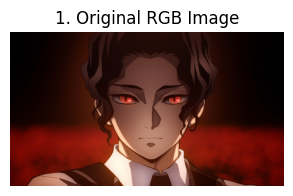

In [ ]:
# 1. Display it in RGB
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_array)
plt.title("1. Original RGB Image")
plt.axis("off")

(np.float64(-0.5), np.float64(1599.5), np.float64(899.5), np.float64(-0.5))

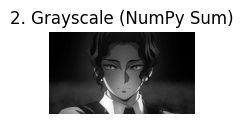

In [ ]:
# 2. Convert to grayscale (Weighted Sum Formula)
# R, G, B channel extraction
R = img_array[:, :, 0]
G = img_array[:, :, 1]
B = img_array[:, :, 2]
# Weighted sum for luminosity (Grayscale)
# Formula: 0.299*R + 0.587*G + 0.114*B
grayscale_img_np = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)
plt.subplot(1, 3, 2)
plt.imshow(grayscale_img_np, cmap='gray')
plt.title("2. Grayscale (NumPy Sum)")
plt.axis("off")

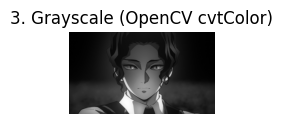

In [ ]:
# 3. Use cvtColor function to do the same and compare results
grayscale_img_cv = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 3, 3)
plt.imshow(grayscale_img_cv, cmap='gray')
plt.title("3. Grayscale (OpenCV cvtColor)")
plt.axis("off")
plt.show()

In [ ]:
# 4. Print array shapes and 5. print a few pixel values
print("\n--- Part A Analysis ---")
print(f"Original RGB Array Shape: {img_array.shape}")
print(f"NumPy Grayscale Array Shape: {grayscale_img_np.shape}")
print(f"A few RGB pixel values (x=10, y=10): {img_array[10, 10]}")
print(f"Corresponding Grayscale pixel value (NumPy): {grayscale_img_np[10, 10]}")


--- Part A Analysis ---
Original RGB Array Shape: (900, 1600, 3)
NumPy Grayscale Array Shape: (900, 1600)
A few RGB pixel values (x=10, y=10): [1 1 1]
Corresponding Grayscale pixel value (NumPy): 0


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# B1. Compute the FFT of the grayscale image (use NumPy)
# Use the grayscale image from the NumPy calculation for consistency in filtering
M, N = grayscale_img_np.shape

# 1. np.fft.fft2: Compute 2D Fourier Transform
f = np.fft.fft2(grayscale_img_np)

# 2. np.fft.fftshift: Shift the zero-frequency component to the center
fshift = np.fft.fftshift(f)

# 3. Store as fshift (already done above)

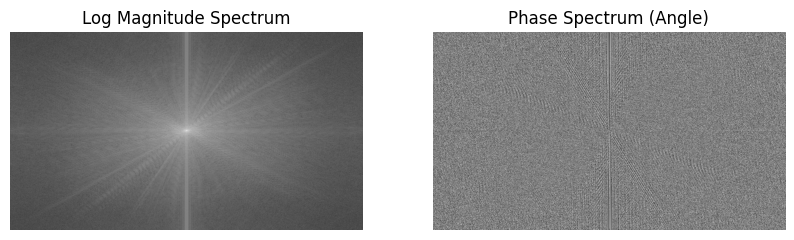

In [ ]:
# B2. Compute magnitude, phase and display Magnitude Spectrum
# Compute Magnitude (Amplitude) Spectrum
magnitude_spectrum = np.abs(fshift)

# Take a guess for the role of logarithm in Magnitude Spectrum:
# The logarithm is crucial because the dynamic range of the raw magnitude spectrum is immense.
# The DC component (center, overall brightness) is orders of magnitude higher than the high-frequency components (details).
# Applying log(1 + magnitude) compresses this range, making the high-frequency details visible for visualization.
log_magnitude = 20 * np.log(magnitude_spectrum + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(log_magnitude, cmap='gray')
plt.title("Log Magnitude Spectrum")
plt.axis("off")

# Compute Phase Spectrum
phase_spectrum = np.angle(fshift)

plt.subplot(1, 2, 2)
plt.imshow(phase_spectrum, cmap='gray')
plt.title("Phase Spectrum (Angle)")
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

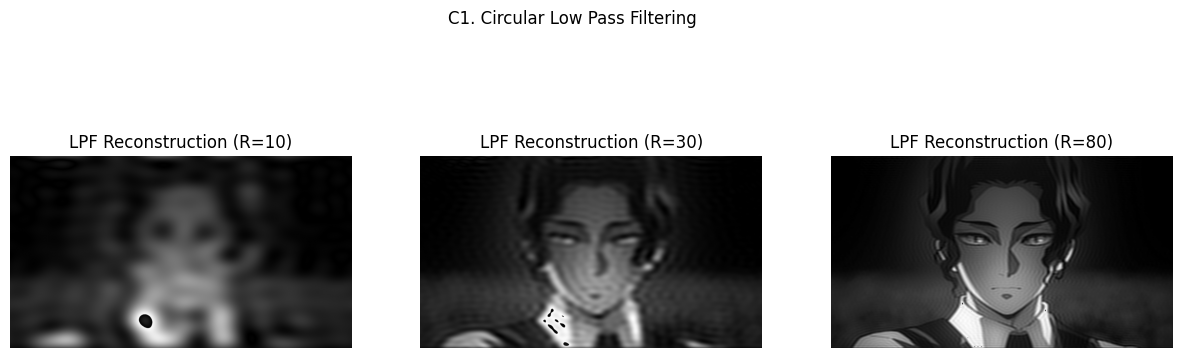

In [ ]:
def create_circular_mask(rows, cols, radius):
    """Creates a circular Low-Pass Filter (LPF) mask."""
    crow, ccol = rows // 2, cols // 2
    # Create a grid of coordinates
    y, x = np.ogrid[-crow:rows - crow, -ccol:cols - ccol]
    # Calculate distance from center
    mask = (x**2 + y**2 <= radius**2)
    # Convert boolean mask to float (0 or 1)
    return mask.astype(float)

def inverse_fourier_transform(fshifted_filtered):
    """Performs inverse shift and inverse FFT to reconstruct the image."""
    # Inverse Shift
    f_ishift = np.fft.ifftshift(fshifted_filtered)
    # Inverse FFT
    img_back = np.fft.ifft2(f_ishift)
    # Take the real part and convert to 8-bit integer for display
    img_reconstructed = np.abs(img_back).astype(np.uint8)
    return img_reconstructed

# C1. Create 3 LPF masks

radii = [10, 30, 80]
plt.figure(figsize=(15, 5))

for i, R in enumerate(radii):
    # 1. Create a mask
    lpf_mask = create_circular_mask(M, N, R)

    # 2. Apply to fshift
    fshift_filtered = fshift * lpf_mask

    # 3. Reconstruct using ifftshift + ifft2
    img_reconstructed = inverse_fourier_transform(fshift_filtered)

    # Display
    plt.subplot(1, len(radii), i + 1)
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title(f"LPF Reconstruction (R={R})")
    plt.axis('off')

plt.suptitle("C1. Circular Low Pass Filtering")
plt.show()


# The blur increases as the radius decreases because a smaller LPF radius (e.g., R=10)
# retains fewer high-frequency components. High frequencies represent sharp details and edges,
# so filtering them out leads to increased smoothing and blurring of the image.

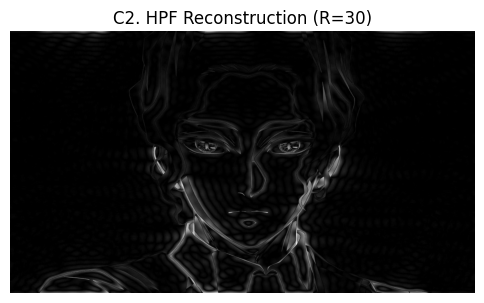

In [ ]:
# C2. Create HPF mask

# Create an HPF mask using the LPF mask for R=30
lpf_mask_30 = create_circular_mask(M, N, 30)
# HPF is the inverse of LPF
hpf_mask = 1 - lpf_mask_30

# 1. Apply
fshift_hpf_filtered = fshift * hpf_mask

# 2. Reconstruct
img_hpf_reconstructed = inverse_fourier_transform(fshift_hpf_filtered)

plt.figure(figsize=(6, 6))
plt.imshow(img_hpf_reconstructed, cmap='gray')
plt.title("C2. HPF Reconstruction (R=30)")
plt.axis('off')
plt.show()

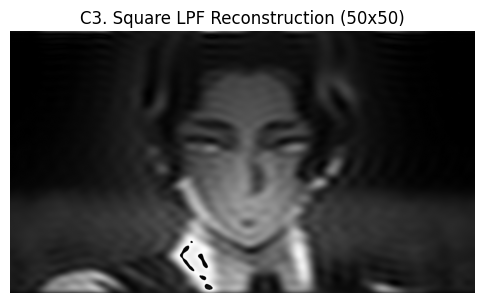

In [ ]:
# C3. Create a square LPF mask

square_size = 50
half_size = square_size // 2
crow, ccol = M // 2, N // 2

# 1. Create a mask
square_lpf_mask = np.zeros((M, N))
# Set the central square region to 1
square_lpf_mask[crow - half_size:crow + half_size, ccol - half_size:ccol + half_size] = 1

# Apply
fshift_square_filtered = fshift * square_lpf_mask

# Reconstruct
img_square_reconstructed = inverse_fourier_transform(fshift_square_filtered)

# Show the output
plt.figure(figsize=(6, 6))
plt.imshow(img_square_reconstructed, cmap='gray')
plt.title("C3. Square LPF Reconstruction (50x50)")
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

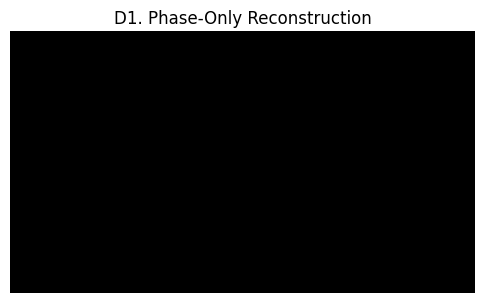

In [ ]:
# D1. Phase-only reconstruction

# Get the original phase in radians
phase_spectrum = np.angle(fshift)

# Use: phase_only = fshift / np.abs(fshift)
# This creates a spectrum where the original magnitude is replaced by 1 (constant magnitude).
# It is equivalent to exp(i * phase_spectrum)
phase_only = fshift / np.abs(fshift)

# 1. Reconstruct and display
img_phase_only = inverse_fourier_transform(phase_only)

plt.figure(figsize=(6, 6))
plt.imshow(img_phase_only, cmap='gray')
plt.title("D1. Phase-Only Reconstruction")
plt.axis('off')
plt.show()

# 2. Code comments on difference:
# The code line in the assignment `phase_only = fshift / np.abs(fshift)` creates a complex array
# where every element has a magnitude of 1 and the original phase of fshift.
# This complex structure is required for the Inverse Fourier Transform (IFFT).
# `np.angle(f_shift)` only returns the phase angle (a real number array of radians).
# It cannot be directly used for reconstruction without combining it back into a complex number
# (e.g., using `np.exp(1j * np.angle(f_shift))`).

# 3. Try reconstruction from np.angle(f_shift) once
# To try reconstructing only from the angles, we must assign a zero imaginary part
# and use the angle array as the 'magnitude', which is incorrect mathematically but fulfills the assignment step.
# img_angle_test = inverse_fourier_transform(phase_spectrum)
# (Note: This step is mathematically incorrect for reconstruction and usually yields noise,
# but it shows why the assignment's formula is necessary.)


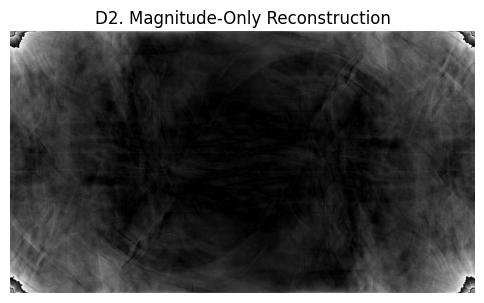

In [ ]:
# D2. Magnitude-only reconstruction

# Use: mag_only = np.abs(fshift)
magnitude_only = np.abs(fshift)

# 1. Reconstruct and display
# To reconstruct, we need a complex spectrum. We combine the magnitude with a constant phase of 0 (e^i0 = 1).
# We ensure the magnitude array is of complex type.
mag_only_complex = magnitude_only.astype(complex)

img_mag_only = inverse_fourier_transform(mag_only_complex)

plt.figure(figsize=(6, 6))
plt.imshow(img_mag_only, cmap='gray')
plt.title("D2. Magnitude-Only Reconstruction")
plt.axis('off')
plt.show()

# 2. Why does this look different than what Magnitude Spectrum looked like?
# The Magnitude Spectrum (in B2) was displayed using the **logarithm** to compress the high dynamic range
# and make high-frequency details visible. For reconstruction (D2), we **must** use the original,
# **uncompressed magnitude** array (`np.abs(fshift)`).
# The reconstructed image looks blurry and lacks structure (often a central blob) because
# the phase information, which carries the positional and structural data, was lost (replaced with a constant zero phase).

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

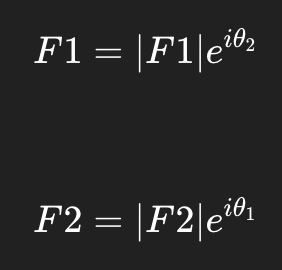

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
file_name_2 = "kageyama.jpg"
with open("kageyama.jpg", "rb") as img_file_2:
    print(base64.b64encode(img_file_2.read()).decode())

/9j/2wBDAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEYIx8lJCIfIiEmKzcvJik0KSEiMEExNDk7Pj4+JS5ESUM8SDc9Pjv/2wBDAQoLCw4NDhwQEBw7KCIoOzs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozv/wgARCAQ4B4ADAREAAhEBAxEB/8QAGwABAQADAQEBAAAAAAAAAAAAAAECBAUDBgf/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/aAAwDAQACEAMQAAAB0fV5QIa+N8/l2R6AAwIvobBroUAQqbB4EUEKASnseKxBTZrWiAHueJAFAIBTaNUgABiuQCDYPBcSgAzT0PEgAAUCAoQZHseB7niYgAABaeyYGB7HiYGQBFFCFAAAIAAAAAAAAAAIUtdnt59u4qKoAAAAAICgAAFAAAAAAAAAAALFAAAIKAEAABQAAAItIAAAAAoABybsCGtjfP5drHoADzC+hsGuhQBCps1rxFAABPUh5qQZHvWvEAPc8SBQAQCm0apAADFcgEHqYrgQoBU2DXIAAFAGJkEA2DwKep4kAAAWmSeta8epgYFAIooQsKAAEAAAAAAAAAAAhlXS6cOj055SKAoABAUEAKAAAUAAAEAAKAAAUARQACUABAAAUAAAAQoUQAAAAKAAcm7Ahq896PPsjMoIeZkvsZnihQBCpsV4EgoICk9zxIAZmdeMAD3PEgUAEAptGqQAAiihBT2XwIUAqZHoeAAACgQFQDM9TwPc8CAAALQnvXhGYPEyAC4mQQsBQAEAAAAAAAAAAAi5Wbu+XW6caloAUgAIUAAAAoBQCAFIAACgAAFAEAABQgAABYAAAAAChRAAAAAoAByLsCGtz6aPLrD0KDEwPRfcwswgAFhT3rxSQAKZGJ7ngFA9UxrzgtIbCeBDIxAABTaNUgAAMTIAGxb4EiFASnueBAAAADEyABsHgep5

In [ ]:
img_pil = Image.open(io.BytesIO(img_data))
img_array = np.array(img_pil)
H, W = img_array.shape[:2]
base64_image_2 = """/9j/2wBDAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEYIx8lJCIfIiEmKzcvJik0KSEiMEExNDk7Pj4+JS5ESUM8SDc9Pjv/2wBDAQoLCw4NDhwQEBw7KCIoOzs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozv/wgARCAQ4B4ADAREAAhEBAxEB/8QAGwABAQADAQEBAAAAAAAAAAAAAAECBAUDBgf/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/aAAwDAQACEAMQAAAB0fV5QIa+N8/l2R6AAwIvobBroUAQqbB4EUEKASnseKxBTZrWiAHueJAFAIBTaNUgABiuQCDYPBcSgAzT0PEgAAUCAoQZHseB7niYgAABaeyYGB7HiYGQBFFCFAAAIAAAAAAAAAAIUtdnt59u4qKoAAAAAICgAAFAAAAAAAAAAALFAAAIKAEAABQAAAItIAAAAAoABybsCGtjfP5drHoADzC+hsGuhQBCps1rxFAABPUh5qQZHvWvEAPc8SBQAQCm0apAADFcgEHqYrgQoBU2DXIAAFAGJkEA2DwKep4kAAAWmSeta8epgYFAIooQsKAAEAAAAAAAAAAAhlXS6cOj055SKAoABAUEAKAAAUAAAEAAKAAAUARQACUABAAAUAAAAQoUQAAAAKAAcm7Ahq896PPsjMoIeZkvsZnihQBCpsV4EgoICk9zxIAZmdeMAD3PEgUAEAptGqQAAiihBT2XwIUAqZHoeAAACgQFQDM9TwPc8CAAALQnvXhGYPEyAC4mQQsBQAEAAAAAAAAAAAi5Wbu+XW6caloAUgAIUAAAAoBQCAFIAACgAAFAEAABQgAABYAAAAAChRAAAAAoAByLsCGtz6aPLrD0KDEwPRfcwswgAFhT3rxSQAKZGJ7ngFA9UxrzgtIbCeBDIxAABTaNUgAAMTIAGxb4EiFASnueBAAAADEyABsHgep5mIAUACnungZHoa5QAYmQCjEyAAAAQAAAAoBAAAIZGxvHa7efIJQAACAAoBSFCkAAAAAAAAoAgCgAAlUEAAgCgAAAAAAACkUAAApCghTkXYgNXn00eXUehQYGJ6L72eUQABYU9zwsQBTIEPU8CqB7p4mIUg9zyMT1PMgABTZNYgAAXEyQAZ25R5AAIMz1NcAAAAiwyAM09DxKYgAKAKnoDzPY1yqAMTJAUYmQAAAQAAAAFAIAABDI9N57vbzZFSggBSAAoBQAFIICkBQAAAACgQAoAAQFIUCABQAAQAoAAAAKAAACkABybsQGpz6aXLqPQoPMh6nvXjEAAWFPc8AgFPU8j2MDzKoGxZrxAAexgYHseRAAFpsGukAACwFQCmS4AAIBsHiYgAAALiZAFTYNcgAAABQe9eEep4FUAQFAMTIBAAAAAAAAAAAAIZGWs9zt5/WyoAAABQCgAAAEAAABQAUAACAFAAQhQAUQABQAQAoAFBAAFAAACggA5N2II1MdNLl1GZkQ81p6HvXjJAAFxMj3rxJJSFPY8TZt14hADZTXIAD0B5nueJAAUGwa6wBACjEyAQAAAAZHtWvAAAAEC0BMzM8QAAACg2DXXM8TIAJFhkgEUUABCggAAABQCAAAQplZ2e3n2NZoKgAFABQAACAAAFAAABQACCFCkAAAgUAUgAAAACghRRUgAAoAUAARKDk3YEjVx00eXUZmRDzWnoZmCAAFxMj1ryLJmYA9jxNi3XgQA9E8wpAMzM8j1PIgABTYNdYUiAAsBQgAAAAGweJiAAAAYrkAg2DwIAAAAU9jxWGJkAELiZIAXEyCAAoIAAAAUAgAAEKWup18+9vFBQhRUAFAIAAAAACgAFABCggAAABCgsAAKQAAAAFWFAJQoABBBVhQAAgHJuwEamOmly6wyMzE81zMwEBQQsKAVPQ8we54Hvb4QIAEKCAU9jxPU8zEAApsGusAQAFGJkEAAAAApsGuQAAAEUUIPQHmAAAAD1MVwMTIAIXEyQAuJkAgBYVAAAACgEAKAQQzrd6cen05ZAoAKgAAAAAAAoAAAAAAABCgEKABFAAAAAAAApKKAAAAAgUlAAFQQ5TYA1cdNDl1FPQwMFzMwAhQBAVBT0PIyPavCPeteAAAAAKbBrnrXnGIUEFPevCWAIAAMVpULSBAACinoSzzgFAIAMVyAKZJgAAFIAPSsjxiFACjEyCAtiCgCDEyAAACgAgKAAQQyNvpy63XjSlAAKEAAAAAAoAAAIUAAAAgKQFAECgEBQAAAAAAWpKKAEAAAKAQBSBymwC62N8/l1A9DAxX0MgAAAkUlBT1PEzPQ8T2rwgAAAAAbB4HrWEYBQQU9zwWAABAC4pkFIUgAALQeieQCgEAEWGQAQAAAAotmxGsQqgAQFQF2casa3TIgQQFAAAUAEBQAATEzPXeO318+VUoAAAQACkKAAUAAAgAABSAAFIUACAKQAAFAAAAAKRQCKolBAAUAgAUjlN0gNfO+dy7IHoYGK+pQAAEEBVFT2PA9CnmeteMAAAAAD0BakeYUEA9jAwUAAgAxMgAAAAFAIAUAgALiZABAAAAUAbKaxCqABAVBV9c3ucunD68/LUEQDEyAAAUAgBQAAMUyX03judfPnZQCgABAABVAIBQAUgAIACFAABQAAIAAAAAAFAAAAUAhaACWWUAAgAA5V2APHOubx7yIehgQ9SgAABYCgp7V4R6piYmZ5gABQCAFFM6p5QAQoyM08lBACgAYmQQAoIUEAAAAKCAsBQEAAAAAp7ngYgoABFoKemL9Jx7a+s8LtzwsgQQLQAEAKQAAAAuJTPWe118/vrNAAABQEAFgAAAUUAABAAAAAUACAFIAAAAALUKACKSgAAABYhVlAIAoWOTdgDzzrl8e8iGZiQ9SqAQAFgKCnrXlHqnmQgAACgEBQBlXqeEAEKKCBAAAUDEyAQoICkAAABQAQFGJkAgAAAAA2DwIAAARaCnpi/Sce2a8zpjkdOcsgQYrkAAgBREoAAAXGLWVz1evDc3ilIAUAAoAEUBACkCgAKQAAAAAoAEAAFIAAAAUCgBFJQAAAAQUCkAFJQcm7AGGbzOPfCWFBD1KoBAAUYmQKe1eEeyeZCAAAKAQAoFT3rXgoIUAAgAABRAUIUEAAAAAKACAFxTIAAAAAAHseRAAADFcgD0zfpPP29VxOH156XXniEGK5AoIgBQTEyAAC02Y1yaz0evHob50AAoABQAIAIKoAWAAAFIgAABQsAAAAAQoAACgAUIpKAAAACAUAi0FCDkXdAMZedx7+ObCgi+pUAAAEIZAGya56nmQgAAAUEABQTYXwIgAAABQQoBAXEyCAoIAAAACggAAEKFAABACgVIAoBAMVyCVcs36Ph22JoeVnA7cdbWZSB6S+eoCAAAYrkAgAq7ebnGjvO505dPpyysoABQABAAAoBQEVAWAABCgAEKAUAAiihBAooAAAAKEAEAKFAIAUUFBAVORd0pZcs3n8+unnWJQRfUoQAAAYmQBsmuZAxIAAAFBAAUE2F8CIAAAAUgKAQCKKgKCAAAAFBAAABiZBQACAAoBACgEAxXIJVyzfouHbZzbbE0954XXn53IG/neunhrKogAAi0BABV2s3r41891x7759frwzsAoAKABAAAFAAFAWQAAQAFAACgVAItAAIAACgAAFQCVSRQFAIKFAAACznZ6+ke0vrnXpnXMmuIYgEX1KgAAAGJkAbB5GIBAAAAoIACgnoo80AAAAABQCADFckBQQAAAApAAAAICqAQAAFAIAAABiuQSrlm/Q8O23mlGNnJ6Y5XTnLBnL3eXXnbxo7xKgQARRQgAq7Gb9Xy38h25tY7Xfz5WWFCgFAAAEKCBSFIUUEgFBAAAAooAKgBQABAUgBQAgAFAoIABRUCkoAEBUF4+r2zcyyl0D5hMKhSS+1EAKCACLQg9geSwBAAAAAAAAMzAAAAAABQCAAYmQAAAACggAAAAGJkoAAIAUAgAAAEWgsWX6Hj23M2xFlnmfP9+OvvMLL3+PX3zeJ15am8yoAEGK5BAC5Htm/Z8enzXTHM68+z38/rc0AoBYhaAAACAAABQigAEAFAAoABQQAFBAUABAAAABaFgAAACkAAIAb3m9haQHifIp41iUi+pUAKAQDFcggyPY11AIAAAAAAAAAAAAAACggAAgKAAAAFBAAAAAMSrQAAgBQCAAAAYrkCxZfouPbbzbBYkrS3ng9uWNljo8+nY5dPOzg9uOvqKgCCLQgBae2b9pw6czpn5rrz63fz7GsUAFAEWgAAAgAAACigAEgC1AAoBQAQApCgAABFBAAAooCgsQVYgFAAQAG/5fYVAhjXy6c+sShfQqAFAIBiuQQU2DXWAIAAAAAAAAAAAAAAAAAAIQyAAAACggAAAAAi0BAAAUAghQAAYrkCxlL9Hx7bObYKJZ5V8734+Osj2xr6Pj2sa+s8DtywslQIIoqAFp7Zv2vHpp6nyXbn0e3n3N86UAoAAKAQoEAAAABQAFggWhBKFoAABChAAAUAiggACgUBQWCklICgICgA3vJ7QAMDhnDqWQL6lQAAADEyAUep5kAQAAAAAAAAAAAAAAAoIAAIsMgEAAKAQAAAAAYrkEKACAAFEKgBSDEyBVyzfp+Hb3lsCGNcneNfWdbc8rlL9Bx67WdDR1nidueGswBC4mQAMj0zftuHXy1n5H0cfbfPo9ONKAC0AABSFAgAAAAKAARQEBRSgBAAAAABQQAAAoAKQoFICgABCgAS1Bu+X2gAYnOr5gxsEX0MkAAAAxKUKACAAAAAAAAAAAAAAAAFBAAAXEyACAAoBAAAAABitKgAAAAKIEoCgmJkCrnm/bcOuzKKYHO1n57pj6Tl05+88Drzh1OXTr8+gkcrrjldeWNQAxMgAZHpm/bcOqz5X1ebX1Or045IqgAFAAKQoEKAARAUUABYAIC0FACAAAAAUAEABQACgUEKAhQAQAAsKCN/y+0QAh418ieNRIuZmgBSAAQhkAAAAAAAAAAAAAAAAAAAoIAACjEyAQAFAIAAAAAIsMkAAAABRAVAUDFMgVfbN+34dfaWpK8LPlOme9z10s3GvkuvPQ3NrF+m49fNYY1xOnLn9MSoEgKFFPTN+34dcrPmfX5dGup045FsoAAKBCgKBAUBCxCgUABYAIKFAoIlAAAAKAAQFBQCAoAKSgIUAAgAEKojf8vtEKQGFfNHMqJCnoUAAAEWGQQAAAAAFAIAAAAAAAUAgAAAAAAgWgIAAAAAAAAC4mQQAAAACBaAgGK5AqbOdfbcOvpFMK+d6Y8T6jnvKBztZ+S74sv2fHp75vka669nC68tLpmJFgSgFPSa+38/TOvmfX5NbU2tY9tSoBQACgAsBQAgBQAAAUQAALQCACCgoAAAAAKACkIUlUAAEAKAQACAB0PL7QICErknzpjYIehkAAAAuJkEAAAAABQCAAAAAAAFAIAAAAAABiuQCAAAAAAAAAsBUAAAAAgWgIBiuQMjexfsePXOBzNz5vpz+t5dduEDA+Z7Y5G8/T8unX52qPE0d5+Y68/DUxBiZIBV9I+38/X0r5r1+XHfPyNzeagAoAKABCgBQCFAAABRAAAoAACClAAABQAAUhQQgFCkBSFAAAIABAHQ8vtEKQgNavkzxsEMzIoAAAXEyCAAAAAAoBAAAAAAACgEAAAAAAAiwyCAAAAAAAACrCFQAAAACBaAgGK5Azjq419Vy6ZS+Gp8l0x1cu9jeSoJDW3PjuvPqY39Lz1lKCY1y9Z+W7c/OoYxlUBT0l+38/T0r5v1+XLpy1Jrc1i2UAoAKABChSAAAoAAAEClIUIAABQUAFAABQAAAQgFAAUAAAAAAQBveX2gACGB81XNJYKZlCggALiUqAAAAAAFBAAAAAAAAAUAAEAAABRgZFCKSkABSAAAoAESqQAAAFAxMgEAxMirY7nPf0nPY+Z6Y1dT63j09ooUkMa+c6Z0NT7Djv0gLYmJwOmfn+mMbMl3c3Q1kDOX7fz9PZfm/Z5cuvDVmtm5ysFABYpKAAFAAAAKAAAIoKQoQACgFAKACgpICgAAJUABQAAAAAAAWAN3y+0AAQxObXzSY1CmZkFBAAWAqAAAAAAFBAAAAAAAAACgAEAAABR5x7y46hIpAACkAABQACFBAAAFqBiZAIBgZlWx9Jy6dvGuZrPzPXP1HLfUxqpQpIS3WufkOuPruO9uUpIQ8NT47tjW1EfQ41wN4xoZS/b8OntHznr817cPNanpYKACgAAAAFAAABQABAoACUAFBQCgoKAAACAEAqAAoAABCgAAoLEBu+X2gACEPKvkk8KxBkegUEAALCoAAAAAAUEAAAAAAAAAAi0BAAAAKtxrvc98PtzwsgIVACkAABQACRaEAAAKBiZABB6S4UKfW8Om5NfI9eezL9Zy3nLUBSYmrbsHz/Tns412c6qDGufZx956h8zvPlXe561rOT0ziZy/bcOnvHzvq8zvwUKgAoBQQoAAAABQAAUAQBQAlCkApQUFKAUAAgICACgAAAAAAKCAFLAG55faAKCEMTgVxzGyFPQoIUAKIUAIAACgEAAAAKAACAAAAYrkAgAABaF6PHfZ575fTHK685UICgABAAAABiZAAAAKCYrkAgq9HGudvIzl+z4dONvPJ3n6zj06GbSkBqWa9bkvsa9nDs+jzqnknC6Z1t57pjm6+b8x0z1c3t418f25+ZnL9rw6bC/PerzY9/OLRKACgAAAoAAAAKQFAEKogUAFCCgpQUoKCwBAKEBAAQChCwKAQUKAIAFANzy+0AUEBiadfKnnUQZGZTEyACjEyACAAAoBAAAACgAAgAAAGK0oQAAFFLL9Bw67WdY2cDtz1tYlkWAoACAAAADFcggAABQTFcgClO3z3w94Vs4v0/Pfy3THUzr6flvIA8a0rNqXYigxrj6z1M3n6nC6Z6Wp1ksaa7nLp8zvPjZ9dy6fO9OfG3nKPteHXYX5/wBXmw7+cUWAUAoAAABQAAAAAAUQqwBQAVBSgpSiLSLSKCEFAQAgAJQCAKQEqgoEACgG55faAKCAhhXyhp1igp6FMCmQCjEyQAAAAAAAAAAAAAAAAAYrShACgAU9c6+l4dc5RqazwO3PDWIohDIAIAAAAIooQAAFBMVyAKesv0XPXzPXCOljXuvMufr+fTdxaQ0axOgWAVZic+zh9MYancs2zM9yS6HLppWcTWfreXTHU+N7c8Y+149NiOB6vP59/OBbCioAAKQoABQAAAAACwAFIoKCpQUpSlgUWWUKQSKFQEABABQRAABQFgAAADd8vtFAIASsTinBshAZGZCGYAWAoCAAAAAAAAAAAAFAAAGJSgAIBFpTb57+h49cpRjXK6c+T15SgPXOsU89QAAEAAAxMgAAAAYrkAlXexrvc9fKduY73PfL3nfxfp+fTI845dm+u0IAleZxN543TPWs66epsmwZGBxOXTCNatvLea+Y3jlbz9px6bMcH0+fy9HnAUBQlJCqAACgFAAAAAgCgAUilBShKUpSiKgpQARYKEBCkBBQEgAUAAAAAAG75faABBUs808rNI+emsCAHoQxPQoCjEyAQAAAAAAAAAAAAoAAAgKAAgGK5GR0efTtcemUohjZwO3LT6YAzze3y68jpz8dZlQAIAABiZBQAAQDFcgDI6/PXXxr5LtzH0PPfC3n63l03s3XOadg9SxAYVo6nzm8XU7xtp7VuHoAQ4fLeEu7m6NdOXQ1PkOnP63l035eB6vN59/OoAChAhQLSJQUhQAAACkKAIFAoWKUFBUpSlLFQUAAihUICFIAShABFAABQQACgN3ye0CVimFnjrPlqeFz5WednO59dXGxAZGR5nqUBRiZBAAAAAAAAAAAAAUEKABAUABAMZc6sdnl26fLVWkSGvvPz/bl56kLHc49tqON056e840IEAAAgCigAIBiuQKZR9Jz3t5vyHbGcdjF17fqeW9Q1662WdIEPM4XTPC6Yxs+kOkbhtFBQYnE57mNb8unZu5uFfHdefbxvrZvz/q82HfzwVQBCqIUABUAAoAAAAABYFFCwKCgpUpYtUyglKAQALCVAQAgFQFAEAACghSAUBueX24WednlrPjc+Gp56zgElDwzrm8e0lgBmYGZkUAxWlCAAAAAAoIAAAAAUEAAEUUAAA9ZfOzLN+i49tnOrFCQlaG8cPtzliN7nv6znu2fPbxx+mcaiQAABRCpCgAKBiZAplH1/HpZfkO/Pcxcjuc9+01mbkmS1IYmtqfM9Mc7pluC5fQx9RL6AoBicHnvPG9+KIxX5rrz3M3r51876vNj386gBQAAWAAoAlABQAAApLAFoCwKACplFqlKZRUFAAIFhKxBCkAAAAAAAFAAAUhOPp8Lnx1PO5xqWBAAxOdy7eGNwApCnoUAiwpQAgAAABSAAAAAAoIAACwoAALG9nelvGeb9L5+/qqKEErFOR158zriRnL9jx6bcss4W88HpnCyJAAAoxMjEyQAFAxMilPWX7Xj01o+Q7c+pm4L9By6aR2D1gExrn2fMdsa28y5y02tTZNXGvqed7RkADA4HPexz3uwpEOH0xm11cX5z1+Z286gAKAIAAChQAVABSAFALAoFAWABSplFLVKUslKAAQEWEoQEAAAAAAIUUABClIc2dMCFsAAQBK8Mb5vHtAAAepQQq4lKAEAAAAKQpAAAAAUEAAAxXIAAp7Z1uZvO3jaxv6Dj1zVJVIFvqntc/MdufO1mr2uevpOe6Q5258v1x43GJAAFEKYmQQAoGJkUpu5v2HHrp2fI9ufTxevjeWN+Gs9qLAxrkanzfXn47zdRpT2Td0yl8+N+4j1UAa8crl0386oEDm7zr29XF+b9flduAtABFAoBACgKAAlAAKAUQAKKQKAUqZRRWQLGSUFAAILZGNCAEAAAAAIQtAUAAA5LYAFAEKEiLzuXbwxqAAGZkUAxMgAAAAAAAAAAAAAAAADFcggBbG9jpmmhvPR5b7PPplLQgzraPdCa+p8j1xq7z65v2fDr7y1IaWp8v2xqXONQAIBFhkgAKBClLHVxv6nlvRufle2O3z12cdOYb6bkCVyN5+Z648rLvNryzbZ7abKdHS8tfS4bqgQ5kuvx6bcvrCkDwrQ1nfl+Z9flz68llAAKAABAUECgUEiqCwAKAAUUigApUyiloWMioWpQAQC2RCUIACAEIUABSKAAEKAcpsACgQFAQ8Mb53LtjAAFPQFBAUAAAAKAQAAAAAAAAAARaEAqo6/Lp4amjvPZ49Oljdig9026zATGtHU+T68/Kz6Dl072NZRSVrWfLdMc/eZUAQoxCZAAKIClMo+g59O9z1ztZ4PTP0PLfvNc6zs5K1k1tT5brz8tMNT01POPDFq++87mncO5zu7m5mIIcXN1+fTrYtABDQ1PRPnPZ5fXpzIqgAAFAgAAABVAQUsBSBQAWggUApUyBSljIJSgFIALZAlQEICAGJQUAUAABAUEOW2AEKsACUBjLzuXXxxuAAGZmQoAAAAACgEAAAAAAAAAAGK5BAWiXv8evN6Y1bn6Lj22M6qU2k2ClAISzk7z8x1x75v2XHftLQSvGvnOmOR0xiQgBiCpQAogKUyl+q5dOpi8zWdHU+h571JfDU6mXN1PY+T689bUx3LZnp55a+KXY1OjufUx1+eshEIecfNZ10+fTazaACJq6mtZw/Z5fbfIKpAUAAFgAQoAAqiKAgFAKUhRQRQClSlBlFKEpSgFIAsBCUIQgAAqAFABAAAWAOVdgAAUgABDyzrm8e2MoAFPQoUAEBQIChAAAAAAACggAKAMTIACPSXu8unG6YxO3y6ZrT2szSIotimUuaU5HTHF3n6DlvuY1ktEDCuHvHA6Yw0hAQhSoAC4lKUyl+z49NzF5G8+ddbGtE2T3jw1OLvHF6Z8qy3n2pZgvlljL76m7X02XSzcc3bBDly6PLfVxqlUEEPLTk6xzPZ5PTWagACkWgAAAABRFBQikBSKAUAoBQClQZCKUpUoKtQpKQLASoQEBAASgAABIoABaA5TYAAAFICkJGhx7a2dwAA9ClUQoQAoBAAAAUAgABQCAAoAwMwAWPfGt3O+b0x7Zuzm0WYWedmFYooRSRURMKyl3M3cl2pd6NzOsgcrePmuufKyEIQpUABcQZFPaX7bh19suF0zTs41ybOvm+VY2fG9ueFnqnl0bu5rp5SwFTYrqLMXs4vYgYHy+ddrjv1loWpAQws+f6Z1fZ5M7kgFAABaAAAAsKRQUUEgCqAAWAKCgpUoLFKUoSlUlEBRYQlQAgIKghQAEKQQKKAoBymwAAALAUgQ8s75nLrjKABT0C0AiUAAAAAAKAQAFAIAAUCHmeoALHY5dN3O/nu3Ht8uvQxd2vWSGNYWeR4WeNeB42eZ5V4M+VeVSzNRY9o383p53vRoany3XnhUBiUqAAuJQZm5m/Z8euWXF6Y9ZennXIs6MeK87eeB1x1TpM/L7dTrnXjxPMR6Vuaekuryv3OLsEXlZTnvbxqgFICGFfL9uT1eW2EAAtIAAtAACwAKCkRQRRQoAEUFBQUqUFLFKUFKCwQqwRYKhCAgFQQqAFgAABQAA5TYFAEAUAAGK6PPpq8+kBCgzMgUAhQAoBAAAUEKAQAoIACgQ8Y96Aplm/Q8euK8Pry+m49enHqVCgEgIKgIYmvZ8x057816r42eJ4p41lHSlhw+mMahiUqFAGJUGZ1Mb+s49LHP1MToy8mz2N2X5Lrz19Z+qrePjLL1mxqeZkeUZ16Gnzv02Nd2EvOlnPexi0KQAoiYV8t345enyqIAABQAC0ALCgECgBFCgAAoKWAKClSgq2SlKItURUBVQAlQhCAEFQAAsAABQAAHKbAFAgCgAAhhLzOXfzzQAKZlKQKKgBQCAAAoIUAgBSAAFAxjzPagKe2NfRceupqaG+f1vHrsFBQgAgApEBDV1ni6fQ41lFIYnhWnZo7zz7NPpnExj0MagAMTOPQxrs89/Tct2PGtSzoy8vUzj3Pju3PtJ3q3jjnx+pudJ77gkeWWri/Q519HFOXnWvjXTzq5AAACGNfM9+OPq8oCxAAAoABaARaAQAKEUAKAAUoigoKVKCqkpSliiqAWFQEJQhCAhSEoAIoAAFAACHLbAoAgUAAEBK1efTR5dYAAZGYCgVIUiihIUABQQoBACggAKBhGzNeOsgZG/y32uXXm9MbNz9Dy6ZFACAAQLCHmQzMk1rPK3figQIuJjZ870xxOmMTv41xemfIEBie8u9Loaz3uW/oee7ErQs6EujZ7y8/U+f7c/q06Z6pK5Z80aelMo6J9BLvx5nHzrDGupnWcWAEKKQpMa+e78df1eYgUkAACrCkWgAhVAgAAWiFBBQClEUFKUJQWUlKUsUVSFABAShAYgEAIAAUAACoUEBy26AAWAAoAQAxl53Lt4Y0UgA9CgAKKkABSAFAAUEAAAABQGb3efTh9eSoWO3x7dDGuV0x9Blu5tKoCkEijFPFdatVPM9D3l912kqZAoUkMQeWp8h2xqXP0/LpqWcLpjEUN3GsK6uLxOmfpuW+zjVjyryNqMQcHrhvHeN6gB5ngQ9jIsc+a1s6mbv51kWCAAFoJZicPvx0vV5iEAAAAoAFUAAAAoACUKQUQLQpYFKUJYFBSlBSkiigBCCgIQEAIAAAUAEoAUgOW3QCgAAAAgBI8c753LrjKABT0AAUVBCgAAAAKSFAAAACim1z33Oe/nO3LDUhlL9N5+29HF6Y+lxc5aVSBUiHmc+vNPRfc2SmuaFSXajbT2KUKSGjp4J6njqfLdMfTct7svx/bn4WSkd7nvQ1O5jXzPXH1vHfRxqnlVj0BifP9cdbeOmetUAhASNZdDN9+e/eUWUEAABaCVinH7cud6vKsCxKQAAC0gKQqgAAAAoCFoSiFUFEUpShLApQUoKIAtQEBAKAgIARRCoIWgAAAABy26AAUEAAAAERdLHTU57kpSAZmQAUVAABAUAAAAEKAAAoyOrx69LGvn+/LX1lGxnX1fHrspy9Tt5tBVklMa1jUqptS7EUoAIeFc+sY3pdpMigEtieCc3c+e3j6Dnvq51wOmOF0xKR9Zy6cfU+jxfj+uPsePTbzQABDkbz0umOhqZAAkuJpmpjWWbuZpbKQoIACgUJFxs5nXnyPX5FihQiAAABQAAC0IUAAoBQgsCgoKUpQlLFBQUFAEBQEBBQEICAiiFKkLUBQAAADltgWFAAAAAACGMvP5dvDGgAB6LQUEKgAAEKAAAAQoACgDKXv8O2zm8Tty0umJHUxv6vlvUr1NrKgAwrUr1jYLKQUEKpICHjXOpL0I2AUJAuFnF1nS1PoeesLPje2POzOX7Ll05FnfxflOufqeW/eBp6mzLnKMLNGz3snXG+hfE8Y85dSXo517YooAKsCAoBC0iCGh0xwvZ5MtZgqhEAAAAUCgAAAKACwBQlAKUFKUFKWSgoBQCwoIUBASgBCECkgAtBAAABQActsCwoAAAAAAQHljXN5dsZQAKvoAUgSggKQoAAAAIUABQBnm/S8O+ccnrz5nTnD6fl07ONc+zpS2Ma0UxXpRVIFIqgkKRSAARdazRNld6KlBAa2pytTczcjhdMcvedjN+x49Odp1sXg9c93nr0galnovvLTys8z1OfrKvBPRd7Nzir6RQApAAACkKQAQ1d5+c9vky1gKFkAAAAUAAAKAAUFEAAlKCgpQUpQlilKACgogKAEBKAEIYhSABbAgoAABQDltgItAAAAAIAUJLq8umljpBChFyMwUgQAAUEKAAAAAAFApsY19Fw7WOb1xyOvJL9nx6bcvPs35dGyG7L7RQpCrEFEQFAoQFBMTTrzOlFAIuNmlZuy+Bw944nXHRzr6vjvUrdzdHc3s3KB414G7KCC2khCiAWhAKCAAQooBABDx3PmfZ48t4lIFQAQFAFAAIAChQCgsAAVKKoigpQUqWBSgpQUARaJFEBKCJUIAQAEtgSgoAKQFBy3QgAoAgAAABSKuMrG/Hn058ZKMSEM6oCACLQUhSAoQAAQoCgCm9y33eXWnP3ni9uOzm/Z8OvlZF94yrKC1IpFQgIuCeVnmeVQ2Y2JcDzNgyLFIuKZGSghSQEPGvju/Lq439Dz1SxgZlCyzxPeUEABSFIAFqQAAAAoABCiJ56fL+zyZdOUCFFJRLEAABQKQAAALVBYUhULFKlBQUFBSxSlSgoKCkhVIAQlQAhACEKssLAEoUUIAKDlOhBQUCAAABQBNZ411s9Opm8vN5eN9zFwrQrk6zo7mCZVSAAhQUAAESgAgWkKACx1eXTrc+lMNZ+Z78erjX1HLpo2b+bkKQJWJ5mpvOpWqnhXhZ4VhZICymxm9POt7N9FygesuyZFiqACAQxr5rpjfzrr4tKAApAUEABQQoABAAAAUAACkImFfLevy5deUsAAlWQAAoIABQACgUKAIpKpYqCgoKUFLFSlKClAhVAICAxoCEABKEBFhQUgKVABQcpsCgogAACgBc8b6/Pp1pfWWHy0vS49N3NtDA1bOJvPI6YlAQBIUqgCFIlAIQq0AhQWO5x7dDGvY2Ln4zvy7GNfQc96lb0JZZ5mjqc/c0NZ1Uw1IQgoJIBQplm5y9HN7ONb+dQ8LNiXzNmKUKAIg5O5sy7ubUAKAMEyqygEBQCFAoCQAAAAKAKQiSuF6OPlvGpvn6azLAFJAAFoCQACgAVYAFoCwoIoTIFBSgpUpYpQUoBQACEIShAQAEoQEUABCqVAEAcu7AFBYAAAolud9Tn07cvrLSmMfMr1uPT3zolCyzE0tZ+b6Y0tyECFxMgAEKKggUAVIFoBlL9Fx7bebvlZ+R7c+tjXZzrE1k5+po6zp6ediz1PU0Uw0tCpKkWqBFPPF6cvkeRt5vaxro516S+VnhG2vrKQoAhr2eh6RQAADQrYPeUAgKQAopAEAAAABQCAFxNDvy62s6VnD1nV6cstQkAFACgASCgAAAFBSgAFBUoKClKUqWKUFhVhQFBCAhKgICAgUElUigIULFBKqActtFoAWBQSqJZNb/Pfdx02opQIhwF3OPTZzdKsk25bUIeNnyfXnp7mJACFACFFQCLSEKgqgE9M6+l49tyNyIny/bnsZsrQs8dT3rZTaNlfZPQwPkLMdxULXni+Oas2NzOsj0jz536uXYPE0TTjxmulm9fGveXKKoAAEQCgAAHjWlZ0s6oAAQAULAEABQQAAoBAXE5/fl2dZsY1o6zxdZ0tYz3iAUAKCFEgoAAIFqUFAKAUFQUpCmRSlSxSgoigAChAQgrEgIAFAlABAUKICgBzWgABYAoKTG+3z6diaylpQWIDmrrcunQxYa9a9m9LmJSaep8n256+pCAgKAhQQAARaELQWT3m/peHXoGKcreeNvHvW6bqbBnQoKDWPj9Tb6TA80wXX53CUe2p76m+b5ed78u2YnkeJ4S6ebqZu1NdbNzVAIUAgAAAAxOVqdXNyUUgCAAtIAgAAAABSAFETndufa1mgVgnOs+f3nz6c87mUAKAIIAKACKCUoqgRQCgqUAyKDIqWKCgpYAAUICEJUIQAAALKpIAxFUygBQHNaAFBCgFlmdd7l16+dWsoAAA8o43Pp0+ehVxs59ntLtFIc7Wfle2POyEBCgAIUAAYmRQQpY3sb+k5dPZNPWfbedbWdg96sWgMj0PU9DwPgtTo9c654njL5YvjkPfc2dOwd7F3831gCEPOXQ569sbxLHoFAAIACggBSQ0NPaNksoIAACghQQAAUEAAAC4podufZ1nIChieZx7OL053fO2BQhQAIIAAUVKBSBQUFFllJSlKURTJBSgoAKhRAQhCVAQoIUEUQAAhiUtUAoOa0AAC1AWYvY5de7neRSgAAGMcXG+hz3lBYQ5lnhXZytsk5XTPzXXn51CEBQAgAKBCgpCmUdXl1+mxfWFanTGPTFj0qmZ6nsepkAeR8DpsdcYnga8SXCB6V72fT5vdxc5aCEBhHH573MbzgUKAAQAFHjZnGRVJDGuVZ182hSAAAFBCghSAVQIgAAGJodufZ1nIooQhDws4VnL3z9N4WABQhRJSAi0qCigi0gUAqVSUpSlEUqUpQAUIUAQgJUIAACKAICACoUAFKDmtAAApKWXY5dfqcbzlpSgAARDlTWxx6ZwWmBzDQ1Nk68ZRK4/THznTGFQEKAEABQICgFMo+i49e7m5SyzS3l05+pa2TaMgAAYnypye2drcxNHLzlBLGzXXl6maw7C0gMV5cnM577WN5wKRaAgAAKTCubZ083JSCW8q56EvrFCkAAABSAAAUAgAABDn9sdnWMiihACGKapwd50unLLWQIKAslBAtQAWkAUAFKCpSlKCxSoKUFAKACAgIKhAARQAIQEAqgoABTmtAFACMhz39Pz67sVbChQAIENVdHl03sUFxOYaGm5my56hnErhdMcDpjGwsMTIAIAAC4mQBTKX7Hh035qxjWjc+HTO7vO2m2UFABCGofC2bfbOenhHnHmQzPWXcrW5X6vN6RYhDnLyM3exvoZqBQFIACgEENavM3YFWHnZzbOrNZSFBAAAUAgAAAAAAAhz+3Ps6zkUUABAQxNKzgazrdOeWsxBQAgAoAAKAKoigqVagpSlKWQUApQAAAQVIAlQEUAQhKEBYFqgAgKc5oAoAIzrsce3czc1oABQBAhgcXG+ly3QYrzjnabudE87OqnrLhZw+mOD0xjWJAUBAAAXEyAKesv23Dr7y2CadYanhvPU1nespSFABDE5B8jqbXXPpUMDMCXU536XF7pkI015mb4S7+NbktgCkKpAAUAghDR1NyXOCgnK1OjL6RQoABACkAAAAAAAAhz+3Ps6zkUUABAAYxjXJueH0xNc7qAQoAoBIBQUAFBSlKgpQZFElAAMgUAAEJSBBbAQEBASgAAKUEBQc5oAsSqinry6/V436xVoAAKQQBDl517ct+soi89eXqbubkF17jqGxEOH1xwOmMaxMSlCAAARRSGRtZv2nDr6LYJDmanueG89fpjZKAUAgMTlHytnhue+mZDxy9MX6aOwtjyrl51oZu9m72dZKgUIAUEoCgEAi42c+zo5tWkTxrRs6maKAFAIAUgAAAAAAKSHP7c+zrORRQAAAgiVDxTg6zzunPLeICACgLIAKACgoKUpUGQLAFKEoKUFABASkCWwAhAQChAAAUAhSg5zQAQUMb+m5dd+XIAoAAAAB5y8rlvexoF0l51mS+8CGtrPWy2DGuJ0xwemPOoYlKAEAEWGQKdDGvr+HTMoBDn6noY6nrvHTrNBS0BCGNecc00Dxr0joHSPQ8JdHNmdY5u5L6CKoIAKQpFAqFBAIpPCvI3IoIcnU6cuctCAAAFAIAAACgEKFmJo9ufZuaUAAAUAICGJpWfOb5+fTFuYBUigqAUAUigoBSlQUpQWKUJQClKACCoFSQlohASgAISArIhQQFAOe0AAgvS49vocazWgAAFAAAJHJzra5bylhrtaRp2bktUQ8LjsS+hLOVvPzXTHnqYgoAAQFsShTsc9/Ucd5FABDWs0q2rJZ6am1qbCZ0KACEIAeS6WWtnXvnW1FlsCgAAAABQKgBSAQVz6249YA8a1K6ObUAAAKACFAIACghQFmJp9uXXspQAAAAKAgMTzTiazyOvPLWIQoBUAFAKAAClKCpkCmUClQCgoAABFEsGKiAEpAVCCALQoABCnPaAASznv63n02ZatAAhQAFABJdY5/He/nUNVdNdSzalzUCJr6z2JfWJZyumfnN8/LTAFAAAjoY3odMQp9By39By3mFIEqwYmrqZxsLo6z52elZJlWdlLZDFcTzjyl113MXfzrIQUUIAAAAAUCoIUAEBjXMs6cuUqyHKs6mbkUAABQACAAoAAACzzPDty6tgFAFABAUAICGNadnzeseW+WVkoAlABQCkAKUoKlKUpYpQlKAAUAgUQlkCwAEoCEAgUCgBSApz2gCiS9Th1+gzrJbAVRAUABQAIxOPnW7x6U8a5S5rrptzVAImvrPbjKJWhvPy3Tn5aYAqAoFl7nLrxevLFB9Px6drG8gAAgAA861DGyUMo2TIHkalZGZt5estUUEqyFBAAAAAABSACkAaungnRzQNavA34yAAAUAgKAAAQoBCrNaz07ct+qAICgEKAAAEBieacDU5fTnnrCwQFCUALBCqlKDIpUFKWKVC1BQACkpAlsIgiiAEFAQoAAAIUApzmgChz39by67EtKAACgAAAAGpGnx6bmdQ4de81iZrQARMdTq5mRK5+s/MdceGpiUIUIyl+g49uT15amsj6zj06mN5gAAIUhSFAllEBQRAUFCkKBQAgAAAAAKQAApAIcvU6Ob6AlcezrZuZQAAoABAAUhQAQCVz9Z6fXn71YtIAUAhQAAAAgTBdCz5/fPz6c1kBQgoIohSpSlBkVBSlilBUAoAAICWwIIogICUAKACFBCFKAc5oCql6HHr9HjWS0oAAKAAAAAYxxMb6PPaObXnNZQtAFBhZbnqxZZZqaz8v0xqbkCFCMpfpOPby3z4PTEPr+PXoYuS1AUAhQAAQqkALEoBKAoAFASFAAAAAUhQSkCgEGNeR7wFateUb0tShSFAICkABSAFBAMa5O8dzpj1KCigAAAAAABACHknF1nkdOd3gAlAIsBSpSlBkEpSligpUAAAAEJaiUIAQEFAAAAUgBQAc1qqSy4439Vy67stABRACgBQAACGnLqct7mNYHHt95SgAAmnvPRk6OaIeGp850xytyWADPN+m49t1Pj+3Lzr7Lh03c3IFAACgAEKAAQUi0ICkBSApAUlAAACkAAFIUAgAABK5NnTl9IFUhSAFAAAAAAAlnH6429Z6yZFAqFIUQAoAACFAIQxOdZ8/05Y7wRQJFAqClKUoSiKZFKCpQFAiKBYBEoQAEBAAAKAAAAoBzmhSy7nHt9LjWa0AFEAKAAFIUAhjHFzrocuiOXpM6yUACHlc+1nUyyAWJhpw954PTGKSh6Zv1XHtvSfM9cc3Wfs+PTazaUFAAAAUACgJAFoAAACFBACkoAAAAAABQQpCggIeVcyzr5uQKFIAUAAAAAhQMNTT687ZuJtlKSqQFEABQAEKAAQhDXs+b3z1t4uskigCpSgoMglEZFKUBKAAsoiVQRBUAIAQhAUKRQFAAAAOe1QTOvoePfp5uRQAAACgAAAFIQ15edy3v4151x7ffOqADE5O+f0ebsxkpBFVinL1n5rtz86Geb9fx7bcnM3PmunP7Pj02M2lAABQAAoAAAFQoIUAEBQAQoAqAAFIAAAAKQoBCErn2eku7LUAoCkAKAAACFCzxsnXnuWcQ7xkUlUEKIACgAAAAEQErzThbzyOnLPWYAVBQUoKlWpYpQUFQoAAgFIUIAAQgMVgABUtAAUgABotJaZY6fWcuvrFKAAABChQIUAABicrF2uXXKNCvCaq0gIcLry6MfQYuctCkEMa428/PdeeFZ5v2fDrsS+dnx/Xn9bz3tZooCkAApCgAKQoAAoAQFAAAIUAUJACgAAAAAoIARcbNavI3Y9IFABCgABQAABDR3no9eftZomJ0gAWFAAIAUAAAAAIDA5Gs8LpybySgqAUpSgqWKCgFAABKEKWBKAEAIDFYQoBUUgCigAUmi1VR0uPbv43nCqCFAAEBQCLQAAEPOOXz3u42jUa11EBDn9OfG3j6fnrr43UpQCLhZ87058fpnKX7Th19pVnA3jq53uZUoBCgAAFAAAUAAVIAFqFAAAICgEKQCgAAAAAAh51y7N1cjA3MqCggBQAFAAAiF5vTHa6YyshyDrGYBYUAAgBQAAAAAgBiaWs/MbxOnKgqAZApShEUoAKAABUBQAAQEABFhAUBAAAoUBSaLdSY19Ny7budZQoACgAQFACgAELAhoS+XLpsypdJfEigYXPE6Y1LPo8XsY16KSgLE8rPlO3PUs+w49tvJWpZ4r0sqAAtQAAAAUhQAFAIUELQhQQFBAUAAhSFIWoAAAAB5V4GZ7HH1Olm7EUAoBCgAKCACKMbOJ15/Samdg8DVOkAIooAIAUAAAAABAIxrXufnd51enK2EApSgoSwKCgoAAFCAAAAgIUEUQgKEAEBaAoBpNJfXn1+q5bzWlAAAABQAAAAWFCEjkZu1z6Z5sXk2ZNWWBPOuT056GsfQY33MbzipQDE095+V6Y+m5dOjmiHO1OnnVAAQCgKCFIAUlIUAAKQoIUAlAAUAAgKCVRAVIUAAAKInnXyu8/V41nFAUAlIUhVAIACyta5+O64+6s2rKQ5J1DMoAAAJFFBCgAAAABIVDBPntTmdOXprEsoKAUsirFBQCgCgBAAACECgARABCqSBQAqhBTSbZvV5du5jWQKAAAACkKAAABFqARgvK53c59KYLx9T0zrJSQho7zy946ub9DjXpLQEEOXvOK9fFpDQ034ylIAAUlUgAKQFIBQAAAFBAAWkKEKAAQFIUEAFIUAALAcrWdDU+i57yKgBQQACqACCAxOLufL9ef1x37MgeBqnQKUAAEAKBCgAAAAAiUImJzNTg9OU1i2AUFKEoLFAKAKAAgBAAQALAEAEKsAALUBUA02/PG/quPXcloBQAAAACgAAAQoAJfCOVjfQxqy4pzq119pQWV5XPP1nJPpMa9pagpDGtOt7Kg8jIzWoAACggALQgAAAFAAAAAUAUhQAAEKAACAFqACKInznTPWzd2WxQFAIBSBSCgEBhXA1OHvHR3PtEzKQ5R1DIhSgAhQAIUAAAAAJFqCSUNCvmenO75WwCgpUFLFAKBSFIVAAQgAAIoBIUlIKAAFhQSg05v149fqcdPQoAAABQAAAUhRCgAAIeEvKxro890hrnPMlylEB5anknazfdBQpAKAAAFoQAoAIUEoAAABQAAAAoBKoAiFoBCgAAIUCggQQ4fSdvnclFAQAACgAAEIa9cYw043Xl+gJsVQaZDcPCNgAAUKQAFEKAhQABAChDFNY+Y6Yw3yuoSgpURS0ilAAAIASgIAAFiFJAFUAAAAASg1JvpcO/dzrIoAABpmwehQAAAAAUAAAkeC8rGuhz3REXnWax7TVIAeGs9rL0C1AAKAAAAUAAKCAAVYVAAABQAAFABAAWgEKAAAAEKSFAMTnanSzaCgAAAAAFAIYnI1LnUrg9Of1O8desiEOWdQ1o2igAUBSAsSqAAAABACgIYnknzm86fTllcrKUqItURQUAAEBKAEUggCkLECkqhAACgAIKaWOv0XHt0JaACgEOebxmUAAAAApAAUAkDxXk41vc9ekoledc4168ozMyrsx0JPQFABQAAAFIWoIVSAoAABKApCkBSUAKACAFBKsBUKCFAAA87NU9jYlJDWrayUKAAAAAAUEBgcPTYzoae8+vXl9MmQFc83TUjcMwAWgAAIAUAEKAIAUBAQwOBrHL6cvTWFUqUFBYFAABAQUBFIIFAEQQKoAAAUAIBq8u/1fLp6rQCkBSHOOgZAAoAAEKAAApBAhicfN2Oe9jOhSEMCmRCV4njXQiwKAFBBQAAAAVSAFABAC0BAAUEFAAAUAlWAFAQoAAAAAIACkFUgKQAAAARdOzTX0zYuNmn24/WazkBXia5hG4ewoAIFoAQCALQCAFAIAUIQxOJc8nrxusUoS1YAoAAABKAEUQgBSAEAFAAAIUBQYce/03PpnFoUAAhoG8UoBSFAAAAAAAgCErkyzlvezqwAAABr1pWdPNzC0IUgAFAAAAKFIUAgAKCVSFBCggAFAACgAAUAAAAAAAAIC1AItQAAAAQ5epv51pLhENXrz+n6Y9ECocc9o2TaLQAQLQAgEAWgEAKAQAoCEMTlXPD6cct5JSoKACgAAEBKBSRQBACAACkAABQAp7ef097Gsi0AKQA0jcKCgAApAUAAAAQABDRXnY10sbziygUBBDzNDU6ObmCgABQQUAAAFAACgEKAKhQQFABABQAAFAApCgAIUAAAAgKKCFQAAAAeVadm/m6rWtEPDpnv9eWwgErkmce5uloUggWgBAIAtAIAUAiAoIWoDGzQT57ryuuYJSgFAABAAShAFAgIAQoAAIAAWgB0fN6upLlFoAACGqbRQAWFBCgKAAAAABAEPGuTnXpz1u51YoKACGJo2dCWgAoUAEAFAAACgEoUAgABSFqQLQhQCAUAAAKQoAoAAACFIACgVAIoAqAQ52puy5x5roLDCzqd+O+gCtU5sbh0C0AAKASFAAUgAAABSAFAIDE59nz3TjlvmKgoUlABAAShCghFAgAIAACAFAFUgO35vVuS2FUAAENA3ygARahYUAAAKQoAAgCCoaUvNzdrnvbzaUAqxBCgoAWoUAgAAFAACkKSkWoUhQQoBCioAAUAgoAAUgKAAQooIUAAAIUAAAEpDE5up082rDnr5ks2u3HrWUUMDhRunRM6AAAAFIACkAAAAAABQCAxNRPmuvK75UJQCgEAIUgFsQpIsAABACAUECgCgB9F5vV6y2LQAAEOcdEoAAAi0AAAKQFAAgACAxXmxqY3v417QKAADSrcLFAUlIpKFIAAAKAAoAoAAAQAAtQAAFIKAAAFAAIAWgBIooACFAAAAJpWZLtyiGmuuQz78O7qUpCHEjZN09qoAABSAQoCkAAAKAQAFAICENWz53fLHfO2RKAAApBABUCwEAAIQAhaARSFIKAp9J5fXmUAFAIQ550ClAAABSFAAAAAKAABAgMDmy6+dbuNe0oqkhgnN6Z8l7PPWUVSAFAoQFBACkoAAAAWoAUEKCFAFCAAFIAAKAFAAIKsKQJQoAAABCgkOVudTFyCjWNNRj24/QazlQEORHobZs1QABACgi0AABIFoACFAAAIAYninzPTlOnIAEAAAlAQgUCAEAIKACFAAAAD6by+vIoAAKQHMOkUoAAABSApCgAAFICgAARCGJzpfHOpL6xTys9d56NnNXm89dzG8opVIUgApFqFIAUgKSgAAALUhQAAoBCkFCggKQAACgAKCFIUgFWFQoABCga9mrXRyqgeZz1xPPtx+j1nKgBzI8zbNyqAAIAUALEqgCIC0BAAACgEABiazPzPXnd8iUBQQQEoCKQoEBACAUJFpAUBACgH03l9eRQAAADlnTKUAAAAAAAAoAAAKAABEAIeS+QNhM6GMcJdTGu9z3lFBQFIAUlCkBQQACghQAAChSAAApCigAABABQAFAAAAIABVIAAIcfU6UvtLQCHNXA8uvL6TpjIAhqRzzeN0tUACAFAIAVQSFCggAABQAQAEImqfO9eM3ziCqQCEFQBQBAQAgAoSABagAIUFPpvL68igAAAhzTomQKAAQoAAAAKAAAAAAUACIACgVDE+TjPnvvY3nLQlAAUEAAqggAKASgAABQBUAAAKQAtACAAUAAAKCRYedmsK38gKpAUQ8bnkW9vLMKCReevmePXl9HvGRaA8TjG+b5SgAAAAQAoCgEgBQCAFAUgQoAxNRPmuvHPfMRAFQAktIBUBACCgiAAELQEABQfUeX10oAAAiVzDomYKCFAIUAAAAFICgAAAAAogBQCFCGufFRv433+e/WKAUAKQAFoQpAUAAgFAAACioUAgKCAtQoICkKQAAApNetSkexsHoWKoAoIkOTp7ZvQSlUEi6K+K+PXj9HvGRaEMDhHQOgUoBCgAACAAAoIACggBQAAAAGJoXPzvTjnvBIBQBYBCoAQEAAIAAQtQAAAp9R5fXSgAACJXONw9gACgEBQAAAAAWJVAAAAALACgEKEMTlnyB0OevpOe/aWlABQAAoBCihAAUgoAAAAWpFJQFAAICkFUEAAEBr1p17RurlIAKAAoETxrjV1M3bSrUKIaa654deX0m8ZFoDCOAdE6FUAAFAAAgAAKCAAoIAUAAKQAAxOTZw+vDPWCACWoCkiosAIACAAgAFAAAAfU+X10pCgQAqGkZm0WFAACgAAAAAAAAoAAAAAKAAAYmJ8/L88bWdfT89bGbSgAqkAAAApCrEoAUgKQUAABQShQACFAAAJYirIvhZp2ey7sIq0JQAAFIMTj6medb5sIUVCw1V1Dx68vpN4yLQGMcA6Bv1kBCgAKQFEAKAAQoAAIACgAhQAEjGuFrPK6cPTWQIAKEBAAQEAAIAAKgABQU+o8vrpSAFEBUPA8TdKAAAAAUAAAAAAAAAoAAABQAQ8gI+al0ZryT6LG9/FyKAAVQCAApCgEKKEBSFIBQAAFAqFBCghQACYLq2eOp6y7cYR41uRVBBQAACHlXDrezropmgqiA8DRXx68vpN5yS0ISOAdE36oEKoAAIUELCgAEKAACAAoAICgAMTE4Gsc/pwy1IBUAAIAQAgABAKEAAUCoB9T5fXQCgEKCGBpHQKAAAAAAUAAAAAAAAFAAABQAYxza6BY8a+cxvHO+drHbxrrYuRkAAVQCAAAAoAqFBAUAEFACgAgBRQggPKtKsU3ZfZfNNVLW9m0FAKAACEOPqZZ17L0EyQVRAnkvPXx68vpN4yLUBI4J0DfqgQoCgEAAKAABCgAAgAKACFAAAQ8z5nfPX3xupBQAAhAAQAAgAqAQAtEKgH1Xk9dAoCgAhic06hQAAAAAACgAAAAAAApACkKAIA8a0zoiIaa8Ln09s60NZ95O9jXoZQAoVQAAQAAAApKFAAAJQAAAoApAnmc+z1rcir5VqJlW9m5ygEoCkAABfK54lu3nWwm6VACgmC85fLty+i3jKFAQ4R0Y3DICgAEKAAFAAAAAAEKAAAACAFAQ8D5bfPHrxIoAQAgBAAAQCoAAAohZFU+p8nroFUEKQAhyzqGQAAAAAAAEAWhItAAAAAAUhQBAhzq3T1JAxPnprX572c78rME68bMVagAAAAoACggBSFJQoIUAgAoAAUYJoWZruRlWBpmZuRQtACVSFAABMV5GomvSNxNgyQoAJgvOXDty+g3ixaAxOEdM24yAoABCgABQACFAAAEKAAAFIIAUAIalny/Tjd4WAQEIAAACAEFAAAFBAB9V5PXQKAAoIQ5R1SgFAAAAAAEAKCFUAAAAAAApCxCHLrqFEDA+QXmy93n19s0eFzuHRzaVBQAAAFoQFAIAUgAoUAAAEoIQ1K1rOhNeshRLLFABQFBKFBCgkNeuRW1nVXfT2QlAUQhzlduXc3ixaAxOEdQ2oyAoAICgBQQFIAUAAAQAAFAAIAUABicy5+e7cc7lZAQEICgEABKQoAAAoIAPqvL66IUABQQhoGwe5QCgCIUUAAAAABQAAAABEMTOgAMDnHUAIasfC14m3jfd5dcpamCZWdOX0SgAoAABQoIUEAAAqggKQAADwNPU9425atQAAUKAQAFIBVEInG1M87yXJOkmRUAAhF5x6+jj17MgCGMcI65sVQUAAQoAAICgBSQAqkigAAAUAAAABDFOFZyuvG7wIAQEABBaEABYAEKABUK+q8vqohQAAAHmaZvlAAKIAUAAAAAAKAQoAIBHmZmVAAaRkbYBicY+PMTKXqcuvVzrIRDzud43IpQCgAAABaEAAAAAAqggKImnW3GQBQAAFAqAoAAAA17OQbU2PZN9KEAAEXk2dHvy6FmQBDzjhHbPaqCgACFAABACgAgC0JAAAtAAAAAAAQwPl9Y1+3CIoQAgIRRQABRAAhRQEQp9V5vVRCgEAKAh5noUAAFgBQAAAAAAAAoBIAGobRlQAhyzonoAYHypwDFdrGuvz6DclsAeVnpZ0cvUoKAUAAAAAoAAUgBSACgEKFIKAAFAAJVAAAAxTianvndC7abSUIUAEhx9zudeexZSAGvHIO0etUAApAUAAAQFABACggAAWgAAAAAABDws+W6csN8pQgIAQiigAAiAAWiiAQPq/N6qAAIUAAAAAAKAACFAAAgKAAAAAGMcs6paoEQ5Z06yBDzPiDnGU13uXXazdSz3l9pahQTx1NiToR6KSgAFAAAABQAoAAIUlUAAgBSUhQAApKpAACki6tzzbr3zS1N9PYFQoBBDj9M/QdOfpQAhoxpnYM6oAAAABYEKAABQAAAFBItAAAAIACgIQ59nzfXhd4hAAAQC0BEAQAoUAgAfV+b1UgKBCgAAAAABQAAQoAAAAAAAAAPCOYdktUEjE5R16oMTVPhDyjfz07PLplA09TbzcloATCvK52zfjOKUBSAUAAAApCgAKCFAAJQFBAABQAAAAVYmJxtPXOqoyTopmgKKAkIc7tz7es5VQCHLgdMyqgAAAACAKAKAAAAAFIAUhSFAAgABQEMTh6xx+3G3MAABAKSgQUkBQAoIAH1fm9QHmehQBCgAAAAAAKCAFAAAAAAAABDTjSOyUUEeRpnRFCHMPixm9/n12M6sFxs07N3Nq0ABPOzxs3Dfj0igKKEAoAAAAWgIAAUgFCkKAQoBAKAAACGrXNX3mhT1TfTJAUUBIYWa3bHWubVAIcaNg6BlVAAAAAEAUgLQAAQAoAUAgBSAFEABQAEPM+W6c9frxJAACAWyAApICiAoAAPq/N6gPIzMgUCAFCFAAAAKAQAsBQAAAAACBic4HSLQA0zONmgIcE+VOjy6dbn0q0A8rPKzazaoAAJhWvrPvJvS7MtMglABQAAAAFoQAFAAAAqFIUACoAABCHG09c6LSptGymSAAoINPedvrz3KFJAxOIbpvmVAUAAAAAAAoAAAAAEKFICgEKAAAAAIxrWT5XrynTmIggIoAACggCCrEoAD6zy+qkMDSOgUAQAoeB6GRQAAAUAEEAKAoAAAAiHkcw3TcFAQ5h0TMAxPmDhS9/h29ZclAEPGyntBaAAQGNzz9Zx1np510c31igpQAAUAAAALQEAKAQpKCFUAEApACLrWctdmUoyTfPVCUKQAQ53XHa3jKqBEPM4p0TeLQFBCkBQIAUAABQACFAEKAAFABCkBQAAIlYnN1PnOnHLeIggIoCgEBUikKASghQ+s8vqAhyjfPcoEABWuYG0UAAAApABACqQoAAAAiGsck7J7igIck6pkCGJ8kavPp2OfSxVAAhq3PvL6KKAAAkrWueX0xgnSzrp5u7LnFKCgFAAAAAABQoAIUEAAoCkAAxOJqe2d5CVXonQSlQVSFIMa1OvPrazlQCIahzzom0WqAABAtBEKKACALQAAACFAAAUgAKACFAEShhZ89ZzOvC6hICKFICkAQAAUAhQ+s8vqAkaB5HSrMFABDzNKN6sygAAACAFCgEKAABACoahzDtmcWgIcs6hQSMF+NNrl12sbpQAAYpqam3m5BQKAQAxs5+8c3eMLNqXqY108XYlzW1ZBQAAUAAAALUAAAAKKgKACQ1LOZbs51Qo903maACgENfU9O3PfsQKSoc0xN42AUAEigCqCFAAAAAAEWgAAAAAgC0ABBFBKAh5Hyu+fj15LICAUgCCggKAQoIA+s83qoJGBxTfrdKCgEMTnx71tgoAAAEAKoAIAAAIAVDRNE7ZkCghzTpFBI81+Ml6nLrnnQAoABhZq2bmbVAApAAQ89Z5m8aGs42WNua6EvSzdzN9IqioKACgAAAFAAAACgEoICHF09c7qFsit5PdKAAADR6Z63TnnVICxjXIPQ3j2LCqASKAKAAoAAAAAABQAAAAIAUBSAQKKgBialnyvTk3hYIBUgAABUBRCgED6zzeqgkQ5x5G5W0UoEQhoGNbx6FAAAAgBQApBACgEAKhoGodkyKCEOedEoJHkvyc10OPSzQoICggTyrE2ZYAAAACCzxs528aO8+YKnvHQzvpS72L6mUUoBQCgAAAFAAAUAEAhqVz195oCyZ10EySgAAGFePXn09ZtABGBxjI6RsFFCgggC0AABQAAAAIUBQAQFhQQAAFAIAAChicrWfnuvG6zABUhSAAFQFEKAQr63y+oCAwOLG0bZ7lKQENQ8D2N2hQAAAAAAUgAABQCEOdHhXYKIAlaB0Cgh4y/Nc+m1jdlFABCkANTWd3NyXAAAAABISvPU0Lnnaz5XKhT0NqXfxd5dzL2mqUq2QUAoAAAKoBACgkPM4umznVUAnpZtye4ABQQ0emenvHtYLQEjQNY8a7Z6FAABQAAAAACgAAAAAAFAAIAUAACALUABDFPm9553XkuQIAAABQAQAoI+t83qAgIaEapsG8egFAa8agN+vQoAAAAAAAAAAKAQxOdGFdUogKwNI6BSA8JfneXTZztKAABQQJjXhZ083XWAAAABMassomCaes87eNbUiKFgucbS7cu5Lv5uxm+hYpQtCAUhQACggC4JxtPSazlAGSY3PVilCkAErR68+xrOQoUhI4ZsHhXbMigAAAAAFAAABQAAAAAAAAIAtAABCgAABDxs+R3zw68pQQFABAEqgQAFI+t83qAEBjHHPU9jdMhQGEc8HqbtUoAAAAAAAAAKQAGBzYp06oAPE1ToAA8Jfn+XX3zpKAAAABLNazoyo8VAAAAHnZ42bOdEAxrW1nQ1nT1nysCwAFyT2zrbjfXZzdzN95cixQtSgFBAFJDVrnW+suUtpAHnc9BNmKUABSae5udOe1ZaAENSOabJ5V2TIAoAAAAABQAAAUAAAAAAQBQBQAAAAAACMa5dnzfbhlrMoCAFIUEKBAAA+s83qAACNauWbMbJtFoIlc+MQbp7CgKAAAAAAAAIUAMDlRsG/VAIa55G8IEPJfnuXX3zpKAAAAAMbPKzrZukRQAAAIeOs+cbUtCxBK87NOzR3jV1nFIBQFBYyPaX3jZl2pdmXal95czKBSBfGzWNapL7SlFAJZLnrZZAKQFqStDrz7OpUtADE40exieldIyEAKAoAAAAAKAAAAUAAAAAAAAoAIUAAQAqGB87vnzOvJYAAoQoiFIBQsAfWeb1AABErkFjM3j2oAaceAMzeMqFAAAAAAAAEKAAwOPHRNmqAQ1TE3QIh5r87y6e+dpQAAAAATXs68eK64UAAACJ5WeVbWdUAVIlRPKzQ1jT1nW1JYBAUAqixTOPaa38624zUQxiHvLm0koUADX1jsx6xQpCgE1dza6c9qqloCHmcSNs1jrVsAsAKAAFAAAAAKAAAAAAUAAAAAFAICgAAAgPGz5LePPpylkBRQACIAKCBT6zzeoYgyAiVgcONs9DdrMoPGNIgNs2aAoAAAAAAAEBQEMTjR1j1qgEjSrM2wCRgvzvPp7Y3JQKCFAAATGthNuNFcVEAKAQqRfDWcTZzaoAEsAxjW1NDeNLWfO5gqAqilj2l3c638b2JcigCACigAHnc7Sb8tKAhSDE0+3Pr6zSlqAhyzCPQ1ztmVCwAoAAACwIUUAABSRQKAAFAIAUAAFAIAUAAAgIadnyvTlOnMSrAAlBAAUAB9b5fV4mnA2j3Bahpmge8ehvGdDE58YgzN8yoUEKAIAUAAAAAIYHHjsVmUAkc+tg2CgHnL89z3646SUCkAKAAAkuerLqrrBYAUgKCA8bPKzbzqgAAAhDDWdLWdK519zzQZS7Mu1Lt53sZZS0qigAAAoAJZjc9fNyQVSACVoax1OuPYVQAYnz5uwMTrVkBAooAAAABFoSLQAARaAAAACBaAAAAAAFAAAgQVictPm+3HLeYikBQQFBAUBT6zy+rTNeBTYNktUxOQD0jYNyqQ0zwgDZNotAUACAFAAAAACGBxzsGZQCHONs9wCGMvz+N58+sgAUgBQAAmVnSjFeesIAACggsS+NnlZt51QAAACIqHnXklX1jKrAygtAKAAAAUJDw3nr4e4AKFJDw1m9cdCy0KADQNM9o8jdN2qBAChQAAAIFqCLQAAQqgAAAAAFAAAAAAAKAIEoQxPntZ5PXjdQikKQFIUhQoB9X5fVpR4gFPU26yBicU2Ipsm1Q8TSgCpur6loCgCAoAAAAACGBxjtGRQCGgbJ7gEMZeDjd5dIoAAAoBCoMzoJTTXwWAAApAADzswPeWgAAAAVJAFYGvW1GUooBQAAAAhfK53024tWAAUmNml0z2N5yRQFIQ4x7CNU7Z6VQIAChQAAAIUEWgAAhQAFAAAABQAAAAAAUAAAhDzPlemNbpylyoQQoWFIUKIH1fl9WgeYICmZtnqDXORW1GRtGzWJoRgUHobxlQFABCgAAAAAEMDjHaMigENQzNgoBjHDzvDl1SgAAAAAUpvs+hgc9YoAAAFIAACgAAAAEJZq2ZmxLZaAAAAUAAJgnrrPSzcgUAKSGj0z0umPeqgCANOuabQPA7RkCgAAAAAoAAABQAQohQAAoAAAAhVAAAAAAAKQQqGpXyfTlOnNYUgQApAUAPq/J6ueYkABSm0e4rmmtGwU2z3rTjxICmybVUFABCgAAAAAgMDjnZMiggNYhtFgKxjjZ148uxUAAAAAUFNtNhBpL4kUAAACgAAAAAAERbrWeabcuUtQtAAAAAAKYp56z2c3JKACghrant157tWiUCFYnIPQpiZHUKAUgKAAAAAUhQAAAAItAACgAAAAAAoAAAAAAAhWJybPne/C3K0gQpAUEAK+q8nq5wBAAUHrW2U4ke5kZG4Q0yAGRu17AAApCgAAACBAY1xjtFKAQ8TwN0sAY28rN0+XbKVAAAAAAFLc9KKeZoLFAAAAAFIACgAgJZr2eNbOb7KkFWghQAAAAAmvrPZy9QUKQAeep49cdS5tCgAhpmuUGqdc9ilAAAKAIUAAAKAAAAItAAACkKAAAAAACgAAAACBKwPmd89DtyIAFABCgEfUeX1aAIUgAKDI2inDN0yKbZqGIBTM3jMUAAKAQoABCghick65QUEMDTN8AsYrpS8nl19JpAAAAAAA8tZ7GWZDRXxUCFAAAAAKQAAHhZ46npHtLnFUAACgAAABB4XPTTZlqkoEKHnZpdcdnWci0AEKxOOb5rQNau4ZAoIUAAAFhQAAAoAEAKAAoAAAEKAoAAAAAKAAAACENez5Lrym+cAApAAEqn03k9WkCFICkAKD2PI0TcBkYgAFPY3S0AAKQpAUhQBCoQ5Z1CgoIYmgdEFJEPBfnOfTbx0QAAAAAAPK56UmxKryNFYohSFAAAAAAAISzxsxNnNq0AAAAAAoATxs3E34oWoAUmNaXTHW3nOxFoACHPPc8zxiGNdYpQACgAACFUAAAAFEQtAAAACgAAAFIUAAAAFAAAABCHF3nhdeN1mAACAJQp9L5PVpghQAAQApTQPc9gap6HsAUG0bNUAAApAUAhRAGNahtxQWhCLz06IAgYHzON+3PrnBQAAAAAMbnZTezaStBfJRAACgAAAAAGNmvZ6x6ylFAAAAAAKAeVnuz0opVRRZADQ6Z6fTHtZSwoAQ8TUN80TCPA3jcqlAAABQAIUAKAAAAIVRCgBQQFAAAABQAAAACghSAoBBHnZ8p056/bnEQpAAEKD6Py+rVIAAUAEABgaJvlMTUN0oAMjePWgAAAABSFAIDwPcFBADTNwApIxOLnWrjp7Z0EoAAAAAlmbPTiqPA0lxUAACgEKAACWeKYVsTWUAAAUAAAAAJKys6eVTIKAQStTed7pjYS0KCAGJzjokOfENQ7pnQoAAAKAAICgBQAAAAAWAoUgAKAAAACkAi0AAAKAAAQxOanzXfhdSFQAAAK+i8nq1iAAFAAIAQ8TWN4pom4ZFAKepvFoAAAAUEKAQHkepQAQAAARDjzWXLeg17TSAAAAAAsXPUzcgQ0F8iKBSAFAAAAPC5q+sVQAAABQAAACWZM9OWpSgAENXednpjbrJFACkIcw3z0PI0oxNc7hlQFAAAABQQoABSAFAAABQAAAACgAAAACLQhQAUgAKAQHmfJ9Oev15QqAAKQFfQ+T1a4BACgAAgBDTMjZPM1TfKAUG2bBaAAAFBCgEAIUFABAAAWMTny4cumouE1lKAAAAAFmNx1s6yQsPFdIxCgAAAUAAEAKAAAUAhQAACpnZvxklC0BIDX1L1x0bLZYUABDTBuA1zUjA9TpFoAAUAAAAAFAAAABQAAAAUAAAFICgACAoCgAAAAAAxOZqfNdeOWskhQABSPoPL6tcoICgAAAgBDUKbBoHQMgAUpvnpQCAqggAKCAAFAICggALGJ5HM5dNrOuPXtNIFUAAABXncdjLJQMTRXyWAAAApCgEBQAAAACggABUGRtGwlSgFCxFa1nn1x1tZyBYlUhSHgah0Sg1I1zVOxXsUAAAFAAAAECigAAABQAIUAABQAAAUAAAAAFAAAAAIYHyPTn5deUQAAAD6Dy+rXKQApAAAUgAIaBmUhuFAKQ9zdqgpAAAACgAAAEABQASIQ5GN7nPfictfaUVQAAAIeWsdrLJQIeC6ZioAAAAAAFAIUAAAAAFASm0bKVKAoIBraz59c9azKwAAAYHNOoUENOPE1jt1kCgAAAFAAAEAKoAAAAAKAAAAAAUACFAUEKAAAAUAAAhDjazwu3FcqhYEKAfQeX1a5QQAAAFBAADE5x6ngdIyKACm5XuUAFBAAABAFoAQAAACBDk51tcuiOdXi1nFUAAAAeOsdnLNSFRjboHmsAAAAAAAAAKAAAAAUFTZNpKEoABDX1MeuOmmVloAADE55vmYBDQjyIdarAFoAAAUAAAQAoCghQAAAUAAAAAoAAhQQqkKAAAACgAAgPFPj+3KbwsCUggKf/8QALxAAAgEDAgQFBAMBAQEBAAAAAQIDAAQREiAQMDFAEyEyUGAFIiMzFDRBJENEFf/aAAgBAQABBQLZL6dxocD5R74+nI/1/La369g/Xyl/Vy1803A4L88HBccI6PkeTGfNvI0nTafYhwgP2fIJfTuNDg/Tev6+Qnqb1cR1l2j9fKH6uWh82GDuX7l56ea0Dgvyh1k4J1PXaPYRwtj8hm9O8UoyX9W8fr5CeQ2L6pPVsX0cofq5j+Y3KcGQc9TguOA84+UfOOk9T+r/AH2e3P3/ACCbptPAVH6m67Tw/wDPcfLgfJNkfqf1bE6cByB+rmL5jev3Lz18xSHzPXkp5ih1k6/7s/3YO+h/Z8gm6bTwFJyT+vavqbqOsnXZH1PXZH1PBeQv6uYDgv13A4LjljYpwXHnROeUnqcfdT7jt/3vV9Q6fH5unIX0bjwb9e1OEY+5zltke6P1N1pOQv6+QNufLehyCMHnD7l5knBvTtO098KQ5X4/N04DYOH/AJ7jwP69o9FR9Nqejanqf1UnIX0dqPKn8+epwXHM6x0T9p3DYe/h/X8fm6cBsHDP27jwz9vBuJ8o6H69oP27R1k9VR9TvT0dshzRGDyf92D7k5adOB5Y763P2/H5unAcDwHJO1+vB/TX/nzJOEfU9dyenthTfcOcpwXGDyk9Terf/vsA4W/X4/N04DgeA5z9aFScD6OYfOOo+p67o+nJPOQ0wwecTnlr6pPVzApPeDhAfv8Aj8vp2HgOdJ1pesnqpvTzE81pPUeu6Oj3Gcryh2EnNg/bPFobcO0HCM4kHx+X07DwHOk60nqf1U3p5iHDN6k9TerdH6m6+5N5x8yP9jprV0KN3a9R0+PP6e0k4J6m9VE+XOX1P6tw6v15Q7g9h/58gbE9Y6TQiQEYOw9p/v8AtRnKfHm6cR2L8I+p69gOsnX3pfTzF9S9KuYc95B6PjxpuvPGxvTUfU9k/p7MezpzR1T00RVzHpbnjkQLrkYYNW58vj8nq542H9dR+o9ex6x/A/8Adkfo4MoYSx6G2eGdHY2377pNE1W5+747itNTrhueNi+aUvVvV2MfwT/dkX6+M0etSMHjbGpVw/YQfuvo8pUXlIPjWmglCOhHWirxPt7OKj17NDhm9XwL/dkH6tl1FsUkMkYCzw6Owh/bIuuJhpZfJh8aEdBKxWOFyuqI8/8A3jH6n9XaMc+2/wC9r/uy3/VsYZE0fhtxgbVGVDCaHwzzo/2DpfR6ZKT0/HnGVcYbsh1k+BHu4P17Z49anyPC0bzp0DrJGYzzY/WvS/XMVRej48aul0y847fVH8ch9G01MwMnCNtLjhLF4ispQ8xPUvpvBmCoD9vx++XnnarY9sHb/wC9zGPs0mtJrBrHC5lqCHXUqaG4QNqj4Tw6wRg7RuT1J6ZxmJxVufP4/dpqhOwco/CDzjyxUQ/HxwKunEaRxmaVYAq3dsSvCzbZcw7v92r6k9MnoxlIjh/j8gyrrpbiOWPip5aetPTxkYIs0pme0g8NKYZF1D4UlW5/N4ZrHAjNXEOjady9U9Lela9Mo+PmrxNMnOHwj/e3h/avTgavZ9RtIfEkHG6i8SMjBXyaJtUeAaMdFCKZdQnh8M8kdY/Qei+qcecZynx+9XKc7/fg55w5VqMzjjdT+Eigu0EYjTZewaWqwfMXEoDUsOVkjKPx/wB2DrH6K/8ASQZWA/b8fkXKONLcRyv9+EDmjd/vGxGZhwkcIs0plksYd00fiIy6GsGxJturYSAjB4YydgqP0V/7Uv2yfHzV2mmT4AfYxu/3j9OH3UavJtbQReLIi6RuvocNbtomG69t+I8muI8bBUX66b+xUnk3yC7j1R7B74a0Mq+wjd/vH6cPx1dz+GnU2cOiPfMniRsCjQNri2yFcT6PE4Rr41oy6TwFRfrqT+zTjIT0/H2GRIul+aPco11yNFmMjSfYBu0fj42QxBJII1kkMr2sXiSAb2mAPUX0WDYPmPZPdLFQ8W6drVDHJGY2qwP2X0Wl+MP66l/tfIjV7Hg80e5WiZNXMXa/7yxuZf8Aj4L5mIaY76XLAZNtD4ce17hVrTLNSRqnCZPEjs8xzjgzhRNek1DA0rIgUF9Mt3B4iVYtiWaPxI2Gk8If11P/AGfkdwmuMjGwcn/fZDzYF0x0RkTR+G/ZnmDdMuLLhAMzTSeFGTqNnDrYbHkVBqknpIVTbOmi4z5TXipTSSTtBaYoDHC4X7VOpLyMRywNpmq+h0twg/VVx/Z+RnpcLpl3Gh7UeYgy46cJow6kYOzPPHLG1Bl7kf8ANwsk1S3r5cAsbePw4+BNPP5pBk4xuuWTRJdOwigeWooFjFAZoRVLGDHbHMV2gaQr4csZzHNH4kbrpNQfqq4/s/JL1MjYOBoe1HmW4zKNlzDtiQMWQoe4G21XVPdj8HCxGElbVLYxapODOFBkeZooFiG1mCia+r7pGhtBSjFYpY6AxwNQeUlwMy3sGRZnMFX0emSoP1Vc/wBr5DmtVF6lOpT5HafdP94Wg+7YRU8ehuKHDvGJFkiMZ7cbbBcy3X6OA/HZjzNtH4cVSTBQA9w6IEGzNTXKRVNcPKYoGlqKBYxSoTSrjaP7k3nOy6ltBpNXUXiREYq0OYKuP7Px7NaqMlGSjJRbhMPPYKO//fb7RcJtkTWrKUbjbtqRow4ltnj7cbbBPx3X6KUamu20x2kfiS9BJLgJCZSFwNjMBVxe0zZpHAaCeNwKSPca/wDuPndUqEXFGrlNM9j+up/7PxvNaqL0ZKL1q2uuRvG0+2suI+EIxHuuItS8bRsSqBTKGF1aaOcOQNtqumG5/RVquqe5bXNax+FEzZoRBqA2yTLGLi5aU1isUAy1Y3fmN6+d4nncbL8fltftkqb+z8aMlGSjJWqs8iVcH3AcicYSlGWXpvuYeIODbyCSOiM1c2VEEdoNkYy6DC3X6KtPtFtH4sz1I2KQYTZcXIiEszSniiVinUobC58VNpqDzlgHnsv1qP7bmpf7PxrPMkGV93iGqS64QDMo3qma8MYubcxNwsJMNxntVkEkbI3K/wB3jZajM4q6/RQ+yztYvChPWFfFm2XV14Ydy52KSKU5rGatnMFwpyNkp0x2o/HtvFzG/lNT/v8Ak8i4O4e4Wo++661aD7toGaWPjIgdZ4TC9RtoeJ9acZoFlE0JibsRssRmarv9CjJ0a5m8llOFt49EfA1dXXhhmJJocNVBqFIfNRTQ5q1z4Wy9bETN4MKenZImtbkYr/OsvyeRcj3a1H23Xrq1X7NipmgMbbiATK6GNqsJs7ZYlkFxbmE8g8z6cvC8/RbLqmgjKmSgPEnonFRy63urjw1Zix4txSkGahXIjhGAMbbg65/3XG66H4gfxr6vlEi4O4e3wDEdz+2ol0pxVORdWwkXoYX8ORG1LsdAwuLMrR3nedtiMQ1ffpsE+6pTVoMmpWMrsVhjlkMj11r/AGm6cEqL1Wy7mOF1+cEehd04zEp/5k+UuuR7d/u1fN9aqJW1SJjxBNHXjx148dC4iWv5sVfzoq/nxV/Pir+dFX86Kv5kVfyoq8eM1dRI3Cxn8s1nYRV1Z5ojB2HmCrYYhr6h+u2/HbR+i4bytk0RPnRFHoW+n1GjS1jBYedFa00Kh9VvKBXjKBFN4h43kmmOCPUd8npU4tU9PymVcHcPZ/8AdsUXiN/E8sYMcJkr+I1fxHNfw5RRgkFeG/K6UCRS3Uq0v1BxQ+oiku4noMDxuLRZKdCh2f5ykGWQYWvqFMNKDpN5uOgkDNM+iNm1HGTPB4awjJdfJvMbF8qQ4Es3lYD8fAmpS11could7UxxCvp+UuMg+W4ez/7ttF+x/JatlxGBmlTFYrFaRRiQ1/FiNGxiNH6elH6dR+ntRsJaNpKKMEooowrGNqyutR3zrUd7G9Bg1XNuJVYYPK/2hwt11TDhcLruXGbqvVdSvojt00pfyeVWcOTPFriT7XoriitY4KmaCis4CAzTRJoThdSGoIREvINTnBHT5VKu8eymv92xDTHN+pRkxr5ImOTisVisVitAp4EcXFuYWhtYpUP04Ufp7UbKUUbaUV4bCkkeMpfVMsU4IweI3f7Q4WIzPwA1XS+d3UXndSfkm6VdPrmRS7xppVU8ruLwp4myK04OBRU0q44O+qrC28NOEtz5xx6eUauv7XythkMMH2o0NsYzJ/lyfx26apY0x2M0IlSHNtKOOK0CmgQ01jGaaxdalt5V4mtBCbf9AyXTQ9fTx+TgqaTB5y1H9klt91TNpiPmbOLARcmr218ZCGjZJA2xpFFFmkNnYaaAonFTXGqrYefKNXY/6vlkq5G4eyGlj/DstVy9XZr6fHzs14grxBQYHhLCsq2+teQRmr2108beISWjLpbZ/sY/JeLiSvpw4npa9KnH2IuhL5sRRJrkRcBFwOFxZpNUtjLHWZFrxHNCOaSovprtUVnFFwkkWNZJTLSxGSlUKOXeD8/y2RcHcPY8Zbw8Q8RVquEq6/ZbJoh5WaMoFNOKM4rx6WVW4LJQOeU66hcQ+FJVl/Xvoduj/lgGZr9ftqwGIuEnkluMRURnh9QNWkOFiXbijAjULeMVpHGW50nw2NLAWIHNvh5/LXXUDuHsduuqU9G8m4LUa4VEph4t4B5chnC092tapXr+MzUtrGK0KK0int0emgkjpZRStilcHfLAXI8eKhcKauohLHVj+iRNaSJofiE/4bUf9F4uqGrQYg4SDUiDSvG5XxLlVwEGByJJ0jovJPSRhOwvh9vy6Vd49itF8qmGJeEK5eNKb7Vsly2950SvEmkoWpalgReQ8KPTW7pQkxSyUDne8SuHikiD512B/FV9DsRf+a0H/RIuqMjDQD8W+Jdd0Ma9xYCnukWvEmlpLdR2V7+odPlpp10n2eAYjq5H5eFkmqUVdNiK3TRFtbOPCd6WFF5rxK4eF46SbzWTPIvoQUs5DHSOr1MmuNl0tSjLAfitF/6amXTcR+jhckiNfTwbyFqPKSPJW70kSo1eNGKN1GK/mCmmlNepljVe0uxmAdPlzLkEYPso8yvSrsefD6emI6n++YcCQKa6GV8dz2UkKvRR4qimDb5lzFYr9rQYKy+d7HpkqAapseVsv5qvE/OvThc/piOYuDjKQrpjIyGtddCzRaMeCFeowwDIrUFVe1mGYl6fL5U3jv4RmQcLv01/tuuiKofvnLBQbhmpYHeljVO2ktwajkZG2kZFvH4fCSMOJkkK1ZLmeoFw9XKagOnCUZjtv1ewP6R8wAaSp7R4hWk1jYO+tR+Thd/rqBdUw6TNpjt10xsgasAcjNZrNaxXjxijdRUb2IV/OipbiNqDA08ojAuIzQcHaVDUPLkuuRImiT6cvnxZdQ2RpoHsDdB6vlqI8hisBSxqtfUH0w2dsHAhSjbRmpPp6GpLORKKkd/ZjjLFqhqwGZam/JJ025rNGRRTXkS031BKP1FqN9KaN1KaMjGs7M0lxIlR34NKYJa/jpXhSLXiTLQuFoMDzL5MPYLiL2k03lN8rRHkMViKVAvH6kfyWq4h44qS3SSprArRUqe8tR+OkXJcfaww304V0EH3NwzRcCnvY0p/qJp7qV6LE7c1ms1ms1ms1ngCRUV46VHdxvQNFVavAFeaos6HlXyZithiHkFgvsX8cTXElpLFWr5QoLmGxpUCjZ9QH5oxhNuKmtklE9s0J7uEYjFKMA1crpn+nj8deSh7mNaf6gKa8lai7NwxQic1/FlNSAo1YrFYrFeWzFYodf4j4MMi15io7mSOo71GpWDcGjV68F1pNWnfMmuNF0pyLoZiibVH7BF/bxUtrHLUtpLFWr5IfKobR5KjhWMbvqQ8oTmKpJZEMdwr7XQMLiExSdkN69UH2xjJ4XwxNBcxxQvfmnnketLGhbymhZNS2SULeMUI1FYo9Jzql2MeANA54BTnw2rRgwDMWmmhRqayU01nItAzQ1Ff1HKsg7OQZS0b7PYI/wC7wxUtrHLUlpLFWr5D1NvaAVjkXseuC0OYeDwK1angpXDDjNCJVljMb9xCMyCkGA8qpUt9Updylo7BbEUttGtBAKxum8o/U/hU6Yo9abrwTgi5ISjb6jbx6IsCtAoxCjGaZKNnG9G0ljMdw6UDkdl+q79gX+9sxU9oktSQywEHPx+1tvDHJcaltvtPEjNNCUMc2rZc24lVlKnsP93WozJGuTJrwLIV4Ea1cJ+GP9e3FBDQirQKmTMXSWpOr+qmHFKUVbrkRw0EA3MoNH7ZKKBqUBR2V0mpIX8SPvx/e24oqDVxYhqYPHXX42TirS2octvx3e24q3uyazxurUSBlKnnnfZr5oMDg7/lZdSxrpTgBmhEaEYrGxulynh3A8w4yHHlw01p4JVooobzSvrmVgw50jaAG1DYRkQHw5u/H9/kPGriawK1kqfjNtF40oGOZeL5KdS8TT1CoKpK0LA5HC8ttQI7AbrFPs4HyqcalRw44LHQGOR9Ti84W8qIzTLjanlVu5Wv5WBFO0r7byfw44Qzqo0jnMMhCYJNt0ukxtrXvl/vcnFSQJIJbGSOs/F8F2t4REnMmXVFatmPiejVB6iM0rmEqwYcLu1zWO1tVxDwYZEZ0kjwZAc1EOVPF4kbqYZVbUKatANFDQU1p00q5OrFGQu1pD4acc1LdKtNlniibPYSxiRYJMjY66lt28N++T+9y8VNbRy1LbSQ0Dn4oTirKDAHOH4rriaah9txwGYmRw4o1dWmef8A7sXzaMYTjNHqCsJkGqAxNy7y0EynVC6uG4YopmgMViiwFMxkays9A4y3CRU8ry0gJqKAJ2cy6WRgy7LkaGVtS97H/d5pFT2SvTK8R6/EoYjNKq4HOu08kOpeL9ZvJ+JLRGKUSLwu7XPOO2EZlHTZNGysjrMml4GjlDjlXNmswltpISJCK8YV4q14q0ZiajglnNtYrFxeVYw9w7gYLLBmgAO0IyF/DNskTWlq+O+h87znvGrieyK1n4gc1bQ+FHz2XUITpbjL1mGUiOU4kNE0UokWiKurTNEY5o4irQZnG54SpjmDU0RBS6xSsGHJKA1JYRPR+lV/+U1L9KpLCJKVQvBpo0o3LyHwM1/HLFUC9vIgdYX2zr4coOR3lt/Y7DFTWySiSJ4DnPw6zh1MOxuV0ODkcJelR/Y+wZidGDjhc2ocMpB5ZXTxFWA/KN8kIetcsNBo5h4TJQuXWluI2oMDzGkRaa7Wj/IlpLdRWMd3MCpR9a8ZF1rbOe8NWfq7JkDiaxxRyp+F41tCnhp2Mya47Z8rwnJEY8xKMFTkbNRgdHDjhc2okDoUPKdPwcBX08UORimt1JRGXg3gk+CpoLMteNcCv5Ugr+YK/mx1/Nir+bFX86OjfLX8uRqZp2rEYqLWT3poHwJtk34pwcjum8lsf19pNbpKJYZICDn4VYxZPZyjwpxwkGpIj9rDIhO0jNKTA6nI4XFuJVdDG3J05iIwaFWA/FzGRWo2y14UorNwK8WSvFJoaWrQteGlSAKPzGvClaharQjVfYJ4/ES1k1DjMmuO1fMfdTnEVoMQdqyhhcWWK1efwfGpo00J2c6eJHbvqTh6J60jO0jNROYm43FuJQ8ZjO8UvpuE0yUKsv0e9SxmORTqHFvwXI7q7P44hiPtsVNapKJYZIT1+DWMWpu1dfAuOF0vkDkbyMiKbw24zQLIJoWiY7h1T03keY+Fp+j3ojIjTQOM8fiJbyal7m7fDoft7hlBq4s6z5/Azk1bx+HH2twmuO2fUlMupU+w8iUgi1ZynGSNXFxaNHRGNo6xipE1Iy6Wq2/T8AmHgyqwYdw8fj3NtJpPdXFqsodHiPwK0j1y9vKPAmBzwuUIIORukfStrH9o2kZq4s80Rg8R1hHC8TTLUP6vgDqHW3cxSduelr9z3cXlby+LH3TxhxPbtCQc/AD0sk0w9vNGJI7djwYZVfxvuuH++I/j3Yq4tVcMpU8F6wD7avI9UX+xfr+A3MWqoJg47aU4jtF0wkZA/wCW5HdlQaubPFA+/oviSIMDuJ18OUHIq4j1AeY23P7LO4AoHeavINS8B1h9FONSyLokh/X8ALAUsviM9uCy9O1uT9kY0pV1D4sdpLqTuyKubTxKIZD77Yplh3LqGWM6G4OmN1ymVBwbS5DjeRV5b44L6o/Rwvo8G2OYff2JAkOTCPsmbRFbZ8LtZfvuOMv4JgcjvJoRKsitA3vZ6W0eiLuriLUIpNY4OmNpGanhKlWKm2vA9A72XULiAxPUBzFwnj8SOz/X786ax4FLCq8L2TyhGIu0NJLm/HGWMSJayd9JEsgntjAQc+9QL4k47yZDG6tqFEZDgwnOdjDImt8V5g2t3mgd88XixupQ2ZzDxi/HcfAWOBkzXS9O0lfSgkxLC+uPjMvgyqcjvWUEXFkQQfeP8sE+3vCM0f8AnkHnwZQwdGhYMCNktuGpkaM212QVYEbrq31ix9PGYaX+A3smiKwjy3a38mI6+mSaouMqeIlqSB39xZrLTAxN7s1QJpi72WMSKpMD9eGM1Jb0H89jIGqS2xVvcNEyuGG5I9E3F01qowPgF/8AdLbx+HF2hqX8s8sfht9Ok0TDZKfCuOAOe+uLcTK8bwN7rAniXA7+SMSKrNA3XjJCsgKvFQYHa0atS64KjkEi/C2TxL4drK+hIR5Tx60jOiSJtScbiPXFbtqipT93fSxLKssL27dfdLBeVctiJPT2skSyKGa3cHPEjNPbeeooQc7RmF1bUPhUHnN2t22T0FXEeh/p76oNkf4ris/k790DC4tGhoHPuTdLRdMPJuqHTtnjWQHXburBhxZQwa1IJ8ZK8cihPXiV4gqOUUGB+CPq0iFqWLS3GKPQe0NZ8SfhcJqT6Y+DsuRgjofUOnfkZq4s8UDn3HGp0GByZvObuCAakjaB45lkG3QtaRWK0itC1JFqqOYhvjtw+iKOPTHxg/FeDZKuqOB9UR6p6fYMVc2eT7hbDVcDlSf2e6mtvOKfPLkiDgO8BB1D43N+WbT5EYPCTylXpsVtE1Rex3VqJK8wfbvp45bf2O7mtxJQkeBgwYcllDAarcqwYfGWOlbdc8JRxlH2QnMey7T7qj6+xz24lVso3ttkMQ8o/v7x41cNBJCY7lTXXkkZGDC/xm5bNKNK04yvBvTaHMOyddUUDZjXr7JcW4lUhoz7ZAumLlN/a76W2SSj41tUdwr/ACI9IvyT8W60elifx7D0i+2QUvT2SaFZVdGgf2tenKf+33+Kmsw9B5YKSVX5LXAWQHPxa5fRFAmmPjIPPhZHEm1xpu6j9Pss0KyrLE0BHtQ5cn9r2EqDUloK8SWGkkV9zMFDxm5qKVonBz8Vk/LONko8uFr/AGtt15SVF7O8YdZYjbv7pL/Z9jKg09mDWLiKv5WKF1GaNxGK8dnpbZmIUAXdt4i29zpYHPxOV9CWq+WxvTwh/uDbeD8SnKx9fZ5ollR0aBvc5/3j2Zo1av40Vfx4qCgbL228ra5xQOfiVw2uSMYXYaPWo/7e24GYYf1x+r2iaFZVZDC3uVz6x7aRkXlv4TWt1igc/BDIoo3SCkmkZuTI2lYFyw6bX9VJ/b2yeaW/pT1e0zQiVDmN/cbvovT22WMSJNGYpLa700GyPf5JljrxpJKEErULZKEajl3T6jEPPdJ6qX+3tPSD1r6varm3EyjyPuF5+mP0e3XdsJVIKm3ujHSOHHvkkyJWuaaktxnmyOESP72i67petD+3tNR+Vwvq9rurXxAD7hdDMEBzF7fe21FcVb3BiaOVZB7y8ypRaWWo7dV7C7bUyjAjH27peC/2t3/1p6vbLy281bPt8ozFbfp9tdgiq2pWGRcQeCXg8o5WhMNyso91JAprlRX5pKS3VeDOqUrtI3NdtKx/e4odN0nSl/tbj/cT1e2EVd2+mgc+3N0tfR7bK3iyAYFSIHXSYJHhV6KvC1vdhgD7k0irRuGahDI5SNU4M4WjKz0tvQGOddvllGAvq3v6aT+3ub+7H19tIzV1D4Mmc+2mrfyk9skbSlqvlxniEqJlWKg1JBioLooQwPt7OFBlkkKW9AY4NIqUZZJKS38wAOe7aVj+96j6726VH/a3P/dj6+3OgdZYjbye2r9t57ZdnyQYXZ9Qwpil1imjV6RngqOVZB7WTinuMlIi1AY4MwQFpZKS3ArHY3T6iowKi6bz0NQed1ub+5H19vmiEqFTG3tk403Htjfku9hq/k1So+hkcMOBTBhuM+1SXCpWiScrGqjiQD2cj6Eiyx4J6d5pqsxmbaa/+uL3G6thKoPtl0uY4m1R+xnovTaTgWv3HZM+hJG1NUEmlgeJUGklaMqwYeyySqlapZqjt1TubltbgYFDqOnIerEfZuTzni6e43tvQOfa3GpbX0+xv0HTbctpht10xbPqEmmE8BUEp2jVGYpw/sotxr7mV9CRA8Yx93Jn8ltF0wbW6QebR9PcSM1dQGF/awgVvY5Hw268penE19RfL8Io9bGIaYpNrJmkmaOlcN77M3iSjjFyrmoxhNspxHbehPT7k6B1ljMEnw0033T7pPvutjdLt9U1AZqFNK1LHUbal26SpS6oMD71M+iONcDinp5Mv3TjptuziCAfjXp7ndQ+KgyPhshwIPuudpq3+6fZOcRv5tVtHk8SPDYHI2lQ1YaOkuhQYH3iZvEl4ih05MY13m68/WgxQ91vbc0Dnvx5H2yU1ZjL7XOEtB+PZetiA0BkxrpXiRkDMTb2QNX5Iil1QYH3WZ/DSMeXFBluS3kLNd9wdU69fdSMi5hMMvfPQOR7UakNWY/HtuDiGAYi2fUm/HVtHuddQjbHJZQ1eGyUt0yUk6PWfcpm8WXZEOVctpit10w7s67lPV7tLGJEdTE/et6YZOU5xQOR37nylOEtxiHbdnyXyXia+pH7gMlF0rukXIRtQ5JUGnhK0l1JGY71GpZA3t80nhxxDy2IMLyZfyTjy3McCCo/V7vdW/ip075/smRs8mTpGfYJOk/SMYTbP53A2GvqB/NbrluQ4KlW1DlPErU8RSllZKjvyKjukkoHPtk7eLLsXryrb75t1w2mGEYji94NX1vgg5HeXK5SN8hWyN7+mlOR30tS+cg3H7rzYavDmeBcJyceEwOeWRmpLfNMhWs4pLl0qO/pLiNq1D2ieQRpEvlsj68mZtMdqmiLdeH7B0j6e8MuoTQ+BJ3hGaH45UbB3npUbd/J6utzuTzuthqb7rhRgclhkIfDPMZAaktsUQRwyajuXSk+oGku42oODWfZJm8WbbGMDkyfklHkN051T1H6feZ4hKjK0b95dJkI2oI3IbrSnI71/VF53W6D9uxqUarnluuoRNkf5zGjVqe2oqV45pZnWkv3FJeo1CVWrNZ7+eTw0jXA2KMnkscC2GrefIIdTSNpSL9fvV3B4iDvCMgDwpKRs75B51GcHvW62o/Nut+ux/TF6+Y40shzRGDzSgantqaNl2ZoORS3ci0l+aW9jNLMjVms1nuWYKCfHk2g6Fizo5Fwc1GuhN12+mJF0rLS+Q96Iq8g0HvLmPUiNqUHFKcjbIPLgpyO8erPptbpa+nZJ6IenMIyIjpb1LyyQNhUGntgaaFlrG3NByKW5kWlv3FLfrS3UbUHBrPak4qWQzMq6Rt/ZIOTEPFud8reLcV6rj3x0DrLGYJe7NOngyUjYO1vMcEbB7s0/Sz/AE7ZDhLT9WyT0RenmyjBhbIdcctl1BW0nZimgRqe1NMhXkZoSsKS8kWl+oUl9GaE6GgwrNZrPNlnWOmLzUFC7mbFRR6F5E76Vgj8OPdPJoihXC1bfdce+3kHixr3ksetI24RtubrwRsjuj0l9FqMQbZv1Wv6dj+mPnEZEJ0sRqB5ciahG+8qDT2ymmt2FFSOTmtVCZhQu5BQv3pfqApb6I0LiM0HBrNZ2ZoyoKa7SjJLJQjA39Kt01tyY18a433J1zUelmuE99NXtvoPXvJ4tLA5FI2RslHnwU4I7o9J/RCMRbbj9Nt+jY1J6uc/kyHKyDmOmaSTz5DRq1Pa08LLWObmg7VGJmrEtZmrM9fmrTIaEC0FUck/kkRdK8id9KQJoj3O2lYfuapjhYl0p786hhPEYJO1zWdrDIwYZaBwVOdkg8uMZ8u5PSf0oMLtuv0wfp2Gh+znMMi2bKEZB68t4w1I+OVjNNCrU9qaZCOTiljZqS1pYVXsHbSLeLSOQTgQgzS77uTyUaVrGu4HwCeESoytE/Zu2KJoHFK+ds8XiJG3BWwQc8TR68FOCD3J6TUOm27/AEw/r2Gv/fnwfbLUg5rpqCOQeWVBprYGmt2FFCKxWKCE0LdzS2tLCgrHZQr4j8mYl3RdCbz+W54Wo1P8Bu7fxUB7OXrxR9txEVZG1LSNjZIPPjG3cnpL1G68/VH6Nhp/K556rl6YZB5rpqCORzioNeAleCgrSB2pzI6LoXkSyeGtvHjkXMmiOJdK1KcR2y6YvgV7bUDkdjJ12K+KBzxIyGXwJOCPxkGRsRsjtz0l9Y3Xf6o/Rtn8rnnjrwkHnzWUNS5HYlgtfdJSjSOwdsVDF4Y5BpB48vIkPizcJfuKjA+BMMi5h8GXsX9W0NilfPGWMSIjFG4I/A0R58VOCO3PST9g3XP6of1bbryn7BD5UwyO9JxXiaqWLz7FmCi3j8+TKxdo0Ea755PDjhX7eEY13HwSaISoymN+eaPXesnG6i1CN9Q4I3CQeeyNu3PST926f9UH6dt72MfThIPPu2loIzkADsicCJPGccmaTQIItC8iT80/AnAs1+34LeQeIgPPbpyVfFZzwnjMMgORwVs1IPLajZ7Y0/7t0v67b9W2+H4h056vpfg4yO5aUCh4klKgXtBmZ1XSOQ7BRDHrPIuJfDSFNMXCY+US6U+Cmr2Hw35z9OUDilfNMoYecMvAHFBtQPXYpwQc9s/7tzem1/XtuRmFPRz36jpwkGD2zSYrDvWlUoeY7NjqMUYjXkMwUIrXDgY5BNf2J5OnADXc/B5YxIjIY35snp5ivVxH4scL5HAHFMwztRsds/7txq13SDKRN2EnohOY+DjI7dnpU8+zd8VbxaRyR/0Oq6RyLh6ij8NJOvCzGT8IvoNSA55snTmg4q4XS0ba14Tj7EOpdsbdqUzJvh8ptp6OmHU6hzm9NqfxcXGD2hOK1F6VQvaO2kQQ8p2MsiIEXkSOEWBCTTdalOEt00RfCGGRcReDNzJeeRkD8MnA+YiOltopTkdmfXv0EXG6T7bojwpOfaenjIMjs2kArSWoDHaE4qKLW3JkckxxiMcgnFY8eSj04S/c46fCbyLxIhzJewkQOsMmDwmBVlORtRsHs29XOuxh5U8REPPtfVscYPYnU1BAvak4qOPWeTLLpqGLSOTM5d0XQtP6eEX5Lr4UR5XMfhT8uXr2EsWaik1cHGpbdvLdG3Z4592uYo21Rzpigcjm2/7tjjI9nWEluTLKIxBFnlTS6RBFoHCXpTHC2i4j+F3kPiRDpypevYyx5qOTVwb8U24HFKcj2Bxlbf0kZph4UnNj8rjYacYPsqJypZRGIYS7cmWQRrBHrbjL1qbpGulPhZqZPDn5UvXspozUUusSprWB9S7kbB9hH2XFSRh1Q+fMHlcbXGR7IicqWURiGEu3JY6Qmbhxsk9VKNdz8Nvo8xjlS9ezliwYpQ4P4ZQc70bPsN19r9RU8VK2octvKUbmGD7EicqSUJUUBZuSTivO4ZRpGxup8haDPw511Ky6JeT/AP/EACIRAAEDBQEBAQEBAQAAAAAAAAEAAhEQMEBQYCBwAxIxQf/aAAgBAwEBPwHw34e7oW/D39C34e/oW/D3dC34e7oW/Dyj0Dfh5Tugb8Qd0DfiD+gb8Qf0DeyCIzXdA3shSMx3QN7IUOYUefHZCpbmO58IdiEKkZbufCHYhCpRHmMII0dz8IdiEPBCPgI4IRFHc3ChQoUdkEPLh4ChEYAq7m4UKO0CHo+BQjBKKP1AIeiPDaFReFCinfUAh7NRUhG6KGjvqAQ9EoCoQqQjcFDR31AIeSamrfBFwUKP+p31AeTQCpoPJFwIp3+r/n1AeSh4NR4hOFsUegj9PHg0Hk0HkqLQo9BO+njyPRoPRtCj6H6e2pQsOQ9nwfIp+lB8jjWNoaCwcEU/T5IFGsFRaKHmamgR8Cn6fJG0I1hoLYrKmoRoPIp+nyMIUhEakVF6VPooUNRT9PkY8HTGoRQQuFE+wjU1FP0+Rt8keQiM4I1CKFybIqKGgp+nSSv63zfRHgKJRGaEfItSibQ8kUFP06GVKlSpQO9b6IR8BFEZgR8C1NweihT9OdlSpUqfIQ3JoEPbh4FYywjQUFiUTdHooU/Tm5X9KbTTuAjQIWCPAqQoyQjUWCVN4ejX9OnbuAnUFo1HiEccUNRYm+PRr+nUNO3anUbaKIoEPMYwoaCh8k4Isv6hp27U6jbZCNB5hEYooUPZOCELL+padsE5BC4aD2RiChQ9GybItP6kbaUUFKlSpUqV/SlSpUqVKNB7IwxQoejhCyU7qmnaAKEVChQoUKFCi1Klf0p8EYIQocgWij1QO0ajQe4UKFChQoUe5UqaRgCycxyPVtOzCNBgRSFChQorOALJzH9YCgdiKOQwo9woUKLwsHBFz9OtB2LaOQzSLQRoPA8HAi7+nXNOqHoUN+VKnACPoI0Fg3YUKL36dcChqRQ1CGhNB7CNBYNyMF/XtOpFDUXoxhQ+QjQYUKMJ/YA6gUdVujKFDUUFyPMKFGK5HrwUNMKuqNGUKmgvwopGQ5O7Bp0wq6o0gqaDwdMU7r4QGmbV1BQ35UqVKlTiN1b+thBqioChQoUaBtTQW5UqVKlT7nCKGreOsDVHkeYUZwqaD3KlTgSpvlDVuRaiOoDUB7HuERlhDyKypUqcWVO5NS1fz0gCDbIsFEZQQ8FSpU5cqcYaE+S1EdCAgLQ0bfE6CNufZaiOeAuC0cltYR0A25sQi1RzYCAuC2RkN8HQDbm0Qi1RzIGSRjjwdANubhCI5dovi4RjDyRnjbm8Qo5QBAXxdIxAh6Iy4pG4N+EWojkmjAFo+CMMIeyL8KFCjgjgkIjkG4Q9CwRhNskYkKFCjeHDLVHHNGEL5GCLcKMCOAOIQi3jGjEFs+CLhHgXoUKFHuFHMlqI4kIYg8CgtG0F/wA8C9HuPEcEciERxDRjCoukWRQ1HNnKLURwwxhgxYFDUc2cshEcI3IFRZKHmPQoajmzmlvBtGQPAvx5FTQc2c4tUcAEMkVHs2SPAqaDmjoCERv25QtOtGo8jmjoSERvhlg2XUFkig8FDmjoy3eBDLCFgoik2Sh5HNHSFqI3QzRaIoDYIoOeOlIRG4CGcDaIUIGwQhwxQxijpoRbt26AG2Rx5yCNQ5u2boQbcdKEUdQWqNmENED6nq3DUlqI2QQ0YNiVKlT0p1RCI2LdLKnqxUo6ohEbBunnrnDVwnN141E9a7WFFvLyp6s64jmJU9SddCc3mZ6k68t5qbBKB547Bw5qVKlSpUqag867Yub0YPOO2Th0YPNu2bm9GDzTto5vRg8eLTtoQnDo5U8u7akIjpBxYtu2zgiOhCigPKu27go6EFQo4kXHbhw6IGkL/OTduXDoR4jknbkojoRyp3RCI6EHzHAgXTvHDoAKDkjvXDnxwwvO3xHOgcqd8QiOcF2NyL537hzbRgxwh4Fw5kIezcIUqdgUL54Epw5hoxYUUlTvTwRCPLjHIRFJUqdUBfPCOHLBDIhQo8Sp2x4UjlRlwiFHmVOjGAeFIRHKNzYX8qPUqVKnNHo2jw5CPJjQQiLEqVKnUniCOTGihfyosypUqVOHGAeKI5IZhQ9wv5UXJUr+lKlTZnEPFEI8i3Ni1C/lRgQoUKFChQowzxcJzeRbnRc/lRbhRgm2eMKI5Bushfyv5UKFChQoUZpPHkce3AjAOBCjQTyBCI45vyJw45vIHk3DjRsJzzyhRHGBDAObOhPKuHGBDAOyNs8u4cYDgHYk255ghEcWMA7A2yeacOLGpnQnnDxQoOHPOuHFjiDzx4ocMT0DuKHCnoSEeJHCT0brX//EACMRAAEDBAMBAQEBAQAAAAAAAAEAAhEQIDBgEkBQcDEDQSH/2gAIAQIBAT8Bsd8PGwu+Ht2F3w9uwu+Ht2F3w8bC74eNhd8QGwO+IDYHfEG7A74g3YHbk5A90bA7cnKUD3Ahr7tydQFDuDXzuTqtd3Br53I2NPYNRr5R3E2BA9coUbr5KO4lGwFA2FA9FybQa3KlSpU7kUbWmw0B6DkEENblTupRubYUEDnNGoIfUCjcDY6gQOY0agh9QKN4q6oKBymjUEPqBRuARKBqatKByGgo36gUbQKtNXixpyGgQ/EPqBtAQCJqDR1rTjNWfn1E2gJxsFCjZKacRRoxFD6e6wChtaaEWhA4SjRiKH091QKE3CjrgcJRoz6i6oRwNKN4NShYa/z+Sz5jqNC/ETgC/wARvFgqUafz+SOUoeW6gTjiajbCigo5NNSjT+fyRxo0+P8A7UooChui01hBtShRyFSjT+fyMp1Amnxv9qUKE3zeAouCNAaGv8/kZRqCh4hQ/auTUUcgCAvKFRQ1/n8jda02lA95yH7UoI5AMLkEEaNKKNP57DChQoUe860IGwr8Qd3XIftf9ocQCAxOtBoafz2CFChQoUJw911wKFSnIFA9xyb+1COINUY3XBGn89chQoUKFFp9oVN7TY6oPbKb+0NDgAQbSFCjC5G0I0/nrcLioUYSPYKbQ4WmpRFQ5T2Cim/tCjgAQChAVhEYHI2iv89nI9hybR2EIGrrAUD1zRv7Um8BAXlG91wr/PaHD13JtHYggaFGwFT1nUb+o4AEKCkqbHXFG8U/ntBHruTaOxgoGjhbKDuq6jUUbgLTUVNxRvCCZtLh6xTUUcgNDcED1HUanXBCgqaihvKN4QTNpPqlQgioUKFxXFcVxXFcVxUKFCFHC8HpmjUamoFRZCipvOAIfqbtTh6hKlBEqVKlSpU4+K4riuKioKHQKNBcLG4TacIQ/U3aiPUchR10qVyXJclyXJclKm6FCigPQKNBc2wXCpsJU4QmobW70yhQ9CUCpXJclyUqRSEEMzsLbAgbybCUcbENrIRHomjU7pA3yuS5IGycTsAQtBQNnJE2k5GIbY70XUandOcQNk3FCjrDYMErkpunKxDbT5RUoWOoEc0KFGYGhTTcUKOqEbG5ZXJTm/ntxHlOoKlHLGCMcIUKCFn+ooUdgbkLlPQ/nt5Hkuo2pqcc9UJ1GmpX+ooUOEYZRPSYht5HjlGjauoEfAaUaBChoaf4jeKAoGyVyUo9Rn6ht5HjlGjauujuhFTRpoaGgsF8rkpU9hqbuDh4zqtqbp7xqDQ2CweEE383AnxnVbQ0HQhQoUdQJ3lBM22UXKakqVyXJckD33VFHY+K4riuK4qFChQoULii22MoKPlBMO2Fym02yge6U6oo66FC4rioz8VGcI+UE0qUDtBcibzfKB7ZRsCNYXFcVFwUKFGQhcVGQYh4IQryU7ISi7CcAKB7RtChcVGIWE1FhuhcVHVPgtslBynYSUTiOEFDsmsIDKLTUWG8lT6zbwVOvEo43YgUOw6soZRaaipOB3WCPgNwAoOU62SpyG8iwOQ67rBlCFsKKnC7rnwG4pQcp1lxylHGD13WDMMRwH125AVOruOc3G5p6pTrQcoKBwk3yj2D325gUDqhROd2VruoUbgcoKm6UTdKlT2R325wVyU6k49Ao2jAD03YAcsoOXJclyXJTbKlT2wj3m9EFA6gT0nWjCD0nXigKnqSpU+4OmCp00onpEZw7ouwTWVOeVyU++OoCgdMJ6js4OQWOxTWVKlSpU0lSpUqVKnQQh1g5A6SUeoRYaHECgcX+oVdmnFKlT4ARtPbHYBQOkOPWI6AKBwGjau1tvaDkDox6xFRmBQN5o2rtBPab2wUDojuw4ZAjYEDcaBCh1sd0HQ3dh2MI3AoOU2GraHWx3g5A6AUeyRiCOAFCpqKHQh2Ah35QPvu7RxNRGFpqaih0OeuPBlA+849twwtoRhaaGwI6GEes3ww73Cj2yjhBoRgCBRRqEdDCPWHiA+27unEDQjADQ66EPFBU+wUe8RiBoRgBTtGCPWCHjArl67vAIxSgURpwR64PjygfWd4JGOdlKHkg+oU7wiLo2tp8kFA+kUfDIwQoUbMPKB9J3ikKMka8EbB5UoH0D4xRG3N8wHzz5BbtBtb5oOrkIt2secDrBCjaR57TrJCjDGrhG8eeDrMIhRe0IjXh6AOtQi1cVxULioqW6oEcDfRDtjI1xvpA7GRo0KMZwt9MHYyNFnqt9QHYyPehQp7LfUCGxwj7UUntt9UFA7CVK/UR68UnohHG31gVOwkKaEexChTnGRvrgobCRSUR6sUnonI32BsRHrz32+yDsJCOjhHK32gdhPmRSfHHtBA7AUbo98I5R7gOwE6oPdB184o9sI5m+8066TljSG+8ChrhyzSPWGcIe+Drbj0ZpGhDQQdZKN4yAqFxUeeEc7dCB1hx6sqacVHujQgdYPXBU0hFqjyQjnGiA6sUexK5KaQoXFcVHqt0UHVT25QddxUKPCPQGihA6oe7K5KbYULiuKhR5g0cao7vygUDfChcVxUKOv+dEaQDqbsw6krkpwwuK4otUdGMAxAaUNSd3AjfK5KVOOFxXFcVxUKL4UdRulA6k7vEYZXJT1ZUqemAhpbXai7vTk5LljlEqe2BpoOoO8A5eSmyVK5KVPcaNPB093gxmlSp8ADUAUDpztHOIDUQdOOoAam06afQjq/mIBRqYQOmHzoX4p7wCA1UHTCj0B6ZwhAau3TD0Aj7YGsAoaWegEfaA1pp0s9E9iPBaNcB0o9E9ifAAQ1waWegfXhRrw0o6MAgNfbpR0UBD/mwBDSTogGxtxf/8QAMxAAAQMABwcEAgMBAQADAAAAAQACERASICEwMUADMkFQUWBhEyJxgXCRQlJiIzNygrH/2gAIAQEABj8C0xwosjQHEjAnQVqIxj+FQMA44Fk6+NBVpnDnlhHfhOGdROBOgn8gHUVcCNBGKRywd1HlB006CcccpHdRwRaOAdCdNGgjFBoHKh3kLRoJtHQnTzoJ/FUYx0J09XWEfiQY4wjqJ7HPfQ057Bu/DAxSMI80Bxp4a0d9DQHnYxQoUHWDvUWR2wKPKjWDvQdoHFFNYfhAaUc7OMKZGWohR+VBTBtVhfomo+e9jpSOyRZiwWo1ctC1B3TuKe8hZrCxdRIy0DflEKEO4D3kMOCvGO2ievcRGknt0W4piiMcUTQPyiLd1IsQcUII9xA94i1VCkqKRTIzUYgQTvhSo/KIs+VCgKsOFJbYrjECCKd3CQj3eELElf8A4pOZp8GgWZGWGEEU757inr3e35s1AVW4Cx5UIFA2IK8YQQod8qe4Z6d3tseSo6oCzXHGiOlmFGEKH0R3AQiO8ZKleobRCIKItTxUHBFD6COvcM93E01BkoUC3XCabddtIKDxkbIofQHdwz07CB5YTRAzNE8TgEKOiBte5GplTCiwKHdyEdgAKFHJ61gKSi4rwMCB7jRXCjpZ8q/dVWFBoIVcWBQe5K3YFaisOTg2AFUChDragXlX+0K4UFqLDTJKhil+SgIA5FSM6IRCikdzHsAU+OTCloUqSqxyFmSVd7WrKy3aCiBeaJfTW6IK7ihRXHGkdznnwsxyQCxPRVVAQFiqy8qttLzbvKgLxYvTgvhNlR0QKIRFA7nrc+FmsLJaVB1zUaXORKrdLFVmXVebV6jZ/tdSpfTfYe3ytmq4QorDjQ2j67ljnxNqeFgHXko2PlCn/KgC15XhdAssB6YFCczoaDQKPruaeezahRZgqeGsrdU6gBN2a8Cms/LooFm9VWftSSrxKgXUX23fCHgUOPA0kIt6fiJtItyM7EdaIKrMF2rCdQKL8zRJtS4q7KxIVR+eA9OshEUH8QNoGDWaKZQNNbZ/pX6gBAJ1DnqeChADMoWfKl1i+is1VTmLe0cnE9bLSh5FDvw+EKBgwpG7TUseVB07aHUeXLzRW4CzDd5STZuwSVPW3szQ/wDD8oUE4UFRQCgbF4UHUFAJmz4No+ULFVuak4MoTZjqghZhMPQ0O/D8oUTiFpo9OzBC8aUuoKCc45mgDgKT0CuzUnCvtNZ0Ufxbb+FPhO+fw+KQLF+BI3qA5TZghVmZacupc6j02ZcV8IuOglO2nE3BebZX0j+Hgs0SEJW8t5by3lnYzWazW+t4KuwiaKhNusxRom01uqEooIwvKqCwDgZoxYjiVJyGWAU/uuea7yKuouW6txbpw5BW8rwr2resVhmoOgCFDQtmygN80Fo4IlEqEDTNuFW62IbkFAwdoPP4fnAyW6FurJcVc5b1GS3Cr2m1c5e69X3K4qeKg47aWNTB0oA6IlTxKqUVyiKfCutABAU+kzMrzhOb1Pdk8zCKCAx8leF4Uq5yzo3VulXEr3hSzeUaEnoj4od4QZwFB8KAgKDZuCvohqruzNNTZ3uUne/FIFI0UFVXZGzkt0K65exykixW4W4UUGknqtoaNq5OeeKJor0yMxbgKu+mps/2jH7/ABKXWZoARdo71Ufwwa7KYKINptJNJTj1NF38kBQAoFjyrhNORUvuVwvokqXGqxdGK7Eb+GIUWZoAQGLmuJW4caFHCgKuLNbymoGiaShYaFWPG3e0K5gsVWXuVd97uirbT9YzT+GjYAUqMOArmr3PWUrJZLJSwyFDrjgy10K/3BQbirqSEW2Wo0CkhAWA1RhXlXe1uhb893zymaDSKCnbQ4Ga9rYC/wCjpVwwLwvYVDrjg3hTszI6IyIp9QWI8UEKE3Ae7oowLryrhVCk+4/ioW/lAWvavc79LLFvCll4V9xwa4CN3tVxRCIoC+k6ghCm5CwT1KrN3lV2ogq5wW8FvL2sJXBqguLlcNIfwuBSDTPWhjKb1DBWKl3tGjyX9hgOTlW2dxVV4gqetDaNpQ09bBTaSgKPe+VmV/5Eq7ZgL3Qr1cNK747xnkwtAUOer1Gzap2jvpXDTS24qrtLbh5pLXDLI2H/ADQ0+bBCHISj3hDWqsaMuRzZAoKCvxM1vLeWazVzqJKzWdm/ChEJzuVu+e7vYFO0vKuCq9VWct0LdXtuWSvGvJpNE9KGswLys1cFc2jeV5Nq4qNoFwVxIXt2ivbK91yuOJWU9eVuHdnsCnaXq4UgIWbwpZer+QQiE40HaGxeVnK9oW8rzjXK+8LpReF7DCvvUZYUpuDfyJ8r2+4KDd3RDBKnafpQBZahbvC8awWHI07y9oWcK91NzVkoOJCkK9tGa91yuNF4XscvdngQgMGeiB5C6i8L2+4K/uWXXBQ0W2lNo3JCjI2YK8aoIWPlRxXtCvcrgSt1XlXrdW7ScKKRRe1XXK69cQveF7TpCFV6chPxYvF6u9wV93cMDNVn3nBPhCnoofe3qpFiCqp1IpvK9gVZyle4rdWVsnDBpg2bwsoU7Nyjat+1I0fh3Ifq10KvEjt+Bmqzt7CITmdDZrbP9KDcbHlQdVDFL3St1FDCcKRoatF4UDR1hmFPIPrArbO4qHt7d9R+eJ/8rUjMKH/uxLc1B05NipChRhmmdA5/AK7HlTadsz9cg+sGHBVtl+lDxHbU/wARih/RA2SiFVde1TTWaL9PNgPbmFIpvwQ9RgSVNEWo4lAH2hQMeFUdkcrQ2o4IHX/WH7gp2d4UOuPa4YOKjFIUdLThR/lSKa7NMKYR2bvpT/E0ThFqinwrqb1JogK/M2arfc5Vtre7gFXf+tD5VV28LJCOyP1r/rFvCu9ze1vUdnjkcHWvmmW5dFIprs0gQFis3eCg5qDe3Ekbyg2M7EBV352Lys6jFGyH/wBipzOjG1b9qbLdqOCB1x+MeW3FQ8dpxwCjHDxwQNlrrFZn6UimuzRtteps6JF7Vdh+Vkr7FyyUm80+4r2XDqV7RXd1UvMq7S1f4nKyWo7M5jXP0EEKtsv0odce0IGZUcdBCOzPC0LFdn6UimsxQdCLdfZ5qq64qtszBVXaCFccK8LKFc5byvcspVwovco2bftS41nL3n6Vw1FR2Ysjaj7120Oi8r3Xjr2f6h+tENqLRbZrDLipFNZuag4g82JwOhXuFZtE7N30v+jP0t5XHEvK9gLlnVCvvPnWeo3gpFghFjs261586OCFW2f6UPEHswMCDdEQqpzFMigOtSN1SKZbmoIwwbDjhSLle6RRfcvZtCF7dpK3QV7tmr2lcVms1xVzSV7dmr3hqvJeVu1W6+P4ush4yOanVlH50t4V97ey/UOkr8HUkL4oLelq7dKmnyoOFCjQXhe0kK7aLIFf+av2a3VuhboVzJVzAFe+F7iSrhyCFUdmLBCqnMatyGmghVtl+lDhB7IDeqA0hCg5ikjgaJt1XbvCx5UHBC+aRzv1W/amxP8AF2rjqgNRler7x17H9Q6at/F1IeOCnBqP+rF4V+AEHdKW87hRYhVTm3VMHlDU3qtsv0oNx7EqjigNMVBzFEIsODGZUPFiCpbeLYRCIob2D6oy4qRqS08AvSfmMtX0Kh4++w63TUVxuuzpG0Cm3KrnM26zFBsBCietA7Bgr0XfWpe9DaNzagdXBCkCW9hDzqC1Fjs20QqhtwhgEjNQaRTPSgdhV27wUHe05KHmiP4u1tfZ/pRx5+1qjUjaD7prDMYFR2DWAvpCFBCIQ7BvXtyVdpqnTx1QFHkKqcxrazLnKHiOfF+qgr0nfWDIoqnPBrtFAQpD0OwLl/0d9BZQiUJ0zG2BtBkc9dBVV3PQNXWbvBX5jBkZKQqrs8CF4obSQo6c/wA1vFZUBnVN1RaUdmc266HBS29vOwOmt9Rv2pFP+bUtoqPwIUFCw5vXsKV96YlVkHWBtR9qddeq+y/Sg585Lzx13+TTBV17bUiiq9XW6wzRb0sNf2FHVV9NV60VelgtR2bs28gkXFVX83jqgNdBVR+XA2J2ah1xs3qWqHZKRbJ4GxCjsENQGmPQUR1sh/A58h8qHZdebDxyCCqj93gbF6vvFq8K69qkdmeBpiUXHivKB6IGwQhRGvgrq3mrn4VyGmgqo/d4GzLDCh4tVm5Key3nTN2Y42B4slnA8igqszLmgwmjzqIcF1YpFi8KWOV7ZV7StwrcKyKgdi+3Ne55UybDj10xd0sFllr+nJK+z/XMmtUYTBqYKr7Pd6W8llRkslIMFVNpn28UPNj5skL45JX2eag58w+MNmrr7O4qq652JD729VI7cazpmosMdaezryWs3eUOEHl7nYbdZ0Kq7TLqpGFBXVikdtSjtDxomwDZbtOnJvKquz5z9a2CFOzvHRQ644d26e2hsxxQFkoWXDk/lVX8tAw26/yv7NXnuMv6ZW4tPbyeCqrsuvN28hlvtKjaCR1Vxwaru1/lC29tr55RBV97ebM5Fep2ZqlRtBI6q42r1dcBxXpbTtYN4DAcLTHcpgr/ACeas5JepYapX9gvc0hZrNf82KdoZ8UVhmF6b+1CUXHjjT0Q5TVKquy5ps+T3hbi3FcLHqMzVR/aY2YwRachyqCqruZ7M+eX1m5FVXdi3lXXrcuwiUXnjgttFH55XBVR3Mmnzy8gohVXqR2BevYz7Xu2ivvVwwxswowW23jzyzyqjsxzGUOXyM1eodkpHPc17RVCl5rHGko7Q8cJlvactrN3lBzHMChzCu2jwpB51mvb7Qr7zoBsxhstu5d6jM+YOQ5dJUqFWA9pVZtHnm8C9f1Ck3mi8q4Q3GlHaHDZbPxy/wBRg+eYH55cNmPumCi07vCmHZ8zvKjZtU7R13RXCi8qNmPtS8yccbMKMNts/HMK7R7eXvby0lF5zdYhem7NXqWqq9XcvkqNmLuqnaGTTeV/zb9qdoax0Eo7Q4gt/XMIK/yeXEdeWhvVAWQ4Z03rq1SOW1dmJVbaX0yV7RVCk3nRDZhRifVs/HMSCqjuWsdy0D+tqOimxWYYVV1x5V1Kl9w6K4aclF544rzbdzKRvBQcxyyeiB5XKdtOtkuRNHizD8ldya8r2+0KczqRsx94pRd1Nvacz9Rgv5YQi3oeVlCzHWxBsy39KDceS1nGdUSqx44pTbbz55pXbunlhPXkgttb1NqrZqnOz5UPvHVXHntUZDHAtOPNYKq8OHZ7RbaOlo2awztywqHiFcedSpOZxmt823Ic18qqcx2c7xbe6y40zYkZW71LD9KH3FXc4qjIY5PS2G9UBzb1GffII5c91oqetk0Rag5YF69huUPEK7mpKnrjSnP6m21vOJG6dfPLSp62ihZAorW6pwb17HL/AKBXHmdXgMc+ULbj05xVKqHXFX8sKFprepQsgKFFuRmvOFepYr1fcrjy8lSeOO1mA49Tzm7NQcxrvB5YB1QtbMW5wazca4qHLPltQZDQPfbchzr1W/eurDMIO5WwWx4tHDnhi3K+jNe5Z8plSczjlDzbDep53C/ydcWYccgbbcelo/OHCqnFvCltjNe4LNXHktXgNA1n7wAOnPIKqO1tcZhSo5Sbe0tO+cWDwxsl7VfYuKvvV9yuPIfKk5nHlHaHjgOfQJ53I3hri3hw5U823nzZKcfOLW0F69qys3FZq8LNXO1klT/EWi5X4I2YzKAt/KhNHU899Rv3rZGYU8oKcbRR+bJRxqh0V12DvK8Srwt5Z6a9VW7qi1VGTcIv4DAjg2ho6c9gqqcuGtn+LuUG2bRxw7pjVXWslcr8G4rNXhX3Le0PlX3BXWoGZXnBgZlAWyVJzNDjz7yFfrIRacxRHJShachZKPzj1caq7O3ersXNZq9XijeWdu9y9t6/qMH1D9YVbg3ADOlNbrz/ANRv3rfUb9qeTFNtOTbT/nHDsbyqrs8HJXaC4lbxC31vreW+r3q+9ZYNQfajBgZlRblO2h40R1QHP4K/ydZCqnI5ctKbaf8AOgjpjTxVV2HkrllhZL3LLQeVWOZwZRechlgDZjNyiho6dgwVUdrPKqnMclHzgNtP0BHXQVXYl6uoypyovWWjr8MIbJvHNRgF3AUuf2FIzCg56e+z6jftThRqm/OALTtADoarsbJZLJZaWo37UYMqu7M4Hk0lDsP1Wfet/wAnkjPnAHKKp0N66BRoYGZXnCk7rcGODaWt6nsWRunWQV6bqY5Az5tlNtNPMoYpdfo/Udhemz7QAwCVPWn47FLSqh1N9NZuYXnCjUM+bbk20w8wgXlS5XaOsd0YUcSpO8cGP4tplF549jVhmNb6gy4qeQs+bZQtT00IHXW+VfcNLVG6oGDJXqv+sHypOZpjqgOx/UblrIKqHLhyFlsr7tFDQA6u4Sr7hpqjc1GDJVY7owv8tUUgcB2QWlFh1d6uzVU5ix86xuA8ebRRb00IOrgXlS7SeVWdmcL/AAFAwfTbmVFhzuya4zGt9Vv2ppkcEDajW7QW3RmFOOdXDdNXfnhemzLiVAwZXqOzNkdkwvB1scDYLORzwNuP7KOB0B+dRdmpdpq7suGFUbmcOf4tstZ2X5GuqOzpDwp1Qx2Pog5jHcNPGQ09Z2XTCqjeKk7xwvSZ9qBZng3szwdbWbmoOdBCLTw5T8IFV2/eO7lsuw/UfmcKBvHJSd42q3XszyNdWbmoOdE9eUkIt6URwPYnleptP1hSV6r8+FoN6oDs0jgddXbmoOdEdOUuHWiFVOYxRyucLyvU2mFKrO3RlbH+ezqwzGvrtV+angeUtfTXbnisPNI4r1Nph/4UC25/Xs6E5uF//8QAKhAAAgECBQQDAQEBAQEBAAAAAAERITEQIEFRYTBAUHFggaGRscHR4fD/2gAIAQEAAT8hxZdwV8y7Ch5zOwrF2PoJSiFSJMmpSjLc7IK+Wp2YPfLWRapNek0KuSIZIkmuDX3CUOlFDcWVYWAxZLBW8AyzCRfkDxlfK1S4Q+aOwrFPRFkPLZKkPwdhL+d3nLFHcmVgstY/0NQ46So8rTBqGRDFmN/SeEYtVuxrgrvI7FmR9+pAvj7xFfJpjiUP/GZ2FYofpFd8iyg/YLfzuwrZE4ZR4dZywbLC2fSdhZGqaNPrg0y1XToHthYEhsxZHYXeK+EUBfJmzCw1Nhpd5yz1VwLKMKVb5VlSp8trwPBKjz3+gqOMtaw1DwWWsf6GofSdHladxqCKG4kdMXUpU1/DjXBoJW+QW8VbKsLW4HmeFKZllBpcSUHoW2W8y/luei7C9jv1w98sQxYkrPPEMnps+nsyVEtFmKjJE9JoQgYVyuXA75bllt3h3EPDORqPkFjFWxZrhcdcFu2HckkSGW1uB3zFDYXsd+unmOcXp0JBykdJ3y1upDo+mnDkSm5hdDvmLJd3jwuRMuPkFrGzB4XYW93nsyxqMaWb4UEd8tLc1guYXv0O/Yez6rSkSCXpMWSBZE4WfU/PCRVmPKsFbu3YVsHlPkodsL8HQWezCvGuxoOcKXzRIzUqJguei7sCxW6qEbFI66w1XUaQPoFfIyzu2LCeO3zBdgsVcsesbHB0XqK5Y3GFz12R1R9Vociwr99JqULLNBXTtCwywfTK+dPtbBD0BfIm7It6LsK2KuWvWFyLkuOvkje2Lez2HA79IurC4dn0+s8sZdN6BYwvM8rBwtndH2xEUfkehYrOi7CtirosesKl7AzAa4V/Pf6F3SVHHWaxO66Tt2BXK+RYO2Z2ytQtxkC7MyztkwLPj93FCLsLOi7CtirotesLJc69gBIYtn7M7BIfpPfubPsKhg7CyuwrZKfeJlD1mrPtFfBo9w8p8fvDxVh3wVui7Ctirou9Ma5hMjrNyWi/neEZr79PZ3CUFVddV9cHYVs1mSj2lgmIe5rrvBMPj6y48bB4K3RdhWxVzW4xb3Y2DW36Dc9N0fcqj69a+isn6CzgyhrqNZV0n0WqmuDyvAvj1gkNisV0rMl7xi3Psqn9m7GzuHv12sH0Fd5LHs/BhIhsdVldH2ZMnVD37BWK1fH2LD5l0XYsyVLiX+y/HtHv3K6ycdHVkR+HGMg5600Hi1KKCg16Vn0KAtCgViBluL45BMmRz3H2ZI2Dwpc7JpW4h37RbdxZ920K/TixPNoPc2mRTl1EQnRPoU+8i1DUeD42TPIqlI1TQfXV8jVaFhu0gClu0e/cOwnTumh+EWLNC95FpsVKpm5Kj6BitmRQ8L3hD2NoxpHJYL4zAIQlRAaIht2g0KLD9rQPtVRx3Cp3Rpg1kS5NFB0dsUR26HBFGMlXQWeZD/0LPoo9UwNKP41CyyC4wMeRdJ3yNArjd4pic+NO+ZrIxPOrCNjXWMLvrgwMiIvO8/6yz6FI2PBp+QCd5HkXSuyv7F4uz7hdZ53fKkevKx4VRzaUxmXI0qcFQ66Z8jsLKj9Z+TBbTThk0dvj7wl5Fbr4DW4/FNdwt1jzu+RD3T0FsHAcRLYY9V/ZXLoNfox9MwaE6QGMZVQ8uzKj9R+IgQgSFT8fMmHqsqzpWCt5B0qLty6tgszvkqa9ilR0EkQQPYJfqsIlVXViRQLhWGowuGLR7XXNbKR+w/MJPpHHbMiRfHmcuIiXPWuxZ5FUfbrq2Ctmd8iynkWEcCwY0uoiWO2goAUFEZOwsCJM3NgbK5AhIZIjqy2CyI/UfmFn1C1QNf0Kl8gUgqZCv5w0J9tbqnYVszvkSTWMWEW8rjpCFIWDJdJUWGObQbiGK3pGsQt2NMFsQMkV2RiyI/YfgLxQsQopAP4+yjkGsiqukvJLPtrBdR2LMzusUQznEyYSewLaVbCS/eRopZS7DkgWDRphPMpQ5Oo2GsbZCLXs/AOwlCuSfRUNp8g5oRwgPz41Itn4NZmeJFd2WJrdCQwO6aEdG9hZGIa7DrqRzCLI1I1ooWw9yKoaIJoSuQ1R3WKNHs/OOw/2GhfK4jxid0MeK6TuvJ3Cc9rHbKwehoRX2i4xC2VxCbCzMpFTU9oDypytFKKquPB+AZGtnFGj2fhwSEDEGTlT8fZalQ1kbouwreSvG4VR+LUQ7h4VyKXyMSpgWdLFDS12PWWViD0RyIhDWCZt0hjWusbl7Py5NRyxN/j7J1bnHrHivHn1kFeqPa912qfZHQ54o9uGF1hxHoi2ESjM3BDHgQpkagjVUdyQJYtiiFXaVhmhHiqlx1VbCfZshEUdxiuLQ/DhT8XV1EKL1uPIni3mu8K+rOMiCelXXI0J9hbqNWaLnYpCtziZEM6iuMgCqaqrFksOfokJqX40Lf0IEsNSwwsJHZBDl01uVFCBlBvAgmFUjUOCY0tC3u1BrXujUWh+fC76+RshRIh5GxflyD37CcTJjdkaE+7as0Dx9uCX6tB7bzKTAkLKBSLtzctUnvkZByjcMirhWxbxbnRFDWewmhIgdFLvIp7dEhsDmeRVRRalw7i0Pw4f4/JFlkPU00ypyugPwtnTRFeRYRYvcqug5zXQ8WhdY7FnT1ZeSmLUdlkHeidEIKqspvXXFCUsnhi+R4BIlMrZKJaaJlQhpLpuKEVdyB9iHCEl0UDdAg1o6DuYOakIY7DGt0xaH4cP8/kjITblbCzMdhW8JYLoO+CPSshokp11y3OHbrxFR9PVkRAtshz7qeyip1QLCXNlt+oUhVrsWWUNCF1rBu+bhKKz2EpCUClY1QmxYJND0oJkblJ6q56aNFMKBDz6sLHyFOBqhYlwWRZU5LBXzLwjsK3TT7QWSRQU9dk9kFT/ANKkto+q7z09WRHGCExXU9nAjg1CVIq7lkXAaqS/pRiysLXLnYVS42D79ClKtxI4UStsjKEcC/2hDG1JK4MEIRVWJDT0fyCekkaoarA5Rg1jZDyZWLMFbxJ2FboRrgiQ3Cyrew8PoPGPWqImFpTvGiOk7CGK3Q1ZEKTAn8jQ5UYpZ9j0OBlFOPQT6WkKiIWSRLLQX2hruUxBcQUKpaCzY1AlGZOIY02GCSmjbpjRuBof5/G24Go1Wpy4TWNmTOSbQ1DjLdeLHYVs7sSTfBEMFm2YDUUeMOzoElREIJRWcwhrpq/WEQPg/Jh6wTKWlBS3uBjkSkgWSSkwNKaC3giXCQlpdWY85mNI4KzsoyMjfue5qTQ/J8b5sBg2fRVHKngnXMvCWZ0paW5H8IFyJCLO1JD/AGYxCaMSy+uC0hooNQaQkPpa4a9R7aOHEfgwVMtEMe9jkayaDVCOQd4yNm99CJiekNiWCIkJIiMUhMnleEffB0NfIZP78RWn4gT025PU5qM6tl18Is8aLel8b6jnMpTHhFX5jONZ2Fg1I/tKN41LiBojO+qIgBYfkNBPYCpHdVj1Nky/CLFsTJCr8xiwUal1SthKjggQNm6kS1rl4zRGz3ZsSi2WB9nvyNBpd8naPseofhFfPK2zJMLK9rCFViQ0NSrjA9tMGqdGKW6rGCO1NyLFNGR0FYd10LMUV3ZY3l0WyGogzqV6CDaurxaBDGS4xMlsYSBjMoxCr3vgOgqqM2oWX2PAhJXigzc14zgeT+RuXz8JnwBtQ8yyuovBq7zxvvHpcYRcwsj6mJSiyNEMd1Zl8lYQJXVhYtFUo37vGRmV+gdhWxRCnYPAell0kHokUF1WKghJbGxVtMVG1dhgZLY3Qtg9MWksCOoJSQQkLIxabkypFKFmllukkUKnfB0+BZW9/HlfoOefoXaW+SRVI6hUwkkkkY5KoGpE6NDUgtS65GN8pD91NgkEZXcsz2Ctiiq74PDrkm24ip6JL3phLSi8YXZIPY9DYqhqjBJxKLKCaPRCyzzaDZ65G73VeeI8E8thrc/KZNDUOMyfjipBuFIlqiKaJQ6SYQloOAcArzk8JzM9x7DnYJOMmjDSrki3JFO/KwihJOCGMZr9oe5lDWY7Z2WxuIdxg0Kt2VWoT3BBAQLepzEqTuuyodFcY2Gb4gwy2E4sDQgqrqOXYRtGLKVYwXFiM6SrgjG0i0eRXgl29Ia528ac6sQQuYoGzJd0QcyE9CSMW7MNF/5DTV00STmc7sgNaJlqd+yxDNfI0QnyWRySMWuiWFcNDxdsCzMYhED3ZEuMHmPVjtzEhVwPyQoVbFfgJ4kc11YmUl2N364iqSU6CQKPFD3D0ohSQ2oFhEpZIznEq0uhZg0WE+VS6EbQ8zeHTzIeQaV8Dq29yH5J0JEXnBHYbtBdP4DuFNijNmmAI2QRtDxahZh9E9DE4eRnWRAwFwS5F0qYwooWzGvRVZNxWzMOxYIiXItMOJKmxK4NfbBesaFU7rIlTXCjNNClFUpGO5NbV10a9SwQMatBBRA1mNXJiEuiJJHl7bghWq76e5sfKmV4Z2p4WwWUlLghHA8DBN2QqCF5IwjGCCMotRvug+pJYM7xRVudRm4hG0zRJLg47r+BJlB9vsJVpIMY11i7lmc7FoiEewrYcZoK7swqwT3yyz0SeaUC0q5BqsV8q45GKNyij6oakVYnTYbtCRCILipjaSljnKlBImBGqPwVKo1306NQ+WUAp+ZMT8JaXZmkoREENxy+xBrfsGh0Uf16INKCCCobLoJ6/wAi1g2kGVXyhqB4Eo1syEDuZNFEzuBYcnJPuhoLKCPclDipDSPcri7PqiKFKSgbUNCCNcXCuIbyxCQ/RISa6IgQhJbgZNnvaJUCd316ig9fLahnaPC58q9LxJ0tXoXVarUe7h2RjIhdoxmObY80ECUhoQ0VNUNDVCIVx95LKk6iRHJHtaoWDLCn1CzgSN0tWFodEUNa4ErUi2JtCKWo3IdzA4LFpmiRZCeJsCIcqasVCUZYhabjmbWm5AEjpsiZ8taPRvO0rwadW4SP4jUOMj2ISF5B6y6bRa4RsqJlP4HIaRMPkTizGKjEJToSt8ENazGOhVYaFHR/eVT3kIlyS7PD3piweXwe2VwTcNYZvUJHIsIIGrHVVgYSrJEYKgih+i2E5ZemwgULqMg53n58f70SHDzNAvBVzYSoWFzikv2erChIbEsmRIuhImltEi6+BN10t2L/ABSKy5ORWijZoEVYPdDP0JjTg9w1pTpgieaYFyFoh/8ATMYncrDUSndFsQx1HPNHkn/RMPpWEfFg9JqcKLFkXaClJoQPRRa+w6if+wuoq6vrsmdt8CST0JJ8Hps7eChfeRTGLsRcnhseVsjd46CzNwURyeyH/XTKg3gi1siUZmpN1dyuTrZkmFlv2E2ZoI8gnh3hM6Q9CaOxBF+g8EpZRhQ8HICJbYyJHGLyMkDgiklUROSRBVwUJuJDo+bYxq7jEo7BiTPZlj5ck3PU506eDdHLfF0sUSESVCbSvQbpRmdaEsb9tbB7ST3Ykl04IMTOXjZaS2mKoedougK4muauBJSYhnqhzHR4RDkiRD6Ug96Cx6cZXuQ8s4xaV8FRgxD4Sx9kLQWT/QO8/sb29DZQtNZO7JS297WEVFEdk8A2/l6qxQMyceAXlGLCrKSo0EegOWUKMEktAvI8AqbOEVuxgR1g90f/AK1iSJE5zKU4J5VqVe49GT/+hlJqmCEcih9SJ3OEW7CwvrFJ4SYcYuRV2hri45qThjbwIKf3EUPZZ/v41ycIsOS2K7RkQ+EF9CfAQSqBBBBGLd8iDlmCUvBKUR6WHRHClREyaBzLfLGdWtgupISzySSSSSSTmaTGM/rIRemKuWYW4/kCCPu+jJn1+BEPZGhIXqIOMBYx9NDyrameCCCO2Ysq4Pyfy9tK48lMgxR7EHI/hNXQ0Rg0512877BZD30LCIn2pV13VjNRmBKUUZpJxI7jTdV9juFENI2KezYQsDnAptv2WJH9k5F0JIkIzRhAh+5DnasyzCBJYIgFi1KgS5LV+BuFCvlq1yDNfIjU4BDCkL3ginOyEFH4F7UqLhhqXA9hi6Fn2ywBYKZd4phKgrCQtrsSSQsk4Gpb1G8RK6xywjUki8MXFfZVqyScE6sxzV9CCp5LOpGt6hiuh8MTNvumPuJPyK5Q+m1Qj9x7U8VYMne/yuxAmvkSh09hFCkQNDnxj6PhBA5iujO4utNiJJGZi6r6MKvcWFyvwOHGVQbUjEepHTCcC+UI3oGP92XCC4Lsv7wkknogCYwloItGpsy5EOzLYsanLCqppIYyctmJp26DPRiPcdFZLQJyvANCW6NipBSTcckfJ5NGGtp8heQRBGDJ2bkT4yQQMMFzcsyd+Z0c9V2FbofUSpxh1hAOSBm7L0JgWRd0bEKS8jygPKzJJOyZdwSmgbr4pZ7kdyJAlCjIWxCIERAp2pyXgPYhwrlsR6qiaVPDdgdzrhmk9BJbziNdGiLtJ6/8Ayle6KhZYe6GMhuih8+DXwFh/BcioQllZ6OyecYSL6Iyq4GTOLQxolMclFVsy27Qkq5IEcFV2wZWNgoM/Qb0/Zdb6E2Jtoe0xK5s0wWZBRsimolXIlQdBb4QEjERCMFcA2sjXY0HO6LIF+4IHtA0PuJJILs+SEVj3fwNBEQNBZZ3IrBUkxU2fyGqFyxCkqBGfkFR6lTCBHaW6E8EmxOR1QNQPIxdRXzwcXTA7HouKYi26ik0JMmVXgCxIhCCCCCBntyEvsYm3EotxUoLMFccBOOoochRxDfoaJ4JLpITH4FhoeJ5BcxK7JkcBLwF4LGBhPMcqPtJoT8eNuUiWEoVLCXRlDVC5GEJDUk043Frx6MnBjK4osxhvIjJZ9m+hKwK1pOow5TkiiCnArH5SMqZ6DRuMi0ERF0JUtnh+sWGw1lihINSU02i1IgjGBIPBvIFUIZCCF2beQULQn34C2VlYWw1JLehGcpciaSV8KXYwB9EcEJ0mfRQWRkWrOsQCwpKcGQChRhRDWRifT3ZkTZB8KNdZkzvGIa6xbYhi9BK4lVlixJZDEXuPCz24xo2LViVCQkskJMghZnSUnqoRIuubDUpXFIR3yqYnqaWnXwC0VnaI0GTDA56sJpqV5OfDPkCpIQunR93Iw1WSwrDmLUTapZ7C4jo8GjQsuQOHke4uk7FmVYQsGhLLoAQcBKTUCbFnaHpVU1JJMIEE3IhYldo3kIOdMrYp6MmkS/1i02F10PazJxbwTnIxt23CUuq8A10IGHJJYwbuAUHB8BH22oEIa31F1PVRV96cl41DQzoxCQ0Rq7/AITsnBqhVIrqhwo75FR9NXyIR9XxQ9tTbUHPT/zIEoS+iYhwrofmUNMVIsJp1Ui5KGg1oQ3GM0nREF9CkMG+VkaIcfSIb/gpHFu6bOxjLstmCUMdUO0bULvqmC6UDCTW3J9yBafAoI7GBI6Cqt1jUi6fWWSwuZULTBCahjfeIQWYJJWIrqhqHDVcWhPpPIQsLk9FZHWCwO6+SE9DXsLbhWfSaLCEsI8uIElL4JFoJaZEKCEzAhliYshE1WQlhJu1shdP/qLGVqFSe19m1YqghJrkZuoVFINe/BdSBLUPCvmT9ihJXgp8go+0IWlkLqsZqbiUGuRayXOCcqcdBGoRmV1WDUoqkV1Q1Dh4ta9MsHYREuS1l1XarcjTvqhfQtsTduk1I7OI3letG6LeE25yjUqVLAgXYaNyDJShYTRCHoclTbiw+5NhLCR2ioGTkCTyKeaoY/De++oQurBBCk8HCZODgffST5GSCFIhVcXXU1tUPvdqZEiRO8Euxak0AaibHtYSIlxV1Q94IY1hbou2J2wem5rUjzQ27lAeNn/MYY95T7ksU0T0GhXCGP26nAoKlpAxrzk5E0IRRFtJ4JdUtwnZ+8WFISLYI4gI7ZoTvoxznKbrFmBEta96siXXgYcZSW4ictEJEp204z5S1R+koJHYM2COGQD3xSZDUqDgrqsq6vWEpMGhyRBYkVGNC6DITYHbBK+wsz1/0NEuOQRpl8MvGuRSWewtoiezLOMkknoULDosHnBqeGhHPtBIkJd2vIrdyIRrZEtde9iLBJ34XYtEcTQqTYYbsTKfNz1Q6iEmnZerR7L7GLkDQMch0dRCGslxXya6FdsrBqhbUoyxmQNR0NCbb4Oxd0sNGoZdh4HPoCJuKwkTC/ADP9MYOK6fojsfo3vwcr+DXZv4cf8AB/xsO617FFMG8fiaVd8kqGMn8XAnOSW1gRCa928jgSrv2loa1W3IGmw0IWUyPhDcKRrF3sLsmQ6cg0rD1oSR9CTTIZb5SEh2JrylsJUjvg0WvCWY+LGi2dCh8SQ2Y4me7F1EtNkqfQju58M1JI7zFcKFRp944EnWwtMz/mxKn2palEd+lupWG8J5F64emF93LuD28XZwNFUJD3f3iS+wPhCZfdhSHRdpvpoesJ4Ow0+dVhodcyEhkxKrthOcGN9ODHVI1nuQv8hj3pUsSwC7GMseDYpfWFpR3xYsC0uDSp7r7NBwMhdqxisobiFJwhNWfBpNFrCXaOwyByCcqcN0Cpaa9BcTIJ1HcJzixqpuQhKaMTXNY9ifwI0VcCEgF5pUyzLulTTIl+pWPUU+5YplyENitAu3aEsJKIZpPUUQ4dPgkxIqE8KLtY0rqx6cHgpjaoR6Kt0Y5WzBMImt8YGtMyNIBkZbXsmiIe6ocx0ZqJHo+AtXdBTdKfcosgHvd/oF3LRLvSyVzsy8hW9rRIXatDlAICa1w0y7ilJnQ8JoZCjTKlIZXXthrEQ1k/YTS4IOPDUWPSL4A86wwM9hdu0MxZRXcDnQ6wmVrr3UD7OTGdr/ACEJK8ZJPZvAljvV27GI+sUhbmsxGz6s7WulCm9bCzMKYgtKIaIw/UUL4wtyo0ez8ovgDGohbLEuu39FH9EEMT1Hcw2lT3MYKYakmQ+xK2yhNPFPtYV3qQ6WXcMhFR0CENYNBHheViQ73Fk3okzoaNg1h+wSPVhKmqGsdGV+v4CploKDWt2fWwk4y5e/bR8+DjZYWjcQ7jd93BIL0AVZHiX2mhNK9d0arTHv0LsGXiWanVhk9hLbSJk5pkS7B3IP0H4MYUV7kh48+2TlJZ+ME5VQaI4TQzOaZ7ZofRyxKEsGJGNMKQ1r3jQ/oroyMrjRir5vSWpQ7Tu284JlNovLBqUXqtliETBIyqECoiRE5ltZUYxbrCpUkHGO/g1/VHn6RJeh6JitVPd4LStxBOO1YXU9DY/UwMfBu9aK+BWl/iISV5rZWpiQu7Yrro7BSWXwU5M3y34JElZExMbQ0E9kykZXRklhZWKY19BpXVHpYsGhZG1S+BTTaD3pBIRdozg5DE8xKrVCx0nuhStLPvYGJJKGZHsVYYTTzDozHq4MLvEJDRYvj4GSSrYQolE8m38JknkaNBWVIoJ0StyVNKzNCI2gespIWMRbwxOfgMojqJhlYXaMoW4kqp1CxS01HkaHftH9OUR2h6Py86JdhXFC71vWTyInCVg0SGiFzQ9hyh5KBDCSM/wiFMFJkpk5Wh6a0LFTGINtPgDGaMmC+ou0sEUuqIHNWhVNg2T1WhOVOCO+QR+jIJ8AnPlYE7VCwoF0Jjtn5ReaBNJKxpBXc/copo82jtl+AXG/C3gAlO1kfRDdQeRbKUDd8HJ6FjvQqor66o8IH740MK5GxNcomkleTtUlbFewuix0obJVtu2cll4DAhJWKEhmtjYtj5EJKeRqTdDdCkpr8GnI7Ce/jtWP1QqJQIakrKsy7gsXUrbdWDgF30DGiUxg53rQpZXkqHIfxPSq5hQnb1iELqn/AISolZIYhlMLg/4MNwUn/iJ//iSXR9YRUX+CIzJoD1WmKrLh4s5Adq0KWcKoWMtuiQhZIX1DSjHvHlO/aFpDK+/qPWauvI+wMQtNF0vuwrdwtglEOG2uKQcPbJBA2XViXZCOxxiCykKUmzRbEmu4nPx2cK7ohjz5PFqShWmU9MDql6BpYefAnIdaNS3KpwQmnkI/bpiSC7lqUNU/gJUcW5PSqZV0ZGfYC5CU/jbEgbVCDKkYpxLGlHkZJNLlg1GvBNCCwn6K2h4+VsF0klmy7toVyvaiGTegTAldKNkoXen4SAlfGpxtBmoPlU0tnJ6eywo6qicpMePB2inFC2ZQ+PHI/mouk1K71UCQ4PYmn9oThK6KIGpK9XpbCcqfjLtccWg0WEgPBZL09ZfVgxU3VB4UXg2jb2hjGiOfHRK3Sehx30FfajchGalT5jYyeg0ncVPjDJM2LN2oxMWHWFwnfY8qyyE4V4GlH4RoalfZ9A3fp6qx034fANHdDL+aNJuwEc9GgdE2YhJXxaVi9CItq65Ip74+5MrJjjg1HhoEkK4DGTUryxLwKmEkabIJz0QJpWTlkDQP5TQD+aWQPijKfrVYkKMlxi0bxCyMX2EYNSPDQOC5TITew/FLpvDReDUwkodTuI1CRJWj602L7E2v0TYY+WIX+cIElCEETP2SB8TQx2Hq5PlWWNcGj2RZlsV2JhwP4g9J9EFODJnxC6TwVnhYLFsbNAlaBfCERg1KKpEJcnpnpkD4i2aOFVkSsthS2FPrFliXA8+JxoYV+jTto/ELp0EWeNUxMd/8YGwfTRi0+ByWNRrR+EUFHe+kl7ohl4OUIsrLmH5hZUg8DUNhZ8TA6K9MRxMRbw66dGyDSnjWIjmTYLYjaWjFKZKE/PSI667Fo5chhLo2Qnr9yxqEuluKuLSJoLMsYPyitlrb0UbAWheJgs2Fsxm+h4YXTT6GNL+PHMY0UjykhoezSZ+yhebkS1q2JkcyxL7QEkrLquWkK7psEqYsrLGNVsygclrxbQiwIOqqLnkYzPjxzGpQt0vcESVYuadSEESfl5GxXWrZFHXlZUPeYkkusyeXsQhLQizrVi1lZZO5YF4tqRlHyW4ji9vHxDgf6fHNFpEVGJEuZSmX0XkJd6mTVT6IhbYJ+VqrcIZQt+D74aTczEoEkqQiOA1evWW93YV61dBKiwizrOPLKxYNaF4xDVSd9YhayvHJLrdDUtgvGM0FqoQhLTBrVRjurXC2VRkgTfsUHwZF5GRTKkVhPln0pAmp4I5iP10FNzCgQuqxusriFpoLKCzrViFleEWReMgjQ1KG3BvwJEleNsH4ZyLxnAKN8icWhoZV0Yz1lYpKTgvSvuxSm0oT8bJNiCjjuFSYSEhKMF2oUSBbhggkhKF11vfQnrV0wWSs90dz8YsrLvkC4KlMjXqZfxjPSIvGNj6xKzRZGW7FVe+FsDOk7RMT6J8VIlJbgfI33Koy2EJCUY5aDyLGX9YSKy7Bj7jdyHQQlws94vE+sLKyryMlx3GPSt4xjFOtGJ08KnNszOC5hcd0D0IKbTwuoG1gwap+JoC9CFOBolARjcFPZqc6CXDwIWE6FhczgGhpmOvq8iaLQrDKjpUH4ykrvJ6r8I0Nn1ObQTllMjOBEPe3bJGxN1EilY30vo0snzT4ZHqbDYhJdRjL2MS7djbYQUhLBZFjoOxRIkzIZXtmJ5E0cMXgWvi+VEND1/CTWblGZLd6EDyMuCobEpFt2Fi0moZW+g/jiyfBuxcp5Eot3KXIxN/FJ0THD7lUWVod8D8j5NqSGMaJuLYTlT4tQvCEJ852lGJCrjIxE7B4ORsORShqxJssqK1TcMhC6UMnzbHr5gSFTFbvpWRuzj5ZvVgl+7kWjybwq41tV7hr4a1BuMciysTZaxWyNDMk/IyZCErUVwqaYq2uuV1Rao9hc1zcUyhk+ZW7Voe5B5FhOlSYWEze3ES+BIXybEvWizJDo3O/0E5U+OVpQWWhE3foWLPTg0je+DZ9kJYRI6OruKmWa0CdZYPS2WknyzY5fI5EloWE6LNcEVmedwImwULyjQxQqhA795fGGVIPcAssw4I+VkZJSoj01I9ZEMTH1NsJ50dAlIk2C26iL5aSSSfIs300IZL1ZIgXRaXYOctwWVnE1SyLyqmJjEr/AIF++ohNCseMUmIW3BZuw/jIyDcMZO5L0LKmNjG11bopoQlS5cFE+zBFCfINkD7JEZLj6XKqCM8CyscEskFgXlWPyLjWv0++WYNhkxdbpUhWPAQGRkNzoFgcZLMFPWmpAJn2QF8sv0lMJJWr6IQ8rnBJHKmSST4xWoaD095pywHSWH0csSCSzSL4EkRJ8uZtRbMqzp3F3yTjGh36XC48A4f3BAOM+aFksJI7IrrTo/3EhEq6TQttDOeQ7l6KUzybMfImx4ST4hj08iJQoyJKIVF0W4QnCUWeZcYAS7F5dBkSKh3r+USAOiSSwnDnwCPZH2EsWZfSZbMJx71fRalQNoF9xCSumlIYuqkZwgmsHVHjkTZf4JaKJ1mST4Zpa+g5NkxCz0syV9B8q9WegAWEXmtTW1HNpsd6pGnZit5Z1WEJys6ywyB9+ukQ9hWzesIy2ijQK6SXtqM0fR9VHcHbDYaVWCVZljl7JkUTYJYRiE4z37ZEIKyLpqjQ2uEgSzM+y4hI8ygavqHPSs+9ek2BQ1xOZiQ4nDnvgdi8fXLMyp/OWxko2bqe/JC4Iu6kF8D1UPqMJEyH9UoFAvyRaFiwpwnvJ16rDvaGWJFbope2g5vUZ3kb0OTHQlGrk91HmmpFuXsDSodGr95MJjGtwTIka5mRSwogu8di+SbEWV2ZXuMr8gvVSLW2ouyz62QKoRC6sMK4pEL+I3quTdZeoCWgJXZ4kkk9s4sohsvgFlS0+igb1fR3QRKHTPRlekgxWxEhXm5CnlHYJpqV3nsbInVqSJRVs17gqPvddsBZ3rFl/AXfLL+UuueqpyZKaFhqquo0SbvkQVRJuoafKGyyTgY0ZbmLZB/SLUn2WZBIySSSSSSepOC1ljTUuxCUypSyI+aEhR0G6HqBQszxHx9+F5xwtMcLy7vElFIXP4JnohNNZUlHhStH3lg8NFu3Yssh4NTd5fylDe+tCIT7CZPTXGxv8t5WrubQYhWssTOmJ0XtL/NCBawFvQas8kkkkknO2Jqudg3n1RRCZnshFc676L+EUbwa51axoN5IeHB0oF5ximtLaGbTVyH3anfyO9NwqSyuwkOu+i4PDT3EWV49B/eLJ+A0eskEx730dMJSHHT9krDOBlgaFsIbJNPlFwWaSScCZWZanwurYmNaRcXBbVLMoueCSSRqrltBCkn4w0cS6vfO3CWMfbC6DJBuIWZkP2qYlCHh2Su7PnklFB6BOEru2flQWtBM9xluMnNKnur2CiXAsrR6BY9GWxlCuuSJ+yAZVnqJWVTcVlBM8EC2o3Y2qhsuhOEkkifctQaRPYlWwjijkHSv+jUH9i2p0ZKtahKksuizgBEc19c6GNoSvB6YNQl2g9Cefa0Smfxd2zVXYkdnlS9tSQwo+QSsrJJkzwfdXz/UiVxmoOn0ZtPXkijkGCEiHUpKm4e2p0ml2HEN43qxBGdMWZhjqxawlHXsF1h3vYXQQxrLo4cicBGJhwGp/ADGBQ1fQ+0ijHqNsLZ5VxKyzGte2wYUCcUlQLDLGrEinub5agtZr3tCR6s2yOewb7dhXnqr5jWXv0oIKahX6C3qS5YEtixsXxQR34KSq3YtpKWVIqLCXSwRaF0zt0ZJjsrCyJj9IXwBoT6iYytJOzbI0QniyIfoJUmEqGJ0xgyYau5v4ZYs3+qPz5iQ+wXKw0IoAkOOqnm0Yx1dGT04ILsG0qwKtEIwUNUfZRH2BaV6KG3PQehazzcbCIWbu+Es1IfvX4E0NmCqsPddusbgSlHipiepSfXwLDSYswruYv4RZmSX9or9eVifauweJCqsI5dZZW477uz7FRLDbqGmB2LIVbAmS7XfRaFLPp65EkqLO2b4xEFIFbL4E0JYmOiOyWlsznoK98XJQw3FbCSlLBJRFlc0rt75bizMknUzjKz3DsESLjLo+9QktwN3g+y4ZCSXYyBjXqHYXRVK0/wJKt0FyldBinvW8fQlfA2KIuMejbsLC9nTgRYJyMad+vXWCJ6PCCWXVdvewZZqvUV+jKxYfKadg8wxhl3baFpiShpsJYSOyRINgdhCQo6NFVtI1ouPoNn6oQla2Ey2g3UH+CtFESkpquvcHfouethIlB1NQMLUlngnDFLGpJPKnDIfPbWMUytmSU8DTlmSpuFa+uwa8dAnOKtQ+4kp6rsQlwFtVezsjaldikIoui1g6MvYR0EPaushzt/eLUq6oOD18GWUQiKrl+s1Y+k9qMQHNEpibV26hPBjCIRIhlqhEldq7C/2FbNUjgvLbKZDeJHnsCnZMeUeDKr28iHMO/8AAJOWqj1IjtHa0FlPt9FzsIXadpbkCOhApIc//wBxoRMfu5FRfBmIAuaDdu6JIaBbnYsPsOMxpI2cyZDsLtGJ/cWax+ih7OUyJ8CZbduwuHpruthbCUI13T7SDCq1kUCJdBuFIrerfoIRQS6L4VX8xSFvqNgbhEj6unwhrAPgd3NsICjsEoTFm4qz6ajtUJb0zs90c5llkNdSrIlKdeoJEW2LUrttQktjegpuf+p2nvdB+82nRnBgFhULovbjTxnGDy+Es0RP7+EMTM1JhJbfVei66oGPU8YnKwSRMmb6zNDntet9BQFUMzKhrIN+hdd2Za7ZFU7SiVbBP6OwihLtFLLGQNFglC6KrznBGVfV9GBLE0+9/RKKDwG64exMWEXwlks0tRDyq3XUa3YQh30KjUWx0AriFpnFOV2adYZ7MqJh10G1p9caOcLF17NFZD2FeSrv2qFlj4vgEklC6NLVsI1ruPpbyrthadLB4DwVsAvhLJoFu73NuKbCW+OjtSzpFD7Nyjryb1qPUQ9yKU11mhe4suPwyUmktWQlHR5C7IdQTa46Wtdka+3Hi1GE0+DnDi+FMkmlqIeeS70ZoFNsLphFC2vE5WaRJVvAM58Q8MaxCQxvWk9HdCybPDIlJBV3I6O4dCNfemwSjotf1DGXlm2RrMHlC7iEui+GLKa3HxWou+FNkLsC6EzurFVXoz0gXgGV7zWDmw+XVys7iyMrg/Bo1nSkN2sjXlothKOilraCQrYbiJKFkacEU0C+GMp0LSu9GO1lEKoFKOBOZESH4BiQ+jgTgeD5tJcVJ1PsGY1K8HkGoxdGgKvZEpZei2EujAljcRUT9EoRCWR2HlxpGVxqF8NUxrMknR9L/9oADAMBAAIAAwAAABCQWjkkkbWQCH/J4J9i1l23+vJP9820mBHtIAZtkkvYCIn/AL9JJJi7ZNJIgKQACttJJJJJJJJJrgTpAASSWX6S222loAJKSAAFtrW6SftBtptMkkl5aTbbbbf/AJAbOSSZlZAIy8lEr3LWWbe6tg/3zaSZIf8AIAZv0ksKCAn/AP5pJJgZ/JJeCKyACJJJpJJJJJJJLrDNgBS2S36SSEEgAANuyABNJOSadJJoNpJJttvtKTbbb7ffAB4dJpiV0Az5qRsv9t99v7owD9NNtJCR/wBhJn/ySWsoCe2+TSW4GX/SWpCtAAi2STSSSa2ySSKlybTdlm1/9qZCRLll/wDMAA0m/wD/AGTbSLW23/t/7S832/8AttuSVK0mkI+24KGl9t9gD2wZu2kl9sk0k0k8RRSn9mk2l02/9umxIBPtkkkkpBIYJIkkkloJtkkl6jvIlv20/mkWy3LZLSSQAf1ttuk0E/tttttttv8Ad7f/AP32+wJVrSSUf/Shtbe+/wDgB+y9uk0n9s021Qk+LQS1v2km1ySbvukmJBt9lJKGgALAAEkkkkpIkkmlozt+022k0m2EzLZNtyW2g/8AttptEAf/AG22/wDttv8Af7f/AP8Av98CHYkktl/0oTb1v9/gA+m9uk035Z0k0QE9rQA3/wBpJpIgWf8AaaSS37+QBBFBBG2ySSSSSaSSSaWWH/7babSSSSTtttaLYAAC37aT+ZJf/wDtt/8AbbJ//wC23/8AbtsCOc00CRkkqaD/ALbCAE7pv/75pbbEltSglttNt7PpJtpoEtNJJJLba0ABkJMgSRSJJJJqCJJJp5E+ftpN5JJJy+WpJokhAAmkNpJP7Xv/AP8A/wD/AG+yP/8A9tpJJdsAcckkQb0sqIRtvsIQT+U9t/mk9uQW0qRW20k29+0k0kxA2mkkkntrQBEQliBtkAkkkkoJkts00h5MQk0k2klLu22yQACAy2Skmmtt+9ttv/1klICQb9ZJJNsSOMkmQAnAoDZt9uIBSyU/99k0luSW0oREkkk23tklkkgI0mkkkm97QDEQliBEkAkkkloIloAmmV5AQm22kklL0k2W2SSSQ0k0kjtp/tJNv/3ZJJLZb+7bbN/bfc0mQJFAIS3+ss8m0kkt91tIk1ZMkkyEAWk2YY8pYkmCQG0kxk82kkxQUwmyG0kkkpSUpAIl8mwASAkkkkkmmkmk0EkwE2m0m/tP9pttv9/87JJv/wD+2/5/22zNtkCSSTFNfrbvJpJJt/8AXQiW9kkiSqRRSbXgPSBiSZpJbSSS1q/QAkpbFwITSSSaBJShJEe4YAIBJbbTTTabbabbbaTbaaST/wB//wD7bbf/AP3tvSk33sm2z8t7SaYAkkjzZO+27yaaSTb3XQie/kgG2aWSSbXpLSgmSVJkaSSels/RElpejdSSaS2SlKSkpIngZJAABbbaALabYKSbaaTZaSST9+//AP8A/wC32/8A7b5JKpbJtv8AkHJNtpJpJqgEw37dptgBrWwmyOkoDJSQETtSYTJJJtSpQARJtJpfbdpLZCg8IMpMSSJeNJbJoWBIBJkgBJrbb/7spJNpJNtpJLfPbf8A/wD/ADSS9ySSW2vqSf8Aa4NxDTaQASSoBlE+6bTZFTFoBtjIBGSW0BEKE2mSSSZEqUAASbTSae2TSSQoGQNMXBJLWlSSSbFP7BbQJIABkm2v7babSSSTaSS22033/wD/AGyS9ySSSS/bLb3bED5NppkhJKUUU3bpJpEhN2jvkukkLJLaEAuRJNtJJmyJYpJbdtJb/ZpJJikDOw38EAtaRpZJwOdLltAEgAC2/SWJJNoL/wC27W/222323/1pMvckkkkn+29Mm+26HSYGySSbTe3+6SSSoSaB8jSSSShUlSoiUqaSSTdiSSSWkkhS5kaUkyYqFRM/e9dTa2YsSaGofSJaSbNttlskza2232232+329l30kkFttk+3/wBpJ/7LATO29l0mQMk0k03/APbtJJIRJKlWpJJJKJAFJwpQtJJNulJJJNICSZNGFpURLioS4NDbm4tJLAhJoKh9tAtJIbe2y22kjbbf/wC229s28kkkttksls26e2kv2lpItV29iSZCS7STTb227SSSkaSpcqaSaSTQESTCUqSSTTLSSaXSAGSbQASaaSYqEnl0n6mxKSYISbKa3faLSSSShdllkB/2/wD9t7JbNtJJLZbZJfv9sn//AGbO0i2bCvE9pwJaRJIBrYgJJJLJJJNpptJJJJARpJpJJJJKVpJJJJIAklLATNJJJCiwL13EjRJqRMBpirxpJpFfJJJJ2222TNtv/wAksttkttktlsm3/wBv81t/v/v/ALf/ADBAOaZCWkiTAb/IiSaSSSSSbaTSSSSUnaSTSTaSSkzTaSSbAIJSwEzSSSYJsC1zZHfnzESAaZLwYSbRLySSSUkktsgAB/wkstkktsskltmT/wBvsmmv1/0km20hLDmkQlpIkwGtiIkk0kkkkkkk20kkkl20mkk2klpMkmkkkhK2u1JM0ksmSZS/IwA05ViViNnRlaGk0AC0k0ltpJbaSSJsTd5LJJZNtvybk/8A/fpprTv5JtJJ/bfWNgJJZJJJkCSJJNNJJJN5pJtJJtsxJJOkBJJQTJpJJNNTQSNLaAJKZps2m7uIKsOU2aiWg6fD7b4kAtNJbaSSSEkmWf2yS/bbbb/J/wD/APvvvtn+2kmkm5vv/wDGJgNpJJNJkkJJJpNJJJNZttNJJJMlNJIgAJLQTJNJJJMhbbtJawraRtszMFprPIuDEggEg6CmdJNpAtFJZIAWyEki2byyWbbbfb7pf/7f/ft9ppJNttdvb/8A6gYCSiSTaTbSSSSTSSSSSSaSSybTISSShAiSUkSaSSbXoSSbSSkI2gjbO974ulmrB/JTSpOrBdSSbSPbSWyRFkhBJtn2kku2/wD/APftf77b/f8A3aaSabSfS2++zobaSySXoiTTSSSQESSSSfSS0kbSSSSSSYMSSySbbTSWoiTaaSzYs64JQa6xezJCRDjsf/5zbxbSaaAA0ADZQAAJAttsSNt/a2S2bba/+33SSQIaabbe/wBt/wDrxNpJJJKiJJtJJJkRJNJJZJLQTJJJJJJJChJJNJJNpNMGJJpJJNCTrggc7Dxbyo8GJ2Q/+PIPBNptoADklJMAAkkCy2ySy39J9tNJJffb/dptNJJJNtv/AG+/3fTTSySSoiSSSSSVAabSSSSSUk2SySSSS9IWySSSbabaICSSSS3QkyYo2tNuNe26s62RpNw6PtTaSaBAyBbbIAJIptlk2/8A90m8mS0hN/79m20k2kkkk9v/APbbuJNKRJKmJJJJJNKTJJJJJJJLKUCRpJJcwiZRpMJJJiAFDJJJKQiFJpHhHObT9Er4tSogEnwbxptrdttpIkEsAAmmWWTb/b5kAkFP932yNNpJJtJJttrb7f7bPtJKRJICJJJJJJKTJJJJLJJJLAmFpJJMnQeZpMJJJSAhUJJJcwiRpLX18y5z4ob3/EiLAh9YZJJpJJJNtJEkkACiy23f/PJhpgBsBGy7NtpJNtpNtpq3/wD/AP8APNpKRJLAJJJJJJKRJJLbbbJJJJmFtJJtGQmUNsJJLSSRCJJJKSgC9L9ZxCZT8D27Oxw6BH7YBNpNJpJJtttIglCC223e/tEFpsBoEkM/JJJtttJpNtKS7/b+yRpJJJKAATJJKCZZJJaSSTJJJJiRJJLADeZWACCNJbbJpJJJaRgBoxA0sNWbNr8ndh+L/Xk+FJtJtttJJpNtFpF8Cy2y/NgtEESWQAWSfZNfbfNJLbayf/bywUttJJKUCRJJqSJJJJKSSRJJJJkTJbakBnDaAECdJJNJgZJJaRgARnm/SJMo/cHGB8kE7bB+VtJpJJNtJJtttttPi2S2fJkIwwyW0g2Wydt/77ppPb6Sf/bz4wtJNtKUJJJJJJJJJJJJJJLbbZmTbQAkJL4+gkgtLJNJgBJpKRgEwpWDiLWHqJXlNqHeERpuxEJJtNJtpJNpJtNb/veW7pBCyK0zyEE2W2Jf/wD7a+2//tkFqotTbaaSUIkSSSSSSSSSSSSQkkkJgkmSJOUhaAIbJEiSSTfSSSyYEYlaj8e1f/UpCSTZx5kq6tJBT6SbaTSSSSSf+22PltqCYN+221oIIMuae/29/wDtttvbZYHnG0020lCJEkkkkkkkk0kklJIAAQAJkyGVLKQD7ITJkkk0gRJEmBQNciyvKvu7reASn3xRYHkAQEs2Cmmm22200k/tm5LKQkBWm0vYCCBJU23p/fp9t23JCvi4vE0mklCAkkkkkkkkkkkkkJpIKQAJk8+PL+sB4pQQkkk16IJNmCFGZMNp3/oYkgSAg+BmyV+knQICSEk0km2222/s15ZSUsRUlC1pCCBbm0kv9pp9b21SB05w4umm2kmQFtkkkkpEkkkklJlm2AARSXIzJsEB63MOkklAEskpKaT6HVkfN/umarySZyl4NL22ASSJJCSk2k2klV/kVsCas2RGgWvrCDrNNP5//vy0kkXetGbZeumm2kmTBJtkklpu2kkklJkm0AKQRkXDJu+nh0tA2ktCCGmoKICDZgcbe7B49JCQyplujRg2QCbbbSCSE2m2k19syHSStmAUmWvvaDLJvZtbd9kkmkW7EETZE7kk0k0SJJkkkkpokkkklIkk0xRRCHrjr+aroGgQ2m1IAQ2qKABwQxatjUmxtdiQ/CXuRP4AXJCTZCQACk202l/9j1mSt0TE02ssKDJZ7dpfd82kkk3/ANgAQHYdJtNJJZZJJJJJJJJJJpJJJJMxpilXuR5SYVCx+GkkLIhNsCCHnf8AFlhZmMRyzJONGW4R1QBaAVgkBskB6a3+/wD9jtvbtmZPUtusLRYJfs02dMk2mm2aSAJAAgWk2mk1kkkkmBEkkkkkkkkkkhMkY+M99lJ1G69l/wA0qEJNMUEDLr0njLE16uhwkPDfbaZThBMkSSSSW0ANrZff/A/a2ppmXb/dbGUimf77bbJJJNpNkk0SSkM7pJtNJJJLJJCBJJJJJLJJLbcTMOFYBBWW2cqabIAQgElpaQkml/WjXaiH8Qusk/GSS+gaokIMlSSyS2gy3/b/AH2B1tjTEt22a61loJKS2bKSTaaS3pJJIJJJYKSbaQACUlImySSaSSSgSWkgApO7b7zvQrmsTZe42REJCSxBJiUldkyGmCqOdARfVu+Ec23pyQLZJJRlkz2e/wB/t5LI0/7c3OU1ZCQU9t2220t//m0AQASCQDtUm01LIkoAkkkkBEktAElgBBJR6SVZscmGb3LAqIwBQQ2kSCBGDXhk/CrTkCC8dnPntTf9tvYEmSSIbZAN+km1vrLIm97K2U/1bSQVc30kmm/+mm0AAACJDLK8km3ICkkkkkksBNspBklgLQKT7EMN4mjRD6RbHcySAA1sQQEWud7ROH0v2RHcpnsn6/f/APKS2AMkWW2Xt7NJp76y2JteCkEX1OwEhnNZkrX/AG6bbZIANsltlo6aTbSTSWkiSS0GkiWgSWABgIEVic0k++aQCzJvP45AKEhDTdwDVkzLnazfBsO1bUvx9+3/ANpLAGIk7Jb2km2mlrKQmhkDAZtCJCCfv2m2v/8A9pJJ20A2222Ws5JJtPkJIAJJLCaCZaZJIASC0VHQWTbf7LzZ2bbiLMVWk02E20sWfiyhf/gIsf8Abbahci+/+klgZiRtsnbaSbSestqaPbMpJEMtBI337be2/wD2kk3/AIE2W2y2uVJJNs0NMyNJLCaSJKBJYA8gw6NQSTbb+y+Dcbbaz3wOE0kPXNN2ljNI0ptNP/vs6eESD/8A/UcAJqCktsDJabSetkKavaEoIAFkBBC/3/8A9f8AbNJpoEkSWgAkKHRJpt/mN9ptpJKBJJJJYEp4n0zV2wRkuDf4HfaZ7N8T4CnVLLa56Mg/Urgcmv8AbEjpE32//wBtKAA2SwgCmWl80vbCv/2mQbSQASCV/wD/AP8Avv8AdJptoEAAACAkHT/JNNv2JpJJJJKNJJJJI0R4gXV/X5/8agCSz/aPlo2x+5OFfPq93oANvFbaXv8AbEhpkiv/APvlKaAgSQSAWCl00/IDv92mTbCSCIAV/vLN8m2kk22kSQCTaSQJR8E02/Ykkm0kkkkmkkliDQVKPA0dxAj9tkKNOkmG1qWjgW59+9/k23aauprW/wAkTUV8gP8A/wD/ACW22AwAEAgtfffyApb5ogE2EWSABs/i2fNpJJJNtqkgAAEkgoGJNs2CxJJJpJJJJpJKSgnZzaHL/IVTpNBvpowyfU2bSwz2PN27ZYD6i7b61u0sVbPWgP8A+/8A9sgszTASJZd/99IYBv8A8AiE0yykAkKbbApNttJJtqACQAkkkp9pJsEg3JtNJJJJJpJKQnlf+uPr3RZ6Rp3tbVc377IkafTIt5yqbnG87b3/APb9ZfW3NpH/ANv/AJNttpJPECW3/wD+VoBf22ZINpEspCRbn2xLTbbaSTbgAABIBtiSyfTJINbbaTSSSSSSSlh30Vi7/a98Wlztk3kf6W3qam87xvZ9vwfS/laW/wC33SW1sBTZ9v8AfZZJ/wD7S4Iklm6echJX/wDkQSYHLKBmkvtuSmm2m0kE/gBZJLbTrjUCJDa2mbLCYEkk0lIUclUprR5729r/AMTZ4vebSIP/AM4C/wBo1C1tEW2z/wD9tskk+zgO+ylf/wD+2X//AP6CIIVbvmLCTLN9QQaCBI2ktt9USWyC202W/sJbbbLcMVbmaKDTYaAABUkmwYAXez0l5hs9WfdBYlvltGJIAlsqfttpsS3+SySb/wD9tkkkyy2NySn7b2//AO//ANKQS5UJ/wDP4g3/AHYJpJIMrTe26aRBBJCbTSa+Uktst53UYtTdrMtjagBFyTbAFhasPrgUNZfKcA/7a0XtdvyAF3IiTtkytmxJZIk//bbbJMlwV1Qg22wB2/3/AOJLGRAbd8lgS3/WCQSQDamNtsmmASKQk/8ANtNW2270xkHCXaOtmn0G0sxPkQNwUAAiADjTpBEzvnmP3tN14VCSyFJP7OKWtltmUlttttsktKyBlh20kgAH7/8A/wD/AGyS2W788EF7U00kAW2tFffSdMgUmShJvJtWSgUMSE3ma/NIYEgA2uxJgg9QFNOd33nubx+QStM/3M+KjWACTtJN5JOW0FtrQltolttkhq0ihDOwkgEH7b//AF31stln27ABW1BlttFlsLf20lJIkINoBCbbdskVxYoswG8xcsotBJrN/baN8A44qgizBW/VDsAsu36St6wlQkSSTSyf0llablJbbbbbZbQn1sK1DZIAN/8Att5f+E5bLN+gQFrCRbbRZZQ2v9tqDZe1JABm0mk9AqE22h99K62+EYDbS7TTSIZMzX/3iW2n90zVkTRYkrQ9pAAklJpo0aoWt+yWb/m9v022rvt02LNoCQAJ9v5N6bbLKi2ADZ/qDbNLLbSmt9vLJJPuiQRk22GztZE22h+tYPeNHLQDa22TAQQNF1VWmAACD/vdotoB01BtpAAklIbo+psWt+2S7fW9JW22/v8AZNgKSySBg772fYmGyW6tgA27bEy+2WyktLb2yy3ZpkkE9tploE+xJtqcXyz6nhW2A2tv22Gkj1VD9pIkkCANQLrzAphq/eQJJJTE6LFHIL7tthJNvbdttva/dNgHUtb9k7fzd4S22yEtCE2f/oWSSySwvpe2y2bZMAEAtsAGSDjtJJa8j8lud9vogU1t/wCptpmEKASaABJmRGXcSau4Q7S0SWkiXs6sHCBTaftrabbaSf8Atv5AAmiYQX5Zf/vtvJaBpFOkAB//AKSSSSx7ZJ2y2pNfAAFptoAFw6BtpJa/n9hEvqMIkC1ttukkwgTwmJMAAmWvxVkVrmPL9PTbaSJvB+x4pAAzf3ttttv/AO+2/kAKZIMGudslhJ732knkAaTAO2bREkkte+JJssyTbbAJSbSKEtfgTbTfv92QLzHSihpBb7bRNIIN/ULTIAIlnaySRzuVNt79uykiSqflRTSSFifrbbbb/wD/ADb+QAIAEUXrve2knt77560mdNX2xNJiSW1bESWWUFJtIglJtJejgEpJNNtpCdEoNrbJMgiSNtgghftqhxD7JId9Z5ZWGQ6Xvpp2xAJOcTbfqRJ7NAlttJOy+RgeTbWRJEGxcMRyz/b477YENtNSVJvSSWND8WyoAE7ogFoktJvq4EttpNtpepoaoG6RWkACCvFgiftp6VenAMrMiI+lv7ZNttv2xJBL4gf6iZJZIAFklJK32QD+TbTSTAEGfpNWzf7bb/8AIBKbUkbXwbaXkTFki2JG/aAaKTT/ALvwA12202nZmvQgn2IxiQJIToAruW5rHA9clUgf14/VM22223bE2kv+O6kuklkgAC20AbbJGN7Nu0BK2iAQLvbd+13u3mCW2zJVsu0k3LWiJIEm398202gkwS/P0JEQ0klvf0RwAMFkUCMpSWItKSS2ksJSZZqetqJRpW22222+m239gvtbtkkgAkAAAfYVEUkhKgIC2gCicgBbLlkRS9QA2zJo0k/u9icxbLkmkkk002m2yeqE2SEQ222HtvVgABzs8SIjZ44mKSSWWMBUtkv99y6ZJE2022v7/wD+/wD/AN8rNkkgAAkkWbalz+8pKgICgAACNSGbL1nKQ/KI2TJI2ktt/wAhMSW9tpJNJtpt/wCBvITRIQCSacPh8mJIBEdGgCpumiHiZJZJhKptrpKaJJEnTabbS99qbtu3XyNuQQASCSQb9rXO/wDoAUACgAACZLpUbtvaB/KC0DLI22/9vxQRLb0222020knq6wCWnN2SEkkmmpYgSSfU9gqAT3WSvkkmSSWSSWmAkEy2Wykm2le22mkm/wBtZ1fBBJACSAAQSTy7eEEDbttoEBN+tDGeSf8A0BT+0tSQF6RIoMGs222yTbbaSXSV4BaUmRJaaSb6OsBAJ038wAhHelb3ySSTZJIAbYAABAQLbKTbW2bbbSa+Tf1u6QSQAkkAFUlJn/oJAm2bbYAaQBSi8lu31hT30lSS1LoFhktn/wDtM2k2kkmm0aAU2W0AW22m0d0QADMFeyDGDlym8220kkySSSQgEAAkQSySG0tG2222vkm+2a2kgkpJABVIv9tqAQJtm2kAU1NjvrLfv9ay/vLEBJLaaCJJbuCKZk202205SSkkm2+1lkm0u/HmDZSGmE+hzNJF8lEu08kkGSSQAEgAASiSJ20k22m20m04gU0kmklsAABLLUkyRAm1tgAAW2gQSPZZ+9AS+1bbbbQQJQJ/mvaib3/s0mUivKk0kmv23kk0muxwDCCNemvD6PFj8k02m2kkkiSSG2wgAAAkbWW0kmk2221igi2k20lsAABdEA2iRA21tgAAW2gSBVXZ/tAC/tLbbbCQAAKm0tKQL/tu02WFnK22kkt22kkmtvaotJUJ9U0d+xkj+2wkkn200kkSWSwEAkAkbSWWWEk2220hTO20k0ksAknYnSkm3I21tgAAW2gCRpiT/wDQgr/yyS20ElsktNJiEifbfJpNKnktttklJJttkRNpvTCxl425J96f5SkltJQaNappJthkskpJIAAtk6UhpJptSYz9u2ppoQJLQORNJpJIAORLIFttJJwD2VNAgdby2SUkEBtJvkwHbfT+20FpigEJttklNJJJExtceqmn70J2lr4bsKJNsoJJBINpJJJohtsEBAABIe1tppJpWSGlv2ttqSBN9Q1JJtJIAkhLJFtABJUldfJ4wBN7WSUgAhNpNJEnbfW22EhNkwEpJpEltJJJA1tqYq+WqFAuNNgbPeJJNkttgJJNtpJJJtskggAABAgktsJp24t5qStpu/JNELFptptIAgBLJtpAFJwnrlZfUxt7eSCCEhNpJJkj7vySWslJjwEttpokktp7ZJJtqKJLJfQiNMJpJJtgJIElkpJJJtJJJJMkoAFgAgAkFkiWtcaiRJttJJJNu8CJIA7+2kEkhdJgtAbdJvrDEh/PySSS2VpJJK6faAAAAAlJGwAIAJMAAttttJJJLCt67RtRdhJtJJNtpJJEttohJNtpJJMkFtsAEAAAEln7t7N7dpttttJJ9d7pogfe2kgkVJNAFAbdpEYisB9PWSSSylplNsa7KAkkgAlpSUlpAttJJJNNpttJOI3Rsw68XNJtJJJJlhNBMkkkpIINlJMkBtkokIBAAkBRF8d7ttptttJpdrB/4Efe2JJJMlNohAbZpgi/cBNNWSSSy1JlJAS7+kAAkABpHltNpNoFpJFLEkkhv/b+7v8A26oPSbJaSSbbaCaBJbYAWSA6SSTJKJIAQAAAANqbZen17bbbfsWkn/RFlJJsSTJtiS2wAkiah50uW+1tt+7SZJJhsskAABNJAHNaSSSbSaaSSQBJJb++YwzbbaZmYCDbaSTTbSCACTZKCAQPbaSSZJJIAAAAAIIJLY28TbbbWzT+9/TFsJJsSTJtiS2wBkiTJP5k+/stn++6QYAIlkkgkkkAIHsbabTbaTAAZSTbZb/+3PKtki/6zSSTJaSSTaSSQAZJCA2AA7aSSTJJBAACAAABLZEoSbbbXSY3E/6VkaZsSTJtiS2wAtm+Ijxt230tk/26bZBFsskslslgALMAbbabbagWBSSSQLTW25Le+STce7aQADbSSbbJKQASbZYbEQBbSSbbLJIAAAARTbJCTJIaW/6Si56VkTZISfbJDZJJJBJABRrTn3u2323bSbEskttstskoJKFACabSbbzWAJBaaRbW3zRR6bRTn2bCACTbaSTZZTCCJZJZCSSALSSSDZJJZAIAAALJJJJTf+iSftLdkbQJbabJDZJJJJJICYJhR3+2+33+KCNkksltLskgACEQCSTSzbbeQAAIZATW232Hg+b23jTZTKQSTbaSTJIAAADbbCSyReSSSZJJbYADIABRJJJIekoPqALctSQJabfJDZJJABJICbbJ0O3/ANpv9miLRJaN4S5ZaSAS20k2m022200EAW22kkkp91Yrg36Bo2yQEgGmUk022wkgWQySAkki/wDtJIEktEEpAAAAFkNn+FpPNtyRNAC/tZJJJ/JIEJJtEgj5STbbbpJsy2XgQAGl7BO2ENttNNNMkltptNIJghkJAAW76BvvnvoIttMINMtlJJNthpJtkllpANXtttJJksstohAAF2WBUBPrNp2xJADbtNdJL+JMkklJEkEYvbSb7pMsyyzWwGGRBtoFkJJttNNIAgtttttpAEkhAACybipJ4qppINspBIFNtJptttIJNtlkAAQVt5JIkkkkLdoJJ7bukBvxNt23pACbNv7pPkJskkhJEkkOC/TbfNskmWb2QG25tJppkpttsgpoAIgttskpIAAAEtJJW/7Roa21JJkttoBJskpJJNkkJNpstsABpNJJJIB2ujtBIWsZAIT/APaSJaSAATSkgASdtJNvJBLJBOwP2STlsMtBgNs++SbbSRCTbbpCaBCBSbbJLTaCQABLaVkSUSF9GbSSDTYCCRJJbSSbbIQASAbCASCPbbaCZiT5JAOYzQCAn2bSYKSIBSSEklrdtpN/JJJJIIbH2SRJhEgO0l22+bbbaZCSSbpKbJCBITbJDba6SABLbUkDVTIL2abaSSZJZASTLSSSbbDKSAJLZaASSTSgQSabbJKa7CEwX2aX2JbbASSW0lrdtpN/JJIJJB1M23NgyJBO1u3/APkm0m2U0lJGm1222AAkkm2yS2kAgCW2kkkmBHMU20Ek2200Ukg2WkkmyUgAAgSSSvXJw3Lkk2wml0yEKR9klvwD2202htkklAm37bSSaSSaG0LZASQAR7bv9/v23mmU20JGkG222ySkkm2yS2220gAASkkmF9Icm20AEkiySyAkGW0kk2SEAgUAQGIg4ka0kkkk8E0CI35k19gD0kkmgRkklE2l/bSSbSSCTsZCSQQCRbdv8m20CE220kQGmG220y22kkkyC2222kAACEk81kSh0m2gAkkkmSQgEySWkmSS2yAmmx+R1W28kkmmMQ0CGftm1vk320k220kklEm3/wC0kmkkkAw60kkEkk2zX/Nv/gl/SVtIJtpIAAFtttpABNNtNtptopA/dN73m/rftAAAJJttspAAElJJJMkizXPg04kpKpttBeINshDB1tJeSttvskkABJJIALNtNJt/8gGVcEEAjP7bf59tJgjp21JotpNIAIBAttt2xPJJNNttppAb5J/a+IhhJtttpJIBtllIBAltpJJC/PIGX20oIAAD2jMMkhnh1pJOSAtLskkJJNJIALJJJpJ/8gAN1AhtLbbf75ZJJEP/AMlbbSbabaSCQCbbdtb6SSSbbbTTV+af3pGTRDbbbbYCQAbZbaQBJJKTfvLteTabJSAQCffoKbJAhdaSTkgLW6BSbTbSSAC222Sbf/IAAphBSb2322WSSSUm/wClgS0k2SW0kvskm2222gAAkklrW2SU2300Zvom2kk20gEAm02gEg223or4ku0gA22W0CV7cgkk0K003bQQkku223OyQ/8Ap7bbbZttskgl4ppNP/fgSSJJZbYQpZNptpEgklLbJJNtttsAEAJt6xtgANNNp1P3/wCTSSSbbASSSTbbQCQDa3yTbZISAJJJAOJSLbbdpSTdlBCSSyTbe9JL/wAn/wD/ACTLbbbYBEjzbz39kkkCSWUAsqWSX3SYIJJa2ySSSTTbJJAD/wB7F0AQEmuaYnrn022kkm020kki2y20k0p0kmySSgASSB8mEggBV2E2lJQ22mQkkmvAC/8At/8A/wAkiEk20AFU8kv9/ZJJL/8A5Qg2pJJZNpAFtkhJJMAJMytNsktp61JaVJpNE7UMjC4pNtJNNNtJIAAllAABpFNJtsoJJIK8stkIAZe5tt2VJttskiWbTbtpt8hPJJJACSQAgDJvpL/AC2/+0kSSppJZJJoFtkhJJMABIAJNsktp60J/xJtLHbTwmcdv5ItpJpttNJJAskkpIFttpJNttovTEJNkAM19JN2VJJtskn/TZJtpN9htpppACSSAEDhvrb/KSw/ySASStppJdNsBJkltJsgAIAJNtktNa2tfbtJLrYO8kAPyrNkFtJtttsAJtstpBABEltJJNtswkpNkAM49JJ2xJJJItu/X5JtrbttJNtNkCSQAAOMP9r7G2w/S2SSSkhNpLfJpJklkJNtSBJJJJALba1tJZkJvWkSrAAAYn2yJJpJJNtsBJIAkkkIIAEJJJNMQBGNtkuJNP/8AsJCSSTQJbaSSaQAAzTISaSSSSAFH4O/dttsAktFKTYICSS2yJIABZKSTd/bSSSQC/wBJW2020m7oSZMwAAbHlRvkm20km22wAkiCyk0AS2m2xYiEKkWm6O2v99CQmm0lJSSW0kkwAM2yUkmm0kgBDSjm3ZADYZZJW82SQGkttCCAk2S023/00kkkAv8AyRJtttpg4ElnwgAADJLUrJpJJJNttttIAFktttIJtN1KhutBBKXNr7/8AttbJfYAH/JJJJLNoFpttJJoAUVnx92CUSW22hPttu/AhJNukJJNpv8A7STSSAEkSTMSSST8RsAAB63JABInSAilPSbbSbbbbCSTbbISAAX7SJCTaSb8P3IABSSe26TSSSbbbbySSbbLdkSSbkraMoatgktJkSUTtqSmwBSTTgKSTSS+6STbbJNtbbZSSSS9gtoAAmeJJBJAixeIc1nSbSSSbaSSSbZJSbXsY7SSbbXuDahJI6Se2zbaSSTbbbbSSSQCdlbTbsjaNdithttshaUTFqTm1JSX3pKSACS27bTf/JNtabaTbSS8CsBIBvFBJJJIsjHA/h6yTX6STbbSSSRJLTYAE7CSTSTmLaktkzSb/wA2m2kkm22+2kkyIlZP+2rb/wCypO2GmWSFpRIUAEAy37/6SNJJAJAAFNtttJNGJv7JJJKswAEEijEkkkkz9q32xnJFMdlpJJtoAJIBvTAFrJtpPCftKSNJNtpJJIAttJJNttttpJJkhtArfMkkdmSySSSBJSQGAEk2TftOWBJJAAAABtJNtJJiFv5tJpDM020AnBYkkkkzKl/cZD2Egx/cXtNNtpNoaOkj5pFt5Fcgi2pJNBtttsApttJJJNtttlt21JArNskABdoSIISVJSSGAAg237tKy1pJAABJJNttptpiUtptNpAKgQkkipHkAAEyZTbGyzJJnTNxrMpNJth/pwAgFpJMcbEkmSpNpAJttttJJttJJJNtoH/SRJAppANtUxZBtpgFJSSSsltUGWtZ5mVtJJAJJJJICtpi0ttpP/yckmkkm3ioEAAAxZI/twr6Apv6q/Trp6qPcgAJ5sthRXEpqWNK2lpAJtttpJtttJJJpIAttpJMAAG2Izf6SAgWW9qSsltQiyFpZW1pJJAJJJJYwNJCQtNNN/3ckkkmkzRlAAAAHciWCiXMpNpNE1Z3ECzHskkJJFkhCzAJKShqWFtkJJJttpJJNtttJIAtttJMgAAAME2f6AAC29uyoFJ0mSkpZmxtJJBJJJJIWJNGVtPtJPcckAgkkzEpgmwAh1LQyVgSObNoJiu7Nv8A/BJI7sBYSh+xLTkkakhbZLa33bbbT27bbSTJLbbSTJAAADJa+6klJtvbbRNluST9yxgMpCaSUkACSSQBYhDT5JIZ3tBJAJM3iaNsJgMqsIJMAEawrto/xkpNNgAvI6CSby6YLblqa2ybSRJbyfbbbySTbbNySSbTbbSSSUtY+Pfzfyf7aRNBvTbcyaAItLSSUkACSSQBIJADRBJRRtIJIEEuSJNNJgsVqwJJJFy5Yg66JAlJJIDSybSDaPaQBTkia27TTQJNjfbba6SSTbRbSSTSbbbaSU5ZL4yz2WfaSYkAGbTU2acBdraSWyACSSQBJLADYABZHtJJIAM+aaJtpBttssBJJJEO2dDrJAklFtY16TbHUnbRIDkiS23aSQABreSSS7baTbbbaSSSTTbaSSSZMFyb7WXaEmyJEt25yzVgXzaSTSSQASQBJLSRBISSPtJJJJJELDdklpsJNthJAJtl3FYBJJJkAkee+TQdEAb8rAIDSQCbZLTSQJaSTC7aBCSbST6SSSbbbbTMHDyCf2f7bWzJMsnRy2ct/wCCEk0kkAEkmyC0iiAJD9zSSSTaAKQw5LJJQAAAAACZcLjOAACSSSRcL+2k8dCG4QwAAmmQkkS22mAW22y82gAkkk0m20kk2222gcRVg3nu3/38iSQaUc1tLfsCW2mkkkklv800A0QJKcBASSbaSL+GyJLBaSCSQBDa2YfwCAAASSR7mkW22MkkiYgASm220kIm22QUm2y8kgC00kkkm220mm22i9TOP/22smvYQSSJ9JZJLSDZW2SkmAEmgW02k0A2vZBAQALaSQICSCARKLTQTTZIGNLSSAAASQtvym9vh4SzTa9EmkwACWxgASSEmtu2SAA22+SAAkiSSkm220TIH/8Av7bp2EEgm72yWSUkyRtkppkFJKEtNpNJFP8AeEhAAlpJP9CYIIAglFJtMtffklJJJJIAGkzCSHElhDbNq0RbbIAAINQBLbbS+SRJZIBaQBBCSBAbSQAAAIoCSSW3achAAAJYIMksJBtbbJaZATSkrf8Ak0UW/wDSaAACWEEZyFwkkiSSg2SSr7UAAAkkkgASdGRvYlSBJp/L3tNskkAF1tpJNtt9LAlJkBJAFtJJJJtpEEgAjZFZbbfa2kkgAEmU2kEE23NkltslNJNpNJtEEg/oBAACSAC2IBO0kkUESUCrAWkkgAAAE24Cpklsh5pNpok6yNJJttJJLdtpJJIkkrdptkJJJNtNvJttlJJJMjKzbbbdSkAgAAkQSgCy2SZkkksgNJNppJNgkkzhgSSSSAAAgBL0gkgQAUAuaS00mwAAAmHVpNJ7eZopJoEeWNpJJNtpNNpptpAEkpJNtktJJJptvJpJpttJMAtzbbL9SAggAAEgSkmyEEfkkksApJtptJJkkkX1ESSSSAAHxFD8kkkkQEgkgi2kAGAAAjktgB7IRZNhtIA6SNttJJNtttJtttkIEtttJJNtNpJN7tpJttttMEHD7b/L2AkAAAAgCSyykgmNv9JttJttpJtJttf7PtoSSACGogkEkkkggAkQAkkigEkmNMltpHmlNdNBAhLKAFsttJJJtv7tpJtsAJdttsANtsABJANtABJJtEETbbbb2EEEkkgkgWW2EgippttttpJJJJttJJ/YTXoSSAC2QgEMkgkkkkkAESUk0kkApEpslL4BNttJAFrPgpNtttJJBLbpJJNsgpJNtsktBs0kJgNtltJJJAELNb7b2AkkkkAkAW2ygEmNNtJtttv/ACSbbbbf291OEkgAEkKEKJJIJJJJJJIhJJJtAKTKSSehmLb+SQJazzvyTTbSSSS27aTSSQLSSSbJKQbdJoYCTbbaSSRA5iU3+//EACERAQACAQQDAQEBAAAAAAAAAAEAERAgMDFgIUBQQXBR/9oACAEDAQE/ENHKH8NeIfPYecP4awef7fYI/Cv+mz4j/ENdf4R5/t8+Jz/uEPP9vsPn+4R2Dn3IPeHjsHPuej3eMev8u5c4lkae4PEev8odx5w4g8RK9vhD56/zhx3HnDiJeJK9pnPr/KcOqPu8pwwl+zVGMPnsDj3HlOGRKNTj0hwevVDuTynDRZBTocHphh8R64Ekkh3Jw1DleYWlEfQPEZwj9+/4kHHSlkPnJzHEuU75zDic5wnL+ouOqwiVlYFkab3LBnCDz/UOU4aniO3L85sgp3eWOMeIfP8AOH2OU4abqXS0iVhUx2Zugrc5Y4xfMMf6g4YuXLlUPLDxDfnL0fvK2+UJwiqPM/qI40Kot5GCsPzDLido5w4YnzD/AE/lDjQrg0CJCLQ2lG0c4PE5x+Khp/p58wyqh5YNJ1bguNJWuoc4M5x0zl/UJhai3DqFyvOuI6jBzgznCeR/RXcXHcErWIvOs5OYNBzlyxwjz/IQuNPmDCnMGwLnDBvUsTBOSOTnBnLA1H+QmPhEr49aOMXxFg2hpXGLlXPCE4wZOcH+ShKxPxSPEcEOIocweNLL0M8MsMLLiglRxIlODn+Tg1htK34oRPEccotE/YNXMDQz9ww6BzOSDD8hwc/yYPmGTcSviHM4RzcEFaLla0YL0k4YV5hxBGHOD2Vf3+UNNWgXKPe5zhHHDA6LgVqWODsGJkfMOeyFy5ccB5+8NCXKtDpjRKPe8Iwn5AuCtFamksl7VJUMWRPPYhYsYZZV95kGqyCnJH4gElEfc8IwjBA2FqMruXnBznlg9cLLjDLLLFy8vzPL7BBRoDVZKy8JGK9kx4RweYMOppLIsuXL2pzp5YPXDLDNy9ZLPscpxwPOwTA4GorwmBivXIJwjCC2BFrVRGFly8mzNPKEeuFl4vZVP2D5yPmGtYwZeajA9gcTjggnBLvSsYXUb3lCPaAyw6DrjgZFFZoSNPY8Z+wQihooixY5TJrOdasPE59oog39dzwNd6QYeltKYleoccYIGFvDiiLLi4Mpg3xjxH57QMsPqkNTlOUGHC62DCg6U9QM+OBpVRcOSGgazA1MY8Tl2l0wfqEPDMCUlImVlcKysrKyspgRbA+iaQR40KOHRcuLk0kGwzhOXaSWH1LJ4TlC0vLy0VLS0tPMqVi5bkal4Yi8uXKlsSvUBhy8Rjh2TSIeNnjOfaqmDf0xOEfLD40VKlbD+0qVgzaGZh3xDDzDDzLw9DsmagQNpUTl2ongh9I0TjDmcN+owlMLaeplpigxK9HXmfuP2fuHpTWGgLgbfGPPa6JYfRFsIvE5Q9FtDxDFSpRERm0YraCVqk/IQnCMdDK0VA0BBW6e1kq+WErxpGQhvViokrNy5cvKYKwHiJTqEGm5VKnDDpqVKlQJWQhFbp7YMsg/J5SvEeckMuPzDcrSDDtMSfuB014ymi8elLQk3Tg9tqi8S/kGPEHnI84fkeYbNxZealSsXs1i9AxMk/NZfQ1CQqVvMNke2k8EIfGIYmjzwwNi5crZVPJLvZqJHFgjghxk/dmlxNioSU9FnCPPbhqXEPjHMPiMGkw2K3uJeyZ4S8HHKfmFRPMOMsMvEIwlYrBgICV6fGc+jnyKGK/jC2BRr/3RfqVg18IMnL8gYTzDjLDQRI46wCV6wsng9vPjnPJwQeMBi5TK9atbxsEyNBsVK9jjOfbzBPEqUymV8RxyOMDbuXLlJWVlYGUly5cveeIkHj5TxOeHtRC2ErAlaAYZr3xnzMCHEYarlmvi9FwcRvNy5e4IfGxXwnieSJ2oFwBNBBipUSMMJ7hD4zwjomhwsXLly5cuXLly5cuXLlwktmtwfLMHmAxSJ2YIkENRsH3Q4ZYzji8HMvVcuXLzcuXL0iISOg2GGyw+DzxRLIolSuw1LcFazJZekX7Z5s4ZcCmLF7LoDFSskNJCCR9R4+CZz0JcslMewWyolbBOGawOWJ4ieyPMOIy4yty9t0mXQay0BIP+w+xqVElkQlddugVtE46KnEHQIlewMOA3WOgy5PesH4HPYbT/AAij03pFko3FWpJei6JXrE4ejY6bl+7NLDw/A57QuNp1g5nihuENP5AuPjKeuE46Busdk2DA32can4HPbSCymVK6sG6MWoiXErNYH1CcdFXvCRNk1BAg9FIOlh8zUtjFdTsZRvvUc5Ss1jr1HDTzvCRNZprAIemYaX51tgo7ELzDQR50CoN4q/VHDSk53hJWkK0hAgQPUYaWHztS+U9QFwK9C4/GgjpJUMOBK9HlrSXgT0qwIJIr2D4T6ZMCjpoXKPSVQckYNeNFRKykviVuJWma0xVxhit2oEJCoHwR9x4nL06luBOmAQ9JXoIkNPhDDgSto5ng0GGxUqVEiEro1SpUqVKlsAIEqVipXtnwHiPPqpgo+LXxBbBR6jl5UdRLiI6BEraVCecG9q8KnnNSsKlSsKPgMHQwfc/vrpcNdcCK8+DsJHNYE2X5melqVor4taePqUvBR0UIa9Z5YbCXOJeEjCbA4hlQnGH32H1NS+U9DILh6wxYYq2VpJGK1DiCJWOPQf2D7D7tMSdBCVHsOG0WVK0pGU0cocRhhOHQUh49h94ly+NPmV6h8wV7BFtH5hsiZ5z8wJ+zh0JIPsH3xSKffMPZcHBDVygwdgxxyn5hieZw6FzK9fjH4Fkr+6Fw0e0ZCGoQi2EycocZHmcOhEYes4/AS4mBK+2fPuFHeBly9AuUYNgkE5Q4ynRCw49Z/CYmKj7JD7qqDk8S9CXhbHAOwVTpHQmHl9ZnL4tkrlfXHmD3qNAwdFS2NMA3r/TpAPWU5fGbSqJX1hD3jAZ4l6UGUwUl3qYFdG5QPWq/kCYEr6o8Q98ZRB0DUvSxVdN/fWcDc8PkXRRH6QuHx8G8N6fCWaGIw6Wet+wIk8nyEwVsr6J8zh8QG9FSqlulhOiuo9Vgecm4/JtlP0RD4hSG2ZdS+uugLhp+VYRRj88fGGoW20nHXWHzxtEGV84ePjkIHaZxDrX5DBnh8wXGPnHySCB7G6+EfmJZjSurXCTsRhq4R+a2wpXVyEjeytS+rMNBh4nL5yXiSusDCL1LUswX1Y18/nuF6yQaPZbYGsA9TYGkzy+gl4ErrV6xwD1Ll1GeX0UuLK7CYB6FcuXLl7TA1GeX0kOx14B6JW5+ajPL6aWSh7EYB+7ea3WCOozy+oDKXsRCD7S5foMq2VHZ5fVtJVHsAyoKRX9e5dwJXoOTrMcvrWyjsKiWUn1C4tymBhZa+hfmBsmOX17Y07AMuwZFJd/QblZuXKuG+w4dgxy+vUsiV2AaluEMqL+beuvRIFYdgxy+wlynsKpg3irj8ssLlHrsDLsGOX2Tcqewupd4YmL+MuA9k8sDLsvE5fasJR2A0idBOkdleI/btIldeMCeItKffPLvcI/xrCHxhP2DkwkSuIP+y/tMGWO0vup4lT127zDjFTiDeDQlxKg/7L+wcyoYdt/dqXyh62EFGhINbDaUn12DQ7T99UtldgEvaS4wqQZ4+iw86WOyo/fTrSLYK1iG0lyiWITfz1qO0+gi5S9hGG2hiyWkIIv5nLpemriCnqxDssPG4ktiE8wgxDL+OyjS7S8Reh2SurOG0zjdbRlwuDDBfxTn0F0RPHVsw22HndSI0q2Cwkm5fwFg0u08RdF8EqeqcIbj4hvVGGFEdFsFDOGXL9l8QXDSobK6PdBXUjE3Kg/nopG8UlablwwGEb9fmBWpb2WLpF8rqJOMN1N1Ll1oqURlhpK1XLYIzmK5foBrLtKPSEslT1EnGG6wl7gi01KjaMNZTtXLS8FnIslks0eJZhVwKhqXaYulXQV1AnCG87zAytdREYaxJWutRcFLYWlpbEErYWGyumLPMSunmBvJLhusDtVEMZTZqEEhKlaa2VA2XiL+OMwN5n7DeqX/ALDbRG0VFS0tBS8JDKCV6C1tPTxPEqj14+gEHdqUSkpKJ4lnpXFvZYwvT7CVPbjEh6YVK9BYOyxepCdOHoOD3ll3xAYeitEPO0peTpz045w9BwS/bYxVwK9Jj52lUvqYslHeY4eYEv0mXe0tRX1WwiV3cKzyyg9VXDZWK+rJ0yPVpD1nASvTohsviNusXSh6W4PoTQercu/VUrZvBfWHppGvEveYevcYr1Vqc7Sj1pPENMekqpzFK3WHrpA9VZztKotx63Z56UYcQb3WHPzGO0sXXUshp6U8DUvcY8/MdsXr589LkYO4x5+Xe0ot9gugp6TywRg3tsefluywvxX7o87X/8QAIREAAgEEAwEBAQEAAAAAAAAAAAERECEwMSBQYEBBcFH/2gAIAQIBAT8Q4adAuS6pd8h7eh16Bf1BrifzLwSGLq29DrhX8FRt/Aa9fv8AwGvXtcTt6mvhXtUai9Rn4V7VD2F7mvaqhelv4V454HxbgT+1hef18VPUWXJvurz+nstBQZJ7y0H8a89oPZAxpX1r0HUe/jXntB7JPwE5+iaL0HUe/jXyrxOo90Tj6kheht6P1+o91a5Nxkmfh1HkT8+b4B+v1NqyRknKT8Gg1xD3826LLLM+y78FQVUsNtMnE8+g0MaxuLzTLE+00Nx8E4GlVYtxoJRZtRu41hhrf1DQ3HxjE5oxaNBJm1q2NPFR/BtDbktmtUlDpESIWTWm1D29CvYdudHYmVGpFh1hyDNaPcSt/UWptxmY3CG5ckNhXVLnCEnEzUZsXjf+oaj3wkIFWTgmVFlEVTyOg9i3Q0/6hqPdVWHerwxMSwnBQJMLNKEaiD2/p7WHWQ0h5fBbJB6IiODwS4dKEaiW/qHWsglCpPi8MTlc14TqyeGlCNRit6FeEXUsei2KNCG8Eth8VSVNB+Gg9iNKPYvQLwLcCk6z9rxuqUiBNgaGTIsfJO49qMbhjSq6GwhrUakX8hawrhp6eb1Y1xK4sUG8LWFvxUy0TaGHxGlWn8jdCaCv0ydTlzpPQ8vjAhYdE7l1UzoJRRR4E6Ghic00oW/5Iaw1GhkqE+kehOp7CSxKD8hvgkaHwSJyiCUSrg1YdmPIpMOvoPZ+/wAkPCGrAPPSNbgNYQsGljqkSTxgZRjizcew3KHse4nY0Hs/f5I1HxJ4PDJPvPU8s0HoyCIJ4wJTRSjBsaDm1TQ29NEyY1HevYfBoZOKqyhORIT9jVnoVw3CGmiNE8USkIsSYQnDG6REyjYXn8ECCoorvBmr8oGPK4EICQT+pjVHo2HGIdjfFKaVmQ9UeqIaxuLzmKEEUUUI4LKIh9y16PQ/OATtRiUTilP0vVZ+UqyHl0nlKRCQgyy1hacdaFvzqgqUc3oi7hoQ0uj2G74VDElEFJgmFIn52sNU2HhDEpHwglZAXENFeiNYGoXB7DEa+bSIIxzXbtaph7wND4SVViMQ/new6D0Nk1PzjMQCQlVOCRJQkPkxr8tT8pr6d3RcH2zVviaGWqLYSHwvCmT8rjoNYbokN8JhIEhB2pRTkVj85tDbknQtmnqJhrtmvSx8cZIO/JUSYn42NTY1Gmn5RIaJxKBISEuF6N2GnlqWYGwtvFQQQR9bUkHase9LWL3wggjii5RZGr8Wimn8T0bU2Gq6ISWJFFwp8mHnA2NPUrKHbtTZsWCbGxMmSJEiRIkSJkxMSILnKaafwvRuOoxK4wjZEIRqRRoYRSiiSNQPgxh89hAtuvfdMgH2cQr6Ia6UiREhK4QQiEWo1JEdNwoikI0/A1jc/aXRUagW4lVhoikVgil8HgbnCUaeqmQ1HZfg9zYWhr8JJJImS4eJEiJCeEDQZbjTQ1Cc59aP0aw3ai0JDYnBxXXFBodhx8ByHhLLNPVrfsm7DyzcdkNLzSSxMSIcWKnAjQcMZktjTm0rNh6p+USuJHBq0EEEDcUG6wDYkb9OfhZCDsXsMSTQfwTQaTUjrJLEyExAWTXbmxOaaVkYjYzbkgJRNMsNocCUbq2SDxI39aTq2Tfgxh0P8WhF/wC4E2q7G7ilyaw9GHRbqTGxRUXBNidDYmSN1bGG8aN/WmhY4PpmsbDWqxr0tQ18sZlBAnDJhj3oTVidzUe9HvXbkKiwSSMOQ8hH6bC162ZDV6vpmFs1roNLP0VkPDFEIkkklkkoYjBIodDtM/DcaGNKq9Eh7D3PwaXVWHw0FRYG6DE5VRri9bBEOj6VjH6aV1GJXGhYIIRK/BtgTaG0yMKYmmNY2pYFTSjUa5NjfAnA2BsdLPw79UfhWpIun0HprVrYiUN5UyzGiMEDFkaLBpVNBu5qTcTG1UPgdCQkkksIDDMn5DX18yGo6bQaaPVr0QyCBBwvjk2Nc9x6FU1Hsax+jWHwOqcDcicCjwDZJPyvDGlfJPj5yPpxrD4W7Dy6MRA3A2+VCY+SGmidbUex0aw+B4JJzrDv7CbVFsklEonoXrvTUexBuk8oIIIIIZDJEyY3GoIkhkEZk7jWGuPmh9B+m41vWuFFzGxkJMTUKYh/c+F4dGGLlBAk6ioIRIcQciHQ01Sw0nRGNEw9+q2LAn6ptKg2ZNWPwkTUU/tNXYVT4SE4gkEpCIIIIIIIIIIIGNJjDgNMkkZGJzbqtiwIyifpm4oNZPFm/NRJxP6tBqrY9jekMkIJRIiFxSeAglChkEEDQ6wSDDYikjwMPEfQtaJtCZCM+jgoNzzZvRKRrjB9fqOqNRyYglRCwLigJExqvmchhw+Rb5I+tGlVRAKYn5+SAYx4HwpjSZHEafp1HRSopRk2EhojjarwIiDGkP49roEack6KR+dbIhpxPgRJI1wvDSvndaFAeRZNhDHRCCBKTQeHPyMJ96NMEFCHknhiHLIs8kyCswRDT8zGHRUrI16GhqjXEYf0mo4ouX3o0wpidUUjJ6h9fNi5l05FsbIkdEyIT+Vmw6IcWRD0gfKBMG486GpI4oaj7kaY06CKc+XHlYt+KNCaNUminPytqrPQMkVGQMaIIljhImfKRhvhTga4ou+5GmWSES/KNCJM6cUPVJE5HSYoT8eo8vgmNwycnJGKZM8WiJeLYwwxPxJj4tKgdvtRpngFIQnyE/CIJD5HVORqKJxTT+LQe+KcmiXKhAJCA0GGz4SMMMN/Ih36MRp8EjfJE3f4GJx2HwTlDUUVNOcq4aD5MRGqK+JI2hxHSn50NcU7DX2I1+JOik8XFU3xTDUPgh34SbrJEJzjYnwYfNDYm0IopzmaDDZjf1oa4If2LZp8UkkPBnxDpP4mJfgxD4q41FFRTxPQ1+DjwIQbE2JhPx6eIRGGGxsn7JIkfBXQ/r2NPkTJoSd4srQh5+SZDVFQmJxTg2NUWMHokNajGyp0SWLUkkkklEKX0BhOCEF9CpuL54KEz4gn5Hoiq1Ko3yVhuayRkmDQexpQ+iT9SZtcdr60F9CdCQknwbcIefmmQ1U8CIGqKhKTy0P0YdNhd0mN8ExPqX6pIfCjQN/NFqn6NZlopp8dT9GGkevBZlER9Ov2JwyUT8Cx5+hJGqK41gNA3PCSCipcNT9o1h6N/ApwNTf6EjT7U4pSeAeENI/nakiomNW5pY25yPTGmuo90cejbwTfg1HzLoBCMnfuN53iSUNUkfLQvDWCATpqPdGuJyjfwKRr6Ci6BMi2K/eNwSfXCRgaDeGTiroPdXt4GlRiT85BdBImQWE57t/sJKFh4E6buQYGhklG1PwbwCSSaIbfKheiTJIROe6f7VkaimjZHBOKNmj/ABwXiZRvVDuvBLZpDfyoadLEKXcaDfa1SdFY2O3JTmi1HKT8+JaH4FR/mU06aAUhVjs2sN/c1TiOEVVLCUQxqOSsNzwT8FqNL+VEx1EoE6E+1e/QMmGo4QNcUHcjxaJhD+VUNcTnp04oJ9nobdA6SjtWROiOC8Yhu3zJWkbEyRdQnFGVCfYvY26OUaiqJJITIV4GiPCIkng38quxuFVxa6hEAnPZH0k43XKSSSaJj/wR51LjVTgeV1SgTdg4+lSSEjEmRI1HnNcX6tNonJ656LpYmg1GJOCZH5pcSNuqVE+vn1MgxDWFG/MoVh8dhdYnRXWvqWqLf0SHrlsLrZgsifWPqmRRbIjApDUeWQbktmnXJxRkXl4OjLkk2QKlHlFsVkPfJGouuTpLzLElEiYiokQNTQajyaDYNOwTilPmopHFqaUeS0h4NOxTj0e1RajwaRBKiMKHw6dkn6Pamm1HgEiIJJonEkPDp2acE6F8c+OdyQa71BoqHlSHi07RoG9ExhO5iRCyGJzfpEY9O1gJPQoL/Q0hH20MRsh0Iec9ox6ZV1MApeilAlPtFIiCUtEsuxCzY/8AGdP0ePTuBvRScCKGPr4FBNUISobnOkN+ZNO4cn0DUkTonBEjRHWJDfJJOdIVhuXk07hOKC+yCCCPAyCUkT/0aH1KUjgfzoNl07lO5MvQqOqY7kdMpEJDE/QrI3kWzTumgk9BoIRVEyPpU/UkjZUuLXdxMTnz9gTljXGSJI71WWZbi73XnWPeif4NcZE5H/ghrukGyoTvU4ZY85JCNzRM2hqOMiYmmORHcTCJyrv0A8r7H3a4NjTwTHfAoEp0Ndqg8yC2/kEJjvhTFIhMkQ+x/TSzIW4u/Tv5qaENPKRhrDJJ/oNGOA2XXoNIsyeAQnBP6ETkaxSJkJWQmMMw+sVlnSFgXfqkDE5+ZeAbHxbWROKKRkJjpJER1CDZ1uLwkn5ZtiTg2PFNEELqQGrGg2G5BHRpwhvOnhE4JheUYbvjTGssiahNWNDDcbIjoEhs6VxYovBsTLybpeRXRGdFBCZ4OQ6TDaiCPpWx2HxSHhXw7wJz5JjXHld18ZlJ4xREYYmNkR8qUkBueWsKFt4dMiFfyLNszDWROBqdcJE2KAkEjJJ4wQOZComQRnUjQ3PJBucMwl4dCY8ron17NsycMd8rCfvNMhMKYkxQRGjI0MTJEEEUggvqnmkNxhQlvFRCc+QZtnQ8qeEkTCKmJzmbQ2iUSiUSiFLwloeGYSPFJxQnx7Ns8jzIPFLEyEE8TSixJJJJONIbwrZB4xdFLr9h53rOnlJigIySSQGWG9E/BBI8H548TuSeOfwp+BPMkmTJksmkP4loeBEjIjx8DJPGvoSYmP4YJJ+FIadYYv5Ol4xmo+wSIgkfwpDcYVQXj1SfHGo99clNMx8cGkYpGKAl5JoZJ4tmg9/Al9kCMoNn8aNDvhmIPKxMTnxhL0ec/qSJSJbH8iQ2FJIBeUQhu/nKvVCJIGyfjSHWSeKUkQl5aSAafGWupEQkN/IkN45IX8kLus6+khqj+NIbgeCKMeaTv4u0JhkDyr6CYxJPxwNwThmEjzjwLxL0JAsy+hHyonEpCgLzicDyvEsWm0PK9D7Wcg8+/ilJExrL+D7SUT0B4GldOuiSw6JjUcnxQtdnFBKBegQ04v/EACoQAQACAQQCAwADAQEBAAMBAAEAESEQIDFBMFFAYXGBkaGxUMHh8PHR/9oACAEBAAE/ENhVB0jY8zhhzP5JHnd8UCfUnJ/d5GI7YE2QzsOk/d7f98XxGkjHbizTOhPt2RGCkg16jh6QXgh4rs+oqXsQzpnVjlLhK/SOj5GVvIzO+lT9U0y9knpOabB1isf+BwZkJ0wK7dQ4h4zwXLl6E707+IEPBcXVl6Gp4CGx3my9jFFnrGvUsg8pliUfSvf8UyPvEY7636zL797BQ+4qPVqvTL6GPhOdKx24iLl6EyTjB0YclR5p62GGU5EZhnXUfDwOnbZXNWREHkiG9MNFwcx3mmXKphJuBzosj2Q0X3t3JtFSfMY8VCOs4ONgZe65cGXFhpcuXL8N6XLly5cv4Ny5cuLrUrQ2X5HbUrQfrS4w1dChI4NVyjywYWfoEuocCt/xRfrYxdxDY+qIrS97KD9yyvo2EyB/Y68bjRuhsNqO9REBOpg3qnREo2v6FhLwTxC4dmednsIhY4eWgQV3mv3hVoq/afyuGFs6mKk61Nw7D5mKhLj3JwhvuLHS/BUDUdLl7a0rxmt1Lly5e1mdDSpUrQlbL8pvNjFj+6HJDiEYqh50yZOMp+hbL04QYI4H26d7BR7T8Vo398x2fgI7f3K2K/YjlpdHJ3EUXfkbBGccqyXB60sWOhqjkRmGYenxck4YOIS5cJVkLJYTsgI+BUdBxT4mLcpZERD1HY+4P5gY7XGw8TBT5lV+4S+e8R2Nty/CaVCBK1vS5e8234b0uXLly5el61st1uXreNTW9purZely9F/Zp3oGjzoKjD0oVq75xMH7d1BruWL7lQ9so9FHYa9AjtPvTvV4fcDL90N/hOT93EUnneaSDJepH+8gj7klbbjm9QAcZmVp1tdEsiTLqdxhGL7QwcbcTYckaxz4ufc4n1RnAx09kcO3kQzo6HD7+ObKnDFmV5FyezS4MuXL8Jqbbl7r048BL2EuXLiy4fLNl+Vn+7TlnBCLRFbDIhxDXtR3cCG80W9IrT7ZVrgzET963oK9KM07CLh7IKX3oL/BnJ+7iPDHmOzrQWJFYnZqaUH5NHaQuJvERF1o7DZgHYMY77CBQevGxjplgOmYTOLh2HMFn5HYOxUGHHy+v7CKk9M/AEGDDTGl7qlaV5TStK162mv8z+Z/OlxjCZ/8tn+rVXoWIuZkYQZC3tZwQ4mf06q896cRfwjSqXRUdp97VYc1Fva6/eCv30/3JzeBPMZWlbHlO5XkUR0wONJncbBZHePWpFI/mCPsfJfJy9A7EZyNlThOFbBf2isfL+qZCHDDb6K0Ntak73Xo7q0qV43fcuXvJ3/4FzLONlRnH+68dMYYMoYlvoty94ZIi1yMuHJ+w0fzSoQPa0Vv21HnR1ztzudn7lVvZcIv7EGe4mUnnW5ewWYjvVcuX4OIlMRXfXicB2DFZz4Y948fc1mJg1FnAnrbgjYLIuHrd18XhOMOGWPdQhpehsNbly5ely9l6kqVK8Fy9Lly9b0dhL1NXW/lO/qVDhOox50WNOC+IWCXpwfsFfg0OZj9DTBe3bxBoqXtVB+4L9vUnNuJkH1HmMvesPvyqYcjAzpDxgeKeTZXenDLfg68fC94i+odOJr3p1HH624Mn8bXidT18R4dQ5Z50Hi5lSvKeO9t7QneteM/8HhjpzS/LLg14P2GtJkX3MfWGjoPISgnOGnN+M/1biO4nJ4RizqKy9zqaHOln6pJh+nh8Ty+9l03FuGQpfe7rbU70ywfeYzjDjXrTmMONP5ncR7KWy9TXmQ8NSvC5Jx0E6eSDCdeK5/O81I77lyyXLly9HQ3G10vwEvRhoaPk78ptaumZEedDj4eacWv+gh/qaCn9x2z0GmJ/XkuXH2XEpHpjqnshofuVnaRYPcCn++LMX8a34DQn4F4+EjSKynW/I6D9wwDpGDaYGzT+NAEcGmIx7/yVE2CyK6evDcvbUqVq6Ugz0EtRWGEIfsvS5cuX4DU1N17h8h4Lly/Obrl+C/ALgmnKcJzRnD4eecUrT/dqRv9Y7/fR/1eW+LhwyofdxVMV+yd7SVE6ZWvuPhNfiDZfiIy5fjx9LOr8RqQ5j9gY055wI7BaJx7HZh8N2Y+oDGDh9xjs/18NStt7eYhAU9Bly9kNTw3L8I762M4ZfkNl+IlGjD5puY04jvXcepuNucWhP8AVqBw+o7X7lwhHg8hBpiK1tipfuGod7CMf1jK4nAvbe1LEmHyFlo/KGiuPbTmnFtdS9HZ+sNp9ERDAMMNukp0dRZfqDYfDGme4NUl1T6n49DW9B2X5TS5fnvyHgNDwZ0vS/Be6piXr1KH9Q0p96vhOWnBOvCcWhOCZHsi5/xitvvR8LpzsdN6YMfV4Epbx48BhnW/M7vqZhpewju7hzpR5jv7mho6X0Y7f6IkFcZwO5Q0lMTVLI6sdalbkhiDZfgZNC1OjOSVjUvZeZe8ZcuXtvS5cuXLl63pxvv/AM2/rwC0Shferpi26cCHHgeHVJ3Dekf8Gf6vB3tIwlsOSH6krcTiWS/ELhUW8NSpW29DcaYG87r23pcIE4ScnPihDmOlOhHbfSJAqYu/I9R2Ghhk2uxLKiwj4CtNLEUcq0vy7BxDcceA1v4o+WvCR+Ac6G0laEeNa0HMp+7gQ1rxEBJ0ypQH5MQ+/gnMM/a4/DxQfzDJ56lb0snc9eOtU4R48BoE7mAMdt9IESMgIxWmeVBriJU36HrSo7zL6d5Mh7Y6Cg2Ton1+0Gw23L3jrf8A4LiXDjfcvfWy9TeaXrTcIJgnUGOGJ0kctncODwpZO2z3CZjLf9yuHi/hfwOQ0j0/DSyo6Xe78Fy/A8nT4q8py0J3CXbg40EdCYZUImlVHnUSqmWYYOjmjBOeI7+rOtxH+yeYhZqHImc8MXENR85Ll6XLly/Bcvw3qytb1blQly5ey9b8P8bTU0uXrcawRHkl3UyWkGcQS3KoJ3r3DjxYo2Xe6SpemDUXPwL0sHTiCie9X4JpBBsvd1vqV4TcXfGcaDQ5xXFw0YbKiFfwESVCUalxDAKNp7iJkeT1EqJK2iyO4vaJ+UEcJfDOU2qfQEOy/UWzuX5vyWy2W6MN96Mtlst8HfhrwUSvBUqVK859IJxpwHUGsSti0XBSx517IceIwvzZfJ/uYx+EKInUFhzWfiOcT8D5GQdOvc7078NO90HGnef5Jw0YkPMiVUuSVImNFTZyS3rgplxAI2C24fUSVK2MOH3OXYTlKE9GG7fScFs/8waR+59/EPN1uuXsvQleMnfwq8BsNalSpUryHqlVKIkSG2XaI6xwsGdeycPFgdlQ/cFi6Rj8G/jmy+5Q+OMCckHHxcTCHGhxUNF9ThrUEdAdyhoUlOhLPYyJUuLWRKdjw+4m7BGGl6DDmf48N/mlBc80OIeV1B33L3X57l6Xpcv5FTvebTxX42HCS+hjOcte5x8WA2GGOlNV+Lcv4X9cHYfCck4168ypPvfxyocaHUp0HEDXhCR4EotcH7nUJmejlCMcMqNGY8osOkYkdDnTmjs2GjnfWZt9JVgtMkpJTU5byhDU+Jel+QlaVCV4K0rWvDWgErZUNl+GtA1dTEGjHFzls4vFwGHBocaXRwIt9f8Ah2EXTyfH6Pfm4n7v453CE4H7GgXGezn24+/E+VAhnEYf2CGXngRGn0YQwicmZeltFMqWR1g4vuVUEpINiWSxewOj/Dmf4JXxbaPT91ALXOYQ8N/HNlaGzGt+A1d1QNK0qVK8Ny9p4cOpQReUgpcbHh412Nhiff8A5VQWpFZjzEd/AfUVg7jwCs29Ti0IQUQuxCOhj/yUuJX1E+ozpKcDhMPFsnqjFUCUY735ESJScyoAszhIRJgllj9BEu8RNK0Wj72E5T/On+RKV7cfsHSUN7wxQ2fxL0vzX4jbf1pcHW/DcJx4a1Nta3B0qcbbgwZcvQlbQLF2RkelUSOi5PEMv/ICPgq8R4OvjJZUeU9S9zvODdxaEJ93mfSgg0WIIwG41ubVAgxC36hIOQiVUZOQsZUTGh0sQByIrQjDoLjr7geol5ImjBy9RWamjH8k/wAqUCCV8WjVGDhFQwdxjzPgvebDca1sramdCVrWwZcvXrZetbrly5W1nGfaQjHR0JfheJhZ/wCjcfZLDw1sqV4Hk6ZXluPdxaEJXPpDX4EJeJWXFGV8fcEW2v8AWGAFVAgxDuzIoINKpGKDySQ2t8sSYGegxvkksiD7lPs2PqJElQWVOOzlOd9J/hzIvZD+hnGT7iteqh8C5cvw15zQhpWytlSpUqVK1dtypWx0IauytSXsYwYlJYVn8n1RnWj8Rzf+k85wwbPBfkqCFYbb3fxBccPgxo9fFoQr80VEIWqoeoNDnGGzkP7SjRhIiTvdYBww5mbuSs6KgJSTOYMO4gw+oiMXk96jBsHvZyn+FF/XhFz6kcHujJHeYdQl7TQ23pe+/gVo6GpxtqVrUqVKla1qx1rZUrSrlTiXv/jQ2sY8Q2y+CMj2qDV9eE5nH/pKFR18MNEsnp68iY3mQ0NN1Tu0uIU8HcY42oPRFLkcLDRA0qCH7dqv2HVS1LgeOJxgSpUMZJQyGXuNcFpHUI5tcRalSU68pz/CZN9YLUwGCbGN0uRDQdTU+Hey2XDwVrUIQ1rVWlSpUqVKlaujDxO8JUrT+djKjAMAgrLodHTBsh4MU8p8g2fx4nRZQ+KUb8jwzjuXDQ0s0uqmLLxcBKVNuR2wDLS19QbgGiBsYbjBnMSnUtGEIbshqwkpl30pDmDLGVh0SveAtdMcw0c/wmX4I5Kn7doYjpplTBoa3q7SXLzuuc+E2m2t1MqBqEqVrUrYxjK3VsxHdWlSpW5jBmCgtklSx0uXFeE3KsP/AIr5bIotmEF8ypU739+Q8THidtlaLl9aE4S8yS1AQ1FH0RsLVP7YKeO1SGiGlaMZfMsxL2jBhAvSyHGjGUgGgzNp2BP8SjmBmEwGkfpAPpKYkOZ/gRX+CMFD70F+3JE0cGHZepL2dbGXpcHZel7hhsWGy9K0NagSpUCVKjqsuXFlx33sXUJWwlSpXgSDEJ/IIiWLKg1dMM+B4nCn/wAV0TrZ14E6FczBuDCCbSVEqOll1efgOSXH54+p221Ka+Wtz1pwnDacoVwpZOaEv4I7hlt+4RgoCBDS2XBCrghtyfwRhtk49TDBgi021RWa0Rc2LAgz+8g0S2gMO9xX2WPsgZ4l8/8A9Jhi/rMGYsicv0TlfWPEP6DRgAY1N3WvXiuXre8dWdw8AQlStP4lStK2MrWonkqVvW8NUjLCCJ4/0gjoS41oTcsj/wAXieMI4JxNGBgAlBxnCJcTQGWYeT4HR0w+AEx5yHVQy1BHWKRg9wtPcJDatELnBsgo2KC1qNrP1Zdmv6MpoL2uWOFwYRpiLm5inuKaEGGh2x+Hgt3LdZLV5YGMAisY6/UASpsTuMqKRpl3PKIU1rb9QbaWpVH7nL9EX9ePEx+7R347l+Q23L3G3qEDU0CVO9alSomlRJUqVKzK0SVjYa1KjLl7KlSoYlxjvYzjCo81ZGUsjUTOnU6tesHG3j9/+LwIPhITJo5YIKyLYEI1YkQQdhE9xKjLsnMvw8+fow48wQgWh9zDPARIRqq7tPUVQ+48lrbOciYs5YIFcStLisBXV5YLh9tzAlgvL5YFYmI8aMEkTUKAq+YwZ1U4InG4xxENU+Y9IVSD0aEk0C0xrQLjkKz1U6nIJQ32RP8A/RSGg+py/RMl+sZg9JsvbcvR1vW997SXL2EuXsJcIQlQJUqVKlSpUSJKlStP2VtrWq0NXTiDoR0HW9lVONWVGfeEVfJuGOg06x1/YrNDXmJOv/E4oceB1fYsGZwECJBTBLX3BJpKYJUqd5zLmnnxmotRf0hz5QhMYcMRV4JWjkOMoY8G0jgl6KgKAJf2YQiJACAlj9cEHtds6kMAAOiGtwY1iln0w08SlOWEQU7dylD9nLCgAcRbIzlL+INcllQ8KU/mX5Bp+y/RG8fqZoumFZd4fsAmqUw/kT/PjDR8W9DdetbO95pxrcuDpzoSpUIaBDSoErSpWiSpUTRNU2JsNagRNtw8lxYiEIZwY8xjzpQ1rPrabUd+d38Y4HgyBO9DuSzKCjRlhPXzgdxM1HXEgNr0xsbZw+9j4ceo7SPPlDR6gynAepWIyjVHaK23kH5CS1w37hACEYmjezh6CIE9p5YK1uLHpS5VhESjEWW08SlNmfrB5AYAjqgrMR/RAqAlSgrhmd4sQlgKkB+leyZdyKlhUrvd/wBnT9gKG7MeNIdudCXpcvaaD4b23uIQgZhDQhCHOgSpUDWtElEdWEdncfBXgvSpWty4sv7iTmJJ3UJwxjtiTGlUx14zKmk6G1yVHVnr/wAW4PAuEIRFOBiHGlRITosY6Dlv8iTjRyuhBVC0sEcht/ySionjuCDiXDPjCCI7xixLn9E6J3UrHJ/e4JGUx/MxhFaillxNgHu4Fc9lgCAHqBoxagQSHrDEV/WWCUHtcBVPZcy2qIh6e6nBC+51K0NZheIsNRQ+mD+sFTiJwPqAdzgcrUQlTQw23dFR4js/Wq4MuXLly5ety5et6X4L0uHOly9poS5cGEIQhCBKlQJUrZUSOjONmNF3G5jrUvR0upSJCdhphVzKoY4ZyDHRmHmOUdlTT3qO9rj9fLfDyTi8F79brQSwOVOENHiJDn5MQjeWH3BofXMF1vGkdXLMYjKn0U0HKMTwG6R2Z6gUY/HCc4qjK50EcI4fJEVULBhz2yMM5gOICjR4O2XZC37IWAHAQKIy4wjAAu1lKMvDDUG7WJ0DqI0Aq+IlQXcHH61AABUIErThG1PFf/kyPX/+kCVBeAwILncokpLGOy3DmM1N6G6t177ly916XurQZepCEIQgQIaGpKlStGXLIvk51YQjq6d69hhDLDIMjDhnaRzmL5aLcYDhnqMi5NHUf4dHitoxfqDYM6+/g18HknHp1sIsp1uu4EGamPupw0ZzKiQ2Dsx3ESFI8RIQKGxfzMLIpChkSIlHqdTJEqMfBgjTgnrwdthVxLWKWzM4jglhoTNjPL4qgUVmSz3g6h9kDYQAAAOAgTqMaRoD0PcRz1B3PttZ7Ms6jfCdkVv2MOrjOgZ2cZ9W0hrchf6gYlaDEr04w9HXDDv64XYeC5et6XpZpfhNxDQZcuEGEIcQhDiHGhxtdWMrV5jvrwXL2EIk/wD1MfOf9iP/AOzvIp5ZcuXqxLItXh20OlQ2pceK9f8AhvG8IpnKqH6shKj7j6ECHGppUMUx8x9AlWXUqM8pBuIFYA/UOIjAiZGFznlEdtDkSJEx4HBlwc9/U7ahEM7MADgJhAGJxDc8PlbRYI4FKZfkvQEd9QLuBiEWCRdkfgcxWmv4CKmOYpl5h91H4TfBMqFQTiBvHUywcL9kugy9GAq9QPL2wlsgtV+ocajErh1RxBQcAxcSy1wVL23svbe29L0uXvrcbLhzCEIQhLg4g40GDo6OqSo8x21qu5dFy5e00Ze5i3uXsNjExLSjJETuI7DtLEe4enb34evi42bL0JY5YNsOH1oAUwZgwQ21HrSvtGEQU3Ley2RUJf8A7bTIuVDFMBfVgdxGKX96DTZWpwMJwNla9Tg6d6LcLBuCiTGTiUICq0EEA2S1Dl5nMR6+7OGl6bYyv8iBTe47aOZgaLouOH3Cl7Oe/qG7MJEu6qfiGysFwhowVkBWL2Nn8wOAPyHEqVExLLXBgrsYH+ovKftniYbyXpel7jeaG0hCGhqQ41vb3o6uytjtYsvYacSyXL0uGpvSAiMZkMRW59bSiM5/8Pk3EeuwIhP60RSXiicYahBwJmJbYIYo+oFQ7yCoVOTl7JUWumDhYJgyrjCAWGOxHr2/BzGEplaZ1eI7jkTrXud6PGqQR8ayQUR1+EQjlhKAMRP3AYKMUT6cT9l0mKF1LlKHgFWOojBVqxbolK3LEBlgjgxAVJVxbEZmijgiqNXcZSp6gOWmm4GNGPEtS5KkQjgB7Ykc2UNXiArxm5dL0TIsVFr6334b3XDU1N5sOIQhCEOYQ4hobb1YkSMTTnY6Fg7KlbDS4aX5WJLmjJxLg7NtxUwbNgpUtWf/ACcR1jniAwHiNeOeg0C3EVMBK9A0YDGJUX4QgEX+9L1exMeNKgMTmDw1xESC7gHEEcI4lytcUTpDjZc7jrVkMqZdtE/JY/dEclWG2C2cD8nLKucxIhABEIAOWWbmL2MdkpoXxHLItWZlOYDk8s6lU3Bi4MyF/EcbkwkJXNStoB6nUdOEJax80qqzzHSwADaxvon+plLkP+R/dr/ut7bl6XuvW5cvYbL1PEQhCEGEIcQYMGXq7GMY6MumLL0LMyoXpel7Lly9L0uX5hZFUGNDsuLFb7l7Llw+Vy7DSrlD9lyg+oBJ5VQCuiDBgUBl9QKlbKCjiDqMMO5VmGxO44KxSRNEBz+RLRBcGzUQEjdJCD9pMkVUmSMJswtoHG8GGhMZXLvcCexkQGDJAn/UAz4ETKLqvqcQTUTB/wAmNGM+2NwbcPRoG30RkwuJWJ/GRKahEtZ+hY9owTjCLosJJQLWH0WmQj5Z32sNrPu+K22XP6I7+5uhpcuXL8l6GwNly4PhNpB0IQ4g6jpe550YmjcdlStbly9lx3Eq91+BIVZk4juuo7CVMHHjzK+XdQammMULuLAQK5no8DHmhbWGBxQjFGJVpG9dR6FEuzQ3OUwToh7sTySHGjxBIjA5Axzrsn7kSEnNyxlZSOYKiDcpaPPtjAuUMSONRiZycG7jLoQhBYPbUvkrF09pw5Nmx9wm5aLX9llWXBLcKc38zhCsxAfLn+6INT/XFRHupkMCbhYDBEsnKgcIBAS8DGo6ODGRUIZCjhLuMVEWjC1+HcY9WH2PbCkDSnVn2Qv+TIOWYQ3u9bhtNLl+MNjrWzuXtNhDnQ4hoIaENDVjLjqxhGVK0vG8nMWo7gSvOkSYUxyiR2XLD/x7k2BmChX3iaVJGu5KLjaAdmEZoBfUyWU/4bLnAn9j/VQlJT2R/DRNLfv+4nzV+xSs4gdxdjFhB/lKv92f8qMIKS6g+zD2MowCUkAAq5O41FVQR0yROYeCGl6vITjqVb0wj+iSipTRmAXKUL9wiOorItkTjgT73VjGapVORhmCDaUEXtqMvuMDp1GxrcjE9oMMGdKmLGD2cEfDwRicnkuDd9rH5LRcQHSgLWXjDVRxUDzAqBobGG0exmVqRh/bKm+toy9bl+Q1Nl6XLlwdLqXB3EIcQhCEJcIaGx1Y6OjL0Zely5cuWwhKlQxtHS/ATGwiRJ706inmI7aGDfwOvirRcuvtCWTMufUUL7JMxM5RBsLDurLlmRLuk5ZP4nL7RCaW6+mX0w+0/YNmaBHkb/k5lP4hn9hCjJH2S6JZUIY4x+Q4033colXth3/zkp5X0w5Qr9koyJSMSJHicAhwdOtepwTNTIsMxBdWqYvWnpnIQgOQ1/U6/iWFxaGTyKHtlmeeFvcu2ViWFwcGU1agiVpRdNwQCcJEJX/ARa5iWHIy/qEMBAdGJaDQEPFcH8QnqqIQ4Qcl846Suc5vewN7OsQj/wDRhovryXvNTyGwhDccQhDQhCGhvYkdHZcYu80qVsJXjrcwRitzzEne26L82dlfCVOODjQhzKj2ahhnSXz6iCwcv1ASkFJU5SpUdBvKSkpEeoroYRkfxMgWchmU1SNn0llJ4XxMh9ZLSv8AUPUJ6pg90P2Z8x+pYg+niGC+cUicpWnFwmUSmJGGrRXFbOtOK0ec+g1zETqXaXIPT0xKP4hA81qc0qTQoMAigWSkvHKz+Qq2pPprWZiAgABsAFPEtKSjlBHsX2YmRC1FH3DZLmsdzrLWCcEFEQLeIRlxFOIFVzXgVAlbK0YLSIDxhhxxWt6jvPJedhL250IbDQ0ONCGhCENDW9F0dGMYy9WPj62HkqVq6MFkcx26dR21MBLhuvdcv4yqByhxK0CIYXbmGBwFQH9lQWimUG8XBCGncqVo6JpUrQGA8tMPpjaTZR0iWV2XcPpKpxK8jELpB9kTDLgVuf1Kn/qmmLFPvJFVJSQQtDOWy1fqVHUmTn0UE9YAMEuMwRx0Hk3Mh7NKjEileOY1lLlvUUNpWIjlVy9P046mcTEFadQ6LmT7j1baRghNerLPeiG0B9swr6BEzraARD95qcSqKCouEA5YPUFUzgfUenA+w5VeFgtJWnsaXL8hqbbxsHbel7CGhqQ0ONCHMIQhB0Jel7GXGMeI7GM70dDS4eetDberGWhMkTR2Wqe4O139fHzAl8GbxAxoQl0zBxAxMQ+7nEdwoKIEDXvY8S9FCc+ICMnOjmUWAB4OmCMnp8kCVKlSsRipwRkBPsiDJOLQvhQBo0+oWVJUrRhzAYGnuN74yv1AwRn+qDEqKx6T/ktfsjMFoBSdZRf7Hd6XUQIwtsMYAqiGDWXmVLyOw9ZRWweGBzhekgCnv6I0CL+p9aG7hYcAAAdREMDgOWPrOFbMkwPAPP3YSIDonMNK3PEGICpyfCN97L2E7nOpCXoaENDjQhDQYQ53XLjHRjGPPhqcaGrL3mytK0PAkNElvUHd/AfM63BBfypQH/8AOWHosZ3FlZxLLjNAZZdTUlJAqqWzAhLNt6LOcBOBRYQb+gRVz+Kl7aB7qL0+phFV/wBDGBbPuW5XABwQ1rRjdVL/AGYSBOI0y7C639TAw3+b/sMDM4rEiSocymr/AP0aDFo/S5U4x2QYlSlGspxKnJKi4m6gBiHQubuoVP6vomWmCCiVoQznAf2NFh7ScQH8gNCPogA4iAWtRnf+A4P5i7bz3YgTVvwgSAA9SsQ48LpQc5os72up5L3XL0IbTQ2EIQ51IQhoaGg1B2LGLlxjGMfB1L1qLUvS4PnvdcSAoGHEVwya3DRFFcvz1K23Ll+AlShpZnBSrCT62UZWI5HtUKk4inteqi0Lyn1CIMBUIacarEEdjV7YJI+rKZeTthtsDyNTLj2K4WBfwg1P9EvgnxgqWUj+0YoLrtBVhTGuGAlkHb+atcTgB3AzCAv5MrbTtEd4SUxWPpf+wMRpU5/Ur8ia3AGU6SjVwsVQe8q6mAurnDTmCpPoEJUScI2XAthHUAIZqy7qmIp7jKj1OVlOV8ryJy+fLlZ1KIb72Olh4DYMvOly9h8S5cuXuNDjQhCGpCGhCG25ctjcZw5l1sHW5cuOgMXQly5e2/HcvwVGJKWr9lYjtFKf/AIcS5zKxEKlC9txJyTFvdyoHB1A4axJTjLCYKNly4Atal16HkYxTJwccub2UR8aTtzB4FT+NKlSoPIhDU+jDMjizOt4Lp7ldDv2g+QwZ3p1OSNoktvYUxQYGc0SvZaupZe6OEvAX0SCMYD7hlOOcObCbLEIyplT/Z+OYFaIC1ohxquZ17ECKO3UwA9aLlyyMWY/0y/aH2x9vf6VA7JyrcMgAB6laV4TV50fewYr/Cd6X8K9Ldl+A0NDiEIQhoaGhoXCX4WJKlaOqy4x0NLhpcuXL+FmG10EoLGXlGXETaYbllvnkDH7K3WUuViM9MCMeIbS5jK0OInKmn8wKylZ/YS5cG+9MUPt4lwdvqlu/nBgmAJUqVmVsdGIZUs1w9xYj+SJRQD9ENFpg3mDCJKiQ5QEPkeo1XZyOYt6nruDldgfsBOliJKD5RMZ8U/yFcnOcU6qYwoSko3ow0Pc2b+59uDUU+BMfvkR/md+HumVj+D3QK0Qyhn8Trn5XFfoDVS62/6kvybJgIRPvKgDBK8WPApB0XFf4byOl6kvbcuXLly9+dhp3oQhCGhoQdDaR0ra7L0ojHbcdLxLl7L0OPjpEQPyMi6lbbkGwfnEUDomPKoImJX7RGVxLeoqYRBeSEChwYgxkEe1jC9qwx/cKhZdOYUB9RJUrbetxc7KiGKqunAkWvI9nCHHnxTyQhZB2JFSXbhCxY0kyuDNILixgviOKmfESOGdWYjqMU8ViSkzADK36Gts+j/szTydeRshDboXcuhBh9TBF3+TqZ6HGoV7l/xWGU6hdVQU4/EGr8khK2VL29zvwP2ROE9O41uVtuXLl7bly4MvZcucQYaGhpegy4OIMNBgy5cHQhK3OjKlaLmMUv6l7b0D86o2IFLk5jpGhUqdT4LnPxCcpiS6bgwiYl/rMSMBytE97ZMQi8BcKnlb4/OPuPXfqolp3JZiGD7SoG25eo7CpKS5etQSksiyhcPBl2o8dLEATh2grwKgDFZCcIqGuryRiBOD1KzLvLGgVT6lcm7h0FRWmw0H0Q0+znHU52VaVGK6OUqVKnXh71ra6PtZw8Paf7K2ENXfcvwkN1wg6m00IMuXoaVAx4KiRlRl5ixYst0rZcWMuDvZ38WomITaxM/z2mIbtZX0l3qD8J/KPID9NFjiUM7ksis+MczBHGcIzD+c6mOrKLDEKAqBf0ij+ZjD/wC5Egei5UjH0SiVpcuUjKPcwiHMf7RCf/YM5dfyJhT9gyrC/pnOf9agliPpuWjafQsUwV6FQcb76QvxmDrU3/8AEMTwbaJSVGxFMCITkOHMBRwwQtBNhllS4zu4KA9adS6XCVOIZE1qVpUqVsqV8JjBZfUH7T/vhvW5zpiXpfhPAQ4hC53oaGgpDQ0IQ0IQ29S4xjzpcYu7rRZe69nezEPDWpoEqKF4wQccKwShu3I4JX2nolFUrEZT2EpwiD0uvYS1Q/THlMu8oqQHsqJXEMkrTvV5OmHluufCw184glQmbyRWa9MNcukOEbhB/hhngCtLlkpEEBy1P9RmMpVeiWoz7cRqv3GcZBZ0j6Y+sQvkn6yl3EvUsu4jaH5LU49nEABgANl7oZY3DqAF0HAyjmEFEvXEpSfplwYb2XRShQadJhAhtqV4K+OxnJHMrkRb1uXLne65cvYS95L0vaQlwdlw1IaEIaEIbuo6MdjtYx4jsuLBhtNhO95oaBAigtaJTqe5iN0L14IbAnQSkohBeLVCwctmBARNQOQMUH1gqMl7HtEjUdJDJE2CyO8PXlNkONpCGBhEd7gnIGCBV4sEu/sIHvtEUcAXB9TFf1L0olWQe2WQfUJcFMG8nQYRu0n2or2xwidL9pWVlZWVlICDDSUemW6fQ8x0d3qD7BmU+4qWG/02RW0Tmss/rZWCWhIO8WQMTLleFWGBDZ3qWGFolA+9D5XerLI66jKOoY4rrsjqCOEwn0ZUStbl7b2joaVobzZcuEHYMNTQ1IQhvYx5jzGXFjsvS9ahsIeI2VsYGnAvqWUrs4IwRc0h0g9EDCKgl6mKEIDowIStDAOGDAD4BxEDZuDKibBgcQybb3jKLDQ/NhAsr3DEQEB3BEOXmC1+SwirtLlKg0bdzngUHaR0RBX9keAF9R8ovtmXaw56/Cc2/wCJacn2yjqnqAbcQPtpPolPUeRUOoHSfRLOp9EZJeWrg9RVzh9XZEW0X+pQDPlwwT9vEpwX0y8ZnGz7dzMEH3kbIQOa73scMtpUsDkx8LJxIQCG7yhsfBfwnQ/W2xI4siqnrwMUNRwdkBgPeYTk0eN17zjQ2XBhqadaGvWghoQ0ITqEIQIHgXS46Mdbly5et69bCHlqG0gUOV4DllaaufZIOondZYASoEqMEUCSAV5M6iUUe+UHZD6YUXoksg3wVmWpXW4kTVLKmLad6vgckWK9bifZgn0QJWUxo4wQkaym7EQSl7UUcB6VE50HdTj0PbK9L2AlG/5M4dv0nD3+IAwB9EIz0IB7ZwlIomC4VLd6OaIp5YrhgWTLHuDpLaslXLhdUJniXPOAwRy/pD0dfYS9VXUIzAS8irmxpi2VOqSnf6dxWQ48CeLG12S3DNE/mGnGjL+SxmA9xwlKjjgf2NKOrHLjGdBklgSPOBlXr3vNLl423GEGDoS5ey5cGXBlwcwhxCEPUGEIMvQ3Jq6MYsuZvwutwZe29K2VuIS0gmgIL7qDwQhQUEIqEONUuYudCPc50kpSWfcudenEjBIPUOT9gsYfUvRLIfZen1Ov1w+4Nh7OYrB8mLNpCW6WXOP+EEvuHL9NcEtH7SYJeApiMQJZCh+hIEUFPeYLX5BAJTSabhCGOVisdwoZrAIbTHQVWjVXocxNpDYqCE6p05Vta6JUJT3Pqf1ObznqUMYLJYDHpIkrLm4WIR1c6CyUxCwE4Tw1u/nUXcw3g/7FZcJ3o/IdGdzH7pGJUqJYaIlkcj1sEaDBxI/DT2Mrx+tXVhzO4Q1vcQ1OYQhzLhCEIa34HRlxSMdlSpUrXvRIy4MGLLdlSobL1IEM2wwnKAueoIECBoFbGFwpCM/3IQ0oj8wemL1rlHDDXtrshHUNkrACuBsIlVGkTX+p8bHA+4bDTO+lygpgh6tYL6l3my5lHVTupViKEo+4R+kwpoEqBOGTOvqAd31AUHkUszbFpOczBHiPpDGW4IkDMUFSWLmEMXBcS6nGv9QFYJhEiRwiISvuJz1VZT1Ku30kHUzoh8FgDG8FGzVfqDjzO028bWPMxL3/APWmsSpUS4EYjDyJKd15pwy9gOhiXgElSt9w3MqBAhqakIakIQhDQ1Ib7l6rGMY5jKlbnS5cuXGVLbTwGtTNha4D3LF8st1BCBDQanO02MLZVf7osGrOMCOzhiqg3R0uEQbH1LuARGMyA67iBMBuJo4gsnU+C9RxBk17hzBHrucErR5ZUqLWAL9kJrpEXvBcqVMMjC7RC45TiyUepUGJ9uDAqoLj7hg9k4Thkh2ZrMSJeGNeolcqxKk9sdRNAwABxKe9MVqxQmgLYDL3S+pcKz3pUJfjyWD+kKkgsqXqwCrBUfEkyQ8da3Llw0NWG5jzP/1vvQSpWiRIEfhX2SyHGbcRSFdpiAkEYkrcS9HS4QnHUNlQ1uDqQhCENDiDCGhLlwdtxYwuiXK8Loy4suXKuBosuEHwkJ1CfO3+sEhQGNBDexiHBtfyFwizZin6mE+7lhJvmOgqqAuJyCRgJPu4A7iIFJ1EjKhrCKy/EbRFewaObOW4aDQVSgMsbJDZXZHK55+mXEQHcdwfxAqA0rWomlljsUmUsnE6hKjDF+iVKlQQeIDg9sf4F6idV9QKgGWoOCXouhjLdAcy4osnbByoNTxsFKwpjlS2br6hCzjYILWXj2RabAYfMYz/APR+kENyRiyWxTuszvI1+ortDkZ+cbiEzokCBpcvYbSDCGpCEJ1MwYaXL1va5lR0YnlXFlw0qVKzOpfhIQMNtWOicLgy9sECGPCzH92qlJyVpcNP8EOD+xMUYrzI+5dFskcMPrQmiXDxI5DuO0KHJEqVHipkjx4nJMUbXKZaUoYcacLwqNnSsnshMNuftCFLE5luspAgbmASXfuD9jzqLjmAUt7jMl/8aIbK+mL0/wConQoVH8ENrQgWS1F9TmgO5Qrs+kGLLhCqAdxEFv8AB/MY5lx5hUMOLiA2M5leBjHfAW/THdkwI9wdCMHmyiNFyydkXj6leHrZ1pcdQ8Ib6lRtBeYrBOp5IoIHZyE9aex5JU70qB9Th2jrcGXDW9DS4QhoQhzCGhCXLg+PvV3rmLFiy4Z1Ahq6mi7iAtI49JvRBjMNCGt7WEETDOXf7BPWlzJkNF9x+qL0UyEemX6VyOAie5iHYrEq05yBzHRAOSJEgJLsPXiFB968R3MZ3ZP9gidCGjC/YUdwC1Su4ZdxRiGJYckG4aG1JYR4QHKuYkCykSDrV6TDzmINAlzB9DCzFgdmXuJUCouCloDuHcBWhxCCgl4jUzDAsfGZY3X2HkS1Z0DL+TA6/OaFBW65fgYmmVE0DsihiC5eoxFF00fmIHYRhx53fW1jM/pjhA3MvRlRtEQCPuCo/nwxaQdVxHYRGU6K6XL0uDL2XBly8ajqQhxCENCDLgz8S5cGD5Li7LixZcZTK040uDB1vc7Q7lCs1v3CRoKgo8dx0V+xl/LitYAwdHJKD+4RxjBZV+0I0lJZLrLe5CA/wTmEgmGCMAyPcdApORiRJU0g2XB8AxfqKy9OScT8n3fNAPQQhEiS1zXJ8Q3Awp+Rh51W3tBwq8J2QZcNzCGSE0gYEZihxxR+mT7nHEhVN0SvqYqQAZfKKJTU5reoZAUEGuYs+qXKwnf/APCGFpznEdH81cBDAAdBCVCHmdERWOEivaZ09PqWaVEgC4qjH5Kt2QdxHZjY+R0yHcOENztqMNo1EvslranKokafOg6VOJf3Ll6Gw2kvQYMNCEINMpoGYgajDezuOjqsvR2ulwdSMuX4ancCltAIthRb+4K1uEvS9b2JA/sQmAL+VIaMrfaW8LciDcWhTDQBTMjm37QXmfyE5IDCWMRq/MO4tQHIyiJiDaoeAXHCE55wPycC9oMQhokAU8RS+x6wjgOHul1N9pcBIzj1YIYuxvRcGXL0YyyVIL7IIbvcNW4/Y8aj8YAP9UeKH3A8yeiYLsCGr9QrYgUOvEQOmS2DBNP4wkImH0Q0VpW/HiYbeGfQxbGxfp7gy9EuY3EKfUNFYLGHgvU0PAytHRjgn7bWo43O2pUYBgJ0omSPSVwEuCHRjpcIbMa1pU6hpcGEXLhFy7zKhzCEJUqVDmG1jtZcWOt7FjoNanEZTUDS5eN6gVgIyK0oMoQly9LrS5cJe82GUU9jCJ4F6LKz0hOixIrHEg1QSklD14GHTI/5oCQAgF4OYjADkYJcR2U9bL2cGJ0AvTmnAjVGD60CdapEgfMftEF1F+xK4t3PIQWkfZZM2YfcQY+xNM/xAbmXDP1CLl6JrRKgta7pcznV8IxCuNueSABQ+yVQB6IGISoSvLcvbUqJM56xOkb6wZ+oOnUNmwY+ok5xR9kPim5Up6uQg068laJLI0WuRJaFzW4YvaGMmGNPEYwN9y4Q0vReg6DLgy4XDU0HW9Lly5cvVlxYsvY7F051JcGXLxLxFlw3gsVLD1DtwNDY7L0zDViXBo8uH7OyPL9Q4iQiBRz+QRXkuE/1U9TK0JsSlMyQX+X3BqITmWUiEDOx3H5BGLFkHaaJalUGTnQQcJm9uJwNOtb0qVIEeklSX24x6ORgmYgYCfcsLnmqiVyHpxPCTnYsdwT+UrWnABgIGMnDmTD0J+Rw2vqMLbcOJMnv0OZYewg2LBUdYrLCuCHw60vebBY8kaui36KELOHRjCLI8AYWCyX8MnE+5ez6QUyvlm4fAYkSWEGD6nkjRfQuJXR+R0VWpuJcuXCENDQIQhDYQnc4nWt7Fi3osXwLtJewjpWt6sBFwTEQwLBxCdeM4ly9GCypVysVemDccaAkcqctyrQQViR0CkxfqGxENrkl2laAOSCxjASLGgsEeEI4fehVobhaHthoGGXf5UeGciFFeJ4KlStKp/AQ94faZSp4j1f9jBlOvpj4FPOJeEfhL/8A/Cf/AMKAmLgCNr6wvMOsHkkx/Q4bX3FQFcaGlfKS5UzufpixKew9wdKjLOFn7M1Z6IMOI+B8fO3MNZkyEpCvgPjqIiR+BuRIHVJnoYLMLCCpz4bqLoaGhoQ4hCEJWjCEJcvdeixdXY6L42XmDs6i6XobN0E+oUNBEITrxXL2dRIYxgWvuWTZaJcFojrK0ACoFauGt6IQsYwZbk/xDNnDoI1UCcEauU0L3BYYw8m7/UTFfSLEoYJhhpJwirfF61SVKJRKJhKlStQGlQ0Pg346gEhE4HF2S2sC9QJTEy416XKAcPEJfw3YsxQ5OC9U/wDPiL0BLhxiPqi4JmI19YQi1ejoQ1VvEYsHMNDSoQ4hCENbhDZely9Lly4sWXFl7bl+JncNL0uXL0UC3gnE4qLKiENSV5WC0QtzNA4GEQcOYx6jNbXZOIgXpcva2Ox/yKiPM/8AIQEbGcxIDSxinEXtb8GGKlOoNmwh/oT+oTiCMxMR0z+HfCX4TQ8Bpcvb3DyMQDYUkujyH0hoykHc/THVclD3Dw58d7TLYCvyUIqFaj4fOlkUlbpJa966GCR/YStDbcuEOdDQhOoMIMNhDdely5cXW4ut6XuuXL21uqBAgsQ9Qnc5MGNDQn3Ll52Dre5JXzFf6i2FPQ6ep4iEZf8ATdcvR4y3DkQZwVexCVZH2hBQPUROb11E4H82/wCNP4MQdMLMCCxUqh+ygQcQ48j8i9D5CQBW+iQSQLGDL2V8FjLSHnHTKPyZPSK4Q07+BmVGVEgpEBKTD7lmwvA4mEsbJcuXLiy5d6EDQnJs60EOdSGl/UuXLlzM/mXqxdzsuWSyXLhvuXL0DQruGgXi9FhAVo62Xsvfczo6ElMw+JQ6GAqsFkYVPOieopFia3rcVTnggKPLt6ICmEIMS4lxgAj7hPE5Mpg5AxNDmf5kqegRsVHQnbcrH9JVfpOHhuX47+FfyGGJYIjqhzRWaml6d+dhIdFx82Un6GDSrtXZCxhKPpgw0785L2pGxBZErJxG5VuLEH2etLjpzAhCDoMGDOZWgVCHOy5cv7ly4suWy5elxdXS5cWLHQuXLl6DL0uXLly5cuBqivcpVSWgQnWly4bDYbb2DRymXpgzlVH2TmCrYUzBZTd+zb1FqXvzln8zi1rMoaOiYhJScw655E7jJkdxpKg/oQvsCViAhtnGUNh0n+POGy/g3/5YxAQrMV3CCcV4MPiM+lnLQmUt/YaVgpIhuGx6GGYbGXD4vUqMJUQmDyJHasmS7/JaliKjpUDQ0NSEIcQNlwZeudbjLly9Xa6MUedLly4a3Ll+EIgi7t+IPEACG+/gC43q6P8AsZKxLnMEB3ldxUClNt6i1jBmr7sAWMGEdKiQU4j+xLXZGLEpOSJmY/lgv9jQeAIQEK6f5it/SHG02Xey9bl/CvxVP50PB1uWXGIAdswA8hMMvRDK9pQVcU+0PB35GII5Af3PodJUBgVmT3OAeMYQ29fEbQBSQioyP2NVji0wwzxoaHOhDjQgYhCGhpcuXLly5cuLouYeG9HQxgSoG6/ARaT6lZ9cKDENly9l7+t7xAesKiONrJ2aARHuGMY9ErYxysPL8h4WhsZTlKsvMx8wghF0SYarlnnWJ1HKC/xwAJ6wiYg87KpBOg4huvW9Ty3L8d+GpelwdL2mwDmIh9VtRrmTtXf7DyLcJxASa4IwRNc/sPhdaLGyIoP4hC0Ny/wekMWx0rBZDW/jpegcb6GSX2vViAI2MrTuDoaENCXBly4MuXiXLly5cdly9txdL0cxIm+5cvcSoRoORUQMCcmGPNeoy96Splf/AIxE9YPuhDYTDEVUYrGwGEsTJMgi/wAhRAmEiCdA+4AI8wtLhK0SFKQpJXFr2vUugdIzNt2YR4lQuBZHumWg4g+A23Ll634f52X4nZbtNKnHgAHV7iwsL0sXw/oMaDBUYnNn8mNeDCD8JlBLirDGEk5lQiLsv6PUFTl5dkKdTn5CaC0Ze6lb0ckWdlStTjQ0uDLgz9n8w8LiXL1vYsuX9y9WLqOxZf3LlwdxzL4LkEQcEIeQ8nMOI7ZSilnQF6CXYlS2trwwQQR0YxcYj1EW52IAqwcRx6mncM2rIrly9GDqDsVyvuU/Eqf0ZqsE9xFlYWHxH5V+J1NaiRIOGBtgNzhH0T6OAh8G9FiEy0IwytVe/wCYntgRY0QlY6Sg7IgNhZDxda1K8lSohgFEMjPsVQe7OYsSowl1sIQ5h5GJKlQ4nUuXLjrxLlx0rR21K1uXLl6L6AgDcIX1sD4L8F1L3XEjsCJSMunL5e0tBa4SMaiSZXBk5ihJ1SAmSDIfn3MpkOGArbg9ISKnCQdnMJi+gd/pHDLUU6mXKqrkqD0kGD4DS5cuXL2G+tt+VdDS5cvbcIw1uLFxDpzGR7+OF+9B4bhpe648TPL310RQ8wFsPHLjknQYw+pYRbl2QceG9XzPGjEhuKxLAK8kL5O04Zd6mhCEJcJ3pf1vvUi7bi7SOly71vW5crW9jXWBAeVVmDGp8B23sZYUHh9RshTm4hggj60eAR5GM9Ty9GYzzGe9GJGHowyyy9xyRtU9Q64OoYQYTESXCdMH+rVfegjO5Lh9R0Foq4fEuXLl+C/FcvU3G7khoy9HRLNVepXYGXSCHPhrwsVJuF0EeplwwResMJBIaMYozyMBwlkuWFdPgrU8vexImI+MB+hHqlv0QAI2a3oQ0ITvWtrpcuOlxly3Y7GHivYS4EpNeRBAcGq5cvS5cQLWggiWMNty9t72MIG2YfTLfKOTqGEsciaJcqdA4HJMP9MGSWA3VJUHwX7JZ1dl9QWjjJ6g4g7KgZlfIqZ+deptvZxmQcjbAAQIc/CYXcCv2UsRUIxgWMrMiL/UERGh1MrgwWHszHsus+yXG6ZYb7l73yMSWMMeEw+owBHA6l4LNTUhxCGhv51uXt72LLjsXW5cvaSqdKi0+k7NNL6gqGYaXsWZuABU92aQ1vZcuXL8LKLhEW+H1ClyKTqAEEeycyooAR6Znf5oxvZXrwynJPpjqARMMJHVJv3YIO3iXDfe65fhvbcuX82tLlbqDozm/JefUAh4rl69bGLMYBcn5IYJQFVDFPDEUqyEorZwbYoRYQI9kbgn9/3LuWT9xWXDbUqV4a0vwpEjeHnBSJBMt36ZbT9NDENCHENTwX9S/A7Xw3tNLlxou3BDoqWyENhqxV9PcNA6CHixL8DokUEb/IeGww8sFRpqkVGH2RApvfiPDRO4ogvqon/yQouiA1GfcHS6vSQRQv1Bg7TiXL33Hc+K5ey5cveeG/FehAE4XqKWpmjBKhxOTGnUGIqnN8DU+AwESgLj2OZzEluCxsnEJ5CZkONEic0ra9MMRwgzM+0JR6g/BfLZG52JVMbKHLofycJOEnUrUhDQ8LpWrqxfDe0jtvTuH0xhmUUQhuYsb0ecNA16hsNHyVEiEKcjGjG/P8lyqeXyS9K0J7IrbX2TAC/iYeH9RTlP4gqwvsIEEoa9OHxAixsg4l771x8i/Del/Dda0/jXvb35GLEbYP7IU2ciVUSGEe4UTGE0HEIwqvLh+yoc9f8AE/nErD1B+C+GtaiRLhBE5in34cRb+NFaENg6m93MXYRfFW29jvqzuCmHgZ+Bt0EuDDW91zvwXGJDYSxj2r5Ti4RKwE7QDkYbKlSpUqVYjqckHsZr0w6AFiQ2XtvbfxTbcuX4L8zDZel7b0vQl+B0I4toOFVRiIi6jEzK55EZ9zAy8aMzILnQb/QhofIuXsSJLiKzr2VAQ7Az3K0uXDaXredL3XtxL8ty9yDLtoZxIeBj9IkNagy9rCGnWzveywnD645oZtOqYeGnqDLl/cvakbGQrMXirpACQ68ncv51y5fw3wm7uVK8DDTUC4Z3EP1pkAfsTTDOSDPsowcS4xJXvNH4n3oS4PcND5Dzs70ZUviBDMGFjQwPuBiVobDiWaul+Jly5fjuLBhrcuCquccCHgYJWy4Q4334Ll+NIjAnVTk7BbKEPGknYCPZqbWPjBwjCmlmfZCMcOl+Q+BfjNly5fjuXvuXL0qBvuXL2mq4uIPXMr1DKoolT7wTlpXvqfwkhswpm6TscWl+mRep4X4ySyPrAeHqPnQ0dWDedTU8LHZ3GXudly9Ldoy9LiOFIZnBDW9l6U3OXB8l63suXvqVEPU/FNilYoPYWhK8e1imUHEGXtAoXMFEuXL8t7bl7b8tw33L89/GuLFQoDRNRoLEgme9BYeyWG5cg42faBUsv2kVI+p+OauPDfxnjQE4hk7TFMkqwrf2hSWZHabF0dzL0d66Lovw3LlyhPUOCG9izn/eHwDyVGVD0BHpJdGjN4XKy3gCUBP1eSDLgy5elxYeafwwAgjL3XDfcuXL+Pfhv/w1jf8A5KJd3Bb+YaPEwniGMRJw2CHENGcIlTi+EtL1Db/Ozv4XW2tKiRI8O4wnJAoK/wAP7LUCPe0Z/MdrsfEst9y2XDwXsFEONvWrGYP9M4eS5cvZcvS/EkpiMIfZEKc9HDLzwwBB6H1eYBOZely4sOD3FfeQZWO0SmnhgiIwZfl61Nbl6E7+BfhZemdLly5cvZ/O88N7VjMb/T2XAAcBUI6WfVHmPM/fHQa8Ih/2MGwZaoITnYO08ty9puYwWMXZGF1WbqCJZxoeF0eJersZnTqMrw3L2mEvwPGgXGGnWy/Delw8tRIkQlTpj/kg6ziGO7zLMo9qf/AFRQ1+mULTXRURw+V0g2YOAiIaKx9y7CU0KCKIj6gwfgXL0Nb2m25fjuXtvS9L8d63rcvwLHo4VfsyF3M81CGtd+olIYuZV1Hghq8RWths+zxKkQdL2kvXvW/NfhSJOUBy9MZOU/WwAs78Cy5cuXqx2MvwWS5cuXrcvQ2TQ28JgnVzg/IfCNty5fgTSo25gtfrk5KPExqSfohFTEMF5gARUCrpOoYIiPZBqXcHzE4l7u9ly91/IPBcuXL8NyiOutMMAwrECGotn1DS+4z+TjjCXozDXvHvNoVFQPZCHi717h8ZiSzEEE2ZdkaA5fvHjcx2GxY+F23Fly9b0ucIeF4n5is4Pz4RHxXL31KlEolSpUSGBYmRikEa8dpmG4JACNj3Bh5b8V7OfgX4L0vbety5cWIOUP5n/YaF0i9JAYvuMwbN9xYjACOZYm9j1D9Abhoz3phFx0NGfaj/AOS9vLEUSHhI/MSNiEYuvsGJWSpPZtuX4Ll6ro7HW4u9g6jG02vE4hwy1+w8V+C9L8ZL8wcIFVEQIL+koFvgjxDgp2SyX4b3XLl7eJcv5N7bly5cuXLnKXkfQcsDIF4jSmX0ytbR2oWFZ9QAwQ1vYxZapyuvqApgbjLF96Y6aNWGn7RF9m/9iqCxDfXjuXpfwkjCBoCz5gmWqz3F0uX4Ha7Ll771v6l/W3htNL1eJkdiSfeghsOPMbOvD/Oy5cuVK2pcFSkKdj7+pYEFVCrE/wAgw6eooN638W5cvYbDXrfe+9txZhLCb6OWXKvV5YeR7ViGgAHo0qVK33FijUCWFWUHolupfzqIab60afcM4IbDhn0tv/3Qhghsdb8mPisuKjAgtidxyk6g7Xcx2One+9ly5cvS9TiGnW94lJ9F6BDz38O9ty9wkGXNVOPb7i5N9/UEWlgdRvkOpbB1vzX4rhpep57l7LqUgEeVPXIsVbp+zMd/ykFAUeoZhp34lFy0tmGlQAlE+4cQ1YwZowW30zhDV4nGfxq5lPgba+Jcv4DxAweINMpxQJTh5UrZev8AOq7XY7b23qGhDxM74ubC7whx4Lly5fxL33DasU+guEchmDKOQpIa2J+EBrQuoZUU5XDCAQuUy45g3L1v4Vy99y/hDFlkMR+xZ9BTzidHe9w2v92AKAD6n5UjyxuyNAad+C4sHUAvMCC8VvUsBPqwhtZkfUZwvQ6DV00D3aZQ4Hj6h5DU86RIiBY+52ZOFzLSfp6jpcva7l0dtRly4w2jLlw3Oxl/8JLvZicNty5fyevIpaK2t/8AkIqgURIcpKvyHGqZOI8q6EhgRHAnV1Be4AI3cGD869e9t7K2XGkRAD7irZeColipygEAPuswwRIAxtfXfFAP2nxCEADg0NDwMUZVt3XohgUCPQnCG1lhfUTMz+s0G1cL3JuXA238WvgpG0FSJhGL0K4HaE0sY6XtY73c6vEJejL2B48kfUu/DhTh8xh4b0HGtw2mskSvycvUCVLCHUx/BgoUtJ7IAgD7ly1EzUCG9TohlEOtAl6nx72G+9rGhfqKRg9y8BMIVLOxeXBKcx9EbjtMHRlmRi/TUoEpmnghoQdBAlbr0uXLlxY6lAg5A/qQ4l4+jeYbD6mP8plNxIas5aWcfqHEPg3Dz34mJcGUGmyPVal+iDSzjasWXLly9M7riy5cuXHbWYaj5CFmi2cNl7Ll+e5cv4FxajuZMq+oCFAEvRMStQouTqCSgf8AZyQjgfZLPdvbiGB32uSFiDLlwfh3L2GlwZcuXL2XLlykfCBzbMtJz0IvbfJ1IDMDgCE/ygRNUndlPyB3e9gugD61Jcuc63vWJnBW69EIhQE5SnFo42rMvwmC/ZavMuG7k/UDP8hx4L1vxmrp14Khzo76iYgFEGGuIHtLyeyfetx0uLLl77lxfDe00u/CJgGHZLhUHSt1+G9L83Wl1AF5blE80d/zAxq8R0XPUExYMHJLGlkImRkZZ0eUOGEwaMZ7gpZB0PjXoeC2Gtxal3m+JXCW2DFwkYBCkrSlqp7gAUFfmlaHlXE4Qw1+wW8+L6NM2DW7hL2sFuD+6MpA4bGLEzB1WHCw48Z4O9z5a8DLiOyoWHccJtUbWO5xL2XL8d6kZWl7mMwNgBmdLsQhre3G0+D3L0uXD0Tg+9b0Y5FAtZbvNafUONLixAeeSJTlOg37hDNLE14dT0kt08fpgg4fUuDLlkvx3Ll7yGy99y9F9HLGie85SZpPzkgBiHxWLEctUuMCQGlUfcFB9Q3M5oxJwXPvUhxsXEdZjFeaRgih/wCPcuXtYmJZFTCznsS08JhPTHRdXW5el+N23qaEdl6uhrl2Ea5WD+LhDYeO5cv4NIPKqGo+tq4i+mUlulKWw40Y8QHFEqWMuJu4vf7DHZqiAR9wWE91xFOK5wQgZel778ty9L8FlA0vcOkX2HAh4iiVofEuLHq4MHtiec956NeqwQ4hLly5cudTgxUnMoDyI4ENWfQSZ9mef5govuHwrly5fgvbWty5UqVtuMSKAESsxYaMEAY4SMvRYy9biy9xp3vvYc+JNKhp1e3QjqTv5fcWe99KhwbXiKY2EJD9eCGtEO3wbSPM5YeJjywlSGUbLrHnuXcNemLgYhgnoHUBiX0wtLly5cPBfiPHWw+IxVLmnO+lgGCg0JSeyBDexNh1kIzphxoRjPrByl+/FEiGt+E+VcuXr3tSFqQVmLC5OoLLjqx8dzvbew5160NLl6O/rxd/FobEIc2JaoavE4MF7IWhqDRlsdTM9hQ0KYWrHZkMwCqjgOsrXcM7YYEGXqBBBGZx8z0YAK+thh8w+mFpcuXLly/HfgvW5cvwGhzqO2/AuJePIoe2InM2anMLwhn3QFlAOiHBseJaPSp19YZQPqHGy/m3r3v73JBAsYr+6IBVUGMdj53abVpL1DqcO64ytHwXLly5cudy/hrBUOWMw2AqcIbHa+pfNw0WUDjVSnGkdf1HTWtokBnT2fco4KNECnJM2i4HUGPYkHG0ahYXt+xxEIL7HhgUIeEYCpZL1uXLl7O9bl6XWly/JepLnEuXLl3pety9qwAivZ7+zAoA0JQvbKB6PA6BTAP+6TY8Q+8MmJuAQUn1DjYaGl+C5fgH5KQnkgFXnB2QzTD2eo8x8jt4ly9htaSpaPHW+obOpfzb1Xr0JYXddwn2qTLF8uv9w2K8aXEdl9sbnChhlUZgSpUNKxJdW1y9QEM72AK+5esXeDGj31DYQ+mGsuXpbLYfGvyfzuvVVBtcih9x3zvZ2fQCDw380BYA21B+QFQ06nUXMe3wcYbhwPyHkuX4e/mpDAsSkmcLw0BO/BcuX4XwdTrT71AkHxKHLCMPLety5fkQFy8bwMu85Xa6hrvKUTF3t/cNHjSJrnITMnQ4gBxA1SP+bpli/ceyD4KAW4YOnZxCh/5hZWr04gJYiQvLgw1H51y5enUuXtuB3CFbz/ZgABwaEJWLDabKaPQP2M+UtmcIbHRBzDKfzBemPP8AUr5ztYMS80D+o/Cj+YjuWXv78DqTvRiE5cIpcRseoe9b3KGe4JD4Fy996VtZdvcdD8he2L/uEuXo8S4vJ3/cEDgH/IaLFlCfWGE5yhlMBAhpdypUfi84w6cMAg4l76lSA+4opKzTqXSFhIriy9sChfphJoXLly5cuX5r23rcuXnbey5cuLGC5FD7nIHlqQIwHmHgWV2slDwAKhsYS/AmZGZRGID6IQ1uXLlxYPguXL89y5fwGMFwVa5dHMK+tUmrq7L33tdCGrHiU2qGz9lW2EGYmNrC0fTM7cPHwOvO8SsHuOFeE/2Yu4ENjB6a1f8AIKD1DRih8yF8WOMIcbnJDJccHcOPzzBl+CwjKz7CPqFPZAKA+4ofhodQPVAwg36gw0Ll7zZjR+QxBFMvNBmOA1J+uQ0ENDawkXggsnK5+oENWPEUnnCV55csu9mghufKeE+QksgW2mQdwiPcY6u3rZ3svxM7AFPyfUnJCsJcNq6QYh0wjTbetwZfxFmWAOau8FflDYtSg+1hCMeI6U/HNQFiskDTjcCLiNr18PUNpYl+JLiABGLL29R2kruIWkfcCCByQlw/uADeelnEj+MDfMIGXcuXLmJiX4b8BL8axkMyh7YEWe24bC31ghDwK+yK/UQve/zCGrFj84kVDM4CGl6uHgq9Ll6G691y9ty5ey5cvxm1IAogpGBqr7fUWMdj8VgtWFJFTRssoxcQ7hgy9jKF9QUp9zMuGD8O5cuXLl7GPEdhDtwVf6nBDjYwtPiA1XEeX5GAZzP9hevIS9Lly9WAhZHZS5oNlmh4GJEQH6I0rcHw5+k4iuU/JyyPUIAPZIWYJ9w4bD0wJVgy4RcuXBly5el7L+CsALYOWZ39gAo2C2Zt5YbLly9FnA1ZGCoCobaVAHcC0wlR/cJcuGy99+a5e65crdcvdely9KjA3mTL0wXW+R2bnwPlYkEjPeOyH3glb/RAJjbUOJVPuMI5IZMN9y9L+C8TkikbfWOEJWjODD9CT/sNO4x030wG+EQKK8YodOGLyqp+5do/mHOfAyokS8wFCv3Lpr+mOBSMGTjFIKRB9xkEDlg4foQ4yXpgPCMA9wt3LhF5gy2HgvZe65cuXLi1AEek/c5nNahsUh+wgA6hsNViN0C4KeXV+iBjZcWGqoFsu/OD8Eb1IEzytFYOy5e00vZcv5xqbniUKhFAbXuOg8Ifer8hIZKxKZzttr/5KGxzDtOEHXnQcwPtQZlThmR8K5cvfek7eN7pW46/J0smjGKm9KW+2oeNiYmsElAqxjMddeHGqRh8l/E6w+pUnIiOdMJTKRU+mOhcOoJVQ+pXiP7JdE/zBcD+MLHMLdw1g3Ll6351qCAAtuO7hcfcFFcaXLzLnIBVfqF2zP8AmhuWOWOFR6gR0DQly4xYiPmrUIb1bPzwVPrcqHGy91St9/Av46QBVRlfdgP9hPgY6Ox2vmqMeprASH+UHpjCkMh/MONjxLqOp1FQyqbzBh5bl6VKlb2PKOlHVy4nM+G1U32/5M+6yNXiOm+//JlQ5e2/AIViRGFKu3ZDIMhEprZet61KQTwnMqIR0Cn5Dk+jGI02w7JyBKmZdQZ3LHcOLlcUxQUB0sSKD9laK/rMowC9YQG3H0zhEgJwgNBoUgy9Bly5cvS5cpFxH5AO2M3RMfcLHBLly9Kg9y3OoV7YRDgNl/UuXLhCt4jpZzv3DRCGlxcR1HIZyPq4QrmTLDUONHU2XLly/HdMvyXLl7etL8f8xiQjLGmGIjXB3X5r3JAQSxJUP2DpaChnLmGk2MrX1BSmigmA4vwkztPGzln1AMrHdJwhqypen/yZfcsNXiGyPf8A5BS7HOvG6ILys16gIHBsmBGHxMZYnp9Qqn0ncvVMQCgI+4av6CW709MVpT+Im2/uKdzgFP5lNTr7jFJ6kiq/vGWJ+lwvn/sFsX+YB7gNBJoGhcsly4suUOWI6eg8rASvrcsxAG7ItjD19wUc5PcwhuuoKypV+wKDItfbCGl6LHW8K/UZLb2Tgg+gT4q9bZz/AOCGjBBdci7ghU9I7nWw23qR8CRvcpa9MuIyfygymxzxBudam0S7Peg036gGLk+J1DQjOIx/0T8In5hc4Q4lTqMuX3gpv1sMNh9v+TH6lDfehxL1LgSVPbTfiBl7isutO9Lg7WHj9y9Q7XXAvcNKlaBj4KfkFtX9RNSh2R+nP2VEly5ctriJzyfzODn8zHjf2VsFI/pRQF+7P+xJkk/zATAf5hbhgpT7lfcAtAfcPUdfc/8AhhRKhs59yqb70Ctxq1BOMw0GCiG64gFeIo9cfpcFENixUS29yQAOobTwSwjLwcQ141upenely5cvS5cvw1vv5KQUE5jNkHAP9hm2GVvrzXLNWCyKXOODsj42MQRHJBMXCDqkor71UW8MEQ8w0Phmz/FFQ+8T3KT0hHRlzig/WGNWGy9jB9I/++d+uNQB7dkrpMPMfCypcmjJDWfCL7giXpejKiImKAs91KFcX3MiU9kRpEla3LlwYRcFBQUBwj8h0UXoZnn7BTkx/WA8D+pYV/lFzD+ofge7JAZe+44XfxDBghsvXPMDYdECegqBuuLHXJ0H3KuZlr2wnUvVnC8FlE/YetOstYBZwLhDS9hL23qeK5eJcuXLly5fkvzMSEfFSMfANlr1CksyMeZed1+C5cvS/ucWThxlwdGDjYKYc3616gw0GqgmA65/siVrlrJB0Pj/AOSPj7JPoIQhoxi/TX/YaP12MyH8ho/f/uly5cuX4Rf7MTIm0pgsMvl1E2XvMop4E4AnAvcG4S9lSok4wP7DEwXsjaunqU4lfUWRUrSmVWgZiOC4pX7qhhQPRKiqzth8SoEr6J/Ex43pF4T9xOI5V6nDwOhQWwA7eiwKMQ51vRcRsgFY9QC2ArR7WtUxx9ebPg/mfz5D5gxAuNmH0wy3D+0YnwK04HliKqYlkw8vMH1qkQYM8lWPGPcGEKcQAENCddk+jGPMIwiGY4fk/wCeZe8JiH0Q0NGP+s/2UL67Gdon6B3Vre7mG9xihKQTDzGO80dE/R4ZxMHC7g7DRJUqMMhUU/Ikpfoibheyc7H8RQ8QThRKnfxK/D+2DlEkoKds48B9EAgQNhsvZeiJKAuXt5aL/wBlZUMbHVYkGckdEPegVDiGxhDPUsZa6C2vqVo5bPrQGw8nfw78F+Y2MZdHgUVlLoeCjo7LztN7MI9S9BRsnE38wEscMHE5ghW4nB2RIuSE9dMJCaJMxXMedCHk/kGy5cv4rP8ALFj9iGvyhxsYW1f/ALJBX59bjBA6RB8RtJdR6Hc4Q37RHXUdL+t1x1zTBz6JnMD+SASxxL8FSpSNiqhqEj9RC6TjicUP4hTqYC1qO8CfUqVDx3syT+johygBDjQl63FIlC3A9sUBeZvo3LizOPQH3O3My/dKGaRQe4VJkW/mEIuy5cvy3Ll7TyXL8BuuX4ElgjLv0g7h2cDkibO9FxL8K4it63BqHhbgs2QdBSsFMZe5+FEJZBplDfjpiuMznZE1VUnMoxcnx2f5ZwI4fzaz8h/0jt+zsdNs+KNvUc/tHQ+yMWjwx4nfhqVKlBFdH1KyUgeKpUSVKlSqg+pyuPfbDvkbl63K5WqEuo5UCGy9RdqDLFrGzB4UAAoOCBrejKhhgW3b9sv1ow0AK6CGzEs0Nb8F+C/gXL+K6ApWJTFTFrv0yx4iTvRly4eFaJ/INl6XRQKrr0l3pbEvh9S0s5z2QYI4g0XPuDZCcZdH3oaVquO4JI3fgfMz/LM/cjg3fjqf9i+wMHYYXpgkPgLN6nJDQ7IWhPLUrW9L8LiLhA9x6hfYwSwN9TwQSgAgfAdvT19xeXovRBA3rMqjmOkrKAy+2BobFjroih7Wf/mTGi1ANqxu/Sw40vW5e88dy9nXwjZfm50FkKg0w+oc6LyeyPkuXLmD/Irb26rsd2NMYGB9wBY3oAhWYTlhEOMTdMIqbuEL8xbn1p2DMVn5CHxGf4JkEcYaXowRHlvWENnGHFf9g2H60uXLlw8JOdZIcRLJhhhjsNb8PemNly5cuC7xKt/QdS/Mc1oD81Nbl7b3ME4DMOusydwyBQcENLly6l/UuMA7cAoAhyE5gQl7FgEfNvLXhZYoUMBoXFAwGcXWOuobzwXLlvjvW/FcvTGty9L8t6GjLoadnE7IF1jAjEz5l/VOfS5zuqCVS9KyAFPcEW24HUbmw0YEcwysCYByRNjAnMKh4fFZn+UbSRr1Gfv2Vv1iENlDOljt+x57nWKpQxKgt7OIyHrf3O/Del6OixAWtEdvkLW3rrLBsSuVywJUPgKWOAgKCL+8DoBUN1y4rVAf3GuWs3RAGpqxcRSrxexgYZLO486c5ZCv2CIcEPO8+G/MaOy9L3XLly/IxgoJMIK4nUsFnD4Ll7aJcvDc6cepRC0wggqSFM8o6lhLgBGM1zXEuvTYMcxxBvLJcv4fN+RH6tMbGH7B/wDIv1BDb+noXz6+BcLpn3QaCyWAMPxbjL0p9EW/hnMHgfZyscVk6hK0Nb1vw3mFcvOnRDbz/YwKN7FKoLgorraCEFBxDQ0vS4TpoOWApLTvhQKgGtKZG4NBDQjL0I86dQ0vcbBlSvLe69L2XLn8+A0uXL21BcvpAg4IrN7IkfFejp/sefEQQ3ErkPcpprtnMVdIRg450NiZEp4S5cu4Qim2UQgjD4TAUyuHjCVqw2XtRLEza+xmTiAirl+TrU2pyUkszlBrYYyRKU2XpfhdzEMgH3GaLMUdS/PoPUCiiBuryCR8YIq2M6vRABCVoy5cYbpwFzNFOWAgpUGhtuLF9AbOkDzha9sNrfGhKvRKRXjX1CGt6caXLly9ly/Bel6Xpcvfely9x4bhpejpcuXL2MBItTeR+yVL33HW916uq+2PPjvRPLHqcoHR3Fq5MwYsSLraTOPJCGhBl5ZmX5a3PE5rnZCcbeENz0D/AGGxJgDkqcqJq7J3gQ8xpfUtx5JDS4JbUYdHc+S4gABMf3dw2gteVyw0Jfg78AMmXgfcxuxC6h6Nblx0uNC2DCfS6gYgIcSoa3GXEJpDB7YUt8d6RwSxfcYvLEomB6UtDiHm78ly5cv4F+M1PBewgCwUn1MUCX9Y+GtcBGd6XL3ujERWPJLjA38GHYcaGAsTiJjdN/iDB17iEHiCScnMOPhPEFLA2OjmdDhWGxnGUEf9MdLC5eoeY2X1F+8/7DjXGuSJTUedl7WVvcRu76kNJ9DAgQHqGpHPm6lt6ICoQcQQN60XMx7ZHSHTz/RYFQhsuLAVADlYX9EPaAAFBLBlyXuLLhPewwOAh4r2Z2XsuX4TW91y/Hnw4mNtStRD7YyWpyKSPhITMI6PkSOgwyvTFRRhT3BjOJ119yKBYkHYcxCzQ8wgT4XUyMN9a3L0EczgpFoHC19yoKxSeZ4Yn6TUwgRivXDE23L0ve6P09nZj2R2XOgY2XuvwuXwQUgHN3DYUECcbWXMI3aDqfbYb/kIbL0YtEPM3w+kH6gZ0vvvQ8SsOCh+4aIHluXL8Ny/HcvfcuXsvwW7K297RiEyLHmOyKWz6YnfiJwfmx8jLp2ETuU6eodBd7JeLLUIakGPZccQfJ1uuL15mVqZI7pXKGyycDsilYTzeoAbV6hkgrHkN9br3G4iKgth1JJigogQ23Fluc4g5WNdxB6QKhDjdZ3C9cg5JZ97aBpWEWCnwJhKuQrAV8G/GeO/EeC91y9ty3S4wYh99ZFqSkpJXi4fzbXjqJKDtJXcE+uK04HYoIU7hoaXHEdQxHPcH4RsdPrWpWwbpYkR1lCMyseo3XPj6hkvxVKly4GlNKgEYsysMTTnwkuXuv4HcRUZZXDgASta0vRYsVs4OVhAFWW6QBQQIa3qsWjPA9sKD2nSBWlyw+kY/DiQlKAhz87M/Zej5zdetw0uX5GG4WCpjYaDHdevD+R8JvYkYBrOh3LMcBUMn2omYc1oO5zThisv57DioLdR/IlYhMZrD6gsItZ7PJUX0yo9gmJGSYXsryXLl+cNBbxmVNP8QAIGNty4stjod6wQNrL8QQAKgaDsuLiLGALzLbR6X/UFgAetWGldRjVNlb+ww2Xq+a5ehuuLLl7L0vw863rfxGC5z5yWeoJv1HRN/D+Tv4NQDhJw3zITiEYSYL9n7CEOHMOIOxUzO2SDDZW7qHwq0pzyxCA4SMd7JHshscmE9eRfZVnAhqwkHuWZH5takLNTjOCj6lY1uXejLjgXUIR7D1wBgKDQ3k7UBbFbrcpzI0AUBA1xTLFDR6Ljo2aR+oIa9zudyvhEZcJU43X4ie9Dy3L23vXQAymmPiQyfkfD/9k=
"""
img_data_2 = base64.b64decode(base64_image_2)
image_pil_2 = Image.open(io.BytesIO(img_data_2))
img_pil_2_resized = img_pil_2.resize((W, H), Image.Resampling.LANCZOS)
img_array_2 = np.array(img_pil_2_resized)
grayscale_img_np2 = (0.299 * img_array_2[:, :, 0] + 0.587 * img_array_2[:, :, 1] + 0.114 * img_array_2[:, :, 2]).astype(np.uint8)


In [ ]:
# Compute FFT and Shift for Image 2 (F2)
f2 = np.fft.fft2(grayscale_img_np2)
f2shift = np.fft.fftshift(f2)

In [ ]:
# Extract Components (fshift is from Part B)
M1, P1 = np.abs(fshift), np.angle(fshift)
M2, P2 = np.abs(f2shift), np.angle(f2shift)

In [ ]:
# Combine and Reconstruct (F12 and F21)
F12_shift = M1 * np.exp(1j * P2) # This math now works (Shape: W x H)
img_F12 = inverse_fourier_transform(F12_shift)

F21_shift = M2 * np.exp(1j * P1)
img_F21 = inverse_fourier_transform(F21_shift)

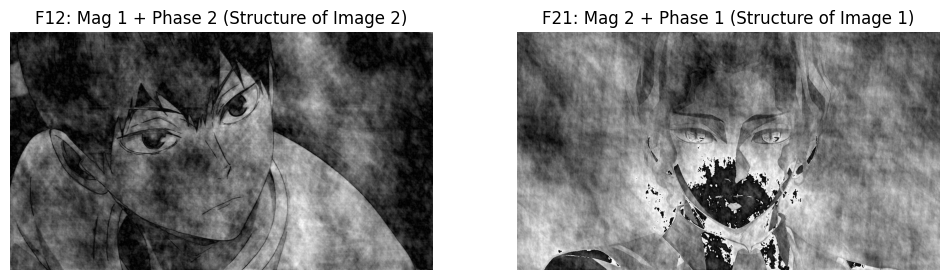

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_F12, cmap='gray')
plt.title("F12: Mag 1 + Phase 2 (Structure of Image 2)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_F21, cmap='gray')
plt.title("F21: Mag 2 + Phase 1 (Structure of Image 1)")
plt.axis('off')
plt.show()

# Observation:
# The image reconstructed from F12 (Magnitude 1 + Phase 2) clearly resembles the structural shape of Image 2.
# Conversely, the image reconstructed from F21 (Magnitude 2 + Phase 1) resembles the structural shape of Image 1.
# This confirms that the **Phase component** holds the crucial information regarding the **spatial structure** and arrangement of objects, while the **Magnitude component** primarily dictates the **texture, contrast, and general appearance**.